In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
pd.set_option('display.max_columns', None)

In [2]:
!pip uninstall SkOpts==0.0.1

^C


In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
targets_bin = df_train[target_columns]

In [5]:
df_train 

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [4]:
#df_train.corr()


In [5]:
#plt.figure(figsize=(30, 15))
#sns.heatmap(df_train.corr(),annot=True)

In [5]:
df_train[target_columns].sum(axis=1).value_counts()

1    18380
0      818
2       21
dtype: int64

In [7]:
df_train=df_train.loc[df_train[target_columns].sum(axis=1) != 0]
df_train=df_train.reset_index().drop("index",axis=1)

In [9]:
df_train[target_columns]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
18396,0,0,0,1,0,0,0
18397,0,0,0,0,0,0,1
18398,1,0,0,0,0,0,0
18399,0,0,0,0,0,0,1


In [8]:
df_test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [6]:
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Other_Faults"] = 0
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Pastry"] = 0
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Bumps"] = 0

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

dtr=df_train.drop(target_columns,axis=1)
dtr=dtr.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)
#dtt=df_test.drop(target_columns,axis=1)
X =  pd.concat([dtr, df_test], axis=0)
y = [0] * len(dtr) + [1] * len(df_test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

#df_train = df_train.drop(df_train[df_train['Y_Maximum'] < df_train['Y_Minimum']].index)

#df_train[df_train['Y_Maximum'] <df_train['Y_Minimum']]
#df_train[df_train['X_Maximum'] <df_train['X_Minimum']]

In [ ]:
#df_test[df_test['Y_Maximum'] <df_test['Y_Minimum']]

In [7]:
def calculate_coordinate_range_features(data):
    data['X_Range'] = (data['X_Maximum'] - data['X_Minimum'])
    data['Y_Range'] =( data['Y_Maximum'] - data['Y_Minimum'])
    return data

df_train = calculate_coordinate_range_features(df_train)
df_test = calculate_coordinate_range_features(df_test)

def calculate_size_ratio_features(data):
    data['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    return data

df_train = calculate_size_ratio_features(df_train)
df_test = calculate_size_ratio_features(df_test)

def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data

df_train = calculate_luminosity_range_feature(df_train)
df_test = calculate_luminosity_range_feature(df_test)

In [8]:
import numpy as np

# 1. Aspect Ratio
df_train['Aspect_Ratio'] = (df_train['X_Maximum'] - df_train['X_Minimum']) / (df_train['Y_Maximum'] - df_train['Y_Minimum'])
df_test['Aspect_Ratio'] = (df_test['X_Maximum'] - df_test['X_Minimum']) / (df_test['Y_Maximum'] - df_test['Y_Minimum'])

# 2. Area Perimeter Ratio
df_train['Area_Perimeter_Ratio'] = df_train['Pixels_Areas'] / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])
df_test['Area_Perimeter_Ratio'] = df_test['Pixels_Areas'] / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])

# 3. Intensity Range
df_train['Intensity_Range'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_test['Intensity_Range'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']

 

# Define grid size for spatial density
grid_size = 10
max_x = max(df_train['X_Minimum'].max(), df_test['X_Minimum'].max())  # Get maximum X coordinate
max_y = max(df_train['Y_Minimum'].max(), df_test['Y_Minimum'].max())  # Get maximum Y coordinate

# Adjust binning range based on maximum coordinates
bin_range_x = np.linspace(0, max_x, grid_size + 1)  # Add 1 to grid_size for inclusive endpoint
bin_range_y = np.linspace(0, max_y, grid_size + 1)

# Create grid cell columns
df_train['Grid_Cell_X'] = pd.cut(df_train['X_Minimum'], bins=bin_range_x, labels=False)
df_train['Grid_Cell_Y'] = pd.cut(df_train['Y_Minimum'], bins=bin_range_y, labels=False)
df_test['Grid_Cell_X'] = pd.cut(df_test['X_Minimum'], bins=bin_range_x, labels=False)
df_test['Grid_Cell_Y'] = pd.cut(df_test['Y_Minimum'], bins=bin_range_y,labels=False)

# Compute spatial density
# Compute spatial density
#df_train['Spatial_Density'] = df_train.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(level=[0, 1], drop=True)
#df_test['Spatial_Density'] = df_test.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(level=[0, 1], drop=True)


# 7. Logarithmic Ratios
df_train['Logarithmic_Ratio'] = df_train['LogOfAreas'] / df_train['Log_X_Index']
df_test['Logarithmic_Ratio'] = df_test['LogOfAreas'] / df_test['Log_X_Index']

# 8. Statistical Aggregations
# Example: Mean of Pixels_Areas within a 3x3 neighborhood
df_train['Pixels_Areas_Mean'] = df_train.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')
df_test['Pixels_Areas_Mean'] = df_test.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')

# 9. Interaction Terms
df_train['Interaction_Term'] = df_train['Pixels_Areas'] * df_train['Intensity_Range']
df_test['Interaction_Term'] = df_test['Pixels_Areas'] * df_test['Intensity_Range']

 
# 1. Compactness
df_train['Compactness'] = df_train['Pixels_Areas'] / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])**2
df_test['Compactness'] = df_test['Pixels_Areas'] / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])**2

# 2. Circularity
df_train['Circularity'] = (4 * np.pi * df_train['Pixels_Areas']) / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])**2
df_test['Circularity'] = (4 * np.pi * df_test['Pixels_Areas']) / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])**2

# 3. Density within Grid Cells
# 3. Density within Grid Cells
# 3. Density within Grid Cells
density_train = df_train.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(name='Density_Grid_Cells')
df_train = pd.merge(df_train, density_train, on=['Grid_Cell_X', 'Grid_Cell_Y'], how='left')

density_test = df_test.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(name='Density_Grid_Cells')
df_test = pd.merge(df_test, density_test, on=['Grid_Cell_X', 'Grid_Cell_Y'], how='left')


# 4. Distance from Center
X_Center = (df_train['X_Minimum'] + df_train['X_Maximum']) / 2
Y_Center = (df_train['Y_Minimum'] + df_train['Y_Maximum']) / 2
df_train['Distance_From_Center'] = np.sqrt((X_Center - df_train['X_Minimum'])**2 + (Y_Center - df_train['Y_Minimum'])**2)

X_Center_test = (df_test['X_Minimum'] + df_test['X_Maximum']) / 2
Y_Center_test = (df_test['Y_Minimum'] + df_test['Y_Maximum']) / 2
df_test['Distance_From_Center'] = np.sqrt((X_Center_test - df_test['X_Minimum'])**2 + (Y_Center_test - df_test['Y_Minimum'])**2)

# 6. Edge Density Ratio
df_train['Edge_Density_Ratio'] = df_train['Edges_Index'] / df_train['Pixels_Areas']
df_test['Edge_Density_Ratio'] = df_test['Edges_Index'] / df_test['Pixels_Areas']

# 7. Gradient of Luminosity (Example)
df_train['Luminosity_Gradient'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_test['Luminosity_Gradient'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']

# 8. Orientation Relative to Edges (Example)
df_train['Orientation_Edge'] = df_train['Orientation_Index'] * df_train['Edges_Index']
df_test['Orientation_Edge'] = df_test['Orientation_Index'] * df_test['Edges_Index']

# 9. Spatial Aggregation (Example: Mean of Pixels_Areas within a 3x3 neighborhood)
df_train['Pixels_Areas_Mean_Neighborhood'] = df_train.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')
df_test['Pixels_Areas_Mean_Neighborhood'] = df_test.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')

# 10. Interaction Terms with Categorical Features (Example)
df_train['Interaction_Steel_Type'] = df_train['Pixels_Areas'] * df_train['TypeOfSteel_A300']
df_test['Interaction_Steel_Type'] = df_test['Pixels_Areas'] * df_test['TypeOfSteel_A300']


In [9]:
df_train=df_train.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)

In [10]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27,1.200000,27,3.0,0,1.333296,16.000000,432,0.094675,1.189716,884.0,3.905125,0.046206,27,-0.369650,16.000000,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41,0.363636,41,4.0,0,3.387947,433.000000,17753,0.079072,0.993652,854.0,11.704700,0.001795,41,0.576605,433.000000,433
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112,2.250000,112,0.0,1,1.861588,8152.166667,1275456,0.008998,0.113071,2523.0,83.715291,0.000005,112,-0.000585,8152.166667,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20,0.296296,20,4.0,2,2.984066,210.000000,4200,0.103704,1.303179,172.0,14.080128,0.003430,20,0.480157,210.000000,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29,0.444444,29,9.0,0,1.957173,521.000000,15109,0.026965,0.338858,690.0,24.622145,0.000232,29,0.110903,521.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18,0.888889,18,4.0,0,1.581213,17.000000,306,0.265625,3.337942,854.0,6.020797,0.052647,18,-0.127895,17.000000,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29,1.000000,29,4.0,1,2.269637,231.000000,6699,0.124932,1.569947,402.0,8.485281,0.004001,29,0.667529,231.000000,231
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53,0.337838,53,0.0,1,2.020469,780.000000,41340,0.017355,0.218088,2523.0,39.054449,0.000019,53,0.011424,780.000000,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44,0.750000,44,0.0,1,2.016900,126.000000,5544,0.082840,1.041001,2523.0,7.500000,0.000152,44,0.018451,126.000000,126


In [11]:
df_test.isna().sum()

X_Minimum                           0
X_Maximum                           0
Y_Minimum                           0
Y_Maximum                           0
Pixels_Areas                        0
X_Perimeter                         0
Y_Perimeter                         0
Sum_of_Luminosity                   0
Minimum_of_Luminosity               0
Maximum_of_Luminosity               0
Length_of_Conveyer                  0
TypeOfSteel_A300                    0
TypeOfSteel_A400                    0
Steel_Plate_Thickness               0
Edges_Index                         0
Empty_Index                         0
Square_Index                        0
Outside_X_Index                     0
Edges_X_Index                       0
Edges_Y_Index                       0
Outside_Global_Index                0
LogOfAreas                          0
Log_X_Index                         0
Log_Y_Index                         0
Orientation_Index                   0
Luminosity_Index                    0
SigmoidOfAre

In [ ]:
#df_train.corr()

In [11]:

target = df_train[target_columns]@(np.arange(df_train[target_columns].shape[1]))
target[df_train[target_columns].sum(axis=1)==2] = 3

df_train=df_train.drop(target_columns,axis=1)

In [12]:
target

0        3
1        6
2        2
3        2
4        6
        ..
19214    3
19215    6
19216    0
19217    6
19218    5
Length: 19219, dtype: int64

In [103]:
df_test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18,24,9.550725,60,0.750000,60,5.0,2,2.550498,659.000000,39540,0.138416,1.739391,127.0,15.000000,0.000588,60,0.260806,659.000000,0
1,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14,13,6.851852,40,1.076923,40,7.0,0,2.843760,370.000000,14800,0.126886,1.594498,807.0,9.552487,0.000440,40,0.147636,370.000000,0
2,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14,9,4.250000,33,1.555556,33,7.0,0,1.861216,289.000000,9537,0.062500,0.785398,807.0,8.321658,0.000211,33,-0.031899,289.000000,0
3,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10,25,3.809524,33,0.400000,33,0.0,0,2.722604,80.000000,2640,0.181406,2.279614,1318.0,13.462912,0.005549,33,0.080701,80.000000,80
4,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33,14,4.117647,31,2.357143,31,3.0,0,1.623128,140.000000,4340,0.121107,1.521879,599.0,17.923448,0.005851,31,-0.468034,140.000000,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15,49,4.536232,24,0.306122,24,6.0,0,2.028037,313.000000,7512,0.065742,0.826145,953.0,25.622256,0.000912,24,0.218568,313.000000,0
12810,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17,48,2.185185,28,0.354167,28,7.0,2,2.095373,59.000000,1652,0.080933,1.017031,163.0,25.460754,0.000180,28,0.007655,59.000000,0
12811,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169,-344,12.582701,119,-0.491279,119,0.0,1,1.889664,11357.333333,1973496,0.009547,0.119969,1674.0,191.635722,0.000003,119,-0.003504,11357.333333,0
12812,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11,30,5.012987,58,0.366667,58,7.0,0,2.322112,386.000000,22388,0.065104,0.818118,807.0,15.976545,0.000034,58,0.011253,386.000000,0


In [104]:
df_train[df_train.isin([np.inf, -np.inf]).any(axis=1)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
33,933,940,7307792,7307792,12,6,4,1504,110,134,1358,0,1,50,0.6471,0.5500,1.0000,0.0044,1.0000,1.0000,0.5,1.0792,0.7782,0.6021,0.0000,-0.0840,0.1361,7,0,1.200000,24,inf,24,5.0,5,1.386790,12.0,288,0.120000,1.507964,28.0,3.5,0.053925,24,0.000000,12.0,0
224,49,61,1803992,1803992,120,28,18,16912,97,132,1353,1,0,70,0.0746,0.2899,0.8889,0.0103,0.9375,0.9231,0.0,2.0792,1.1461,1.1761,-0.1111,-0.1093,0.4763,12,0,2.608696,35,inf,35,0.0,1,1.814152,120.0,4200,0.056711,0.712649,2523.0,6.0,0.000622,35,-0.008288,120.0,120
282,623,631,1715283,1715283,80,10,11,14669,108,149,1628,1,0,120,0.9269,0.4000,1.0000,0.0053,0.9000,0.9091,0.5,1.9031,0.9542,1.0000,0.0000,-0.0802,0.2359,8,0,3.809524,41,inf,41,3.0,1,1.994446,121.0,3280,0.181406,2.279614,590.0,4.0,0.011586,41,0.000000,121.0,80
328,39,197,1175131,1175131,17825,821,541,2144244,26,141,1398,0,1,40,0.0556,0.3394,0.9854,0.1114,0.2056,0.3911,1.0,4.2510,2.1987,2.2227,0.0146,-0.0993,1.0000,158,0,13.087372,115,inf,115,0.0,0,1.933415,17825.0,2049875,0.009609,0.120749,1936.0,79.0,0.000003,115,0.000812,17825.0,0
363,39,214,1435593,1435593,6239,222,124,658914,43,124,1358,0,1,40,0.0574,0.4556,0.3771,0.1289,0.7883,0.5778,0.0,3.8450,2.2430,1.8129,-0.6229,-0.1847,1.0000,175,0,18.031792,81,inf,81,0.0,1,1.714222,6239.0,505359,0.052115,0.654896,2523.0,87.5,0.000009,81,-0.035754,6239.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18562,828,835,1444004,1444004,77,9,14,8359,80,126,1658,1,0,100,0.9401,0.2400,0.6429,0.0041,0.7778,1.0000,1.0,1.8865,0.8451,1.1461,0.3571,-0.2069,0.1753,7,0,3.347826,46,inf,46,4.0,1,2.232280,77.0,3542,0.145558,1.829131,402.0,3.5,0.012209,46,0.335710,77.0,77
18725,981,994,9921344,9921344,51,11,10,6294,93,151,1360,1,0,70,0.7618,0.2333,0.9000,0.0074,0.9091,1.0000,0.0,1.7076,1.0000,0.9542,-0.1000,-0.0753,0.1753,13,0,2.428571,58,inf,58,5.0,7,1.707600,51.0,2958,0.115646,1.453254,22.0,6.5,0.014937,58,-0.076180,51.0,51
18950,1541,1565,345626,345626,226,36,31,23642,52,124,1686,1,0,80,0.1261,0.5605,0.5652,0.0077,0.3611,0.9677,1.0,2.3541,1.1139,1.4771,0.4348,-0.1835,0.4946,24,0,3.373134,72,inf,72,9.0,0,2.113385,226.0,16272,0.050345,0.632658,690.0,12.0,0.000558,72,0.054828,226.0,226
19044,1219,1228,1292303,1292303,8,8,5,1063,111,132,1694,1,0,70,0.7771,0.2222,0.6000,0.0074,1.0000,1.0000,0.0,0.9031,1.0000,0.6021,-0.4000,-0.0557,0.1284,9,0,0.615385,21,inf,21,7.0,0,0.903100,8.0,168,0.047337,0.594858,1227.0,4.5,0.097138,21,-0.310840,8.0,8


C:\Users\dials\AppData\Local\Temp\ipykernel_17496\1763759082.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train["Aspect_Ratio"].replace([np.inf, -np.inf], df_train[df_train["Aspect_Ratio"] != np.inf][df_train["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)
C:\Users\dials\AppData\Local\Temp\ipykernel_17496\1763759082.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test["Aspect_Ratio"].replace([np.inf, -np.inf], df_test[df_test["Aspect_Ratio"] != np.inf][df_test["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)


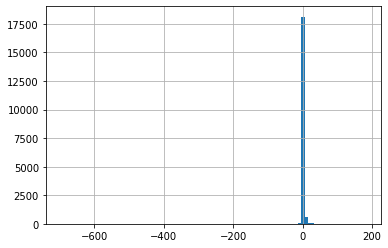

In [13]:
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].mean()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].std()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].max()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].min()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].hist(bins=100)
df_train["Aspect_Ratio"].replace([np.inf, -np.inf], df_train[df_train["Aspect_Ratio"] != np.inf][df_train["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)
df_test["Aspect_Ratio"].replace([np.inf, -np.inf], df_test[df_test["Aspect_Ratio"] != np.inf][df_test["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)

In [12]:
np.isinf(df_test).any(axis=None)

False

In [13]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,6,5,1.230769,27,1.200000,27,3.0,0,1.333296,16.000000,432,0.094675,1.189716,884.0,3.905125,0.046206,27,-0.369650,16.000000,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,8,22,5.851351,41,0.363636,41,4.0,0,3.387947,433.000000,17753,0.079072,0.993652,854.0,11.704700,0.001795,41,0.576605,433.000000,433
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,153,68,10.122667,112,2.250000,112,0.0,1,1.861588,8152.166667,1275456,0.008998,0.113071,2523.0,83.715291,0.000005,112,-0.000585,8152.166667,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,8,27,4.666667,20,0.296296,20,4.0,2,2.984066,210.000000,4200,0.103704,1.303179,172.0,14.080128,0.003430,20,0.480157,210.000000,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,20,45,3.748201,29,0.444444,29,9.0,0,1.957173,521.000000,15109,0.026965,0.338858,690.0,24.622145,0.000232,29,0.110903,521.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,8,9,2.125000,18,0.888889,18,4.0,0,1.581213,17.000000,306,0.265625,3.337942,854.0,6.020797,0.052647,18,-0.127895,17.000000,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,12,12,5.372093,29,1.000000,29,4.0,1,2.269637,231.000000,6699,0.124932,1.569947,402.0,8.485281,0.004001,29,0.667529,231.000000,231
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,25,74,3.679245,53,0.337838,53,0.0,1,2.020469,780.000000,41340,0.017355,0.218088,2523.0,39.054449,0.000019,53,0.011424,780.000000,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,9,12,3.230769,44,0.750000,44,0.0,1,2.016900,126.000000,5544,0.082840,1.041001,2523.0,7.500000,0.000152,44,0.018451,126.000000,126


In [108]:
[x for x in df_train.columns if x not in df_test.columns]


[]

In [14]:
from sklearn.preprocessing import MinMaxScaler


df_train = df_train.astype(np.float64)
df_test = df_test.astype(np.float64)

mmscaler = MinMaxScaler()

mmscaler.fit(df_train)

df_train[:] = mmscaler.transform(df_train)
df_test[:] = mmscaler.transform(df_test)



In [15]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(df_train, y=target)

In [28]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,0.342522,0.342891,0.069584,0.069583,0.000066,0.000795,0.004435,0.000175,0.576531,0.471963,0.231041,0.0,1.0,0.038462,0.742866,0.431267,0.495815,0.006631,1.000000,1.000000,0.0,0.112788,0.223306,0.173307,0.246654,0.572720,0.025766,0.406015,0.514392,0.002150,0.292419,0.794900,0.292419,0.333333,0.000000,0.121727,0.000066,0.000354,0.052838,0.052838,0.350119,5.530754e-07,0.299102,0.292419,0.293010,0.000066,0.000000
1,0.473900,0.475132,0.055592,0.055593,0.002797,0.002384,0.058758,0.003816,0.357143,0.336449,0.811287,1.0,0.0,0.153846,0.780949,0.310296,0.251891,0.004370,0.239042,1.000000,1.0,0.492122,0.176983,0.429524,0.873845,0.383275,0.942225,0.406731,0.514393,0.010990,0.342960,0.793945,0.342960,0.444444,0.000000,0.582633,0.002797,0.001424,0.044123,0.044123,0.338224,1.819917e-06,0.011619,0.342960,0.816442,0.002797,0.011598
2,0.022874,0.110006,0.169892,0.169896,0.074563,0.093100,0.464523,0.113116,0.147959,0.476636,0.305115,0.0,1.0,0.000000,0.055969,0.569488,0.989412,0.160036,0.225142,0.313631,0.0,0.868144,0.696510,0.547814,0.493864,0.517713,1.000000,0.458647,0.514394,0.019162,0.599278,0.796099,0.599278,0.000000,0.111111,0.240235,0.053365,0.079123,0.004982,0.004982,1.000000,1.351620e-05,0.000032,0.599278,0.497163,0.053365,0.000000
3,0.458065,0.459333,0.257796,0.257797,0.001336,0.001854,0.031042,0.000255,0.581633,0.443925,0.282187,0.0,1.0,0.000000,0.723674,0.359353,0.327720,0.004370,0.365869,0.922905,1.0,0.408887,0.176983,0.354895,0.835867,0.553205,0.321793,0.406731,0.514393,0.008723,0.267148,0.793868,0.267148,0.444444,0.222222,0.492033,0.001336,0.000586,0.057881,0.057881,0.067803,2.205744e-06,0.022200,0.267148,0.763091,0.001336,0.000000
4,0.903226,0.910474,0.047126,0.047129,0.003374,0.009270,0.073171,0.004139,0.418367,0.336449,0.820106,0.0,1.0,1.000000,0.121684,0.576496,0.076535,0.026673,0.198965,0.984469,1.0,0.527317,0.413159,0.466318,0.961669,0.418768,0.999773,0.411028,0.514394,0.006966,0.299639,0.794037,0.299639,1.000000,0.000000,0.261677,0.003374,0.001260,0.015018,0.015018,0.273196,3.918025e-06,0.001505,0.299639,0.558834,0.003374,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.439296,0.440609,0.010515,0.010515,0.000072,0.000265,0.003326,0.000168,0.622449,0.471963,0.234568,0.0,0.0,0.038462,0.899317,0.161725,0.855904,0.004370,1.000000,0.776536,0.0,0.119780,0.176983,0.149282,0.426999,0.582411,0.194211,0.406731,0.514392,0.003860,0.259928,0.794545,0.259928,0.444444,0.000000,0.177340,0.000072,0.000346,0.148325,0.148325,0.338224,8.967123e-07,0.340794,0.259928,0.426739,0.000072,0.000000
19215,0.424047,0.427736,0.191189,0.191189,0.001474,0.001986,0.027716,0.002319,0.530612,0.439252,0.749559,1.0,0.0,0.115385,0.928758,0.350836,0.271756,0.007535,0.729403,0.912402,1.0,0.419851,0.274599,0.350829,0.863896,0.514767,0.475369,0.408163,0.514392,0.010073,0.299639,0.794672,0.299639,0.444444,0.111111,0.331770,0.001474,0.000741,0.069739,0.069739,0.159001,1.297005e-06,0.025901,0.299639,0.866738,0.001474,0.006187
19216,0.003519,0.015799,0.121050,0.121055,0.005070,0.014832,0.107539,0.006113,0.209184,0.257009,0.231041,0.0,1.0,0.615385,0.014871,0.466954,0.221640,0.027728,0.174310

In [25]:
target

0        3
1        6
2        2
3        2
4        6
        ..
18396    3
18397    6
18398    0
18399    6
18400    5
Length: 18401, dtype: int64

In [26]:
df_test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,1015.0,1033.0,3826564.0,3826588.0,659.0,23.0,46.0,62357.0,67.0,127.0,1656.0,0.0,1.0,150.0,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18.0,24.0,9.550725,60.0,0.750000,60.0,5.0,2.0,2.550498,659.000000,39540.0,0.138416,1.739391,127.0,15.000000,0.000588,60.0,0.260806,659.000000,0.0
1,1257.0,1271.0,419960.0,419973.0,370.0,26.0,28.0,39293.0,92.0,132.0,1354.0,0.0,1.0,40.0,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14.0,13.0,6.851852,40.0,1.076923,40.0,7.0,0.0,2.843760,370.000000,14800.0,0.126886,1.594498,807.0,9.552487,0.000440,40.0,0.147636,370.000000,0.0
2,1358.0,1372.0,117715.0,117724.0,289.0,36.0,32.0,29386.0,101.0,134.0,1360.0,0.0,1.0,40.0,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14.0,9.0,4.250000,33.0,1.555556,33.0,7.0,0.0,1.861216,289.000000,9537.0,0.062500,0.785398,807.0,8.321658,0.000211,33.0,-0.031899,289.000000,0.0
3,158.0,168.0,232415.0,232440.0,80.0,10.0,11.0,8586.0,107.0,140.0,1690.0,1.0,0.0,100.0,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10.0,25.0,3.809524,33.0,0.400000,33.0,0.0,0.0,2.722604,80.000000,2640.0,0.181406,2.279614,1318.0,13.462912,0.005549,33.0,0.080701,80.000000,80.0
4,559.0,592.0,544375.0,544389.0,140.0,19.0,15.0,15524.0,103.0,134.0,1688.0,1.0,0.0,60.0,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33.0,14.0,4.117647,31.0,2.357143,31.0,3.0,0.0,1.623128,140.000000,4340.0,0.121107,1.521879,599.0,17.923448,0.005851,31.0,-0.468034,140.000000,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101.0,1116.0,447943.0,447992.0,313.0,32.0,37.0,21603.0,79.0,103.0,1353.0,0.0,1.0,70.0,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15.0,49.0,4.536232,24.0,0.306122,24.0,6.0,0.0,2.028037,313.000000,7512.0,0.065742,0.826145,953.0,25.622256,0.000912,24.0,0.218568,313.000000,0.0
12810,1289.0,1306.0,3149494.0,3149542.0,59.0,9.0,18.0,5249.0,113.0,141.0,1362.0,0.0,1.0,40.0,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17.0,48.0,2.185185,28.0,0.354167,28.0,7.0,2.0,2.095373,59.000000,1652.0,0.080933,1.017031,163.0,25.460754,0.000180,28.0,0.007655,59.000000,0.0
12811,41.0,210.0,1587535.0,1587191.0,16584.0,796.0,522.0,1858162.0,24.0,143.0,1400.0,0.0,1.0,40.0,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169.0,-344.0,12.582701,119.0,-0.491279,119.0,0.0,1.0,1.889664,11357.333333,1973496.0,0.009547,0.119969,1674.0,191.635722,0.000003,119.0,-0.003504,11357.333333,0.0
12812,1329.0,1340.0,702237.0,702267.0,386.0,43.0,34.0,36875.0,66.0,124.0,1364.0,0.0,1.0,40.0,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11.0,30.0,5.012987,58.0,0.366667,58.0,7.0,0.0,2.322112,386.000000,22388.0,0.065104,0.818118,807.0,15.976545,0.000034,58.0,0.011253,386.000000,0.0


In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
cv_splits = cv.split(df_train, y=target)
roc_auc_scores = list()
cv_oof = pd.DataFrame(np.zeros((len(target), len(target_columns))), columns=target_columns)

for train_idx, val_idx in cv_splits:
    
    xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="gpu_hist",
                        objective='multi:softproba',  # 'multi:softmax' or 'multi:softprob' for multiclass classification
                        num_class=len(set(target)),  # Number of classes
                        n_estimators=300,
                        max_depth=6,
                        verbosity=0)
    md=xgb;
    X_train_fold, X_val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    md.fit(X_train_fold, y_train_fold)
    
    y_val_prob = md.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:,  :], multi_class='ovr')
    
    cv_oof.iloc[val_idx, :] = y_val_prob
    
    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')

Cross-validated ROC-AUC score: 0.869 +/- 0.002
Max ROC-AUC score: 0.871


In [26]:
from xgboost import XGBClassifier,XGBRegressor
import optuna
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold,KFold
import numpy as np

from sklearn.metrics import make_scorer, roc_auc_score


def objective_xgb(trial,X,y, scoring_metric,N_folds,stratify,problem_type,repeat_n):
    
    
    params = {
        "verbosity": 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        #"objective": xgb_objective,#"binary:logistic"
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "max_depth":trial.suggest_int("max_depth", 3, 12, step=2),
        "min_child_weight" : trial.suggest_int("min_child_weight", 2, 10000),
        "max_delta_step" : trial.suggest_int("max_delta_step", 0, 10000),
         "eta" : trial.suggest_float("eta", 0.001, 1.0, log=True),
        "gamma":trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        #"sampling_method":trial.suggest_categorical("sampling_method", ['uniform',]),
        "max_bin":trial.suggest_int("max_bin",100, 10000),
        
        
    }
    
    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softprob'
    #params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "gpu_hist"


    cv_splits = cv.split(df_train,target)
    cv_scores = list()
    
    for train_idx, val_idx in cv_splits:
    
        xgb = XGBClassifier(**params)

        X_train_fold, X_val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        xgb.fit(X_train_fold, y_train_fold)

        y_val_prob = xgb.predict_proba(X_val_fold)
        roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:,  :], multi_class='ovr')
        cv_scores.append(roc_auc)
         
    # We compute the validation score on the original multilabel targets
    
    cv_evaluation = np.mean(cv_scores)
        
  
        
    return cv_evaluation



def XGB_tuner(X,y,scoring_metric,n_trials,N_folds=3,direction=None,stratify=False,problem_type='classification',repeat_n=1):
 
    func = lambda trial: objective_xgb(trial,X,y, scoring_metric,N_folds,stratify,problem_type,repeat_n)
    global study_xgb
    study_xgb = optuna.create_study(direction=direction)
    study_xgb.optimize(func, n_trials=n_trials)

    print("Number of finished trials: ", len(study_xgb.trials))
    print("Best trial:")
    trial = study_xgb.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    if problem_type=='classification':
        return XGBClassifier(**study_xgb.best_params)
    else:
        return XGBRegressor(**study_xgb.best_params)
    

XGB_tuned=XGB_tuner(X=df_train,y=target,
                    scoring_metric='roc_auc',
                    n_trials=100,
                    N_folds=5,
                    direction='maximize',
                    stratify=True,
                    problem_type='classification')

[I 2024-03-17 17:50:48,710] A new study created in memory with name: no-name-ee0367fc-0d6a-4e3d-9806-d444a9eb0a43
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 17:51:01,244] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 546, 'lambda': 0.0010263511245036968, 'alpha': 3.152368394062058e-05, 'subsample': 0.3217508265600875, 'colsample_bytree': 0.8252330864264716, 'max_depth': 5, 'min_child_weight': 6257, 'max_delta_step': 8752, 'eta': 0.0841939818962364, 'gamma': 1.4298148775010967e-08, 'max_bin': 3963}. Best is trial 0 with value: 0.5.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It wi

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 17:55:11,348] Trial 12 finished with value: 0.8678052701945986 and parameters: {'n_estimators': 239, 'lambda': 5.402069271781758e-08, 'alpha': 0.007470710799709026, 'subsample': 0.5352000705419035, 'colsample_bytree': 0.41133864949470095, 'max_depth': 9, 'min_child_weight': 199, 'max_delta_step': 9999, 'eta': 0.009478578775683305, 'gamma': 1.4316018129051098e-05, 'max_bin': 8358}. Best is trial 12 with value: 0.8678052701945986.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 17:55:15,669] Trial 13 

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:00:42,637] Trial 24 finished with value: 0.5960618181662106 and parameters: {'n_estimators': 472, 'lambda': 5.528487685397229e-07, 'alpha': 0.0026548064643387883, 'subsample': 0.8716395302226195, 'colsample_bytree': 0.38070254302546025, 'max_depth': 9, 'min_child_weight': 2147, 'max_delta_step': 9898, 'eta': 0.03437859202830874, 'gamma': 0.005733757340425194, 'max_bin': 4188}. Best is trial 22 with value: 0.8787733325804558.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:00:46,318] Trial 25 f

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:02:41,229] Trial 36 finished with value: 0.8368240548497899 and parameters: {'n_estimators': 314, 'lambda': 1.7009662015985787e-07, 'alpha': 5.424245021850395e-07, 'subsample': 0.7352625588680668, 'colsample_bytree': 0.7025091786132729, 'max_depth': 5, 'min_child_weight': 817, 'max_delta_step': 5985, 'eta': 0.1473960200719814, 'gamma': 0.4800039932299419, 'max_bin': 4248}. Best is trial 34 with value: 0.8811659876453047.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:02:46,697] Trial 37 finis

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:06:19,136] Trial 48 finished with value: 0.5 and parameters: {'n_estimators': 417, 'lambda': 1.734298408524231e-05, 'alpha': 2.370789102167444e-07, 'subsample': 0.2549431869881631, 'colsample_bytree': 0.6488428263604507, 'max_depth': 5, 'min_child_weight': 1072, 'max_delta_step': 2026, 'eta': 0.0973062767643662, 'gamma': 0.17739949189672014, 'max_bin': 7489}. Best is trial 47 with value: 0.882674238712611.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:06:28,021] Trial 49 finished with value:

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:09:05,657] Trial 60 finished with value: 0.6428373856484516 and parameters: {'n_estimators': 624, 'lambda': 2.101310200143615e-08, 'alpha': 5.583047287858843e-08, 'subsample': 0.4901706796915197, 'colsample_bytree': 0.84139139696539, 'max_depth': 5, 'min_child_weight': 1146, 'max_delta_step': 3852, 'eta': 0.4545948757752543, 'gamma': 0.0015965293825656753, 'max_bin': 2530}. Best is trial 47 with value: 0.882674238712611.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:09:21,191] Trial 61 finis

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:11:20,696] Trial 72 finished with value: 0.8855039160781976 and parameters: {'n_estimators': 145, 'lambda': 2.2850667052269517e-05, 'alpha': 4.1650735439665734e-06, 'subsample': 0.8084598681797395, 'colsample_bytree': 0.602664060631457, 'max_depth': 3, 'min_child_weight': 39, 'max_delta_step': 5455, 'eta': 0.06723133816602216, 'gamma': 3.2867917305606164e-07, 'max_bin': 9689}. Best is trial 72 with value: 0.8855039160781976.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:11:29,560] Trial 73 f

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:15:10,291] Trial 84 finished with value: 0.8781428566776672 and parameters: {'n_estimators': 776, 'lambda': 2.6374787443807932e-05, 'alpha': 4.436294194537382e-07, 'subsample': 0.8681932688268456, 'colsample_bytree': 0.5984222427937176, 'max_depth': 3, 'min_child_weight': 25, 'max_delta_step': 4081, 'eta': 0.132614621690009, 'gamma': 4.5758594077894363e-08, 'max_bin': 9119}. Best is trial 77 with value: 0.8867188381223569.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:15:14,772] Trial 85 fin

C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:21:53,438] Trial 96 finished with value: 0.8788283509732816 and parameters: {'n_estimators': 854, 'lambda': 8.832784499361171e-05, 'alpha': 1.179199421692195e-06, 'subsample': 0.8747744390634729, 'colsample_bytree': 0.8046303394131418, 'max_depth': 3, 'min_child_weight': 254, 'max_delta_step': 70, 'eta': 0.04571334318830664, 'gamma': 2.1078518376077012e-08, 'max_bin': 9488}. Best is trial 77 with value: 0.8867188381223569.
C:\Users\dials\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [3, 12] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 11].
  warnings.warn(
[I 2024-03-17 18:22:46,844] Trial 97 fin

Number of finished trials:  100
Best trial:
  Value: 0.8867188381223569
  Params: 
    n_estimators: 273
    lambda: 4.6436365245205846e-05
    alpha: 5.558071977907892e-06
    subsample: 0.7551020961952125
    colsample_bytree: 0.5369781328644303
    max_depth: 3
    min_child_weight: 13
    max_delta_step: 7325
    eta: 0.04695382933285808
    gamma: 3.862970742093422e-08
    max_bin: 8594


In [50]:
from lightgbm import LGBMClassifier,LGBMRegressor
import optuna
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold,KFold

from sklearn.metrics import make_scorer, roc_auc_score


def objective_lgbm(trial,X,y,scoring_metric,N_folds,metric_model,stratify,problem_type,repeat_n):
    
    params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['dart', 'gbdt', 'rf']),
        'objective': 'multiclass',
        'metric': metric_model,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'n_estimators': trial.suggest_int('n_estimators', 1, 1256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_bin': trial.suggest_int('max_bin', 2, 2000),
        'verbose':-1
    }
    cv_splits = cv.split(df_train, target)
    cv_scores = list()
    
    for train_idx, val_idx in cv_splits:
    
        LGBM = LGBMClassifier(**params)

        X_train_fold, X_val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        LGBM.fit(X_train_fold, y_train_fold)

        y_val_prob = LGBM.predict_proba(X_val_fold)
        roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:,  :], multi_class='ovr')
        cv_scores.append(roc_auc)
         
    # We compute the validation score on the original multilabel targets
    
    cv_evaluation = np.mean(cv_scores)
        
  
        
    return cv_evaluation



def LGBM_tuner(X,y,scoring_metric,n_trials,N_folds=5,metric_model="",direction=None,stratify=False,problem_type='classification',repeat_n=1):
    

        
    func = lambda trial: objective_lgbm(trial,X,y,scoring_metric,N_folds,metric_model,stratify,problem_type,repeat_n)
    global study_lgbm
    study_lgbm = optuna.create_study(direction=direction)
    study_lgbm.optimize(func, n_trials=n_trials)

    print("Number of finished trials: ", len(study_lgbm.trials))
    print("Best trial:")
    trial = study_lgbm.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
    if problem_type=='classification':
        return LGBMClassifier(**study_lgbm.best_params)
    else:
        return LGBMRegressor(**study_lgbm.best_params)
    

XGB_tuned=LGBM_tuner(X=df_train,y=target,
                    scoring_metric='roc_auc',
                    n_trials=700,
                    N_folds=5,
                    direction='maximize',
                    stratify=True,
                    problem_type='classification')

[I 2024-03-17 19:32:23,240] A new study created in memory with name: no-name-01598491-9d35-4456-ae3a-8bcb4c18c944


[LightGBM] [Warning] feature_fraction is set=0.12151640570137177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12151640570137177
[LightGBM] [Warning] lambda_l1 is set=1.6482330287603719e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6482330287603719e-07
[LightGBM] [Warning] bagging_fraction is set=0.269426200165245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.269426200165245
[LightGBM] [Warning] lambda_l2 is set=0.004738510254270931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004738510254270931
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.12151640570137177, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12151640570137177
[LightGBM] [Warning] lambda_l1 is set=1.6482330287603719e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6482330287603719e-07
[LightGBM] [War

[I 2024-03-17 19:32:27,366] Trial 0 finished with value: 0.5684574403462516 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.7955128832991503, 'lambda_l1': 1.6482330287603719e-07, 'lambda_l2': 0.004738510254270931, 'num_leaves': 97, 'n_estimators': 166, 'feature_fraction': 0.12151640570137177, 'bagging_fraction': 0.269426200165245, 'bagging_freq': 6, 'min_child_samples': 75, 'max_bin': 1273}. Best is trial 0 with value: 0.5684574403462516.


[LightGBM] [Warning] feature_fraction is set=0.8972336059460814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8972336059460814
[LightGBM] [Warning] lambda_l1 is set=3.4533085660893126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4533085660893126
[LightGBM] [Warning] bagging_fraction is set=0.32136718558339894, subsample=1.0 will be ignored. Current value: bagging_fraction=0.32136718558339894
[LightGBM] [Warning] lambda_l2 is set=0.0005318427372334487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005318427372334487
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8972336059460814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8972336059460814
[LightGBM] [Warning] lambda_l1 is set=3.4533085660893126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4533085660893126
[LightGBM] [Warning] bagging_

[I 2024-03-17 19:35:04,322] Trial 1 finished with value: 0.8710752066017772 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00046586540840075385, 'lambda_l1': 3.4533085660893126, 'lambda_l2': 0.0005318427372334487, 'num_leaves': 20, 'n_estimators': 1244, 'feature_fraction': 0.8972336059460814, 'bagging_fraction': 0.32136718558339894, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 1260}. Best is trial 1 with value: 0.8710752066017772.


[LightGBM] [Warning] feature_fraction is set=0.4848314822279015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4848314822279015
[LightGBM] [Warning] lambda_l1 is set=5.606946272135247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.606946272135247
[LightGBM] [Warning] bagging_fraction is set=0.8741958333790595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8741958333790595
[LightGBM] [Warning] lambda_l2 is set=2.3859769692741972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3859769692741972
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4848314822279015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4848314822279015
[LightGBM] [Warning] lambda_l1 is set=5.606946272135247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.606946272135247
[LightGBM] [Warning] bagging_fraction is 

[I 2024-03-17 19:35:40,872] Trial 2 finished with value: 0.8800952619623585 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002231829458521386, 'lambda_l1': 5.606946272135247, 'lambda_l2': 2.3859769692741972, 'num_leaves': 163, 'n_estimators': 226, 'feature_fraction': 0.4848314822279015, 'bagging_fraction': 0.8741958333790595, 'bagging_freq': 3, 'min_child_samples': 21, 'max_bin': 1159}. Best is trial 2 with value: 0.8800952619623585.


[LightGBM] [Warning] feature_fraction is set=0.3881750914974694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3881750914974694
[LightGBM] [Warning] lambda_l1 is set=0.03967622557540152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03967622557540152
[LightGBM] [Warning] bagging_fraction is set=0.8708897424835826, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8708897424835826
[LightGBM] [Warning] lambda_l2 is set=9.726379962219074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.726379962219074
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.3881750914974694, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3881750914974694
[LightGBM] [Warning] lambda_l1 is set=0.03967622557540152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03967622557540152
[LightGBM] [Warning] bagging_fracti

[I 2024-03-17 19:36:04,479] Trial 3 finished with value: 0.8835800941876448 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0041870292446298165, 'lambda_l1': 0.03967622557540152, 'lambda_l2': 9.726379962219074, 'num_leaves': 85, 'n_estimators': 334, 'feature_fraction': 0.3881750914974694, 'bagging_fraction': 0.8708897424835826, 'bagging_freq': 4, 'min_child_samples': 52, 'max_bin': 88}. Best is trial 3 with value: 0.8835800941876448.


[LightGBM] [Warning] feature_fraction is set=0.3200396267023488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3200396267023488
[LightGBM] [Warning] lambda_l1 is set=0.6311436146418061, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6311436146418061
[LightGBM] [Warning] bagging_fraction is set=0.15338491925735945, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15338491925735945
[LightGBM] [Warning] lambda_l2 is set=2.1351982628565826e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1351982628565826e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.3200396267023488, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3200396267023488
[LightGBM] [Warning] lambda_l1 is set=0.6311436146418061, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6311436146418061
[LightGBM] [Warning] baggin

[I 2024-03-17 19:36:29,204] Trial 4 finished with value: 0.8836372966243615 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0038114661660818778, 'lambda_l1': 0.6311436146418061, 'lambda_l2': 2.1351982628565826e-06, 'num_leaves': 20, 'n_estimators': 841, 'feature_fraction': 0.3200396267023488, 'bagging_fraction': 0.15338491925735945, 'bagging_freq': 2, 'min_child_samples': 68, 'max_bin': 595}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.3770150227030832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3770150227030832
[LightGBM] [Warning] lambda_l1 is set=3.37056699097014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.37056699097014
[LightGBM] [Warning] bagging_fraction is set=0.4896772470149985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4896772470149985
[LightGBM] [Warning] lambda_l2 is set=6.106411238388492e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.106411238388492e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.3770150227030832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3770150227030832
[LightGBM] [Warning] lambda_l1 is set=3.37056699097014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.37056699097014
[LightGBM] [Warning] bagging_fraction i

[I 2024-03-17 19:36:29,712] Trial 5 finished with value: 0.8443118919286258 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.000544860189119805, 'lambda_l1': 3.37056699097014, 'lambda_l2': 6.106411238388492e-08, 'num_leaves': 3, 'n_estimators': 15, 'feature_fraction': 0.3770150227030832, 'bagging_fraction': 0.4896772470149985, 'bagging_freq': 4, 'min_child_samples': 51, 'max_bin': 894}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.3770150227030832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3770150227030832
[LightGBM] [Warning] lambda_l1 is set=3.37056699097014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.37056699097014
[LightGBM] [Warning] bagging_fraction is set=0.4896772470149985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4896772470149985
[LightGBM] [Warning] lambda_l2 is set=6.106411238388492e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.106411238388492e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.3770150227030832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3770150227030832
[LightGBM] [Warning] lambda_l1 is set=3.37056699097014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.37056699097014
[LightGBM] [Warning] bagging_fraction i

[I 2024-03-17 19:38:25,443] Trial 6 finished with value: 0.8676604675506532 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.15039605420197039, 'lambda_l1': 4.3731426864968314e-08, 'lambda_l2': 9.034545800531761e-05, 'num_leaves': 182, 'n_estimators': 405, 'feature_fraction': 0.5857966433817938, 'bagging_fraction': 0.858425484151674, 'bagging_freq': 2, 'min_child_samples': 18, 'max_bin': 1868}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.6809974369597804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6809974369597804
[LightGBM] [Warning] lambda_l1 is set=0.00026242274131570934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026242274131570934
[LightGBM] [Warning] bagging_fraction is set=0.4806943065098739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4806943065098739
[LightGBM] [Warning] lambda_l2 is set=0.0004732463965605018, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004732463965605018
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6809974369597804, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6809974369597804
[LightGBM] [Warning] lambda_l1 is set=0.00026242274131570934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026242274131570934
[LightGBM] [War

[I 2024-03-17 19:39:09,203] Trial 7 finished with value: 0.8720743100439641 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0011912513228952099, 'lambda_l1': 0.00026242274131570934, 'lambda_l2': 0.0004732463965605018, 'num_leaves': 230, 'n_estimators': 678, 'feature_fraction': 0.6809974369597804, 'bagging_fraction': 0.4806943065098739, 'bagging_freq': 1, 'min_child_samples': 82, 'max_bin': 191}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.8145117271120799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8145117271120799
[LightGBM] [Warning] lambda_l1 is set=0.001489891763354923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001489891763354923
[LightGBM] [Warning] bagging_fraction is set=0.37773530738837635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.37773530738837635
[LightGBM] [Warning] lambda_l2 is set=0.0058263397094014185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0058263397094014185
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8145117271120799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8145117271120799
[LightGBM] [Warning] lambda_l1 is set=0.001489891763354923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001489891763354923
[LightGBM] [Warning] 

[I 2024-03-17 19:39:24,972] Trial 8 finished with value: 0.8712166728287164 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0003620650786993948, 'lambda_l1': 0.001489891763354923, 'lambda_l2': 0.0058263397094014185, 'num_leaves': 154, 'n_estimators': 104, 'feature_fraction': 0.8145117271120799, 'bagging_fraction': 0.37773530738837635, 'bagging_freq': 2, 'min_child_samples': 48, 'max_bin': 1736}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.13317002483236856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13317002483236856
[LightGBM] [Warning] lambda_l1 is set=6.275950853219665e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.275950853219665e-07
[LightGBM] [Warning] bagging_fraction is set=0.15840118331870984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.15840118331870984
[LightGBM] [Warning] lambda_l2 is set=0.0021122505270944163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021122505270944163
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.13317002483236856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13317002483236856
[LightGBM] [Warning] lambda_l1 is set=6.275950853219665e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.275950853219665e-07
[LightGBM] [W

[I 2024-03-17 19:41:00,827] Trial 9 finished with value: 0.8649515909735527 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.2631456083813539, 'lambda_l1': 6.275950853219665e-07, 'lambda_l2': 0.0021122505270944163, 'num_leaves': 146, 'n_estimators': 1052, 'feature_fraction': 0.13317002483236856, 'bagging_fraction': 0.15840118331870984, 'bagging_freq': 7, 'min_child_samples': 16, 'max_bin': 1497}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.27545697890846993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27545697890846993
[LightGBM] [Warning] lambda_l1 is set=0.027213592963050107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027213592963050107
[LightGBM] [Warning] bagging_fraction is set=0.6947366493799295, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6947366493799295
[LightGBM] [Warning] lambda_l2 is set=2.2317070065792285e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2317070065792285e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.27545697890846993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27545697890846993
[LightGBM] [Warning] lambda_l1 is set=0.027213592963050107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.027213592963050107
[LightGBM] [Warni

[I 2024-03-17 19:42:14,278] Trial 10 finished with value: 0.8767448249549785 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.023768102236555008, 'lambda_l1': 0.027213592963050107, 'lambda_l2': 2.2317070065792285e-08, 'num_leaves': 67, 'n_estimators': 765, 'feature_fraction': 0.27545697890846993, 'bagging_fraction': 0.6947366493799295, 'bagging_freq': 1, 'min_child_samples': 73, 'max_bin': 656}. Best is trial 4 with value: 0.8836372966243615.


[LightGBM] [Warning] feature_fraction is set=0.3224682184528739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3224682184528739
[LightGBM] [Warning] lambda_l1 is set=0.07555945636351549, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07555945636351549
[LightGBM] [Warning] bagging_fraction is set=0.710768661260522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.710768661260522
[LightGBM] [Warning] lambda_l2 is set=3.2902613383445415e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2902613383445415e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3224682184528739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3224682184528739
[LightGBM] [Warning] lambda_l1 is set=0.07555945636351549, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07555945636351549
[LightGBM] [Warning] baggin

[I 2024-03-17 19:42:47,875] Trial 11 finished with value: 0.8851300687873949 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010565179950064887, 'lambda_l1': 0.07555945636351549, 'lambda_l2': 3.2902613383445415e-06, 'num_leaves': 61, 'n_estimators': 473, 'feature_fraction': 0.3224682184528739, 'bagging_fraction': 0.710768661260522, 'bagging_freq': 5, 'min_child_samples': 38, 'max_bin': 17}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.25237128027547895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25237128027547895
[LightGBM] [Warning] lambda_l1 is set=0.12420904687022614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12420904687022614
[LightGBM] [Warning] bagging_fraction is set=0.6850378996662732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6850378996662732
[LightGBM] [Warning] lambda_l2 is set=1.9048489314792666e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9048489314792666e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.25237128027547895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25237128027547895
[LightGBM] [Warning] lambda_l1 is set=0.12420904687022614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12420904687022614
[LightGBM] [Warning] 

[I 2024-03-17 19:43:53,849] Trial 12 finished with value: 0.8802089974776839 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016057418733854013, 'lambda_l1': 0.12420904687022614, 'lambda_l2': 1.9048489314792666e-06, 'num_leaves': 45, 'n_estimators': 878, 'feature_fraction': 0.25237128027547895, 'bagging_fraction': 0.6850378996662732, 'bagging_freq': 6, 'min_child_samples': 34, 'max_bin': 463}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.287837128047316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.287837128047316
[LightGBM] [Warning] lambda_l1 is set=8.434447814668741e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.434447814668741e-05
[LightGBM] [Warning] bagging_fraction is set=0.6710269006662825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6710269006662825
[LightGBM] [Warning] lambda_l2 is set=2.4583836259311173e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4583836259311173e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.287837128047316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.287837128047316
[LightGBM] [Warning] lambda_l1 is set=8.434447814668741e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.434447814668741e-05
[LightGBM] [Warning] 

[I 2024-03-17 19:44:31,474] Trial 13 finished with value: 0.8798924766701799 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.028453104688062766, 'lambda_l1': 8.434447814668741e-05, 'lambda_l2': 2.4583836259311173e-06, 'num_leaves': 45, 'n_estimators': 525, 'feature_fraction': 0.287837128047316, 'bagging_fraction': 0.6710269006662825, 'bagging_freq': 5, 'min_child_samples': 35, 'max_bin': 396}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.4701759493800056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4701759493800056
[LightGBM] [Warning] lambda_l1 is set=0.1608609334255062, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1608609334255062
[LightGBM] [Warning] bagging_fraction is set=0.1783460885059186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1783460885059186
[LightGBM] [Warning] lambda_l2 is set=1.7220665861375327e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7220665861375327e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4701759493800056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4701759493800056
[LightGBM] [Warning] lambda_l1 is set=0.1608609334255062, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1608609334255062
[LightGBM] [Warning] bagging_

[I 2024-03-17 19:45:06,932] Trial 14 finished with value: 0.8740594833559735 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00010736348122214901, 'lambda_l1': 0.1608609334255062, 'lambda_l2': 1.7220665861375327e-06, 'num_leaves': 109, 'n_estimators': 910, 'feature_fraction': 0.4701759493800056, 'bagging_fraction': 0.1783460885059186, 'bagging_freq': 3, 'min_child_samples': 64, 'max_bin': 724}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.6366439567586706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6366439567586706
[LightGBM] [Warning] lambda_l1 is set=0.003875768640449605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003875768640449605
[LightGBM] [Warning] bagging_fraction is set=0.9991613468255642, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9991613468255642
[LightGBM] [Warning] lambda_l2 is set=2.2886571732055485e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2886571732055485e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6366439567586706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6366439567586706
[LightGBM] [Warning] lambda_l1 is set=0.003875768640449605, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003875768640449605
[LightGBM] [Warning] 

[I 2024-03-17 19:46:15,795] Trial 15 finished with value: 0.8829355664720456 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.006086577426593933, 'lambda_l1': 0.003875768640449605, 'lambda_l2': 2.2886571732055485e-05, 'num_leaves': 35, 'n_estimators': 530, 'feature_fraction': 0.6366439567586706, 'bagging_fraction': 0.9991613468255642, 'bagging_freq': 5, 'min_child_samples': 41, 'max_bin': 23}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3756918554354216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3756918554354216
[LightGBM] [Warning] lambda_l1 is set=2.0471096425191048e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0471096425191048e-05
[LightGBM] [Warning] bagging_fraction is set=0.561569396452441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.561569396452441
[LightGBM] [Warning] lambda_l2 is set=2.1831004839746874e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1831004839746874e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3756918554354216, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3756918554354216
[LightGBM] [Warning] lambda_l1 is set=2.0471096425191048e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0471096425191048e-05
[LightGBM] [War

[I 2024-03-17 19:47:51,530] Trial 16 finished with value: 0.8674761843879292 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.05512234006299599, 'lambda_l1': 2.0471096425191048e-05, 'lambda_l2': 2.1831004839746874e-07, 'num_leaves': 68, 'n_estimators': 1112, 'feature_fraction': 0.3756918554354216, 'bagging_fraction': 0.561569396452441, 'bagging_freq': 3, 'min_child_samples': 61, 'max_bin': 368}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.21861241517690433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21861241517690433
[LightGBM] [Warning] lambda_l1 is set=0.6432755033819247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6432755033819247
[LightGBM] [Warning] bagging_fraction is set=0.5951351927630107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5951351927630107
[LightGBM] [Warning] lambda_l2 is set=0.07050750569148229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07050750569148229
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.21861241517690433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21861241517690433
[LightGBM] [Warning] lambda_l1 is set=0.6432755033819247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6432755033819247
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 19:48:00,496] Trial 17 finished with value: 0.8748805847811031 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00450150104097978, 'lambda_l1': 0.6432755033819247, 'lambda_l2': 0.07050750569148229, 'num_leaves': 4, 'n_estimators': 615, 'feature_fraction': 0.21861241517690433, 'bagging_fraction': 0.5951351927630107, 'bagging_freq': 5, 'min_child_samples': 89, 'max_bin': 718}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.5020122310015236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5020122310015236
[LightGBM] [Warning] lambda_l1 is set=0.0034532365559562096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034532365559562096
[LightGBM] [Warning] bagging_fraction is set=0.7758853518772072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7758853518772072
[LightGBM] [Warning] lambda_l2 is set=2.1444788220821807e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1444788220821807e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5020122310015236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5020122310015236
[LightGBM] [Warning] lambda_l1 is set=0.0034532365559562096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034532365559562096
[LightGBM] [Warni

[I 2024-03-17 19:52:22,296] Trial 18 finished with value: 0.8827981860967332 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0015827462715766133, 'lambda_l1': 0.0034532365559562096, 'lambda_l2': 2.1444788220821807e-05, 'num_leaves': 129, 'n_estimators': 770, 'feature_fraction': 0.5020122310015236, 'bagging_fraction': 0.7758853518772072, 'bagging_freq': 2, 'min_child_samples': 6, 'max_bin': 243}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.7633798246765003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7633798246765003
[LightGBM] [Warning] lambda_l1 is set=0.5413446302144438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5413446302144438
[LightGBM] [Warning] bagging_fraction is set=0.2719276035048055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2719276035048055
[LightGBM] [Warning] lambda_l2 is set=3.003708256683168e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.003708256683168e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7633798246765003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7633798246765003
[LightGBM] [Warning] lambda_l1 is set=0.5413446302144438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5413446302144438
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 19:52:46,188] Trial 19 finished with value: 0.8704964722741856 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.05706593534288614, 'lambda_l1': 0.5413446302144438, 'lambda_l2': 3.003708256683168e-07, 'num_leaves': 70, 'n_estimators': 370, 'feature_fraction': 0.7633798246765003, 'bagging_fraction': 0.2719276035048055, 'bagging_freq': 7, 'min_child_samples': 64, 'max_bin': 961}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.18865482297450992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18865482297450992
[LightGBM] [Warning] lambda_l1 is set=2.7337128386287377e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7337128386287377e-06
[LightGBM] [Warning] bagging_fraction is set=0.445309024946418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.445309024946418
[LightGBM] [Warning] lambda_l2 is set=1.4636669880694111e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4636669880694111e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.18865482297450992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18865482297450992
[LightGBM] [Warning] lambda_l1 is set=2.7337128386287377e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7337128386287377e-06
[LightGBM] 

[I 2024-03-17 19:55:03,878] Trial 20 finished with value: 0.8771843041118341 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012514659358152231, 'lambda_l1': 2.7337128386287377e-06, 'lambda_l2': 1.4636669880694111e-05, 'num_leaves': 254, 'n_estimators': 847, 'feature_fraction': 0.18865482297450992, 'bagging_fraction': 0.445309024946418, 'bagging_freq': 6, 'min_child_samples': 30, 'max_bin': 475}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3778880135598822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3778880135598822
[LightGBM] [Warning] lambda_l1 is set=0.031180150036370376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031180150036370376
[LightGBM] [Warning] bagging_fraction is set=0.9595306476923371, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9595306476923371
[LightGBM] [Warning] lambda_l2 is set=2.517140057511189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.517140057511189
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.3778880135598822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3778880135598822
[LightGBM] [Warning] lambda_l1 is set=0.031180150036370376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031180150036370376
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 19:55:27,831] Trial 21 finished with value: 0.8847041904944648 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0035777115977146524, 'lambda_l1': 0.031180150036370376, 'lambda_l2': 2.517140057511189, 'num_leaves': 87, 'n_estimators': 313, 'feature_fraction': 0.3778880135598822, 'bagging_fraction': 0.9595306476923371, 'bagging_freq': 4, 'min_child_samples': 55, 'max_bin': 29}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3258932482381864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3258932482381864
[LightGBM] [Warning] lambda_l1 is set=0.015142497615183987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015142497615183987
[LightGBM] [Warning] bagging_fraction is set=0.10178030053952491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.10178030053952491
[LightGBM] [Warning] lambda_l2 is set=0.03069741990143975, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03069741990143975
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3258932482381864, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3258932482381864
[LightGBM] [Warning] lambda_l1 is set=0.015142497615183987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015142497615183987
[LightGBM] [Warning] bagg

[I 2024-03-17 19:55:39,107] Trial 22 finished with value: 0.8806932678288997 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007059850897103894, 'lambda_l1': 0.015142497615183987, 'lambda_l2': 0.03069741990143975, 'num_leaves': 32, 'n_estimators': 466, 'feature_fraction': 0.3258932482381864, 'bagging_fraction': 0.10178030053952491, 'bagging_freq': 5, 'min_child_samples': 59, 'max_bin': 225}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.396102315204344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.396102315204344
[LightGBM] [Warning] lambda_l1 is set=0.408187297468297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.408187297468297
[LightGBM] [Warning] bagging_fraction is set=0.9870745256831946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9870745256831946
[LightGBM] [Warning] lambda_l2 is set=0.21399307984441243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21399307984441243
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.396102315204344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.396102315204344
[LightGBM] [Warning] lambda_l1 is set=0.408187297468297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.408187297468297
[LightGBM] [Warning] bagging_fraction is se

[I 2024-03-17 19:56:52,691] Trial 23 finished with value: 0.8849279471802968 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002736392444743504, 'lambda_l1': 0.408187297468297, 'lambda_l2': 0.21399307984441243, 'num_leaves': 121, 'n_estimators': 657, 'feature_fraction': 0.396102315204344, 'bagging_fraction': 0.9870745256831946, 'bagging_freq': 3, 'min_child_samples': 41, 'max_bin': 65}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.460517577943473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.460517577943473
[LightGBM] [Warning] lambda_l1 is set=0.0011495027863708102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011495027863708102
[LightGBM] [Warning] bagging_fraction is set=0.9792811092668056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9792811092668056
[LightGBM] [Warning] lambda_l2 is set=0.5026278583725494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5026278583725494
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.460517577943473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.460517577943473
[LightGBM] [Warning] lambda_l1 is set=0.0011495027863708102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011495027863708102
[LightGBM] [Warning] bagging_

[I 2024-03-17 19:57:20,594] Trial 24 finished with value: 0.882375288847394 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0008855627753762168, 'lambda_l1': 0.0011495027863708102, 'lambda_l2': 0.5026278583725494, 'num_leaves': 117, 'n_estimators': 276, 'feature_fraction': 0.460517577943473, 'bagging_fraction': 0.9792811092668056, 'bagging_freq': 3, 'min_child_samples': 43, 'max_bin': 32}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.4247736783417617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4247736783417617
[LightGBM] [Warning] lambda_l1 is set=0.1408661795036078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1408661795036078
[LightGBM] [Warning] bagging_fraction is set=0.9281512403808108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9281512403808108
[LightGBM] [Warning] lambda_l2 is set=0.3235029418546202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3235029418546202
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4247736783417617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4247736783417617
[LightGBM] [Warning] lambda_l1 is set=0.1408661795036078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1408661795036078
[LightGBM] [Warning] bagging_fraction

[I 2024-03-17 19:59:16,416] Trial 25 finished with value: 0.8838924590599969 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002006739265104057, 'lambda_l1': 0.1408661795036078, 'lambda_l2': 0.3235029418546202, 'num_leaves': 187, 'n_estimators': 650, 'feature_fraction': 0.4247736783417617, 'bagging_fraction': 0.9281512403808108, 'bagging_freq': 4, 'min_child_samples': 28, 'max_bin': 280}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.5748264394021768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748264394021768
[LightGBM] [Warning] lambda_l1 is set=0.012137781046686858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012137781046686858
[LightGBM] [Warning] bagging_fraction is set=0.7742166814416603, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7742166814416603
[LightGBM] [Warning] lambda_l2 is set=8.806640970434469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.806640970434469
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5748264394021768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748264394021768
[LightGBM] [Warning] lambda_l1 is set=0.012137781046686858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012137781046686858
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 19:59:52,298] Trial 26 finished with value: 0.8771519887623688 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00017184525357324723, 'lambda_l1': 0.012137781046686858, 'lambda_l2': 8.806640970434469, 'num_leaves': 84, 'n_estimators': 474, 'feature_fraction': 0.5748264394021768, 'bagging_fraction': 0.7742166814416603, 'bagging_freq': 4, 'min_child_samples': 42, 'max_bin': 145}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3367406354335978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3367406354335978
[LightGBM] [Warning] lambda_l1 is set=0.8943290913230073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8943290913230073
[LightGBM] [Warning] bagging_fraction is set=0.7902117035108813, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7902117035108813
[LightGBM] [Warning] lambda_l2 is set=0.45504744767748145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45504744767748145
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3367406354335978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3367406354335978
[LightGBM] [Warning] lambda_l1 is set=0.8943290913230073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8943290913230073
[LightGBM] [Warning] bagging_fracti

[I 2024-03-17 20:00:54,691] Trial 27 finished with value: 0.8750082237442136 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.010161659494920806, 'lambda_l1': 0.8943290913230073, 'lambda_l2': 0.45504744767748145, 'num_leaves': 130, 'n_estimators': 576, 'feature_fraction': 0.3367406354335978, 'bagging_fraction': 0.7902117035108813, 'bagging_freq': 5, 'min_child_samples': 55, 'max_bin': 536}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.5384561561913174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5384561561913174
[LightGBM] [Warning] lambda_l1 is set=0.054724527963174174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054724527963174174
[LightGBM] [Warning] bagging_fraction is set=0.9365158107119733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9365158107119733
[LightGBM] [Warning] lambda_l2 is set=0.04205175056484911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04205175056484911
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5384561561913174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5384561561913174
[LightGBM] [Warning] lambda_l1 is set=0.054724527963174174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054724527963174174
[LightGBM] [Warning] baggin

[I 2024-03-17 20:01:35,663] Trial 28 finished with value: 0.8831275008644113 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.047339209701597273, 'lambda_l1': 0.054724527963174174, 'lambda_l2': 0.04205175056484911, 'num_leaves': 108, 'n_estimators': 246, 'feature_fraction': 0.5384561561913174, 'bagging_fraction': 0.9365158107119733, 'bagging_freq': 3, 'min_child_samples': 44, 'max_bin': 34}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.11269044089036495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11269044089036495
[LightGBM] [Warning] lambda_l1 is set=0.006245024473646023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006245024473646023
[LightGBM] [Warning] bagging_fraction is set=0.8183331016652486, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8183331016652486
[LightGBM] [Warning] lambda_l2 is set=1.5193871137552855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5193871137552855
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.11269044089036495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.11269044089036495
[LightGBM] [Warning] lambda_l1 is set=0.006245024473646023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006245024473646023
[LightGBM] [Warning] bagg

[I 2024-03-17 20:01:52,958] Trial 29 finished with value: 0.8744958300404015 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002993037819063654, 'lambda_l1': 0.006245024473646023, 'lambda_l2': 1.5193871137552855, 'num_leaves': 90, 'n_estimators': 175, 'feature_fraction': 0.11269044089036495, 'bagging_fraction': 0.8183331016652486, 'bagging_freq': 6, 'min_child_samples': 35, 'max_bin': 353}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.20791126410494126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20791126410494126
[LightGBM] [Warning] lambda_l1 is set=0.00027198662928202877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00027198662928202877
[LightGBM] [Warning] bagging_fraction is set=0.6384680638264076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6384680638264076
[LightGBM] [Warning] lambda_l2 is set=0.005759398104090295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005759398104090295
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.20791126410494126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20791126410494126
[LightGBM] [Warning] lambda_l1 is set=0.00027198662928202877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00027198662928202877
[LightGBM] [W

[I 2024-03-17 20:02:39,988] Trial 30 finished with value: 0.8631797903612559 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.15739278420189334, 'lambda_l1': 0.00027198662928202877, 'lambda_l2': 0.005759398104090295, 'num_leaves': 57, 'n_estimators': 724, 'feature_fraction': 0.20791126410494126, 'bagging_fraction': 0.6384680638264076, 'bagging_freq': 4, 'min_child_samples': 27, 'max_bin': 196}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.43041125417925463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43041125417925463
[LightGBM] [Warning] lambda_l1 is set=0.08438835387663868, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08438835387663868
[LightGBM] [Warning] bagging_fraction is set=0.92156376391012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.92156376391012
[LightGBM] [Warning] lambda_l2 is set=0.2303444334137487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2303444334137487
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.43041125417925463, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43041125417925463
[LightGBM] [Warning] lambda_l1 is set=0.08438835387663868, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08438835387663868
[LightGBM] [Warning] bagging_frac

[I 2024-03-17 20:05:09,736] Trial 31 finished with value: 0.8831500481123677 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0019678030199333984, 'lambda_l1': 0.08438835387663868, 'lambda_l2': 0.2303444334137487, 'num_leaves': 194, 'n_estimators': 601, 'feature_fraction': 0.43041125417925463, 'bagging_fraction': 0.92156376391012, 'bagging_freq': 4, 'min_child_samples': 9, 'max_bin': 283}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.4085713575891924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4085713575891924
[LightGBM] [Warning] lambda_l1 is set=0.21009817057827404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21009817057827404
[LightGBM] [Warning] bagging_fraction is set=0.9399574895848667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9399574895848667
[LightGBM] [Warning] lambda_l2 is set=0.13516031181880994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13516031181880994
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4085713575891924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4085713575891924
[LightGBM] [Warning] lambda_l1 is set=0.21009817057827404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21009817057827404
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 20:06:37,740] Trial 32 finished with value: 0.8792937335105948 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0010285326204251724, 'lambda_l1': 0.21009817057827404, 'lambda_l2': 0.13516031181880994, 'num_leaves': 198, 'n_estimators': 435, 'feature_fraction': 0.4085713575891924, 'bagging_fraction': 0.9399574895848667, 'bagging_freq': 5, 'min_child_samples': 25, 'max_bin': 8}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.9645707721623334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9645707721623334
[LightGBM] [Warning] lambda_l1 is set=2.2197294066265663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2197294066265663
[LightGBM] [Warning] bagging_fraction is set=0.7288208763273241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7288208763273241
[LightGBM] [Warning] lambda_l2 is set=1.506236484706481, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.506236484706481
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9645707721623334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9645707721623334
[LightGBM] [Warning] lambda_l1 is set=2.2197294066265663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2197294066265663
[LightGBM] [Warning] bagging_fraction i

[I 2024-03-17 20:07:47,027] Trial 33 finished with value: 0.8825879336626239 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007870745844605901, 'lambda_l1': 2.2197294066265663, 'lambda_l2': 1.506236484706481, 'num_leaves': 129, 'n_estimators': 671, 'feature_fraction': 0.9645707721623334, 'bagging_fraction': 0.7288208763273241, 'bagging_freq': 3, 'min_child_samples': 36, 'max_bin': 142}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.43351270363872974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43351270363872974
[LightGBM] [Warning] lambda_l1 is set=9.999226752888916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.999226752888916
[LightGBM] [Warning] bagging_fraction is set=0.8936335757373748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8936335757373748
[LightGBM] [Warning] lambda_l2 is set=0.010802873212275998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010802873212275998
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.43351270363872974, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43351270363872974
[LightGBM] [Warning] lambda_l1 is set=9.999226752888916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.999226752888916
[LightGBM] [Warning] bagging_frac

[I 2024-03-17 20:08:26,072] Trial 34 finished with value: 0.8807349320959927 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.002485498031286566, 'lambda_l1': 9.999226752888916, 'lambda_l2': 0.010802873212275998, 'num_leaves': 97, 'n_estimators': 352, 'feature_fraction': 0.43351270363872974, 'bagging_fraction': 0.8936335757373748, 'bagging_freq': 4, 'min_child_samples': 24, 'max_bin': 1155}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.5023573630237156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023573630237156
[LightGBM] [Warning] lambda_l1 is set=1.7871773156785382, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7871773156785382
[LightGBM] [Warning] bagging_fraction is set=0.8427375925301437, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8427375925301437
[LightGBM] [Warning] lambda_l2 is set=8.071314856526104, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.071314856526104
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5023573630237156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023573630237156
[LightGBM] [Warning] lambda_l1 is set=1.7871773156785382, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7871773156785382
[LightGBM] [Warning] bagging_fraction i

[I 2024-03-17 20:08:58,346] Trial 35 finished with value: 0.8775023382303255 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0005411053662737076, 'lambda_l1': 1.7871773156785382, 'lambda_l2': 8.071314856526104, 'num_leaves': 170, 'n_estimators': 319, 'feature_fraction': 0.5023573630237156, 'bagging_fraction': 0.8427375925301437, 'bagging_freq': 4, 'min_child_samples': 47, 'max_bin': 303}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.33698280469365277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33698280469365277
[LightGBM] [Warning] lambda_l1 is set=0.35406893981880966, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35406893981880966
[LightGBM] [Warning] bagging_fraction is set=0.9514184078393378, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514184078393378
[LightGBM] [Warning] lambda_l2 is set=0.001051170673763238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001051170673763238
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.33698280469365277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33698280469365277
[LightGBM] [Warning] lambda_l1 is set=0.35406893981880966, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35406893981880966
[LightGBM] [Warning] bagg

[I 2024-03-17 20:10:09,616] Trial 36 finished with value: 0.8845586692648404 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.004822299226777019, 'lambda_l1': 0.35406893981880966, 'lambda_l2': 0.001051170673763238, 'num_leaves': 218, 'n_estimators': 555, 'feature_fraction': 0.33698280469365277, 'bagging_fraction': 0.9514184078393378, 'bagging_freq': 4, 'min_child_samples': 56, 'max_bin': 144}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3594680525774703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3594680525774703
[LightGBM] [Warning] lambda_l1 is set=0.03200153396005147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03200153396005147
[LightGBM] [Warning] bagging_fraction is set=0.9925626336501246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9925626336501246
[LightGBM] [Warning] lambda_l2 is set=0.0015087599159352562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015087599159352562
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3594680525774703, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3594680525774703
[LightGBM] [Warning] lambda_l1 is set=0.03200153396005147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03200153396005147
[LightGBM] [Warning] baggin

[I 2024-03-17 20:12:07,583] Trial 37 finished with value: 0.8850982022643533 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01841795327605566, 'lambda_l1': 0.03200153396005147, 'lambda_l2': 0.0015087599159352562, 'num_leaves': 81, 'n_estimators': 496, 'feature_fraction': 0.3594680525774703, 'bagging_fraction': 0.9925626336501246, 'bagging_freq': 3, 'min_child_samples': 56, 'max_bin': 835}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.3587628458652757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3587628458652757
[LightGBM] [Warning] lambda_l1 is set=0.03715061821930244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03715061821930244
[LightGBM] [Warning] bagging_fraction is set=0.8698766750467912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8698766750467912
[LightGBM] [Warning] lambda_l2 is set=5.665150542113834e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.665150542113834e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3587628458652757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3587628458652757
[LightGBM] [Warning] lambda_l1 is set=0.03715061821930244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03715061821930244
[LightGBM] [Warning] baggin

[I 2024-03-17 20:12:23,453] Trial 38 finished with value: 0.8838764720432171 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024329157762773942, 'lambda_l1': 0.03715061821930244, 'lambda_l2': 5.665150542113834e-05, 'num_leaves': 77, 'n_estimators': 97, 'feature_fraction': 0.3587628458652757, 'bagging_fraction': 0.8698766750467912, 'bagging_freq': 3, 'min_child_samples': 73, 'max_bin': 1439}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.16817234203722528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16817234203722528
[LightGBM] [Warning] lambda_l1 is set=0.0006232769689266563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006232769689266563
[LightGBM] [Warning] bagging_fraction is set=0.9995532416486429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9995532416486429
[LightGBM] [Warning] lambda_l2 is set=0.00011102736288901466, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011102736288901466
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.16817234203722528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16817234203722528
[LightGBM] [Warning] lambda_l1 is set=0.0006232769689266563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006232769689266563
[LightGBM] [W

[I 2024-03-17 20:14:37,907] Trial 39 finished with value: 0.8771490085952879 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016198316803293783, 'lambda_l1': 0.0006232769689266563, 'lambda_l2': 0.00011102736288901466, 'num_leaves': 99, 'n_estimators': 490, 'feature_fraction': 0.16817234203722528, 'bagging_fraction': 0.9995532416486429, 'bagging_freq': 2, 'min_child_samples': 52, 'max_bin': 1988}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.2556663166850338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2556663166850338
[LightGBM] [Warning] lambda_l1 is set=1.3860137499032105e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3860137499032105e-08
[LightGBM] [Warning] bagging_fraction is set=0.7414274108376353, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7414274108376353
[LightGBM] [Warning] lambda_l2 is set=0.016319517371255605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016319517371255605
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2556663166850338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2556663166850338
[LightGBM] [Warning] lambda_l1 is set=1.3860137499032105e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3860137499032105e-08
[LightGBM] [Warni

[I 2024-03-17 20:16:24,456] Trial 40 finished with value: 0.8758553001962139 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0037524722976285565, 'lambda_l1': 1.3860137499032105e-08, 'lambda_l2': 0.016319517371255605, 'num_leaves': 143, 'n_estimators': 410, 'feature_fraction': 0.2556663166850338, 'bagging_fraction': 0.7414274108376353, 'bagging_freq': 2, 'min_child_samples': 49, 'max_bin': 1097}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.30687532474197127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30687532474197127
[LightGBM] [Warning] lambda_l1 is set=0.3361968503994068, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3361968503994068
[LightGBM] [Warning] bagging_fraction is set=0.9550778244330064, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9550778244330064
[LightGBM] [Warning] lambda_l2 is set=0.0013578888959120965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013578888959120965
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.30687532474197127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30687532474197127
[LightGBM] [Warning] lambda_l1 is set=0.3361968503994068, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3361968503994068
[LightGBM] [Warning] baggin

[I 2024-03-17 20:18:21,582] Trial 41 finished with value: 0.8827186026063801 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.005311874261140766, 'lambda_l1': 0.3361968503994068, 'lambda_l2': 0.0013578888959120965, 'num_leaves': 219, 'n_estimators': 526, 'feature_fraction': 0.30687532474197127, 'bagging_fraction': 0.9550778244330064, 'bagging_freq': 3, 'min_child_samples': 59, 'max_bin': 124}. Best is trial 11 with value: 0.8851300687873949.


[LightGBM] [Warning] feature_fraction is set=0.38288670907699995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38288670907699995
[LightGBM] [Warning] lambda_l1 is set=0.012310915586680184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012310915586680184
[LightGBM] [Warning] bagging_fraction is set=0.9089297936086866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9089297936086866
[LightGBM] [Warning] lambda_l2 is set=0.00028941548926661025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028941548926661025
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.38288670907699995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38288670907699995
[LightGBM] [Warning] lambda_l1 is set=0.012310915586680184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012310915586680184
[LightGBM] [Warni

[I 2024-03-17 20:20:24,844] Trial 42 finished with value: 0.8861826517253013 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01076653510346003, 'lambda_l1': 0.012310915586680184, 'lambda_l2': 0.00028941548926661025, 'num_leaves': 54, 'n_estimators': 575, 'feature_fraction': 0.38288670907699995, 'bagging_fraction': 0.9089297936086866, 'bagging_freq': 4, 'min_child_samples': 67, 'max_bin': 883}. Best is trial 42 with value: 0.8861826517253013.


[LightGBM] [Warning] feature_fraction is set=0.38259344334834067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38259344334834067
[LightGBM] [Warning] lambda_l1 is set=0.011091818909743504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011091818909743504
[LightGBM] [Warning] bagging_fraction is set=0.8876821365144607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8876821365144607
[LightGBM] [Warning] lambda_l2 is set=0.00025737426295159197, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00025737426295159197
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.38259344334834067, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38259344334834067
[LightGBM] [Warning] lambda_l1 is set=0.011091818909743504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011091818909743504
[LightGBM] [Warni

[I 2024-03-17 20:21:15,366] Trial 43 finished with value: 0.8852555953706507 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.040283182580512465, 'lambda_l1': 0.011091818909743504, 'lambda_l2': 0.00025737426295159197, 'num_leaves': 61, 'n_estimators': 298, 'feature_fraction': 0.38259344334834067, 'bagging_fraction': 0.8876821365144607, 'bagging_freq': 3, 'min_child_samples': 81, 'max_bin': 802}. Best is trial 42 with value: 0.8861826517253013.


[LightGBM] [Warning] feature_fraction is set=0.5391428377994344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5391428377994344
[LightGBM] [Warning] lambda_l1 is set=0.010851764636920351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010851764636920351
[LightGBM] [Warning] bagging_fraction is set=0.8913627415965998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8913627415965998
[LightGBM] [Warning] lambda_l2 is set=0.0003606470408714175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003606470408714175
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5391428377994344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5391428377994344
[LightGBM] [Warning] lambda_l1 is set=0.010851764636920351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010851764636920351
[LightGBM] [Warning] ba

[I 2024-03-17 20:24:28,395] Trial 44 finished with value: 0.874871784889941 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.11652148643825543, 'lambda_l1': 0.010851764636920351, 'lambda_l2': 0.0003606470408714175, 'num_leaves': 57, 'n_estimators': 709, 'feature_fraction': 0.5391428377994344, 'bagging_fraction': 0.8913627415965998, 'bagging_freq': 3, 'min_child_samples': 80, 'max_bin': 795}. Best is trial 42 with value: 0.8861826517253013.


[LightGBM] [Warning] feature_fraction is set=0.25220022112910906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25220022112910906
[LightGBM] [Warning] lambda_l1 is set=0.020216977616937748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020216977616937748
[LightGBM] [Warning] bagging_fraction is set=0.8311147568345212, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8311147568345212
[LightGBM] [Warning] lambda_l2 is set=0.00013061716666321716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013061716666321716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.25220022112910906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25220022112910906
[LightGBM] [Warning] lambda_l1 is set=0.020216977616937748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020216977616937748
[LightGBM] [Warni

[I 2024-03-17 20:24:48,303] Trial 45 finished with value: 0.5846187750737516 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.4955673176235249, 'lambda_l1': 0.020216977616937748, 'lambda_l2': 0.00013061716666321716, 'num_leaves': 55, 'n_estimators': 195, 'feature_fraction': 0.25220022112910906, 'bagging_fraction': 0.8311147568345212, 'bagging_freq': 2, 'min_child_samples': 88, 'max_bin': 874}. Best is trial 42 with value: 0.8861826517253013.


[LightGBM] [Warning] feature_fraction is set=0.2886295982373682, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2886295982373682
[LightGBM] [Warning] lambda_l1 is set=0.003928916550384179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003928916550384179
[LightGBM] [Warning] bagging_fraction is set=0.8970542437518996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8970542437518996
[LightGBM] [Warning] lambda_l2 is set=0.0027835971973686675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0027835971973686675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.2886295982373682, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2886295982373682
[LightGBM] [Warning] lambda_l1 is set=0.003928916550384179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003928916550384179
[LightGBM] [Warning] ba

[I 2024-03-17 20:26:54,845] Trial 46 finished with value: 0.8868138479711792 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0372621203761804, 'lambda_l1': 0.003928916550384179, 'lambda_l2': 0.0027835971973686675, 'num_leaves': 18, 'n_estimators': 961, 'feature_fraction': 0.2886295982373682, 'bagging_fraction': 0.8970542437518996, 'bagging_freq': 3, 'min_child_samples': 98, 'max_bin': 1320}. Best is trial 46 with value: 0.8868138479711792.


[LightGBM] [Warning] feature_fraction is set=0.16458050360812915, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16458050360812915
[LightGBM] [Warning] lambda_l1 is set=0.002487346892853572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002487346892853572
[LightGBM] [Warning] bagging_fraction is set=0.8900259161076958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8900259161076958
[LightGBM] [Warning] lambda_l2 is set=0.0017938468360780683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017938468360780683
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.16458050360812915, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16458050360812915
[LightGBM] [Warning] lambda_l1 is set=0.002487346892853572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002487346892853572
[LightGBM] [Warning

[I 2024-03-17 20:29:40,660] Trial 47 finished with value: 0.8849394002114593 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03748440228392093, 'lambda_l1': 0.002487346892853572, 'lambda_l2': 0.0017938468360780683, 'num_leaves': 15, 'n_estimators': 1251, 'feature_fraction': 0.16458050360812915, 'bagging_fraction': 0.8900259161076958, 'bagging_freq': 1, 'min_child_samples': 96, 'max_bin': 1328}. Best is trial 46 with value: 0.8868138479711792.


[LightGBM] [Warning] feature_fraction is set=0.2951605151213462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2951605151213462
[LightGBM] [Warning] lambda_l1 is set=0.0007844609163248121, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007844609163248121
[LightGBM] [Warning] bagging_fraction is set=0.8234784373781776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8234784373781776
[LightGBM] [Warning] lambda_l2 is set=9.220359996967855e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.220359996967855e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2951605151213462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2951605151213462
[LightGBM] [Warning] lambda_l1 is set=0.0007844609163248121, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007844609163248121
[LightGBM] [Warning

[I 2024-03-17 20:33:41,617] Trial 48 finished with value: 0.8764155469798341 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.09001052201810845, 'lambda_l1': 0.0007844609163248121, 'lambda_l2': 9.220359996967855e-06, 'num_leaves': 28, 'n_estimators': 1182, 'feature_fraction': 0.2951605151213462, 'bagging_fraction': 0.8234784373781776, 'bagging_freq': 5, 'min_child_samples': 100, 'max_bin': 1633}. Best is trial 46 with value: 0.8868138479711792.


[LightGBM] [Warning] feature_fraction is set=0.6555920855203837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6555920855203837
[LightGBM] [Warning] lambda_l1 is set=0.0062124905104565175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062124905104565175
[LightGBM] [Warning] bagging_fraction is set=0.7395726897755172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7395726897755172
[LightGBM] [Warning] lambda_l2 is set=0.00315657487231572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00315657487231572
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6555920855203837, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6555920855203837
[LightGBM] [Warning] lambda_l1 is set=0.0062124905104565175, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062124905104565175
[LightGBM] [Warning] ba

[I 2024-03-17 20:37:20,893] Trial 49 finished with value: 0.8859911713915188 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017079670987263075, 'lambda_l1': 0.0062124905104565175, 'lambda_l2': 0.00315657487231572, 'num_leaves': 42, 'n_estimators': 932, 'feature_fraction': 0.6555920855203837, 'bagging_fraction': 0.7395726897755172, 'bagging_freq': 2, 'min_child_samples': 78, 'max_bin': 1073}. Best is trial 46 with value: 0.8868138479711792.


[LightGBM] [Warning] feature_fraction is set=0.6513329728018935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6513329728018935
[LightGBM] [Warning] lambda_l1 is set=4.2804861071679764e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2804861071679764e-05
[LightGBM] [Warning] bagging_fraction is set=0.6497889967538375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6497889967538375
[LightGBM] [Warning] lambda_l2 is set=0.0002531852753320031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002531852753320031
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6513329728018935, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6513329728018935
[LightGBM] [Warning] lambda_l1 is set=4.2804861071679764e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.2804861071679764e-05
[LightGBM] [War

[I 2024-03-17 20:41:51,119] Trial 50 finished with value: 0.8747232595970319 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.07399958807183743, 'lambda_l1': 4.2804861071679764e-05, 'lambda_l2': 0.0002531852753320031, 'num_leaves': 46, 'n_estimators': 983, 'feature_fraction': 0.6513329728018935, 'bagging_fraction': 0.6497889967538375, 'bagging_freq': 2, 'min_child_samples': 83, 'max_bin': 1050}. Best is trial 46 with value: 0.8868138479711792.


[LightGBM] [Warning] feature_fraction is set=0.5992437161437483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5992437161437483
[LightGBM] [Warning] lambda_l1 is set=0.00508391957322756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00508391957322756
[LightGBM] [Warning] bagging_fraction is set=0.7324503835647358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7324503835647358
[LightGBM] [Warning] lambda_l2 is set=0.00343410016568696, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00343410016568696
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5992437161437483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5992437161437483
[LightGBM] [Warning] lambda_l1 is set=0.00508391957322756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00508391957322756
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 20:44:04,152] Trial 51 finished with value: 0.887780328259676 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01741732499135884, 'lambda_l1': 0.00508391957322756, 'lambda_l2': 0.00343410016568696, 'num_leaves': 16, 'n_estimators': 972, 'feature_fraction': 0.5992437161437483, 'bagging_fraction': 0.7324503835647358, 'bagging_freq': 2, 'min_child_samples': 77, 'max_bin': 957}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7301981343919337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301981343919337
[LightGBM] [Warning] lambda_l1 is set=0.006749734931426856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006749734931426856
[LightGBM] [Warning] bagging_fraction is set=0.624344759733226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.624344759733226
[LightGBM] [Warning] lambda_l2 is set=0.004051102505838992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004051102505838992
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7301981343919337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301981343919337
[LightGBM] [Warning] lambda_l1 is set=0.006749734931426856, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006749734931426856
[LightGBM] [Warning] baggin

[I 2024-03-17 20:44:46,438] Trial 52 finished with value: 0.8646942149723618 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012009391238653265, 'lambda_l1': 0.006749734931426856, 'lambda_l2': 0.004051102505838992, 'num_leaves': 2, 'n_estimators': 964, 'feature_fraction': 0.7301981343919337, 'bagging_fraction': 0.624344759733226, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 1291}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6168665598560565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6168665598560565
[LightGBM] [Warning] lambda_l1 is set=0.0023835990909062913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023835990909062913
[LightGBM] [Warning] bagging_fraction is set=0.7275239432963636, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7275239432963636
[LightGBM] [Warning] lambda_l2 is set=0.0006294621706471734, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006294621706471734
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6168665598560565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6168665598560565
[LightGBM] [Warning] lambda_l1 is set=0.0023835990909062913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023835990909062913
[LightGBM] [Warning

[I 2024-03-17 20:47:08,629] Trial 53 finished with value: 0.8866903531302922 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.027530491412445977, 'lambda_l1': 0.0023835990909062913, 'lambda_l2': 0.0006294621706471734, 'num_leaves': 16, 'n_estimators': 1068, 'feature_fraction': 0.6168665598560565, 'bagging_fraction': 0.7275239432963636, 'bagging_freq': 2, 'min_child_samples': 69, 'max_bin': 955}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6259426405951298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6259426405951298
[LightGBM] [Warning] lambda_l1 is set=0.00014792106979889919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014792106979889919
[LightGBM] [Warning] bagging_fraction is set=0.7638389588042485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7638389588042485
[LightGBM] [Warning] lambda_l2 is set=0.0005583851555727559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005583851555727559
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6259426405951298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6259426405951298
[LightGBM] [Warning] lambda_l1 is set=0.00014792106979889919, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014792106979889919
[LightGBM] [War

[I 2024-03-17 20:49:34,789] Trial 54 finished with value: 0.8864404782892708 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.031724682854299885, 'lambda_l1': 0.00014792106979889919, 'lambda_l2': 0.0005583851555727559, 'num_leaves': 17, 'n_estimators': 1050, 'feature_fraction': 0.6259426405951298, 'bagging_fraction': 0.7638389588042485, 'bagging_freq': 2, 'min_child_samples': 69, 'max_bin': 991}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6090257170161295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6090257170161295
[LightGBM] [Warning] lambda_l1 is set=7.074839833379155e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.074839833379155e-05
[LightGBM] [Warning] bagging_fraction is set=0.7538907031820106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7538907031820106
[LightGBM] [Warning] lambda_l2 is set=0.0007719338765719303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007719338765719303
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6090257170161295, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6090257170161295
[LightGBM] [Warning] lambda_l1 is set=7.074839833379155e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.074839833379155e-05
[LightGBM] [Warning

[I 2024-03-17 20:52:01,112] Trial 55 finished with value: 0.8869896007957101 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02697547275388504, 'lambda_l1': 7.074839833379155e-05, 'lambda_l2': 0.0007719338765719303, 'num_leaves': 17, 'n_estimators': 1063, 'feature_fraction': 0.6090257170161295, 'bagging_fraction': 0.7538907031820106, 'bagging_freq': 2, 'min_child_samples': 68, 'max_bin': 990}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6243414084551566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6243414084551566
[LightGBM] [Warning] lambda_l1 is set=1.532785912525234e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.532785912525234e-05
[LightGBM] [Warning] bagging_fraction is set=0.7909026105231995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7909026105231995
[LightGBM] [Warning] lambda_l2 is set=0.0007218950774473765, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007218950774473765
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6243414084551566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6243414084551566
[LightGBM] [Warning] lambda_l1 is set=1.532785912525234e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.532785912525234e-05
[LightGBM] [Warning

[I 2024-03-17 20:54:39,712] Trial 56 finished with value: 0.8871615677692575 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02766545263740344, 'lambda_l1': 1.532785912525234e-05, 'lambda_l2': 0.0007218950774473765, 'num_leaves': 18, 'n_estimators': 1082, 'feature_fraction': 0.6243414084551566, 'bagging_fraction': 0.7909026105231995, 'bagging_freq': 1, 'min_child_samples': 69, 'max_bin': 955}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.5924737151075755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5924737151075755
[LightGBM] [Warning] lambda_l1 is set=7.490049100859343e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.490049100859343e-06
[LightGBM] [Warning] bagging_fraction is set=0.6910674110656274, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6910674110656274
[LightGBM] [Warning] lambda_l2 is set=0.0007535681138754864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007535681138754864
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5924737151075755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5924737151075755
[LightGBM] [Warning] lambda_l1 is set=7.490049100859343e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.490049100859343e-06
[LightGBM] [Warning

[I 2024-03-17 20:57:28,383] Trial 57 finished with value: 0.8853666738853638 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03534422719032422, 'lambda_l1': 7.490049100859343e-06, 'lambda_l2': 0.0007535681138754864, 'num_leaves': 19, 'n_estimators': 1053, 'feature_fraction': 0.5924737151075755, 'bagging_fraction': 0.6910674110656274, 'bagging_freq': 1, 'min_child_samples': 71, 'max_bin': 986}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7108654417349767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7108654417349767
[LightGBM] [Warning] lambda_l1 is set=0.00010542879362298345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010542879362298345
[LightGBM] [Warning] bagging_fraction is set=0.7897655112620399, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7897655112620399
[LightGBM] [Warning] lambda_l2 is set=5.2168617321497495e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.2168617321497495e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7108654417349767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7108654417349767
[LightGBM] [Warning] lambda_l1 is set=0.00010542879362298345, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010542879362298345
[LightGBM] [W

[I 2024-03-17 21:00:04,294] Trial 58 finished with value: 0.8870459186869759 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.030522283724376802, 'lambda_l1': 0.00010542879362298345, 'lambda_l2': 5.2168617321497495e-05, 'num_leaves': 12, 'n_estimators': 1169, 'feature_fraction': 0.7108654417349767, 'bagging_fraction': 0.7897655112620399, 'bagging_freq': 1, 'min_child_samples': 68, 'max_bin': 1194}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7266865809693086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7266865809693086
[LightGBM] [Warning] lambda_l1 is set=1.0245396534688574e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0245396534688574e-06
[LightGBM] [Warning] bagging_fraction is set=0.5293384249465779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5293384249465779
[LightGBM] [Warning] lambda_l2 is set=3.8363311609674945e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8363311609674945e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7266865809693086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7266865809693086
[LightGBM] [Warning] lambda_l1 is set=1.0245396534688574e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0245396534688574e-06
[LightGBM] [W

[I 2024-03-17 21:02:21,338] Trial 59 finished with value: 0.8676927722052366 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.19257813529536233, 'lambda_l1': 1.0245396534688574e-06, 'lambda_l2': 3.8363311609674945e-05, 'num_leaves': 10, 'n_estimators': 1184, 'feature_fraction': 0.7266865809693086, 'bagging_fraction': 0.5293384249465779, 'bagging_freq': 1, 'min_child_samples': 88, 'max_bin': 1184}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.8001685239715034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8001685239715034
[LightGBM] [Warning] lambda_l1 is set=3.595804345238359e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.595804345238359e-05
[LightGBM] [Warning] bagging_fraction is set=0.8058480684698497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8058480684698497
[LightGBM] [Warning] lambda_l2 is set=0.008602520608717131, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008602520608717131
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8001685239715034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8001685239715034
[LightGBM] [Warning] lambda_l1 is set=3.595804345238359e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.595804345238359e-05
[LightGBM] [Warning] 

[I 2024-03-17 21:03:53,138] Trial 60 finished with value: 0.868941503684695 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0686758440854412, 'lambda_l1': 3.595804345238359e-05, 'lambda_l2': 0.008602520608717131, 'num_leaves': 26, 'n_estimators': 1126, 'feature_fraction': 0.8001685239715034, 'bagging_fraction': 0.8058480684698497, 'bagging_freq': 1, 'min_child_samples': 95, 'max_bin': 1378}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6814441565349054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6814441565349054
[LightGBM] [Warning] lambda_l1 is set=9.197363005955203e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.197363005955203e-05
[LightGBM] [Warning] bagging_fraction is set=0.7617094541896088, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7617094541896088
[LightGBM] [Warning] lambda_l2 is set=0.000556384449330068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000556384449330068
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6814441565349054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6814441565349054
[LightGBM] [Warning] lambda_l1 is set=9.197363005955203e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.197363005955203e-05
[LightGBM] [Warning] 

[I 2024-03-17 21:05:44,116] Trial 61 finished with value: 0.8875526059784521 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03124675557615601, 'lambda_l1': 9.197363005955203e-05, 'lambda_l2': 0.000556384449330068, 'num_leaves': 10, 'n_estimators': 1029, 'feature_fraction': 0.6814441565349054, 'bagging_fraction': 0.7617094541896088, 'bagging_freq': 2, 'min_child_samples': 68, 'max_bin': 1193}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6848759729588829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6848759729588829
[LightGBM] [Warning] lambda_l1 is set=9.77023983248215e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.77023983248215e-06
[LightGBM] [Warning] bagging_fraction is set=0.7189635058638069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7189635058638069
[LightGBM] [Warning] lambda_l2 is set=0.002891872756843501, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002891872756843501
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6848759729588829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6848759729588829
[LightGBM] [Warning] lambda_l1 is set=9.77023983248215e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.77023983248215e-06
[LightGBM] [Warning] bagg

[I 2024-03-17 21:09:29,814] Trial 62 finished with value: 0.8847449089002911 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02432764947710442, 'lambda_l1': 9.77023983248215e-06, 'lambda_l2': 0.002891872756843501, 'num_leaves': 36, 'n_estimators': 1036, 'feature_fraction': 0.6848759729588829, 'bagging_fraction': 0.7189635058638069, 'bagging_freq': 1, 'min_child_samples': 67, 'max_bin': 1206}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6062373837453393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6062373837453393
[LightGBM] [Warning] lambda_l1 is set=0.00011214187121587041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011214187121587041
[LightGBM] [Warning] bagging_fraction is set=0.7595541785334959, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7595541785334959
[LightGBM] [Warning] lambda_l2 is set=0.00015690910773772773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015690910773772773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6062373837453393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6062373837453393
[LightGBM] [Warning] lambda_l1 is set=0.00011214187121587041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011214187121587041
[LightGBM] [W

[I 2024-03-17 21:11:39,380] Trial 63 finished with value: 0.8876300361809013 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019882231152286902, 'lambda_l1': 0.00011214187121587041, 'lambda_l2': 0.00015690910773772773, 'num_leaves': 12, 'n_estimators': 1115, 'feature_fraction': 0.6062373837453393, 'bagging_fraction': 0.7595541785334959, 'bagging_freq': 2, 'min_child_samples': 63, 'max_bin': 933}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6960138563306607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960138563306607
[LightGBM] [Warning] lambda_l1 is set=0.00012022405512788712, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012022405512788712
[LightGBM] [Warning] bagging_fraction is set=0.8544664449629664, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8544664449629664
[LightGBM] [Warning] lambda_l2 is set=6.988055877581717e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.988055877581717e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6960138563306607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6960138563306607
[LightGBM] [Warning] lambda_l1 is set=0.00012022405512788712, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012022405512788712
[LightGBM] [War

[I 2024-03-17 21:13:38,742] Trial 64 finished with value: 0.8859482083364011 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.051530219852278056, 'lambda_l1': 0.00012022405512788712, 'lambda_l2': 6.988055877581717e-06, 'num_leaves': 9, 'n_estimators': 1186, 'feature_fraction': 0.6960138563306607, 'bagging_fraction': 0.8544664449629664, 'bagging_freq': 1, 'min_child_samples': 63, 'max_bin': 693}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.8655739920346035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8655739920346035
[LightGBM] [Warning] lambda_l1 is set=7.321146522422901e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.321146522422901e-05
[LightGBM] [Warning] bagging_fraction is set=0.6730118818998573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6730118818998573
[LightGBM] [Warning] lambda_l2 is set=0.00014426983127440306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014426983127440306
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8655739920346035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8655739920346035
[LightGBM] [Warning] lambda_l1 is set=7.321146522422901e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.321146522422901e-05
[LightGBM] [Warni

[I 2024-03-17 21:17:31,390] Trial 65 finished with value: 0.8858693165747968 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01933344317922267, 'lambda_l1': 7.321146522422901e-05, 'lambda_l2': 0.00014426983127440306, 'num_leaves': 25, 'n_estimators': 1132, 'feature_fraction': 0.8655739920346035, 'bagging_fraction': 0.6730118818998573, 'bagging_freq': 2, 'min_child_samples': 75, 'max_bin': 1547}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.5832055245362143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5832055245362143
[LightGBM] [Warning] lambda_l1 is set=0.00048783256671118585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048783256671118585
[LightGBM] [Warning] bagging_fraction is set=0.7599389820368055, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7599389820368055
[LightGBM] [Warning] lambda_l2 is set=3.9727550350194644e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9727550350194644e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5832055245362143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5832055245362143
[LightGBM] [Warning] lambda_l1 is set=0.00048783256671118585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00048783256671118585
[LightGBM] [W

[I 2024-03-17 21:18:11,772] Trial 66 finished with value: 0.8828135625658471 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.08049233966543655, 'lambda_l1': 0.00048783256671118585, 'lambda_l2': 3.9727550350194644e-05, 'num_leaves': 2, 'n_estimators': 1006, 'feature_fraction': 0.5832055245362143, 'bagging_fraction': 0.7599389820368055, 'bagging_freq': 1, 'min_child_samples': 65, 'max_bin': 1117}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7125318588360816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7125318588360816
[LightGBM] [Warning] lambda_l1 is set=1.8111997539599084e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8111997539599084e-05
[LightGBM] [Warning] bagging_fraction is set=0.7917052062829875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7917052062829875
[LightGBM] [Warning] lambda_l2 is set=0.019209857824801096, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.019209857824801096
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7125318588360816, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7125318588360816
[LightGBM] [Warning] lambda_l1 is set=1.8111997539599084e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8111997539599084e-05
[LightGBM] [Warni

[I 2024-03-17 21:21:25,129] Trial 67 finished with value: 0.8742256780993518 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.10888704510348925, 'lambda_l1': 1.8111997539599084e-05, 'lambda_l2': 0.019209857824801096, 'num_leaves': 35, 'n_estimators': 877, 'feature_fraction': 0.7125318588360816, 'bagging_fraction': 0.7917052062829875, 'bagging_freq': 2, 'min_child_samples': 85, 'max_bin': 1248}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7557813114945788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7557813114945788
[LightGBM] [Warning] lambda_l1 is set=2.6079996414601745e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6079996414601745e-06
[LightGBM] [Warning] bagging_fraction is set=0.7034061635195791, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7034061635195791
[LightGBM] [Warning] lambda_l2 is set=6.690548216418636e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.690548216418636e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7557813114945788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7557813114945788
[LightGBM] [Warning] lambda_l1 is set=2.6079996414601745e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6079996414601745e-06
[LightGBM] [War

[I 2024-03-17 21:22:11,624] Trial 68 finished with value: 0.8630568928319067 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00742025282682898, 'lambda_l1': 2.6079996414601745e-06, 'lambda_l2': 6.690548216418636e-05, 'num_leaves': 11, 'n_estimators': 1094, 'feature_fraction': 0.7557813114945788, 'bagging_fraction': 0.7034061635195791, 'bagging_freq': 2, 'min_child_samples': 62, 'max_bin': 1391}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6600690908521154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600690908521154
[LightGBM] [Warning] lambda_l1 is set=0.0002142850853353903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002142850853353903
[LightGBM] [Warning] bagging_fraction is set=0.6150587752394729, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6150587752394729
[LightGBM] [Warning] lambda_l2 is set=0.0056638403468437645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0056638403468437645
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6600690908521154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600690908521154
[LightGBM] [Warning] lambda_l1 is set=0.0002142850853353903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002142850853353903
[LightGBM] [Warning

[I 2024-03-17 21:24:18,777] Trial 69 finished with value: 0.887488507311774 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0131545874341334, 'lambda_l1': 0.0002142850853353903, 'lambda_l2': 0.0056638403468437645, 'num_leaves': 22, 'n_estimators': 812, 'feature_fraction': 0.6600690908521154, 'bagging_fraction': 0.6150587752394729, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 1036}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6717607642828258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717607642828258
[LightGBM] [Warning] lambda_l1 is set=0.0002577173744790692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002577173744790692
[LightGBM] [Warning] bagging_fraction is set=0.5973557884700585, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5973557884700585
[LightGBM] [Warning] lambda_l2 is set=0.00019059005715233061, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00019059005715233061
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6717607642828258, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6717607642828258
[LightGBM] [Warning] lambda_l1 is set=0.0002577173744790692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002577173744790692
[LightGBM] [Warni

[I 2024-03-17 21:29:13,311] Trial 70 finished with value: 0.8855714575882727 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012893521055614114, 'lambda_l1': 0.0002577173744790692, 'lambda_l2': 0.00019059005715233061, 'num_leaves': 42, 'n_estimators': 1215, 'feature_fraction': 0.6717607642828258, 'bagging_fraction': 0.5973557884700585, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 919}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6057344097735424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6057344097735424
[LightGBM] [Warning] lambda_l1 is set=4.0288083070149024e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0288083070149024e-05
[LightGBM] [Warning] bagging_fraction is set=0.7985621659076803, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7985621659076803
[LightGBM] [Warning] lambda_l2 is set=0.006146623365897945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006146623365897945
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6057344097735424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6057344097735424
[LightGBM] [Warning] lambda_l1 is set=4.0288083070149024e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0288083070149024e-05
[LightGBM] [Warni

[I 2024-03-17 21:31:18,337] Trial 71 finished with value: 0.8872621936617779 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0237611982962651, 'lambda_l1': 4.0288083070149024e-05, 'lambda_l2': 0.006146623365897945, 'num_leaves': 23, 'n_estimators': 803, 'feature_fraction': 0.6057344097735424, 'bagging_fraction': 0.7985621659076803, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 1013}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6069536585627343, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6069536585627343
[LightGBM] [Warning] lambda_l1 is set=4.76534717118168e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.76534717118168e-05
[LightGBM] [Warning] bagging_fraction is set=0.7630448985704901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7630448985704901
[LightGBM] [Warning] lambda_l2 is set=0.007083765582501382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007083765582501382
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6069536585627343, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6069536585627343
[LightGBM] [Warning] lambda_l1 is set=4.76534717118168e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.76534717118168e-05
[LightGBM] [Warning] bagg

[I 2024-03-17 21:33:30,294] Trial 72 finished with value: 0.8875146345948691 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01414925441847557, 'lambda_l1': 4.76534717118168e-05, 'lambda_l2': 0.007083765582501382, 'num_leaves': 25, 'n_estimators': 816, 'feature_fraction': 0.6069536585627343, 'bagging_fraction': 0.7630448985704901, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 1066}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.5503943700984723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503943700984723
[LightGBM] [Warning] lambda_l1 is set=2.06121938179046e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.06121938179046e-05
[LightGBM] [Warning] bagging_fraction is set=0.790876529587838, subsample=1.0 will be ignored. Current value: bagging_fraction=0.790876529587838
[LightGBM] [Warning] lambda_l2 is set=0.0570958195602465, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0570958195602465
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5503943700984723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5503943700984723
[LightGBM] [Warning] lambda_l1 is set=2.06121938179046e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.06121938179046e-05
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 21:35:43,565] Trial 73 finished with value: 0.8875293475065804 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013928071294226912, 'lambda_l1': 2.06121938179046e-05, 'lambda_l2': 0.0570958195602465, 'num_leaves': 27, 'n_estimators': 800, 'feature_fraction': 0.5503943700984723, 'bagging_fraction': 0.790876529587838, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 1138}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.5647635223859412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5647635223859412
[LightGBM] [Warning] lambda_l1 is set=7.829971604600836e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.829971604600836e-06
[LightGBM] [Warning] bagging_fraction is set=0.6662276273199922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6662276273199922
[LightGBM] [Warning] lambda_l2 is set=0.04194293362972198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04194293362972198
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5647635223859412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5647635223859412
[LightGBM] [Warning] lambda_l1 is set=7.829971604600836e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.829971604600836e-06
[LightGBM] [Warning] ba

[I 2024-03-17 21:37:54,317] Trial 74 finished with value: 0.8870077677999028 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008020368479589172, 'lambda_l1': 7.829971604600836e-06, 'lambda_l2': 0.04194293362972198, 'num_leaves': 26, 'n_estimators': 833, 'feature_fraction': 0.5647635223859412, 'bagging_fraction': 0.6662276273199922, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 1093}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.5151683560652434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5151683560652434
[LightGBM] [Warning] lambda_l1 is set=1.8752169358267532e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8752169358267532e-05
[LightGBM] [Warning] bagging_fraction is set=0.8031184361152217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8031184361152217
[LightGBM] [Warning] lambda_l2 is set=0.006381796434095121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006381796434095121
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5151683560652434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5151683560652434
[LightGBM] [Warning] lambda_l1 is set=1.8752169358267532e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8752169358267532e-05
[LightGBM] [Warni

[I 2024-03-17 21:40:11,544] Trial 75 finished with value: 0.8863211120226409 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02135952614404158, 'lambda_l1': 1.8752169358267532e-05, 'lambda_l2': 0.006381796434095121, 'num_leaves': 35, 'n_estimators': 797, 'feature_fraction': 0.5151683560652434, 'bagging_fraction': 0.8031184361152217, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 745}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.649062987910251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.649062987910251
[LightGBM] [Warning] lambda_l1 is set=4.398424919299026e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.398424919299026e-06
[LightGBM] [Warning] bagging_fraction is set=0.563254393083812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.563254393083812
[LightGBM] [Warning] lambda_l2 is set=0.06911941702136519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06911941702136519
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.649062987910251, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.649062987910251
[LightGBM] [Warning] lambda_l1 is set=4.398424919299026e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.398424919299026e-06
[LightGBM] [Warning] bagging_

[I 2024-03-17 21:43:59,653] Trial 76 finished with value: 0.8859605183895827 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012938922733551763, 'lambda_l1': 4.398424919299026e-06, 'lambda_l2': 0.06911941702136519, 'num_leaves': 48, 'n_estimators': 918, 'feature_fraction': 0.649062987910251, 'bagging_fraction': 0.563254393083812, 'bagging_freq': 1, 'min_child_samples': 79, 'max_bin': 1022}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.551992315484684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.551992315484684
[LightGBM] [Warning] lambda_l1 is set=3.293401326394085e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.293401326394085e-05
[LightGBM] [Warning] bagging_fraction is set=0.47484354297125053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47484354297125053
[LightGBM] [Warning] lambda_l2 is set=0.09469499906888662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09469499906888662
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.551992315484684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.551992315484684
[LightGBM] [Warning] lambda_l1 is set=3.293401326394085e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.293401326394085e-05
[LightGBM] [Warning] bagg

[I 2024-03-17 21:46:32,091] Trial 77 finished with value: 0.8868827052476611 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01645299941243101, 'lambda_l1': 3.293401326394085e-05, 'lambda_l2': 0.09469499906888662, 'num_leaves': 25, 'n_estimators': 746, 'feature_fraction': 0.551992315484684, 'bagging_fraction': 0.47484354297125053, 'bagging_freq': 1, 'min_child_samples': 84, 'max_bin': 1129}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6015400378078092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6015400378078092
[LightGBM] [Warning] lambda_l1 is set=0.0003283054377507387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003283054377507387
[LightGBM] [Warning] bagging_fraction is set=0.611318382465779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.611318382465779
[LightGBM] [Warning] lambda_l2 is set=0.015054173659401109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.015054173659401109
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6015400378078092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6015400378078092
[LightGBM] [Warning] lambda_l1 is set=0.0003283054377507387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003283054377507387
[LightGBM] [Warning] ba

[I 2024-03-17 21:46:54,631] Trial 78 finished with value: 0.8603873724954774 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.008910226023182335, 'lambda_l1': 0.0003283054377507387, 'lambda_l2': 0.015054173659401109, 'num_leaves': 7, 'n_estimators': 783, 'feature_fraction': 0.6015400378078092, 'bagging_fraction': 0.611318382465779, 'bagging_freq': 1, 'min_child_samples': 59, 'max_bin': 639}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.517935416018369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.517935416018369
[LightGBM] [Warning] lambda_l1 is set=5.592327013234509e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.592327013234509e-07
[LightGBM] [Warning] bagging_fraction is set=0.8542909963527446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8542909963527446
[LightGBM] [Warning] lambda_l2 is set=0.026342591782552528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.026342591782552528
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.517935416018369, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.517935416018369
[LightGBM] [Warning] lambda_l1 is set=5.592327013234509e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.592327013234509e-07
[LightGBM] [Warning] bagg

[I 2024-03-17 21:50:09,403] Trial 79 finished with value: 0.8861590614108371 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.005876460858376675, 'lambda_l1': 5.592327013234509e-07, 'lambda_l2': 0.026342591782552528, 'num_leaves': 30, 'n_estimators': 834, 'feature_fraction': 0.517935416018369, 'bagging_fraction': 0.8542909963527446, 'bagging_freq': 1, 'min_child_samples': 71, 'max_bin': 1242}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.6335146685474892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6335146685474892
[LightGBM] [Warning] lambda_l1 is set=0.00017008479182895655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017008479182895655
[LightGBM] [Warning] bagging_fraction is set=0.712189654583491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.712189654583491
[LightGBM] [Warning] lambda_l2 is set=0.008709265769092752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008709265769092752
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6335146685474892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6335146685474892
[LightGBM] [Warning] lambda_l1 is set=0.00017008479182895655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017008479182895655
[LightGBM] [Warning

[I 2024-03-17 21:53:57,517] Trial 80 finished with value: 0.8863554963684276 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013920926077505502, 'lambda_l1': 0.00017008479182895655, 'lambda_l2': 0.008709265769092752, 'num_leaves': 40, 'n_estimators': 869, 'feature_fraction': 0.6335146685474892, 'bagging_fraction': 0.712189654583491, 'bagging_freq': 2, 'min_child_samples': 76, 'max_bin': 906}. Best is trial 51 with value: 0.887780328259676.


[LightGBM] [Warning] feature_fraction is set=0.7643695520032063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7643695520032063
[LightGBM] [Warning] lambda_l1 is set=5.1389857306442815e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.1389857306442815e-05
[LightGBM] [Warning] bagging_fraction is set=0.7731983506339394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7731983506339394
[LightGBM] [Warning] lambda_l2 is set=0.0012696793373213444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012696793373213444
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7643695520032063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7643695520032063
[LightGBM] [Warning] lambda_l1 is set=5.1389857306442815e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.1389857306442815e-05
[LightGBM] [War

[I 2024-03-17 21:56:22,418] Trial 81 finished with value: 0.8877872690927561 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020962963500929625, 'lambda_l1': 5.1389857306442815e-05, 'lambda_l2': 0.0012696793373213444, 'num_leaves': 10, 'n_estimators': 1094, 'feature_fraction': 0.7643695520032063, 'bagging_fraction': 0.7731983506339394, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 1180}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7920127711541284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7920127711541284
[LightGBM] [Warning] lambda_l1 is set=4.8654060965907594e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8654060965907594e-05
[LightGBM] [Warning] bagging_fraction is set=0.783693719550771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.783693719550771
[LightGBM] [Warning] lambda_l2 is set=0.001927993450807815, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001927993450807815
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7920127711541284, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7920127711541284
[LightGBM] [Warning] lambda_l1 is set=4.8654060965907594e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8654060965907594e-05
[LightGBM] [Warning

[I 2024-03-17 21:57:06,976] Trial 82 finished with value: 0.8799698757068851 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04543871371497864, 'lambda_l1': 4.8654060965907594e-05, 'lambda_l2': 0.001927993450807815, 'num_leaves': 2, 'n_estimators': 1012, 'feature_fraction': 0.7920127711541284, 'bagging_fraction': 0.783693719550771, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 1029}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.4700951723387994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4700951723387994
[LightGBM] [Warning] lambda_l1 is set=1.6674593566341518e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6674593566341518e-05
[LightGBM] [Warning] bagging_fraction is set=0.8206452568782776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8206452568782776
[LightGBM] [Warning] lambda_l2 is set=0.0004241605298630191, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004241605298630191
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4700951723387994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4700951723387994
[LightGBM] [Warning] lambda_l1 is set=1.6674593566341518e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6674593566341518e-05
[LightGBM] [War

[I 2024-03-17 21:59:10,480] Trial 83 finished with value: 0.8874621565302221 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02239753941540004, 'lambda_l1': 1.6674593566341518e-05, 'lambda_l2': 0.0004241605298630191, 'num_leaves': 23, 'n_estimators': 805, 'feature_fraction': 0.4700951723387994, 'bagging_fraction': 0.8206452568782776, 'bagging_freq': 1, 'min_child_samples': 71, 'max_bin': 949}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.8544417407394735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8544417407394735
[LightGBM] [Warning] lambda_l1 is set=0.0012008929365041588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012008929365041588
[LightGBM] [Warning] bagging_fraction is set=0.8284833637321198, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8284833637321198
[LightGBM] [Warning] lambda_l2 is set=0.005135422304044482, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005135422304044482
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8544417407394735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8544417407394735
[LightGBM] [Warning] lambda_l1 is set=0.0012008929365041588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012008929365041588
[LightGBM] [Warning] 

[I 2024-03-17 22:01:08,924] Trial 84 finished with value: 0.8869712603203992 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020286693975716284, 'lambda_l1': 0.0012008929365041588, 'lambda_l2': 0.005135422304044482, 'num_leaves': 24, 'n_estimators': 713, 'feature_fraction': 0.8544417407394735, 'bagging_fraction': 0.8284833637321198, 'bagging_freq': 1, 'min_child_samples': 81, 'max_bin': 1160}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.4615524574243565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4615524574243565
[LightGBM] [Warning] lambda_l1 is set=2.7406790230269907e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7406790230269907e-05
[LightGBM] [Warning] bagging_fraction is set=0.41012168450745984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41012168450745984
[LightGBM] [Warning] lambda_l2 is set=0.0011847747675804259, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011847747675804259
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4615524574243565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4615524574243565
[LightGBM] [Warning] lambda_l1 is set=2.7406790230269907e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7406790230269907e-05
[LightGBM] [W

[I 2024-03-17 22:04:07,064] Trial 85 finished with value: 0.8857475653610407 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010718143330690365, 'lambda_l1': 2.7406790230269907e-05, 'lambda_l2': 0.0011847747675804259, 'num_leaves': 50, 'n_estimators': 806, 'feature_fraction': 0.4615524574243565, 'bagging_fraction': 0.41012168450745984, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 1055}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.48305731140788805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48305731140788805
[LightGBM] [Warning] lambda_l1 is set=6.096425902355838e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.096425902355838e-05
[LightGBM] [Warning] bagging_fraction is set=0.7567202458054995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7567202458054995
[LightGBM] [Warning] lambda_l2 is set=0.009758751337691636, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009758751337691636
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.48305731140788805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48305731140788805
[LightGBM] [Warning] lambda_l1 is set=6.096425902355838e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.096425902355838e-05
[LightGBM] [Warni

[I 2024-03-17 22:07:06,440] Trial 86 finished with value: 0.8868547445680088 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021132048286554045, 'lambda_l1': 6.096425902355838e-05, 'lambda_l2': 0.009758751337691636, 'num_leaves': 32, 'n_estimators': 937, 'feature_fraction': 0.48305731140788805, 'bagging_fraction': 0.7567202458054995, 'bagging_freq': 2, 'min_child_samples': 79, 'max_bin': 823}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5638631547050832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5638631547050832
[LightGBM] [Warning] lambda_l1 is set=0.00022217619369170255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022217619369170255
[LightGBM] [Warning] bagging_fraction is set=0.6897516410821065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6897516410821065
[LightGBM] [Warning] lambda_l2 is set=0.0003888284044916333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003888284044916333
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5638631547050832, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5638631547050832
[LightGBM] [Warning] lambda_l1 is set=0.00022217619369170255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022217619369170255
[LightGBM] [War

[I 2024-03-17 22:08:58,730] Trial 87 finished with value: 0.8873835283157465 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014202897435012981, 'lambda_l1': 0.00022217619369170255, 'lambda_l2': 0.0003888284044916333, 'num_leaves': 22, 'n_estimators': 764, 'feature_fraction': 0.5638631547050832, 'bagging_fraction': 0.6897516410821065, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 930}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5539769874427315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5539769874427315
[LightGBM] [Warning] lambda_l1 is set=0.00016783026561260314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016783026561260314
[LightGBM] [Warning] bagging_fraction is set=0.6897221102406488, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6897221102406488
[LightGBM] [Warning] lambda_l2 is set=0.00041365016461423327, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00041365016461423327
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5539769874427315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5539769874427315
[LightGBM] [Warning] lambda_l1 is set=0.00016783026561260314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016783026561260314
[LightGBM] [W

[I 2024-03-17 22:10:23,928] Trial 88 finished with value: 0.8869273959923335 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014382870353912464, 'lambda_l1': 0.00016783026561260314, 'lambda_l2': 0.00041365016461423327, 'num_leaves': 9, 'n_estimators': 899, 'feature_fraction': 0.5539769874427315, 'bagging_fraction': 0.6897221102406488, 'bagging_freq': 2, 'min_child_samples': 66, 'max_bin': 765}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.526004854725427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.526004854725427
[LightGBM] [Warning] lambda_l1 is set=1.2076718549827026e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2076718549827026e-05
[LightGBM] [Warning] bagging_fraction is set=0.6582265516926888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6582265516926888
[LightGBM] [Warning] lambda_l2 is set=0.00010027405074833676, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010027405074833676
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.526004854725427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.526004854725427
[LightGBM] [Warning] lambda_l1 is set=1.2076718549827026e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2076718549827026e-05
[LightGBM] [Warni

[I 2024-03-17 22:12:55,900] Trial 89 finished with value: 0.8869289990284883 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009119362368061523, 'lambda_l1': 1.2076718549827026e-05, 'lambda_l2': 0.00010027405074833676, 'num_leaves': 38, 'n_estimators': 748, 'feature_fraction': 0.526004854725427, 'bagging_fraction': 0.6582265516926888, 'bagging_freq': 1, 'min_child_samples': 91, 'max_bin': 844}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.572720236963025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.572720236963025
[LightGBM] [Warning] lambda_l1 is set=0.0002443204954116019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002443204954116019
[LightGBM] [Warning] bagging_fraction is set=0.6388088057182952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6388088057182952
[LightGBM] [Warning] lambda_l2 is set=0.00241947845590589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00241947845590589
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.572720236963025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.572720236963025
[LightGBM] [Warning] lambda_l1 is set=0.0002443204954116019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002443204954116019
[LightGBM] [Warning] baggin

[I 2024-03-17 22:14:49,106] Trial 90 finished with value: 0.8813295433652313 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.05931915429775564, 'lambda_l1': 0.0002443204954116019, 'lambda_l2': 0.00241947845590589, 'num_leaves': 31, 'n_estimators': 637, 'feature_fraction': 0.572720236963025, 'bagging_fraction': 0.6388088057182952, 'bagging_freq': 2, 'min_child_samples': 85, 'max_bin': 928}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6723948262531789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6723948262531789
[LightGBM] [Warning] lambda_l1 is set=0.0003651912742629891, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003651912742629891
[LightGBM] [Warning] bagging_fraction is set=0.737563857366076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.737563857366076
[LightGBM] [Warning] lambda_l2 is set=0.004299964782672067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004299964782672067
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6723948262531789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6723948262531789
[LightGBM] [Warning] lambda_l1 is set=0.0003651912742629891, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003651912742629891
[LightGBM] [Warning] ba

[I 2024-03-17 22:16:33,753] Trial 91 finished with value: 0.8856403789764438 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.006757424462432104, 'lambda_l1': 0.0003651912742629891, 'lambda_l2': 0.004299964782672067, 'num_leaves': 21, 'n_estimators': 695, 'feature_fraction': 0.6723948262531789, 'bagging_fraction': 0.737563857366076, 'bagging_freq': 1, 'min_child_samples': 73, 'max_bin': 1066}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.763879671428212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763879671428212
[LightGBM] [Warning] lambda_l1 is set=5.139385748307617e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.139385748307617e-06
[LightGBM] [Warning] bagging_fraction is set=0.8159981128000642, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8159981128000642
[LightGBM] [Warning] lambda_l2 is set=0.0011856518456294027, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011856518456294027
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.763879671428212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763879671428212
[LightGBM] [Warning] lambda_l1 is set=5.139385748307617e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.139385748307617e-06
[LightGBM] [Warning] ba

[I 2024-03-17 22:18:08,419] Trial 92 finished with value: 0.8873989352878409 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018815177855594122, 'lambda_l1': 5.139385748307617e-06, 'lambda_l2': 0.0011856518456294027, 'num_leaves': 11, 'n_estimators': 815, 'feature_fraction': 0.763879671428212, 'bagging_fraction': 0.8159981128000642, 'bagging_freq': 1, 'min_child_samples': 71, 'max_bin': 1120}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7622877374372459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7622877374372459
[LightGBM] [Warning] lambda_l1 is set=4.188193900912949e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.188193900912949e-06
[LightGBM] [Warning] bagging_fraction is set=0.7702431323872686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7702431323872686
[LightGBM] [Warning] lambda_l2 is set=0.0010307368519943498, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010307368519943498
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7622877374372459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7622877374372459
[LightGBM] [Warning] lambda_l1 is set=4.188193900912949e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.188193900912949e-06
[LightGBM] [Warning

[I 2024-03-17 22:19:23,679] Trial 93 finished with value: 0.8841055012594822 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01101523578826852, 'lambda_l1': 4.188193900912949e-06, 'lambda_l2': 0.0010307368519943498, 'num_leaves': 7, 'n_estimators': 859, 'feature_fraction': 0.7622877374372459, 'bagging_fraction': 0.7702431323872686, 'bagging_freq': 1, 'min_child_samples': 61, 'max_bin': 1136}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.743355105238674, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.743355105238674
[LightGBM] [Warning] lambda_l1 is set=9.365966886586686e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.365966886586686e-05
[LightGBM] [Warning] bagging_fraction is set=0.8439000631871237, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8439000631871237
[LightGBM] [Warning] lambda_l2 is set=0.0002182569421640499, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002182569421640499
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.743355105238674, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.743355105238674
[LightGBM] [Warning] lambda_l1 is set=9.365966886586686e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.365966886586686e-05
[LightGBM] [Warning] ba

[I 2024-03-17 22:20:48,211] Trial 94 finished with value: 0.8868688713379287 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015875225326964587, 'lambda_l1': 9.365966886586686e-05, 'lambda_l2': 0.0002182569421640499, 'num_leaves': 13, 'n_estimators': 738, 'feature_fraction': 0.743355105238674, 'bagging_fraction': 0.8439000631871237, 'bagging_freq': 1, 'min_child_samples': 70, 'max_bin': 1228}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.4945185444118545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4945185444118545
[LightGBM] [Warning] lambda_l1 is set=2.392047389880891e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.392047389880891e-05
[LightGBM] [Warning] bagging_fraction is set=0.7171233540111671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7171233540111671
[LightGBM] [Warning] lambda_l2 is set=0.00043677449396723193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00043677449396723193
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4945185444118545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4945185444118545
[LightGBM] [Warning] lambda_l1 is set=2.392047389880891e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.392047389880891e-05
[LightGBM] [Warni

[I 2024-03-17 22:22:34,427] Trial 95 finished with value: 0.8871848572916143 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03274481897224879, 'lambda_l1': 2.392047389880891e-05, 'lambda_l2': 0.00043677449396723193, 'num_leaves': 14, 'n_estimators': 889, 'feature_fraction': 0.4945185444118545, 'bagging_fraction': 0.7171233540111671, 'bagging_freq': 2, 'min_child_samples': 82, 'max_bin': 1302}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6602336878622725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6602336878622725
[LightGBM] [Warning] lambda_l1 is set=6.27083114440767e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.27083114440767e-06
[LightGBM] [Warning] bagging_fraction is set=0.7484290737568495, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7484290737568495
[LightGBM] [Warning] lambda_l2 is set=0.0015538005663142777, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015538005663142777
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6602336878622725, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6602336878622725
[LightGBM] [Warning] lambda_l1 is set=6.27083114440767e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.27083114440767e-06
[LightGBM] [Warning] ba

[I 2024-03-17 22:24:43,835] Trial 96 finished with value: 0.8871552131650933 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019570936861561875, 'lambda_l1': 6.27083114440767e-06, 'lambda_l2': 0.0015538005663142777, 'num_leaves': 30, 'n_estimators': 764, 'feature_fraction': 0.6602336878622725, 'bagging_fraction': 0.7484290737568495, 'bagging_freq': 1, 'min_child_samples': 64, 'max_bin': 888}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7839086407126843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7839086407126843
[LightGBM] [Warning] lambda_l1 is set=2.3159295091718337e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3159295091718337e-06
[LightGBM] [Warning] bagging_fraction is set=0.8114358725054963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8114358725054963
[LightGBM] [Warning] lambda_l2 is set=0.00035269267621142625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00035269267621142625
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7839086407126843, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7839086407126843
[LightGBM] [Warning] lambda_l1 is set=2.3159295091718337e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3159295091718337e-06
[LightGBM] [W

[I 2024-03-17 22:25:32,324] Trial 97 finished with value: 0.8673085502391669 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.04518059914964789, 'lambda_l1': 2.3159295091718337e-06, 'lambda_l2': 0.00035269267621142625, 'num_leaves': 20, 'n_estimators': 829, 'feature_fraction': 0.7839086407126843, 'bagging_fraction': 0.8114358725054963, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 958}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.8274992135887665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8274992135887665
[LightGBM] [Warning] lambda_l1 is set=1.1454978460390367e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1454978460390367e-06
[LightGBM] [Warning] bagging_fraction is set=0.8679865514534734, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8679865514534734
[LightGBM] [Warning] lambda_l2 is set=0.0009786414539390861, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009786414539390861
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8274992135887665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8274992135887665
[LightGBM] [Warning] lambda_l1 is set=1.1454978460390367e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1454978460390367e-06
[LightGBM] [War

[I 2024-03-17 22:26:53,240] Trial 98 finished with value: 0.882169905842112 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009569538696793148, 'lambda_l1': 1.1454978460390367e-06, 'lambda_l2': 0.0009786414539390861, 'num_leaves': 6, 'n_estimators': 968, 'feature_fraction': 0.8274992135887665, 'bagging_fraction': 0.8679865514534734, 'bagging_freq': 7, 'min_child_samples': 66, 'max_bin': 1110}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5842137675215942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5842137675215942
[LightGBM] [Warning] lambda_l1 is set=0.0006734470271100911, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006734470271100911
[LightGBM] [Warning] bagging_fraction is set=0.6803458619325667, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6803458619325667
[LightGBM] [Warning] lambda_l2 is set=0.00014505019956550673, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014505019956550673
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5842137675215942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5842137675215942
[LightGBM] [Warning] lambda_l1 is set=0.0006734470271100911, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006734470271100911
[LightGBM] [Warni

[I 2024-03-17 22:30:04,541] Trial 99 finished with value: 0.8859418536696471 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0042002056931080825, 'lambda_l1': 0.0006734470271100911, 'lambda_l2': 0.00014505019956550673, 'num_leaves': 21, 'n_estimators': 1147, 'feature_fraction': 0.5842137675215942, 'bagging_fraction': 0.6803458619325667, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 1177}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7037224268380841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037224268380841
[LightGBM] [Warning] lambda_l1 is set=6.55296042367921e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.55296042367921e-05
[LightGBM] [Warning] bagging_fraction is set=0.5770104432392759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5770104432392759
[LightGBM] [Warning] lambda_l2 is set=0.0019844831504793234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0019844831504793234
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7037224268380841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7037224268380841
[LightGBM] [Warning] lambda_l1 is set=6.55296042367921e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.55296042367921e-05
[LightGBM] [Warning] ba

[I 2024-03-17 22:34:31,178] Trial 100 finished with value: 0.8849872199968714 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014301481525426735, 'lambda_l1': 6.55296042367921e-05, 'lambda_l2': 0.0019844831504793234, 'num_leaves': 64, 'n_estimators': 1013, 'feature_fraction': 0.7037224268380841, 'bagging_fraction': 0.5770104432392759, 'bagging_freq': 2, 'min_child_samples': 79, 'max_bin': 865}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6136534983068209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6136534983068209
[LightGBM] [Warning] lambda_l1 is set=1.2336975949382785e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2336975949382785e-05
[LightGBM] [Warning] bagging_fraction is set=0.5273019137481014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273019137481014
[LightGBM] [Warning] lambda_l2 is set=0.003479917281316309, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003479917281316309
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6136534983068209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6136534983068209
[LightGBM] [Warning] lambda_l1 is set=1.2336975949382785e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2336975949382785e-05
[LightGBM] [Warni

[I 2024-03-17 22:36:32,642] Trial 101 finished with value: 0.885832428342645 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026745210462042236, 'lambda_l1': 1.2336975949382785e-05, 'lambda_l2': 0.003479917281316309, 'num_leaves': 22, 'n_estimators': 818, 'feature_fraction': 0.6136534983068209, 'bagging_fraction': 0.5273019137481014, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 1037}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.638159231625142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.638159231625142
[LightGBM] [Warning] lambda_l1 is set=4.738121759709547e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.738121759709547e-05
[LightGBM] [Warning] bagging_fraction is set=0.8166409119242899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8166409119242899
[LightGBM] [Warning] lambda_l2 is set=0.0068200116978625, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0068200116978625
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.638159231625142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.638159231625142
[LightGBM] [Warning] lambda_l1 is set=4.738121759709547e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.738121759709547e-05
[LightGBM] [Warning] bagging_

[I 2024-03-17 22:37:49,620] Trial 102 finished with value: 0.8877379665036977 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022387388075561107, 'lambda_l1': 4.738121759709547e-05, 'lambda_l2': 0.0068200116978625, 'num_leaves': 15, 'n_estimators': 682, 'feature_fraction': 0.638159231625142, 'bagging_fraction': 0.8166409119242899, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 1002}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6430719289822452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6430719289822452
[LightGBM] [Warning] lambda_l1 is set=0.0002079160001334084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002079160001334084
[LightGBM] [Warning] bagging_fraction is set=0.7750811193881947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7750811193881947
[LightGBM] [Warning] lambda_l2 is set=0.012672721207154444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012672721207154444
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6430719289822452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6430719289822452
[LightGBM] [Warning] lambda_l1 is set=0.0002079160001334084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002079160001334084
[LightGBM] [Warning] 

[I 2024-03-17 22:38:57,937] Trial 103 finished with value: 0.8872217360659883 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01728679945279708, 'lambda_l1': 0.0002079160001334084, 'lambda_l2': 0.012672721207154444, 'num_leaves': 12, 'n_estimators': 674, 'feature_fraction': 0.6430719289822452, 'bagging_fraction': 0.7750811193881947, 'bagging_freq': 1, 'min_child_samples': 70, 'max_bin': 947}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6904138324158215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6904138324158215
[LightGBM] [Warning] lambda_l1 is set=0.00010383807406057002, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010383807406057002
[LightGBM] [Warning] bagging_fraction is set=0.8352324243165227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8352324243165227
[LightGBM] [Warning] lambda_l2 is set=0.021254477619059086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.021254477619059086
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6904138324158215, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6904138324158215
[LightGBM] [Warning] lambda_l1 is set=0.00010383807406057002, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010383807406057002
[LightGBM] [Warni

[I 2024-03-17 22:39:18,373] Trial 104 finished with value: 0.8731135899071196 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03428004091058661, 'lambda_l1': 0.00010383807406057002, 'lambda_l2': 0.021254477619059086, 'num_leaves': 2, 'n_estimators': 607, 'feature_fraction': 0.6904138324158215, 'bagging_fraction': 0.8352324243165227, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 1083}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5355921874221192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5355921874221192
[LightGBM] [Warning] lambda_l1 is set=2.3675414925182977e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3675414925182977e-05
[LightGBM] [Warning] bagging_fraction is set=0.811434199832078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.811434199832078
[LightGBM] [Warning] lambda_l2 is set=0.04589590594050461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04589590594050461
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5355921874221192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5355921874221192
[LightGBM] [Warning] lambda_l1 is set=2.3675414925182977e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3675414925182977e-05
[LightGBM] [Warning] 

[I 2024-03-17 22:41:31,832] Trial 105 finished with value: 0.8870976196830307 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02170618445477261, 'lambda_l1': 2.3675414925182977e-05, 'lambda_l2': 0.04589590594050461, 'num_leaves': 29, 'n_estimators': 776, 'feature_fraction': 0.5355921874221192, 'bagging_fraction': 0.811434199832078, 'bagging_freq': 1, 'min_child_samples': 60, 'max_bin': 1278}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.4427189029584621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4427189029584621
[LightGBM] [Warning] lambda_l1 is set=0.0004025005976144883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004025005976144883
[LightGBM] [Warning] bagging_fraction is set=0.7015269012581641, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7015269012581641
[LightGBM] [Warning] lambda_l2 is set=0.00061751810586354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00061751810586354
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4427189029584621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4427189029584621
[LightGBM] [Warning] lambda_l1 is set=0.0004025005976144883, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004025005976144883
[LightGBM] [Warning] ba

[I 2024-03-17 22:43:10,727] Trial 106 finished with value: 0.8867104159724187 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.040157924053874416, 'lambda_l1': 0.0004025005976144883, 'lambda_l2': 0.00061751810586354, 'num_leaves': 14, 'n_estimators': 851, 'feature_fraction': 0.4427189029584621, 'bagging_fraction': 0.7015269012581641, 'bagging_freq': 1, 'min_child_samples': 81, 'max_bin': 992}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5661511365468108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5661511365468108
[LightGBM] [Warning] lambda_l1 is set=5.168133081117892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.168133081117892e-05
[LightGBM] [Warning] bagging_fraction is set=0.7298683540325265, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7298683540325265
[LightGBM] [Warning] lambda_l2 is set=1.2212049978179306e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2212049978179306e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5661511365468108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5661511365468108
[LightGBM] [Warning] lambda_l1 is set=5.168133081117892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.168133081117892e-05
[LightGBM] [Warni

[I 2024-03-17 22:47:55,827] Trial 107 finished with value: 0.8862109758359162 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01235831903084273, 'lambda_l1': 5.168133081117892e-05, 'lambda_l2': 1.2212049978179306e-08, 'num_leaves': 43, 'n_estimators': 1101, 'feature_fraction': 0.5661511365468108, 'bagging_fraction': 0.7298683540325265, 'bagging_freq': 2, 'min_child_samples': 73, 'max_bin': 1355}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7324047928357027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324047928357027
[LightGBM] [Warning] lambda_l1 is set=4.18381286476279e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.18381286476279e-06
[LightGBM] [Warning] bagging_fraction is set=0.7696654011456502, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7696654011456502
[LightGBM] [Warning] lambda_l2 is set=8.235827197778639e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.235827197778639e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7324047928357027, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324047928357027
[LightGBM] [Warning] lambda_l1 is set=4.18381286476279e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.18381286476279e-06
[LightGBM] [Warning] ba

[I 2024-03-17 22:48:54,193] Trial 108 finished with value: 0.8805009900942051 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.006331603564709282, 'lambda_l1': 4.18381286476279e-06, 'lambda_l2': 8.235827197778639e-05, 'num_leaves': 8, 'n_estimators': 689, 'feature_fraction': 0.7324047928357027, 'bagging_fraction': 0.7696654011456502, 'bagging_freq': 1, 'min_child_samples': 67, 'max_bin': 783}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5937996350759654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5937996350759654
[LightGBM] [Warning] lambda_l1 is set=0.0017106142899828707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017106142899828707
[LightGBM] [Warning] bagging_fraction is set=0.820896694520319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.820896694520319
[LightGBM] [Warning] lambda_l2 is set=0.0004848929155502125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004848929155502125
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5937996350759654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5937996350759654
[LightGBM] [Warning] lambda_l1 is set=0.0017106142899828707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017106142899828707
[LightGBM] [Warning] 

[I 2024-03-17 22:52:14,989] Trial 109 finished with value: 0.8864741825677813 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017769721178319715, 'lambda_l1': 0.0017106142899828707, 'lambda_l2': 0.0004848929155502125, 'num_leaves': 38, 'n_estimators': 944, 'feature_fraction': 0.5937996350759654, 'bagging_fraction': 0.820896694520319, 'bagging_freq': 2, 'min_child_samples': 71, 'max_bin': 1145}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9273002723582991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273002723582991
[LightGBM] [Warning] lambda_l1 is set=0.00015260580076558786, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015260580076558786
[LightGBM] [Warning] bagging_fraction is set=0.7487547793799217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7487547793799217
[LightGBM] [Warning] lambda_l2 is set=0.0028736412202218357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028736412202218357
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9273002723582991, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273002723582991
[LightGBM] [Warning] lambda_l1 is set=0.00015260580076558786, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015260580076558786
[LightGBM] [War

[I 2024-03-17 22:53:54,084] Trial 110 finished with value: 0.8872683120481957 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02467203753376232, 'lambda_l1': 0.00015260580076558786, 'lambda_l2': 0.0028736412202218357, 'num_leaves': 17, 'n_estimators': 731, 'feature_fraction': 0.9273002723582991, 'bagging_fraction': 0.7487547793799217, 'bagging_freq': 1, 'min_child_samples': 64, 'max_bin': 1212}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6317811325498357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6317811325498357
[LightGBM] [Warning] lambda_l1 is set=0.00011883466350309213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011883466350309213
[LightGBM] [Warning] bagging_fraction is set=0.7500504677246481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7500504677246481
[LightGBM] [Warning] lambda_l2 is set=0.0009533361686843304, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009533361686843304
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6317811325498357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6317811325498357
[LightGBM] [Warning] lambda_l1 is set=0.00011883466350309213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011883466350309213
[LightGBM] [War

[I 2024-03-17 22:55:20,429] Trial 111 finished with value: 0.8876388137744093 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02586994321580449, 'lambda_l1': 0.00011883466350309213, 'lambda_l2': 0.0009533361686843304, 'num_leaves': 16, 'n_estimators': 717, 'feature_fraction': 0.6317811325498357, 'bagging_fraction': 0.7500504677246481, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 1090}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6237426163019282, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6237426163019282
[LightGBM] [Warning] lambda_l1 is set=8.8310800820042e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.8310800820042e-05
[LightGBM] [Warning] bagging_fraction is set=0.7887053959888243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7887053959888243
[LightGBM] [Warning] lambda_l2 is set=0.0013564895136348968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013564895136348968
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6237426163019282, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6237426163019282
[LightGBM] [Warning] lambda_l1 is set=8.8310800820042e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.8310800820042e-05
[LightGBM] [Warning] baggin

[I 2024-03-17 22:57:04,891] Trial 112 finished with value: 0.8864137221948077 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.031057292153183674, 'lambda_l1': 8.8310800820042e-05, 'lambda_l2': 0.0013564895136348968, 'num_leaves': 28, 'n_estimators': 660, 'feature_fraction': 0.6237426163019282, 'bagging_fraction': 0.7887053959888243, 'bagging_freq': 1, 'min_child_samples': 76, 'max_bin': 1067}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6601248447092042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6601248447092042
[LightGBM] [Warning] lambda_l1 is set=3.4552505343756164e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4552505343756164e-05
[LightGBM] [Warning] bagging_fraction is set=0.2566891219447711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2566891219447711
[LightGBM] [Warning] lambda_l2 is set=0.0002471946622061396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002471946622061396
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6601248447092042, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6601248447092042
[LightGBM] [Warning] lambda_l1 is set=3.4552505343756164e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4552505343756164e-05
[LightGBM] [War

[I 2024-03-17 22:58:31,295] Trial 113 finished with value: 0.8860916374722688 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014333119734525251, 'lambda_l1': 3.4552505343756164e-05, 'lambda_l2': 0.0002471946622061396, 'num_leaves': 14, 'n_estimators': 767, 'feature_fraction': 0.6601248447092042, 'bagging_fraction': 0.2566891219447711, 'bagging_freq': 1, 'min_child_samples': 69, 'max_bin': 1016}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6759452465571646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6759452465571646
[LightGBM] [Warning] lambda_l1 is set=0.0008787735945522963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008787735945522963
[LightGBM] [Warning] bagging_fraction is set=0.7330231135284571, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7330231135284571
[LightGBM] [Warning] lambda_l2 is set=0.0008768307905352768, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008768307905352768
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6759452465571646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6759452465571646
[LightGBM] [Warning] lambda_l1 is set=0.0008787735945522963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008787735945522963
[LightGBM] [Warning

[I 2024-03-17 22:59:51,561] Trial 114 finished with value: 0.8840993848785039 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.06003376172538597, 'lambda_l1': 0.0008787735945522963, 'lambda_l2': 0.0008768307905352768, 'num_leaves': 20, 'n_estimators': 630, 'feature_fraction': 0.6759452465571646, 'bagging_fraction': 0.7330231135284571, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 909}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6418695896993214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418695896993214
[LightGBM] [Warning] lambda_l1 is set=0.0005202858865430012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005202858865430012
[LightGBM] [Warning] bagging_fraction is set=0.8747066100417721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8747066100417721
[LightGBM] [Warning] lambda_l2 is set=0.005891677886258917, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005891677886258917
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6418695896993214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418695896993214
[LightGBM] [Warning] lambda_l1 is set=0.0005202858865430012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005202858865430012
[LightGBM] [Warning] 

[I 2024-03-17 23:03:07,530] Trial 115 finished with value: 0.8870703920079015 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008849311445304906, 'lambda_l1': 0.0005202858865430012, 'lambda_l2': 0.005891677886258917, 'num_leaves': 34, 'n_estimators': 989, 'feature_fraction': 0.6418695896993214, 'bagging_fraction': 0.8747066100417721, 'bagging_freq': 1, 'min_child_samples': 79, 'max_bin': 981}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.7756543248974579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7756543248974579
[LightGBM] [Warning] lambda_l1 is set=1.544369145032988e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.544369145032988e-05
[LightGBM] [Warning] bagging_fraction is set=0.763165279662394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.763165279662394
[LightGBM] [Warning] lambda_l2 is set=2.3266466530791067e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3266466530791067e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7756543248974579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7756543248974579
[LightGBM] [Warning] lambda_l1 is set=1.544369145032988e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.544369145032988e-05
[LightGBM] [Warning

[I 2024-03-17 23:03:30,996] Trial 116 finished with value: 0.8562608972357195 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.02314562715977936, 'lambda_l1': 1.544369145032988e-05, 'lambda_l2': 2.3266466530791067e-05, 'num_leaves': 7, 'n_estimators': 789, 'feature_fraction': 0.7756543248974579, 'bagging_fraction': 0.763165279662394, 'bagging_freq': 1, 'min_child_samples': 57, 'max_bin': 1158}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5954402107673271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5954402107673271
[LightGBM] [Warning] lambda_l1 is set=5.681476908449998e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.681476908449998e-05
[LightGBM] [Warning] bagging_fraction is set=0.7098338203336709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7098338203336709
[LightGBM] [Warning] lambda_l2 is set=0.002090078354507894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002090078354507894
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5954402107673271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5954402107673271
[LightGBM] [Warning] lambda_l1 is set=5.681476908449998e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.681476908449998e-05
[LightGBM] [Warning] 

[I 2024-03-17 23:05:23,011] Trial 117 finished with value: 0.8795423705871567 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00032035595520932844, 'lambda_l1': 5.681476908449998e-05, 'lambda_l2': 0.002090078354507894, 'num_leaves': 23, 'n_estimators': 750, 'feature_fraction': 0.5954402107673271, 'bagging_fraction': 0.7098338203336709, 'bagging_freq': 1, 'min_child_samples': 73, 'max_bin': 1107}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5448821365963137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5448821365963137
[LightGBM] [Warning] lambda_l1 is set=0.0001215588957117876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001215588957117876
[LightGBM] [Warning] bagging_fraction is set=0.8452463184606691, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8452463184606691
[LightGBM] [Warning] lambda_l2 is set=0.00016081398266678862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016081398266678862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5448821365963137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5448821365963137
[LightGBM] [Warning] lambda_l1 is set=0.0001215588957117876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001215588957117876
[LightGBM] [Warni

[I 2024-03-17 23:06:41,166] Trial 118 finished with value: 0.88577011599778 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016783628175942054, 'lambda_l1': 0.0001215588957117876, 'lambda_l2': 0.00016081398266678862, 'num_leaves': 5, 'n_estimators': 1035, 'feature_fraction': 0.5448821365963137, 'bagging_fraction': 0.8452463184606691, 'bagging_freq': 2, 'min_child_samples': 86, 'max_bin': 1257}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.565427629912095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565427629912095
[LightGBM] [Warning] lambda_l1 is set=0.0002273060113344478, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002273060113344478
[LightGBM] [Warning] bagging_fraction is set=0.8059617301644056, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8059617301644056
[LightGBM] [Warning] lambda_l2 is set=0.00032159643767061297, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032159643767061297
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.565427629912095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565427629912095
[LightGBM] [Warning] lambda_l1 is set=0.0002273060113344478, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002273060113344478
[LightGBM] [Warning] 

[I 2024-03-17 23:09:28,690] Trial 119 finished with value: 0.8866781313567556 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011088416204690886, 'lambda_l1': 0.0002273060113344478, 'lambda_l2': 0.00032159643767061297, 'num_leaves': 52, 'n_estimators': 714, 'feature_fraction': 0.565427629912095, 'bagging_fraction': 0.8059617301644056, 'bagging_freq': 1, 'min_child_samples': 83, 'max_bin': 1033}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.8140811234393248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8140811234393248
[LightGBM] [Warning] lambda_l1 is set=2.624683458022622e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.624683458022622e-05
[LightGBM] [Warning] bagging_fraction is set=0.6837301287827767, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6837301287827767
[LightGBM] [Warning] lambda_l2 is set=0.007156833056622932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007156833056622932
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8140811234393248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8140811234393248
[LightGBM] [Warning] lambda_l1 is set=2.624683458022622e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.624683458022622e-05
[LightGBM] [Warning] 

[I 2024-03-17 23:11:06,750] Trial 120 finished with value: 0.8861507438361043 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0420506949737824, 'lambda_l1': 2.624683458022622e-05, 'lambda_l2': 0.007156833056622932, 'num_leaves': 11, 'n_estimators': 917, 'feature_fraction': 0.8140811234393248, 'bagging_fraction': 0.6837301287827767, 'bagging_freq': 2, 'min_child_samples': 70, 'max_bin': 937}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9045993438741795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045993438741795
[LightGBM] [Warning] lambda_l1 is set=0.0001922387736479858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001922387736479858
[LightGBM] [Warning] bagging_fraction is set=0.7483216342665254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7483216342665254
[LightGBM] [Warning] lambda_l2 is set=0.004106829940146061, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004106829940146061
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9045993438741795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9045993438741795
[LightGBM] [Warning] lambda_l1 is set=0.0001922387736479858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001922387736479858
[LightGBM] [Warning] 

[I 2024-03-17 23:12:43,961] Trial 121 finished with value: 0.8869831592671076 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026621183233476425, 'lambda_l1': 0.0001922387736479858, 'lambda_l2': 0.004106829940146061, 'num_leaves': 17, 'n_estimators': 721, 'feature_fraction': 0.9045993438741795, 'bagging_fraction': 0.7483216342665254, 'bagging_freq': 1, 'min_child_samples': 64, 'max_bin': 1235}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9660983471771151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9660983471771151
[LightGBM] [Warning] lambda_l1 is set=0.00013107799023015076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013107799023015076
[LightGBM] [Warning] bagging_fraction is set=0.7804104726252895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7804104726252895
[LightGBM] [Warning] lambda_l2 is set=0.002849800842723629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002849800842723629
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9660983471771151, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9660983471771151
[LightGBM] [Warning] lambda_l1 is set=0.00013107799023015076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013107799023015076
[LightGBM] [Warni

[I 2024-03-17 23:14:51,331] Trial 122 finished with value: 0.8866396277426137 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02286115805448356, 'lambda_l1': 0.00013107799023015076, 'lambda_l2': 0.002849800842723629, 'num_leaves': 26, 'n_estimators': 733, 'feature_fraction': 0.9660983471771151, 'bagging_fraction': 0.7804104726252895, 'bagging_freq': 1, 'min_child_samples': 66, 'max_bin': 1209}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9256470574512565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9256470574512565
[LightGBM] [Warning] lambda_l1 is set=4.098398405522407e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.098398405522407e-05
[LightGBM] [Warning] bagging_fraction is set=0.7274611410098069, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7274611410098069
[LightGBM] [Warning] lambda_l2 is set=0.0005764873418430482, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005764873418430482
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9256470574512565, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9256470574512565
[LightGBM] [Warning] lambda_l1 is set=4.098398405522407e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.098398405522407e-05
[LightGBM] [Warning

[I 2024-03-17 23:20:40,674] Trial 123 finished with value: 0.8801406165696287 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.029505279237222463, 'lambda_l1': 4.098398405522407e-05, 'lambda_l2': 0.0005764873418430482, 'num_leaves': 246, 'n_estimators': 815, 'feature_fraction': 0.9256470574512565, 'bagging_fraction': 0.7274611410098069, 'bagging_freq': 1, 'min_child_samples': 63, 'max_bin': 1428}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9466788471786779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9466788471786779
[LightGBM] [Warning] lambda_l1 is set=8.439988403108903e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.439988403108903e-05
[LightGBM] [Warning] bagging_fraction is set=0.7529609729863522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7529609729863522
[LightGBM] [Warning] lambda_l2 is set=0.00137027394429039, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00137027394429039
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9466788471786779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9466788471786779
[LightGBM] [Warning] lambda_l1 is set=8.439988403108903e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.439988403108903e-05
[LightGBM] [Warning] ba

[I 2024-03-17 23:22:10,590] Trial 124 finished with value: 0.8871500472015637 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019780653782989266, 'lambda_l1': 8.439988403108903e-05, 'lambda_l2': 0.00137027394429039, 'num_leaves': 17, 'n_estimators': 685, 'feature_fraction': 0.9466788471786779, 'bagging_fraction': 0.7529609729863522, 'bagging_freq': 1, 'min_child_samples': 68, 'max_bin': 1181}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.8471558870353475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8471558870353475
[LightGBM] [Warning] lambda_l1 is set=0.00032261251728748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032261251728748
[LightGBM] [Warning] bagging_fraction is set=0.8274384115365986, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8274384115365986
[LightGBM] [Warning] lambda_l2 is set=0.013236116014905598, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013236116014905598
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8471558870353475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8471558870353475
[LightGBM] [Warning] lambda_l1 is set=0.00032261251728748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032261251728748
[LightGBM] [Warning] bagging_

[I 2024-03-17 23:23:55,006] Trial 125 finished with value: 0.8869626580354588 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015032976993874268, 'lambda_l1': 0.00032261251728748, 'lambda_l2': 0.013236116014905598, 'num_leaves': 13, 'n_estimators': 859, 'feature_fraction': 0.8471558870353475, 'bagging_fraction': 0.8274384115365986, 'bagging_freq': 1, 'min_child_samples': 78, 'max_bin': 1122}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6290012257952398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6290012257952398
[LightGBM] [Warning] lambda_l1 is set=0.00013779923792082182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013779923792082182
[LightGBM] [Warning] bagging_fraction is set=0.7943372569887304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7943372569887304
[LightGBM] [Warning] lambda_l2 is set=0.0008383353104605759, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008383353104605759
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6290012257952398, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6290012257952398
[LightGBM] [Warning] lambda_l1 is set=0.00013779923792082182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013779923792082182
[LightGBM] [War

[I 2024-03-17 23:31:00,834] Trial 126 finished with value: 0.8837759788625397 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01244544092573252, 'lambda_l1': 0.00013779923792082182, 'lambda_l2': 0.0008383353104605759, 'num_leaves': 162, 'n_estimators': 1155, 'feature_fraction': 0.6290012257952398, 'bagging_fraction': 0.7943372569887304, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 1078}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.8907478348714892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8907478348714892
[LightGBM] [Warning] lambda_l1 is set=1.184366105514541e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.184366105514541e-05
[LightGBM] [Warning] bagging_fraction is set=0.7467695354924783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7467695354924783
[LightGBM] [Warning] lambda_l2 is set=0.033434107581913, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.033434107581913
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8907478348714892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8907478348714892
[LightGBM] [Warning] lambda_l1 is set=1.184366105514541e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.184366105514541e-05
[LightGBM] [Warning] baggin

[I 2024-03-17 23:34:50,453] Trial 127 finished with value: 0.8849507854953222 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025740195725783004, 'lambda_l1': 1.184366105514541e-05, 'lambda_l2': 0.033434107581913, 'num_leaves': 33, 'n_estimators': 1118, 'feature_fraction': 0.8907478348714892, 'bagging_fraction': 0.7467695354924783, 'bagging_freq': 1, 'min_child_samples': 71, 'max_bin': 852}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5083012205913253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5083012205913253
[LightGBM] [Warning] lambda_l1 is set=6.104878330482046e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.104878330482046e-06
[LightGBM] [Warning] bagging_fraction is set=0.6303598409754686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6303598409754686
[LightGBM] [Warning] lambda_l2 is set=0.8086786444539305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8086786444539305
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5083012205913253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5083012205913253
[LightGBM] [Warning] lambda_l1 is set=6.104878330482046e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.104878330482046e-06
[LightGBM] [Warning] bagg

[I 2024-03-17 23:36:33,183] Trial 128 finished with value: 0.8863400232221992 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.035359463568776284, 'lambda_l1': 6.104878330482046e-06, 'lambda_l2': 0.8086786444539305, 'num_leaves': 19, 'n_estimators': 786, 'feature_fraction': 0.5083012205913253, 'bagging_fraction': 0.6303598409754686, 'bagging_freq': 1, 'min_child_samples': 73, 'max_bin': 994}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.9910671590574385, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910671590574385
[LightGBM] [Warning] lambda_l1 is set=1.7729367599533813e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7729367599533813e-05
[LightGBM] [Warning] bagging_fraction is set=0.6977236801689684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6977236801689684
[LightGBM] [Warning] lambda_l2 is set=0.002666243297709472, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002666243297709472
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9910671590574385, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910671590574385
[LightGBM] [Warning] lambda_l1 is set=1.7729367599533813e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7729367599533813e-05
[LightGBM] [Warni

[I 2024-03-17 23:39:12,104] Trial 129 finished with value: 0.8868389533980515 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017901225646371862, 'lambda_l1': 1.7729367599533813e-05, 'lambda_l2': 0.002666243297709472, 'num_leaves': 26, 'n_estimators': 889, 'feature_fraction': 0.9910671590574385, 'bagging_fraction': 0.6977236801689684, 'bagging_freq': 1, 'min_child_samples': 80, 'max_bin': 1052}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.6108446807421648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6108446807421648
[LightGBM] [Warning] lambda_l1 is set=5.3535669469618205e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3535669469618205e-05
[LightGBM] [Warning] bagging_fraction is set=0.6617203927823325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6617203927823325
[LightGBM] [Warning] lambda_l2 is set=0.001531384108304155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001531384108304155
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6108446807421648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6108446807421648
[LightGBM] [Warning] lambda_l1 is set=5.3535669469618205e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3535669469618205e-05
[LightGBM] [Warni

[I 2024-03-17 23:39:29,470] Trial 130 finished with value: 0.8498356424676885 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009511656921206034, 'lambda_l1': 5.3535669469618205e-05, 'lambda_l2': 0.001531384108304155, 'num_leaves': 2, 'n_estimators': 577, 'feature_fraction': 0.6108446807421648, 'bagging_fraction': 0.6617203927823325, 'bagging_freq': 2, 'min_child_samples': 54, 'max_bin': 1203}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5827702599908391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5827702599908391
[LightGBM] [Warning] lambda_l1 is set=3.649847082436724e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.649847082436724e-05
[LightGBM] [Warning] bagging_fraction is set=0.8019692406885323, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8019692406885323
[LightGBM] [Warning] lambda_l2 is set=0.005682945238961301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005682945238961301
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5827702599908391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5827702599908391
[LightGBM] [Warning] lambda_l1 is set=3.649847082436724e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.649847082436724e-05
[LightGBM] [Warning] 

[I 2024-03-17 23:41:33,549] Trial 131 finished with value: 0.8873519816824877 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02182406281442574, 'lambda_l1': 3.649847082436724e-05, 'lambda_l2': 0.005682945238961301, 'num_leaves': 23, 'n_estimators': 813, 'feature_fraction': 0.5827702599908391, 'bagging_fraction': 0.8019692406885323, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 1010}. Best is trial 81 with value: 0.8877872690927561.


[LightGBM] [Warning] feature_fraction is set=0.5826138945895272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5826138945895272
[LightGBM] [Warning] lambda_l1 is set=3.0414140624534865e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0414140624534865e-05
[LightGBM] [Warning] bagging_fraction is set=0.7707917226171969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7707917226171969
[LightGBM] [Warning] lambda_l2 is set=0.010089308256046776, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010089308256046776
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5826138945895272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5826138945895272
[LightGBM] [Warning] lambda_l1 is set=3.0414140624534865e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0414140624534865e-05
[LightGBM] [Warni

[I 2024-03-17 23:42:55,807] Trial 132 finished with value: 0.8878947828153747 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021512851552604805, 'lambda_l1': 3.0414140624534865e-05, 'lambda_l2': 0.010089308256046776, 'num_leaves': 10, 'n_estimators': 841, 'feature_fraction': 0.5826138945895272, 'bagging_fraction': 0.7707917226171969, 'bagging_freq': 1, 'min_child_samples': 76, 'max_bin': 958}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.580029058061248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.580029058061248
[LightGBM] [Warning] lambda_l1 is set=3.106069136093099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.106069136093099e-05
[LightGBM] [Warning] bagging_fraction is set=0.7802052763561492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7802052763561492
[LightGBM] [Warning] lambda_l2 is set=0.185520051984746, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.185520051984746
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.580029058061248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.580029058061248
[LightGBM] [Warning] lambda_l1 is set=3.106069136093099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.106069136093099e-05
[LightGBM] [Warning] bagging_fr

[I 2024-03-17 23:44:12,243] Trial 133 finished with value: 0.8875757510849027 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01964797588568404, 'lambda_l1': 3.106069136093099e-05, 'lambda_l2': 0.185520051984746, 'num_leaves': 9, 'n_estimators': 819, 'feature_fraction': 0.580029058061248, 'bagging_fraction': 0.7802052763561492, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 966}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5539276292456874, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5539276292456874
[LightGBM] [Warning] lambda_l1 is set=8.85115852802806e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85115852802806e-06
[LightGBM] [Warning] bagging_fraction is set=0.7792987095349985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7792987095349985
[LightGBM] [Warning] lambda_l2 is set=0.16584027366742723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16584027366742723
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5539276292456874, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5539276292456874
[LightGBM] [Warning] lambda_l1 is set=8.85115852802806e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85115852802806e-06
[LightGBM] [Warning] baggin

[I 2024-03-17 23:45:29,153] Trial 134 finished with value: 0.886797036909828 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014459572009490555, 'lambda_l1': 8.85115852802806e-06, 'lambda_l2': 0.16584027366742723, 'num_leaves': 9, 'n_estimators': 831, 'feature_fraction': 0.5539276292456874, 'bagging_fraction': 0.7792987095349985, 'bagging_freq': 1, 'min_child_samples': 76, 'max_bin': 885}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.4755291558827729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4755291558827729
[LightGBM] [Warning] lambda_l1 is set=2.8585961520793963e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8585961520793963e-05
[LightGBM] [Warning] bagging_fraction is set=0.7656668790324687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7656668790324687
[LightGBM] [Warning] lambda_l2 is set=0.010416123844184529, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010416123844184529
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4755291558827729, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4755291558827729
[LightGBM] [Warning] lambda_l1 is set=2.8585961520793963e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8585961520793963e-05
[LightGBM] [Warni

[I 2024-03-17 23:46:28,030] Trial 135 finished with value: 0.8816780006797387 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.007798349136936271, 'lambda_l1': 2.8585961520793963e-05, 'lambda_l2': 0.010416123844184529, 'num_leaves': 7, 'n_estimators': 761, 'feature_fraction': 0.4755291558827729, 'bagging_fraction': 0.7656668790324687, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 950}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5991334157398817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5991334157398817
[LightGBM] [Warning] lambda_l1 is set=1.6509699539961267e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6509699539961267e-06
[LightGBM] [Warning] bagging_fraction is set=0.8190666162703613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8190666162703613
[LightGBM] [Warning] lambda_l2 is set=0.0852778344008328, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0852778344008328
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5991334157398817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5991334157398817
[LightGBM] [Warning] lambda_l1 is set=1.6509699539961267e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6509699539961267e-06
[LightGBM] [Warning] 

[I 2024-03-17 23:47:56,176] Trial 136 finished with value: 0.8876412797653697 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019251490674188482, 'lambda_l1': 1.6509699539961267e-06, 'lambda_l2': 0.0852778344008328, 'num_leaves': 11, 'n_estimators': 849, 'feature_fraction': 0.5991334157398817, 'bagging_fraction': 0.8190666162703613, 'bagging_freq': 1, 'min_child_samples': 82, 'max_bin': 926}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.6078158930743391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6078158930743391
[LightGBM] [Warning] lambda_l1 is set=4.543229604927572e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.543229604927572e-07
[LightGBM] [Warning] bagging_fraction is set=0.8623042724604179, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8623042724604179
[LightGBM] [Warning] lambda_l2 is set=0.10364421547626282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10364421547626282
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6078158930743391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6078158930743391
[LightGBM] [Warning] lambda_l1 is set=4.543229604927572e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.543229604927572e-07
[LightGBM] [Warning] ba

[I 2024-03-17 23:48:28,989] Trial 137 finished with value: 0.8642853288663481 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.05033091743672882, 'lambda_l1': 4.543229604927572e-07, 'lambda_l2': 0.10364421547626282, 'num_leaves': 12, 'n_estimators': 874, 'feature_fraction': 0.6078158930743391, 'bagging_fraction': 0.8623042724604179, 'bagging_freq': 2, 'min_child_samples': 81, 'max_bin': 818}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.7165694278569388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7165694278569388
[LightGBM] [Warning] lambda_l1 is set=1.7569763090284402e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7569763090284402e-06
[LightGBM] [Warning] bagging_fraction is set=0.8197596734743792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8197596734743792
[LightGBM] [Warning] lambda_l2 is set=0.46934245697400306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.46934245697400306
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7165694278569388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7165694278569388
[LightGBM] [Warning] lambda_l1 is set=1.7569763090284402e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7569763090284402e-06
[LightGBM] [Warning

[I 2024-03-17 23:49:38,057] Trial 138 finished with value: 0.8858234167963014 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018531384477270253, 'lambda_l1': 1.7569763090284402e-06, 'lambda_l2': 0.46934245697400306, 'num_leaves': 6, 'n_estimators': 850, 'feature_fraction': 0.7165694278569388, 'bagging_fraction': 0.8197596734743792, 'bagging_freq': 1, 'min_child_samples': 83, 'max_bin': 1087}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.6378537610658771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6378537610658771
[LightGBM] [Warning] lambda_l1 is set=3.7573000682248473e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7573000682248473e-06
[LightGBM] [Warning] bagging_fraction is set=0.837965488157552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.837965488157552
[LightGBM] [Warning] lambda_l2 is set=0.05718593668905599, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05718593668905599
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6378537610658771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6378537610658771
[LightGBM] [Warning] lambda_l1 is set=3.7573000682248473e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7573000682248473e-06
[LightGBM] [Warning] 

[I 2024-03-17 23:50:12,688] Trial 139 finished with value: 0.8758045935622158 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03048970790436633, 'lambda_l1': 3.7573000682248473e-06, 'lambda_l2': 0.05718593668905599, 'num_leaves': 2, 'n_estimators': 901, 'feature_fraction': 0.6378537610658771, 'bagging_fraction': 0.837965488157552, 'bagging_freq': 1, 'min_child_samples': 87, 'max_bin': 901}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.6600798378305156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600798378305156
[LightGBM] [Warning] lambda_l1 is set=1.3589549721805194e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3589549721805194e-06
[LightGBM] [Warning] bagging_fraction is set=0.9091293656112533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9091293656112533
[LightGBM] [Warning] lambda_l2 is set=0.25317643166247666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.25317643166247666
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6600798378305156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6600798378305156
[LightGBM] [Warning] lambda_l1 is set=1.3589549721805194e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3589549721805194e-06
[LightGBM] [Warning

[I 2024-03-17 23:53:08,846] Trial 140 finished with value: 0.8856668167127172 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03947846837471553, 'lambda_l1': 1.3589549721805194e-06, 'lambda_l2': 0.25317643166247666, 'num_leaves': 15, 'n_estimators': 1215, 'feature_fraction': 0.6600798378305156, 'bagging_fraction': 0.9091293656112533, 'bagging_freq': 1, 'min_child_samples': 78, 'max_bin': 1141}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5816402275746243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816402275746243
[LightGBM] [Warning] lambda_l1 is set=8.483712735197032e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.483712735197032e-05
[LightGBM] [Warning] bagging_fraction is set=0.7807091913329786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7807091913329786
[LightGBM] [Warning] lambda_l2 is set=0.03009499382683862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03009499382683862
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5816402275746243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816402275746243
[LightGBM] [Warning] lambda_l1 is set=8.483712735197032e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.483712735197032e-05
[LightGBM] [Warning] ba

[I 2024-03-17 23:55:20,686] Trial 141 finished with value: 0.8874598049171107 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01157200489920717, 'lambda_l1': 8.483712735197032e-05, 'lambda_l2': 0.03009499382683862, 'num_leaves': 28, 'n_estimators': 779, 'feature_fraction': 0.5816402275746243, 'bagging_fraction': 0.7807091913329786, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 968}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5820518317857412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5820518317857412
[LightGBM] [Warning] lambda_l1 is set=2.1174395280952187e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1174395280952187e-05
[LightGBM] [Warning] bagging_fraction is set=0.7796085533244429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7796085533244429
[LightGBM] [Warning] lambda_l2 is set=0.027435090911493386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027435090911493386
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5820518317857412, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5820518317857412
[LightGBM] [Warning] lambda_l1 is set=2.1174395280952187e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1174395280952187e-05
[LightGBM] [Warni

[I 2024-03-17 23:58:39,748] Trial 142 finished with value: 0.8877271050326018 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011311625483486356, 'lambda_l1': 2.1174395280952187e-05, 'lambda_l2': 0.027435090911493386, 'num_leaves': 27, 'n_estimators': 1077, 'feature_fraction': 0.5820518317857412, 'bagging_fraction': 0.7796085533244429, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 969}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5843797936355699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5843797936355699
[LightGBM] [Warning] lambda_l1 is set=9.90568743581899e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.90568743581899e-08
[LightGBM] [Warning] bagging_fraction is set=0.7786176894654421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7786176894654421
[LightGBM] [Warning] lambda_l2 is set=0.024558092306570307, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.024558092306570307
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5843797936355699, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5843797936355699
[LightGBM] [Warning] lambda_l1 is set=9.90568743581899e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.90568743581899e-08
[LightGBM] [Warning] bagg

[I 2024-03-18 00:00:59,970] Trial 143 finished with value: 0.8872125370462383 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010720258531531968, 'lambda_l1': 9.90568743581899e-08, 'lambda_l2': 0.024558092306570307, 'num_leaves': 30, 'n_estimators': 792, 'feature_fraction': 0.5843797936355699, 'bagging_fraction': 0.7786176894654421, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 968}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.6186523937943424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6186523937943424
[LightGBM] [Warning] lambda_l1 is set=2.649313692997285e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.649313692997285e-07
[LightGBM] [Warning] bagging_fraction is set=0.7906186058198833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7906186058198833
[LightGBM] [Warning] lambda_l2 is set=0.1502213959712643, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1502213959712643
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6186523937943424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6186523937943424
[LightGBM] [Warning] lambda_l1 is set=2.649313692997285e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.649313692997285e-07
[LightGBM] [Warning] bagg

[I 2024-03-18 00:04:46,385] Trial 144 finished with value: 0.8869883185624599 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012183404291152555, 'lambda_l1': 2.649313692997285e-07, 'lambda_l2': 0.1502213959712643, 'num_leaves': 38, 'n_estimators': 1069, 'feature_fraction': 0.6186523937943424, 'bagging_fraction': 0.7906186058198833, 'bagging_freq': 1, 'min_child_samples': 69, 'max_bin': 855}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5355887128648259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5355887128648259
[LightGBM] [Warning] lambda_l1 is set=8.190593260867202e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.190593260867202e-05
[LightGBM] [Warning] bagging_fraction is set=0.7677198550575666, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7677198550575666
[LightGBM] [Warning] lambda_l2 is set=0.07087847186835859, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07087847186835859
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5355887128648259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5355887128648259
[LightGBM] [Warning] lambda_l1 is set=8.190593260867202e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.190593260867202e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:07:35,834] Trial 145 finished with value: 0.8877695937303276 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015668638582186263, 'lambda_l1': 8.190593260867202e-05, 'lambda_l2': 0.07087847186835859, 'num_leaves': 20, 'n_estimators': 1037, 'feature_fraction': 0.5355887128648259, 'bagging_fraction': 0.7677198550575666, 'bagging_freq': 1, 'min_child_samples': 91, 'max_bin': 1031}. Best is trial 132 with value: 0.8878947828153747.


[LightGBM] [Warning] feature_fraction is set=0.5316974520869405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5316974520869405
[LightGBM] [Warning] lambda_l1 is set=6.407108609698855e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.407108609698855e-05
[LightGBM] [Warning] bagging_fraction is set=0.7217865457341673, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7217865457341673
[LightGBM] [Warning] lambda_l2 is set=0.07783299898085726, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07783299898085726
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5316974520869405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5316974520869405
[LightGBM] [Warning] lambda_l1 is set=6.407108609698855e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.407108609698855e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:10:05,069] Trial 146 finished with value: 0.8879064606503473 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017026187520698885, 'lambda_l1': 6.407108609698855e-05, 'lambda_l2': 0.07783299898085726, 'num_leaves': 18, 'n_estimators': 1031, 'feature_fraction': 0.5316974520869405, 'bagging_fraction': 0.7217865457341673, 'bagging_freq': 1, 'min_child_samples': 80, 'max_bin': 1028}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.5272738068991596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5272738068991596
[LightGBM] [Warning] lambda_l1 is set=4.827408744335266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.827408744335266e-05
[LightGBM] [Warning] bagging_fraction is set=0.7584317721383602, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7584317721383602
[LightGBM] [Warning] lambda_l2 is set=0.07406043538386296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07406043538386296
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5272738068991596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5272738068991596
[LightGBM] [Warning] lambda_l1 is set=4.827408744335266e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.827408744335266e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:12:32,450] Trial 147 finished with value: 0.8875297006899767 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01659122006602555, 'lambda_l1': 4.827408744335266e-05, 'lambda_l2': 0.07406043538386296, 'num_leaves': 17, 'n_estimators': 1032, 'feature_fraction': 0.5272738068991596, 'bagging_fraction': 0.7584317721383602, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 1043}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.5417700075353197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5417700075353197
[LightGBM] [Warning] lambda_l1 is set=5.010260417065488e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.010260417065488e-05
[LightGBM] [Warning] bagging_fraction is set=0.7220689429277439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7220689429277439
[LightGBM] [Warning] lambda_l2 is set=0.08090210320622297, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08090210320622297
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5417700075353197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5417700075353197
[LightGBM] [Warning] lambda_l1 is set=5.010260417065488e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.010260417065488e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:15:10,151] Trial 148 finished with value: 0.8875612240337144 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015841912907477097, 'lambda_l1': 5.010260417065488e-05, 'lambda_l2': 0.08090210320622297, 'num_leaves': 17, 'n_estimators': 1096, 'feature_fraction': 0.5417700075353197, 'bagging_fraction': 0.7220689429277439, 'bagging_freq': 3, 'min_child_samples': 93, 'max_bin': 1024}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.523875411577414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.523875411577414
[LightGBM] [Warning] lambda_l1 is set=2.3222862552827888e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3222862552827888e-05
[LightGBM] [Warning] bagging_fraction is set=0.727573142787594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.727573142787594
[LightGBM] [Warning] lambda_l2 is set=0.10914500612429824, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10914500612429824
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.523875411577414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.523875411577414
[LightGBM] [Warning] lambda_l1 is set=2.3222862552827888e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3222862552827888e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:17:33,513] Trial 149 finished with value: 0.8877563539837278 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01632211469411943, 'lambda_l1': 2.3222862552827888e-05, 'lambda_l2': 0.10914500612429824, 'num_leaves': 16, 'n_estimators': 1039, 'feature_fraction': 0.523875411577414, 'bagging_fraction': 0.727573142787594, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 1039}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.4955441543238886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4955441543238886
[LightGBM] [Warning] lambda_l1 is set=6.32185078803326e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.32185078803326e-05
[LightGBM] [Warning] bagging_fraction is set=0.7178441823855192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7178441823855192
[LightGBM] [Warning] lambda_l2 is set=0.10524258714594398, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10524258714594398
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4955441543238886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4955441543238886
[LightGBM] [Warning] lambda_l1 is set=6.32185078803326e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.32185078803326e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 00:19:59,701] Trial 150 finished with value: 0.8876854827718432 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01660979174525915, 'lambda_l1': 6.32185078803326e-05, 'lambda_l2': 0.10524258714594398, 'num_leaves': 17, 'n_estimators': 1040, 'feature_fraction': 0.4955441543238886, 'bagging_fraction': 0.7178441823855192, 'bagging_freq': 3, 'min_child_samples': 95, 'max_bin': 1014}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.5256772748513999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256772748513999
[LightGBM] [Warning] lambda_l1 is set=6.490971713130586e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.490971713130586e-05
[LightGBM] [Warning] bagging_fraction is set=0.7268582094910923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7268582094910923
[LightGBM] [Warning] lambda_l2 is set=0.1035173270365495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1035173270365495
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5256772748513999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256772748513999
[LightGBM] [Warning] lambda_l1 is set=6.490971713130586e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.490971713130586e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:22:25,808] Trial 151 finished with value: 0.8873554563585291 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019981388336563023, 'lambda_l1': 6.490971713130586e-05, 'lambda_l2': 0.1035173270365495, 'num_leaves': 17, 'n_estimators': 1033, 'feature_fraction': 0.5256772748513999, 'bagging_fraction': 0.7268582094910923, 'bagging_freq': 3, 'min_child_samples': 94, 'max_bin': 1004}. Best is trial 146 with value: 0.8879064606503473.


[LightGBM] [Warning] feature_fraction is set=0.4935696808802128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4935696808802128
[LightGBM] [Warning] lambda_l1 is set=3.545124645116053e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.545124645116053e-05
[LightGBM] [Warning] bagging_fraction is set=0.7141712158813447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7141712158813447
[LightGBM] [Warning] lambda_l2 is set=0.3003673407670735, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3003673407670735
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4935696808802128, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4935696808802128
[LightGBM] [Warning] lambda_l1 is set=3.545124645116053e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.545124645116053e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:24:25,754] Trial 152 finished with value: 0.8879457639020893 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016811462436254095, 'lambda_l1': 3.545124645116053e-05, 'lambda_l2': 0.3003673407670735, 'num_leaves': 10, 'n_estimators': 1095, 'feature_fraction': 0.4935696808802128, 'bagging_fraction': 0.7141712158813447, 'bagging_freq': 3, 'min_child_samples': 91, 'max_bin': 1043}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.49065542216183033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49065542216183033
[LightGBM] [Warning] lambda_l1 is set=2.899952903222267e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.899952903222267e-05
[LightGBM] [Warning] bagging_fraction is set=0.714565991846573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.714565991846573
[LightGBM] [Warning] lambda_l2 is set=0.8055377155854492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8055377155854492
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.49065542216183033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49065542216183033
[LightGBM] [Warning] lambda_l1 is set=2.899952903222267e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.899952903222267e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:26:09,960] Trial 153 finished with value: 0.8877174146987479 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.027991178251348378, 'lambda_l1': 2.899952903222267e-05, 'lambda_l2': 0.8055377155854492, 'num_leaves': 8, 'n_estimators': 1084, 'feature_fraction': 0.49065542216183033, 'bagging_fraction': 0.714565991846573, 'bagging_freq': 3, 'min_child_samples': 92, 'max_bin': 917}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.4933730587564262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4933730587564262
[LightGBM] [Warning] lambda_l1 is set=2.5642718813164095e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5642718813164095e-05
[LightGBM] [Warning] bagging_fraction is set=0.7260256396010678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7260256396010678
[LightGBM] [Warning] lambda_l2 is set=0.311510824792727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.311510824792727
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4933730587564262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4933730587564262
[LightGBM] [Warning] lambda_l1 is set=2.5642718813164095e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5642718813164095e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:28:02,139] Trial 154 finished with value: 0.8878492779082752 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025887214475862688, 'lambda_l1': 2.5642718813164095e-05, 'lambda_l2': 0.311510824792727, 'num_leaves': 9, 'n_estimators': 1095, 'feature_fraction': 0.4933730587564262, 'bagging_fraction': 0.7260256396010678, 'bagging_freq': 3, 'min_child_samples': 93, 'max_bin': 920}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5059887817208257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5059887817208257
[LightGBM] [Warning] lambda_l1 is set=2.5065614834804296e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5065614834804296e-05
[LightGBM] [Warning] bagging_fraction is set=0.7087967004923588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7087967004923588
[LightGBM] [Warning] lambda_l2 is set=0.3065025208693958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3065025208693958
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5059887817208257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5059887817208257
[LightGBM] [Warning] lambda_l1 is set=2.5065614834804296e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5065614834804296e-05
[LightGBM] [Warning] 

[I 2024-03-18 00:29:53,455] Trial 155 finished with value: 0.8878432342797573 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025666042360325603, 'lambda_l1': 2.5065614834804296e-05, 'lambda_l2': 0.3065025208693958, 'num_leaves': 8, 'n_estimators': 1130, 'feature_fraction': 0.5059887817208257, 'bagging_fraction': 0.7087967004923588, 'bagging_freq': 3, 'min_child_samples': 97, 'max_bin': 912}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.45165536162083736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45165536162083736
[LightGBM] [Warning] lambda_l1 is set=1.1708770067751841e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1708770067751841e-05
[LightGBM] [Warning] bagging_fraction is set=0.7164550116156257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7164550116156257
[LightGBM] [Warning] lambda_l2 is set=0.8575027472628609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8575027472628609
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.45165536162083736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45165536162083736
[LightGBM] [Warning] lambda_l1 is set=1.1708770067751841e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1708770067751841e-05
[LightGBM] [Warni

[I 2024-03-18 00:30:40,542] Trial 156 finished with value: 0.8763295319398855 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02687545228477123, 'lambda_l1': 1.1708770067751841e-05, 'lambda_l2': 0.8575027472628609, 'num_leaves': 2, 'n_estimators': 1128, 'feature_fraction': 0.45165536162083736, 'bagging_fraction': 0.7164550116156257, 'bagging_freq': 3, 'min_child_samples': 99, 'max_bin': 913}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.4903980337605646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4903980337605646
[LightGBM] [Warning] lambda_l1 is set=1.893467379058749e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.893467379058749e-05
[LightGBM] [Warning] bagging_fraction is set=0.6981826751291966, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6981826751291966
[LightGBM] [Warning] lambda_l2 is set=0.7476768838818496, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7476768838818496
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4903980337605646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4903980337605646
[LightGBM] [Warning] lambda_l1 is set=1.893467379058749e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.893467379058749e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:31:06,070] Trial 157 finished with value: 0.8842739513625746 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.024008970298771713, 'lambda_l1': 1.893467379058749e-05, 'lambda_l2': 0.7476768838818496, 'num_leaves': 7, 'n_estimators': 1080, 'feature_fraction': 0.4903980337605646, 'bagging_fraction': 0.6981826751291966, 'bagging_freq': 3, 'min_child_samples': 97, 'max_bin': 808}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.4887558665319918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4887558665319918
[LightGBM] [Warning] lambda_l1 is set=3.121820072722688e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.121820072722688e-05
[LightGBM] [Warning] bagging_fraction is set=0.7380264065683071, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7380264065683071
[LightGBM] [Warning] lambda_l2 is set=0.33691442875142935, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33691442875142935
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4887558665319918, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4887558665319918
[LightGBM] [Warning] lambda_l1 is set=3.121820072722688e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.121820072722688e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:33:04,932] Trial 158 finished with value: 0.8872571668501497 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.032280623409681776, 'lambda_l1': 3.121820072722688e-05, 'lambda_l2': 0.33691442875142935, 'num_leaves': 13, 'n_estimators': 1000, 'feature_fraction': 0.4887558665319918, 'bagging_fraction': 0.7380264065683071, 'bagging_freq': 3, 'min_child_samples': 92, 'max_bin': 877}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5130737404500905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5130737404500905
[LightGBM] [Warning] lambda_l1 is set=7.881708698148702e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.881708698148702e-05
[LightGBM] [Warning] bagging_fraction is set=0.6744114732138979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6744114732138979
[LightGBM] [Warning] lambda_l2 is set=0.3132926713967584, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3132926713967584
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5130737404500905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5130737404500905
[LightGBM] [Warning] lambda_l1 is set=7.881708698148702e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.881708698148702e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:35:00,918] Trial 159 finished with value: 0.8876904807546572 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026044243874303322, 'lambda_l1': 7.881708698148702e-05, 'lambda_l2': 0.3132926713967584, 'num_leaves': 11, 'n_estimators': 1065, 'feature_fraction': 0.5130737404500905, 'bagging_fraction': 0.6744114732138979, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 699}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5074660622819831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5074660622819831
[LightGBM] [Warning] lambda_l1 is set=7.553146330070766e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.553146330070766e-05
[LightGBM] [Warning] bagging_fraction is set=0.6764471194556395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6764471194556395
[LightGBM] [Warning] lambda_l2 is set=1.635118520646679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.635118520646679
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5074660622819831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5074660622819831
[LightGBM] [Warning] lambda_l1 is set=7.553146330070766e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.553146330070766e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 00:36:32,285] Trial 160 finished with value: 0.8878297332470189 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02869871562904103, 'lambda_l1': 7.553146330070766e-05, 'lambda_l2': 1.635118520646679, 'num_leaves': 7, 'n_estimators': 1054, 'feature_fraction': 0.5074660622819831, 'bagging_fraction': 0.6764471194556395, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 572}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5054090503305652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5054090503305652
[LightGBM] [Warning] lambda_l1 is set=6.920924338664834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.920924338664834e-05
[LightGBM] [Warning] bagging_fraction is set=0.673802750117133, subsample=1.0 will be ignored. Current value: bagging_fraction=0.673802750117133
[LightGBM] [Warning] lambda_l2 is set=2.261419472914115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.261419472914115
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5054090503305652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5054090503305652
[LightGBM] [Warning] lambda_l1 is set=6.920924338664834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.920924338664834e-05
[LightGBM] [Warning] bagging_

[I 2024-03-18 00:38:05,965] Trial 161 finished with value: 0.8878183956943765 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.027636760308665523, 'lambda_l1': 6.920924338664834e-05, 'lambda_l2': 2.261419472914115, 'num_leaves': 7, 'n_estimators': 1085, 'feature_fraction': 0.5054090503305652, 'bagging_fraction': 0.673802750117133, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 532}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5117202786051521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5117202786051521
[LightGBM] [Warning] lambda_l1 is set=6.718750773274287e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.718750773274287e-05
[LightGBM] [Warning] bagging_fraction is set=0.6761551678858303, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6761551678858303
[LightGBM] [Warning] lambda_l2 is set=3.3794672859553194, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3794672859553194
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5117202786051521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5117202786051521
[LightGBM] [Warning] lambda_l1 is set=6.718750773274287e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.718750773274287e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:39:29,994] Trial 162 finished with value: 0.8875940529948961 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03567812774420749, 'lambda_l1': 6.718750773274287e-05, 'lambda_l2': 3.3794672859553194, 'num_leaves': 6, 'n_estimators': 1054, 'feature_fraction': 0.5117202786051521, 'bagging_fraction': 0.6761551678858303, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 523}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5023921802556301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023921802556301
[LightGBM] [Warning] lambda_l1 is set=2.0889007324756713e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0889007324756713e-05
[LightGBM] [Warning] bagging_fraction is set=0.6477935522440961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6477935522440961
[LightGBM] [Warning] lambda_l2 is set=1.6674576003317574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6674576003317574
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5023921802556301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023921802556301
[LightGBM] [Warning] lambda_l1 is set=2.0889007324756713e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0889007324756713e-05
[LightGBM] [Warning] 

[I 2024-03-18 00:41:22,191] Trial 163 finished with value: 0.8876497899000648 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.028231481391663222, 'lambda_l1': 2.0889007324756713e-05, 'lambda_l2': 1.6674576003317574, 'num_leaves': 10, 'n_estimators': 1079, 'feature_fraction': 0.5023921802556301, 'bagging_fraction': 0.6477935522440961, 'bagging_freq': 3, 'min_child_samples': 96, 'max_bin': 589}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5031961300122568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5031961300122568
[LightGBM] [Warning] lambda_l1 is set=2.417005198388929e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.417005198388929e-05
[LightGBM] [Warning] bagging_fraction is set=0.6529394586198519, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6529394586198519
[LightGBM] [Warning] lambda_l2 is set=4.372950817626495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.372950817626495
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5031961300122568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5031961300122568
[LightGBM] [Warning] lambda_l1 is set=2.417005198388929e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.417005198388929e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 00:42:47,121] Trial 164 finished with value: 0.855842933039774 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.7390813409747374, 'lambda_l1': 2.417005198388929e-05, 'lambda_l2': 4.372950817626495, 'num_leaves': 6, 'n_estimators': 1083, 'feature_fraction': 0.5031961300122568, 'bagging_fraction': 0.6529394586198519, 'bagging_freq': 3, 'min_child_samples': 95, 'max_bin': 440}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.47162722495850556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47162722495850556
[LightGBM] [Warning] lambda_l1 is set=8.388621664511197e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.388621664511197e-06
[LightGBM] [Warning] bagging_fraction is set=0.6475555306207683, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6475555306207683
[LightGBM] [Warning] lambda_l2 is set=1.8372916744042007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8372916744042007
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47162722495850556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47162722495850556
[LightGBM] [Warning] lambda_l1 is set=8.388621664511197e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.388621664511197e-06
[LightGBM] [Warning] 

[I 2024-03-18 00:44:42,180] Trial 165 finished with value: 0.8862125951009991 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.04478871881339648, 'lambda_l1': 8.388621664511197e-06, 'lambda_l2': 1.8372916744042007, 'num_leaves': 11, 'n_estimators': 1064, 'feature_fraction': 0.47162722495850556, 'bagging_fraction': 0.6475555306207683, 'bagging_freq': 3, 'min_child_samples': 91, 'max_bin': 639}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.4342740660088203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4342740660088203
[LightGBM] [Warning] lambda_l1 is set=1.3705330445723864e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3705330445723864e-05
[LightGBM] [Warning] bagging_fraction is set=0.6709562474832523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6709562474832523
[LightGBM] [Warning] lambda_l2 is set=1.029589551080142, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.029589551080142
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4342740660088203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4342740660088203
[LightGBM] [Warning] lambda_l1 is set=1.3705330445723864e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3705330445723864e-05
[LightGBM] [Warning] ba

[I 2024-03-18 00:47:27,367] Trial 166 finished with value: 0.8864205002487118 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.028683708116082864, 'lambda_l1': 1.3705330445723864e-05, 'lambda_l2': 1.029589551080142, 'num_leaves': 19, 'n_estimators': 1150, 'feature_fraction': 0.4342740660088203, 'bagging_fraction': 0.6709562474832523, 'bagging_freq': 3, 'min_child_samples': 97, 'max_bin': 587}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.49280046381152437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49280046381152437
[LightGBM] [Warning] lambda_l1 is set=2.155203028526565e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.155203028526565e-05
[LightGBM] [Warning] bagging_fraction is set=0.7024120990085563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7024120990085563
[LightGBM] [Warning] lambda_l2 is set=0.2501060108593548, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2501060108593548
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.49280046381152437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49280046381152437
[LightGBM] [Warning] lambda_l1 is set=2.155203028526565e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.155203028526565e-05
[LightGBM] [Warning] 

[I 2024-03-18 00:48:12,676] Trial 167 finished with value: 0.8786259703114409 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03543517156739557, 'lambda_l1': 2.155203028526565e-05, 'lambda_l2': 0.2501060108593548, 'num_leaves': 2, 'n_estimators': 1108, 'feature_fraction': 0.49280046381152437, 'bagging_fraction': 0.7024120990085563, 'bagging_freq': 3, 'min_child_samples': 93, 'max_bin': 687}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5144984802249637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5144984802249637
[LightGBM] [Warning] lambda_l1 is set=4.408734439995981e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.408734439995981e-05
[LightGBM] [Warning] bagging_fraction is set=0.6855275998131614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6855275998131614
[LightGBM] [Warning] lambda_l2 is set=1.2691437921274435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2691437921274435
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5144984802249637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5144984802249637
[LightGBM] [Warning] lambda_l1 is set=4.408734439995981e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.408734439995981e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:50:34,223] Trial 168 finished with value: 0.8872457019922699 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02311277101656413, 'lambda_l1': 4.408734439995981e-05, 'lambda_l2': 1.2691437921274435, 'num_leaves': 21, 'n_estimators': 977, 'feature_fraction': 0.5144984802249637, 'bagging_fraction': 0.6855275998131614, 'bagging_freq': 3, 'min_child_samples': 100, 'max_bin': 548}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.4591950639733688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4591950639733688
[LightGBM] [Warning] lambda_l1 is set=3.644867934397937e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.644867934397937e-05
[LightGBM] [Warning] bagging_fraction is set=0.7065613262960493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7065613262960493
[LightGBM] [Warning] lambda_l2 is set=0.5840209704176846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5840209704176846
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4591950639733688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4591950639733688
[LightGBM] [Warning] lambda_l1 is set=3.644867934397937e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.644867934397937e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 00:52:23,685] Trial 169 finished with value: 0.8874464088853206 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02952747141872668, 'lambda_l1': 3.644867934397937e-05, 'lambda_l2': 0.5840209704176846, 'num_leaves': 12, 'n_estimators': 1010, 'feature_fraction': 0.4591950639733688, 'bagging_fraction': 0.7065613262960493, 'bagging_freq': 4, 'min_child_samples': 88, 'max_bin': 480}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.41267610381697484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41267610381697484
[LightGBM] [Warning] lambda_l1 is set=8.836027558917117e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.836027558917117e-05
[LightGBM] [Warning] bagging_fraction is set=0.7139958730300138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7139958730300138
[LightGBM] [Warning] lambda_l2 is set=0.32304027766155324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.32304027766155324
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.41267610381697484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41267610381697484
[LightGBM] [Warning] lambda_l1 is set=8.836027558917117e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.836027558917117e-05
[LightGBM] [Warning

[I 2024-03-18 00:52:48,407] Trial 170 finished with value: 0.8633236350911891 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.055042118857748006, 'lambda_l1': 8.836027558917117e-05, 'lambda_l2': 0.32304027766155324, 'num_leaves': 8, 'n_estimators': 1056, 'feature_fraction': 0.41267610381697484, 'bagging_fraction': 0.7139958730300138, 'bagging_freq': 3, 'min_child_samples': 95, 'max_bin': 611}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.532299141449841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.532299141449841
[LightGBM] [Warning] lambda_l1 is set=6.19690998664763e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.19690998664763e-05
[LightGBM] [Warning] bagging_fraction is set=0.6757573460105297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6757573460105297
[LightGBM] [Warning] lambda_l2 is set=1.9199836898694698, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9199836898694698
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.532299141449841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.532299141449841
[LightGBM] [Warning] lambda_l1 is set=6.19690998664763e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.19690998664763e-05
[LightGBM] [Warning] bagging_frac

[I 2024-03-18 00:55:01,148] Trial 171 finished with value: 0.8878990928541496 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01751670376371005, 'lambda_l1': 6.19690998664763e-05, 'lambda_l2': 1.9199836898694698, 'num_leaves': 13, 'n_estimators': 1093, 'feature_fraction': 0.532299141449841, 'bagging_fraction': 0.6757573460105297, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 728}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5331435980797785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331435980797785
[LightGBM] [Warning] lambda_l1 is set=2.5537166257398636e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5537166257398636e-05
[LightGBM] [Warning] bagging_fraction is set=0.6636831504129536, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6636831504129536
[LightGBM] [Warning] lambda_l2 is set=5.7339894150085735, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.7339894150085735
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5331435980797785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331435980797785
[LightGBM] [Warning] lambda_l1 is set=2.5537166257398636e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5537166257398636e-05
[LightGBM] [Warning] 

[I 2024-03-18 00:59:11,458] Trial 172 finished with value: 0.8845461030310802 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017060429485681365, 'lambda_l1': 2.5537166257398636e-05, 'lambda_l2': 5.7339894150085735, 'num_leaves': 145, 'n_estimators': 1089, 'feature_fraction': 0.5331435980797785, 'bagging_fraction': 0.6636831504129536, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 715}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5006384745515039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5006384745515039
[LightGBM] [Warning] lambda_l1 is set=7.266265006775786e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.266265006775786e-05
[LightGBM] [Warning] bagging_fraction is set=0.680559337586877, subsample=1.0 will be ignored. Current value: bagging_fraction=0.680559337586877
[LightGBM] [Warning] lambda_l2 is set=2.7264209940298234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7264209940298234
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5006384745515039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5006384745515039
[LightGBM] [Warning] lambda_l1 is set=7.266265006775786e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.266265006775786e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 01:01:36,248] Trial 173 finished with value: 0.8871335671511881 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023139878585622876, 'lambda_l1': 7.266265006775786e-05, 'lambda_l2': 2.7264209940298234, 'num_leaves': 15, 'n_estimators': 1128, 'feature_fraction': 0.5006384745515039, 'bagging_fraction': 0.680559337586877, 'bagging_freq': 3, 'min_child_samples': 92, 'max_bin': 536}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.477722118396969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.477722118396969
[LightGBM] [Warning] lambda_l1 is set=1.4005431736635145e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4005431736635145e-05
[LightGBM] [Warning] bagging_fraction is set=0.6403479566794895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6403479566794895
[LightGBM] [Warning] lambda_l2 is set=1.5755342673653123, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5755342673653123
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.477722118396969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.477722118396969
[LightGBM] [Warning] lambda_l1 is set=1.4005431736635145e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4005431736635145e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 01:05:32,282] Trial 174 finished with value: 0.8845665396023892 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015844429823648174, 'lambda_l1': 1.4005431736635145e-05, 'lambda_l2': 1.5755342673653123, 'num_leaves': 75, 'n_estimators': 1026, 'feature_fraction': 0.477722118396969, 'bagging_fraction': 0.6403479566794895, 'bagging_freq': 3, 'min_child_samples': 96, 'max_bin': 660}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5232854562557595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5232854562557595
[LightGBM] [Warning] lambda_l1 is set=3.905825123308995e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.905825123308995e-05
[LightGBM] [Warning] bagging_fraction is set=0.7293952842893214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7293952842893214
[LightGBM] [Warning] lambda_l2 is set=0.5083009829831396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5083009829831396
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5232854562557595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5232854562557595
[LightGBM] [Warning] lambda_l1 is set=3.905825123308995e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.905825123308995e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 01:10:51,475] Trial 175 finished with value: 0.8810493010804146 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02804496404917748, 'lambda_l1': 3.905825123308995e-05, 'lambda_l2': 0.5083009829831396, 'num_leaves': 107, 'n_estimators': 1104, 'feature_fraction': 0.5232854562557595, 'bagging_fraction': 0.7293952842893214, 'bagging_freq': 3, 'min_child_samples': 86, 'max_bin': 482}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5407553249415197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5407553249415197
[LightGBM] [Warning] lambda_l1 is set=6.254573370737654e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.254573370737654e-05
[LightGBM] [Warning] bagging_fraction is set=0.7131748936036324, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7131748936036324
[LightGBM] [Warning] lambda_l2 is set=2.4173355850226406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4173355850226406
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5407553249415197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5407553249415197
[LightGBM] [Warning] lambda_l1 is set=6.254573370737654e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.254573370737654e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 01:13:33,911] Trial 176 finished with value: 0.8844256241473293 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.040412012420053066, 'lambda_l1': 6.254573370737654e-05, 'lambda_l2': 2.4173355850226406, 'num_leaves': 21, 'n_estimators': 1049, 'feature_fraction': 0.5407553249415197, 'bagging_fraction': 0.7131748936036324, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 700}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5033504297092788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5033504297092788
[LightGBM] [Warning] lambda_l1 is set=1.8721680619633606e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8721680619633606e-05
[LightGBM] [Warning] bagging_fraction is set=0.6260776696873248, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6260776696873248
[LightGBM] [Warning] lambda_l2 is set=0.13839974820044082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13839974820044082
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5033504297092788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5033504297092788
[LightGBM] [Warning] lambda_l1 is set=1.8721680619633606e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8721680619633606e-05
[LightGBM] [Warning

[I 2024-03-18 01:15:02,786] Trial 177 finished with value: 0.8869251300324583 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020756620204360445, 'lambda_l1': 1.8721680619633606e-05, 'lambda_l2': 0.13839974820044082, 'num_leaves': 5, 'n_estimators': 1170, 'feature_fraction': 0.5033504297092788, 'bagging_fraction': 0.6260776696873248, 'bagging_freq': 3, 'min_child_samples': 93, 'max_bin': 591}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.45819541088804505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45819541088804505
[LightGBM] [Warning] lambda_l1 is set=3.313933436543375e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.313933436543375e-05
[LightGBM] [Warning] bagging_fraction is set=0.6081200624245544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6081200624245544
[LightGBM] [Warning] lambda_l2 is set=0.3846809321236397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3846809321236397
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.45819541088804505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45819541088804505
[LightGBM] [Warning] lambda_l1 is set=3.313933436543375e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.313933436543375e-05
[LightGBM] [Warning] 

[I 2024-03-18 01:17:11,489] Trial 178 finished with value: 0.887527855520173 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024691520792072954, 'lambda_l1': 3.313933436543375e-05, 'lambda_l2': 0.3846809321236397, 'num_leaves': 13, 'n_estimators': 1078, 'feature_fraction': 0.45819541088804505, 'bagging_fraction': 0.6081200624245544, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 760}. Best is trial 152 with value: 0.8879457639020893.


[LightGBM] [Warning] feature_fraction is set=0.5567237690676149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5567237690676149
[LightGBM] [Warning] lambda_l1 is set=0.00011012806955322426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011012806955322426
[LightGBM] [Warning] bagging_fraction is set=0.6958098721115775, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6958098721115775
[LightGBM] [Warning] lambda_l2 is set=1.145996594526233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.145996594526233
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5567237690676149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5567237690676149
[LightGBM] [Warning] lambda_l1 is set=0.00011012806955322426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011012806955322426
[LightGBM] [Warning] ba

[I 2024-03-18 01:19:22,438] Trial 179 finished with value: 0.8881179911649323 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01698507290213299, 'lambda_l1': 0.00011012806955322426, 'lambda_l2': 1.145996594526233, 'num_leaves': 10, 'n_estimators': 1200, 'feature_fraction': 0.5567237690676149, 'bagging_fraction': 0.6958098721115775, 'bagging_freq': 4, 'min_child_samples': 87, 'max_bin': 580}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5520251472463106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5520251472463106
[LightGBM] [Warning] lambda_l1 is set=0.00012568347021942332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012568347021942332
[LightGBM] [Warning] bagging_fraction is set=0.7382654904538979, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7382654904538979
[LightGBM] [Warning] lambda_l2 is set=0.6877795611754932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6877795611754932
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5520251472463106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5520251472463106
[LightGBM] [Warning] lambda_l1 is set=0.00012568347021942332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012568347021942332
[LightGBM] [Warning] 

[I 2024-03-18 01:23:34,066] Trial 180 finished with value: 0.8847601380028793 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013139788566041127, 'lambda_l1': 0.00012568347021942332, 'lambda_l2': 0.6877795611754932, 'num_leaves': 137, 'n_estimators': 995, 'feature_fraction': 0.5520251472463106, 'bagging_fraction': 0.7382654904538979, 'bagging_freq': 4, 'min_child_samples': 87, 'max_bin': 349}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5194686844792585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5194686844792585
[LightGBM] [Warning] lambda_l1 is set=6.57040401037974e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.57040401037974e-05
[LightGBM] [Warning] bagging_fraction is set=0.6977137003280334, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6977137003280334
[LightGBM] [Warning] lambda_l2 is set=1.703157018945354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.703157018945354
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5194686844792585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5194686844792585
[LightGBM] [Warning] lambda_l1 is set=6.57040401037974e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.57040401037974e-05
[LightGBM] [Warning] bagging_fr

[I 2024-03-18 01:24:23,468] Trial 181 finished with value: 0.8719947368778451 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016888632279357982, 'lambda_l1': 6.57040401037974e-05, 'lambda_l2': 1.703157018945354, 'num_leaves': 2, 'n_estimators': 1200, 'feature_fraction': 0.5194686844792585, 'bagging_fraction': 0.6977137003280334, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 419}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.49111009303263153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49111009303263153
[LightGBM] [Warning] lambda_l1 is set=4.817204230963065e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.817204230963065e-05
[LightGBM] [Warning] bagging_fraction is set=0.6589975326676994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6589975326676994
[LightGBM] [Warning] lambda_l2 is set=0.9829950890331733, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9829950890331733
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.49111009303263153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49111009303263153
[LightGBM] [Warning] lambda_l1 is set=4.817204230963065e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.817204230963065e-05
[LightGBM] [Warning] 

[I 2024-03-18 01:26:21,394] Trial 182 finished with value: 0.8878466813559666 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020825284564070047, 'lambda_l1': 4.817204230963065e-05, 'lambda_l2': 0.9829950890331733, 'num_leaves': 10, 'n_estimators': 1123, 'feature_fraction': 0.49111009303263153, 'bagging_fraction': 0.6589975326676994, 'bagging_freq': 3, 'min_child_samples': 94, 'max_bin': 510}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.47854939739340363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47854939739340363
[LightGBM] [Warning] lambda_l1 is set=8.902248941564872e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.902248941564872e-05
[LightGBM] [Warning] bagging_fraction is set=0.674806009902147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.674806009902147
[LightGBM] [Warning] lambda_l2 is set=0.27070132787765994, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.27070132787765994
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.47854939739340363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47854939739340363
[LightGBM] [Warning] lambda_l1 is set=8.902248941564872e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.902248941564872e-05
[LightGBM] [Warning] 

[I 2024-03-18 01:28:59,869] Trial 183 finished with value: 0.8875901178225651 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020025090772269535, 'lambda_l1': 8.902248941564872e-05, 'lambda_l2': 0.27070132787765994, 'num_leaves': 17, 'n_estimators': 1143, 'feature_fraction': 0.47854939739340363, 'bagging_fraction': 0.674806009902147, 'bagging_freq': 3, 'min_child_samples': 85, 'max_bin': 632}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5578780777511101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5578780777511101
[LightGBM] [Warning] lambda_l1 is set=4.520006425999911e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.520006425999911e-05
[LightGBM] [Warning] bagging_fraction is set=0.6955095859927368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955095859927368
[LightGBM] [Warning] lambda_l2 is set=1.0350287647261398, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0350287647261398
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5578780777511101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5578780777511101
[LightGBM] [Warning] lambda_l1 is set=4.520006425999911e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.520006425999911e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 01:30:46,386] Trial 184 finished with value: 0.8875308157550583 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015291343281276074, 'lambda_l1': 4.520006425999911e-05, 'lambda_l2': 1.0350287647261398, 'num_leaves': 8, 'n_estimators': 1116, 'feature_fraction': 0.5578780777511101, 'bagging_fraction': 0.6955095859927368, 'bagging_freq': 3, 'min_child_samples': 94, 'max_bin': 515}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5345052834804249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5345052834804249
[LightGBM] [Warning] lambda_l1 is set=0.0001436674898673268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001436674898673268
[LightGBM] [Warning] bagging_fraction is set=0.7187470956162234, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7187470956162234
[LightGBM] [Warning] lambda_l2 is set=0.4231172802157119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4231172802157119
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5345052834804249, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5345052834804249
[LightGBM] [Warning] lambda_l1 is set=0.0001436674898673268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001436674898673268
[LightGBM] [Warning] bagg

[I 2024-03-18 01:33:56,195] Trial 185 finished with value: 0.8876767247418529 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010299236304511216, 'lambda_l1': 0.0001436674898673268, 'lambda_l2': 0.4231172802157119, 'num_leaves': 20, 'n_estimators': 1250, 'feature_fraction': 0.5345052834804249, 'bagging_fraction': 0.7187470956162234, 'bagging_freq': 3, 'min_child_samples': 88, 'max_bin': 558}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.48798357777728474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48798357777728474
[LightGBM] [Warning] lambda_l1 is set=5.339986537016641e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.339986537016641e-05
[LightGBM] [Warning] bagging_fraction is set=0.7422183172574597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7422183172574597
[LightGBM] [Warning] lambda_l2 is set=0.19893632859793345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19893632859793345
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.48798357777728474, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48798357777728474
[LightGBM] [Warning] lambda_l1 is set=5.339986537016641e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.339986537016641e-05
[LightGBM] [Warning

[I 2024-03-18 01:36:01,218] Trial 186 finished with value: 0.8878863749059894 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01839310145208663, 'lambda_l1': 5.339986537016641e-05, 'lambda_l2': 0.19893632859793345, 'num_leaves': 14, 'n_estimators': 1054, 'feature_fraction': 0.48798357777728474, 'bagging_fraction': 0.7422183172574597, 'bagging_freq': 3, 'min_child_samples': 92, 'max_bin': 454}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5192679234640611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5192679234640611
[LightGBM] [Warning] lambda_l1 is set=4.039523166826306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.039523166826306e-05
[LightGBM] [Warning] bagging_fraction is set=0.7388149205401263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7388149205401263
[LightGBM] [Warning] lambda_l2 is set=0.167038819248061, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.167038819248061
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5192679234640611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5192679234640611
[LightGBM] [Warning] lambda_l1 is set=4.039523166826306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.039523166826306e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 01:38:13,958] Trial 187 finished with value: 0.8879879871192633 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021301883821876644, 'lambda_l1': 4.039523166826306e-05, 'lambda_l2': 0.167038819248061, 'num_leaves': 12, 'n_estimators': 1168, 'feature_fraction': 0.5192679234640611, 'bagging_fraction': 0.7388149205401263, 'bagging_freq': 4, 'min_child_samples': 92, 'max_bin': 412}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.44770886195008625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44770886195008625
[LightGBM] [Warning] lambda_l1 is set=3.2698061558575834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2698061558575834e-05
[LightGBM] [Warning] bagging_fraction is set=0.7424990510127196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7424990510127196
[LightGBM] [Warning] lambda_l2 is set=0.15633933683511217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15633933683511217
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.44770886195008625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44770886195008625
[LightGBM] [Warning] lambda_l1 is set=3.2698061558575834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2698061558575834e-05
[LightGBM] [War

[I 2024-03-18 01:39:05,546] Trial 188 finished with value: 0.8794834591441905 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.021392826657548353, 'lambda_l1': 3.2698061558575834e-05, 'lambda_l2': 0.15633933683511217, 'num_leaves': 23, 'n_estimators': 1197, 'feature_fraction': 0.44770886195008625, 'bagging_fraction': 0.7424990510127196, 'bagging_freq': 4, 'min_child_samples': 92, 'max_bin': 383}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.565056834029792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565056834029792
[LightGBM] [Warning] lambda_l1 is set=4.393018163675168e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.393018163675168e-05
[LightGBM] [Warning] bagging_fraction is set=0.7331448526377841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7331448526377841
[LightGBM] [Warning] lambda_l2 is set=0.04855678136806726, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04855678136806726
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.565056834029792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.565056834029792
[LightGBM] [Warning] lambda_l1 is set=4.393018163675168e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.393018163675168e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 01:40:49,884] Trial 189 finished with value: 0.8869056767424967 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013337536134202514, 'lambda_l1': 4.393018163675168e-05, 'lambda_l2': 0.04855678136806726, 'num_leaves': 7, 'n_estimators': 1160, 'feature_fraction': 0.565056834029792, 'bagging_fraction': 0.7331448526377841, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 481}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.47364271327457025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47364271327457025
[LightGBM] [Warning] lambda_l1 is set=2.5937047095101123e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5937047095101123e-05
[LightGBM] [Warning] bagging_fraction is set=0.751127316739668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.751127316739668
[LightGBM] [Warning] lambda_l2 is set=1.0807334256386945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0807334256386945
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.47364271327457025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47364271327457025
[LightGBM] [Warning] lambda_l1 is set=2.5937047095101123e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5937047095101123e-05
[LightGBM] [Warning

[I 2024-03-18 01:41:36,417] Trial 190 finished with value: 0.8729291772888322 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019280185870860663, 'lambda_l1': 2.5937047095101123e-05, 'lambda_l2': 1.0807334256386945, 'num_leaves': 2, 'n_estimators': 1132, 'feature_fraction': 0.47364271327457025, 'bagging_fraction': 0.751127316739668, 'bagging_freq': 5, 'min_child_samples': 93, 'max_bin': 443}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5175746843550143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5175746843550143
[LightGBM] [Warning] lambda_l1 is set=9.812158084384553e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.812158084384553e-05
[LightGBM] [Warning] bagging_fraction is set=0.6876258054919517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6876258054919517
[LightGBM] [Warning] lambda_l2 is set=0.5629091535935634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5629091535935634
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5175746843550143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5175746843550143
[LightGBM] [Warning] lambda_l1 is set=9.812158084384553e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.812158084384553e-05
[LightGBM] [Warning] bagg

[I 2024-03-18 01:43:37,425] Trial 191 finished with value: 0.8878870829834099 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022880713230938075, 'lambda_l1': 9.812158084384553e-05, 'lambda_l2': 0.5629091535935634, 'num_leaves': 13, 'n_estimators': 1062, 'feature_fraction': 0.5175746843550143, 'bagging_fraction': 0.6876258054919517, 'bagging_freq': 3, 'min_child_samples': 98, 'max_bin': 333}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5360046640553405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5360046640553405
[LightGBM] [Warning] lambda_l1 is set=9.76636596658071e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.76636596658071e-05
[LightGBM] [Warning] bagging_fraction is set=0.6911295887978733, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6911295887978733
[LightGBM] [Warning] lambda_l2 is set=0.20742512818715106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20742512818715106
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5360046640553405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5360046640553405
[LightGBM] [Warning] lambda_l1 is set=9.76636596658071e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.76636596658071e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 01:45:44,246] Trial 192 finished with value: 0.8877774550005529 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023244456805576828, 'lambda_l1': 9.76636596658071e-05, 'lambda_l2': 0.20742512818715106, 'num_leaves': 14, 'n_estimators': 1106, 'feature_fraction': 0.5360046640553405, 'bagging_fraction': 0.6911295887978733, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 213}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5356453333383423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5356453333383423
[LightGBM] [Warning] lambda_l1 is set=0.00016588145062523192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016588145062523192
[LightGBM] [Warning] bagging_fraction is set=0.6707478848096572, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6707478848096572
[LightGBM] [Warning] lambda_l2 is set=0.4691156082680037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4691156082680037
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5356453333383423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5356453333383423
[LightGBM] [Warning] lambda_l1 is set=0.00016588145062523192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016588145062523192
[LightGBM] [Warning] 

[I 2024-03-18 01:48:14,076] Trial 193 finished with value: 0.887285479582639 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022515771587117223, 'lambda_l1': 0.00016588145062523192, 'lambda_l2': 0.4691156082680037, 'num_leaves': 15, 'n_estimators': 1232, 'feature_fraction': 0.5356453333383423, 'bagging_fraction': 0.6707478848096572, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 209}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5213408967332007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5213408967332007
[LightGBM] [Warning] lambda_l1 is set=9.43137727145199e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.43137727145199e-05
[LightGBM] [Warning] bagging_fraction is set=0.6935869170939387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6935869170939387
[LightGBM] [Warning] lambda_l2 is set=0.21238557167564218, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21238557167564218
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5213408967332007, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5213408967332007
[LightGBM] [Warning] lambda_l1 is set=9.43137727145199e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.43137727145199e-05
[LightGBM] [Warning] baggin

[I 2024-03-18 01:50:27,689] Trial 194 finished with value: 0.8880727343319819 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017634532476699633, 'lambda_l1': 9.43137727145199e-05, 'lambda_l2': 0.21238557167564218, 'num_leaves': 14, 'n_estimators': 1105, 'feature_fraction': 0.5213408967332007, 'bagging_fraction': 0.6935869170939387, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 322}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5256978470238678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256978470238678
[LightGBM] [Warning] lambda_l1 is set=0.00012971272787710061, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012971272787710061
[LightGBM] [Warning] bagging_fraction is set=0.7022752461818564, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7022752461818564
[LightGBM] [Warning] lambda_l2 is set=0.17596636749988945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17596636749988945
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5256978470238678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256978470238678
[LightGBM] [Warning] lambda_l1 is set=0.00012971272787710061, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012971272787710061
[LightGBM] [Warning

[I 2024-03-18 01:52:41,146] Trial 195 finished with value: 0.8879695435473351 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019362775205233048, 'lambda_l1': 0.00012971272787710061, 'lambda_l2': 0.17596636749988945, 'num_leaves': 12, 'n_estimators': 1174, 'feature_fraction': 0.5256978470238678, 'bagging_fraction': 0.7022752461818564, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 323}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.52262411436787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52262411436787
[LightGBM] [Warning] lambda_l1 is set=0.00011281599154745637, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011281599154745637
[LightGBM] [Warning] bagging_fraction is set=0.6867203759030868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6867203759030868
[LightGBM] [Warning] lambda_l2 is set=0.23306029827090552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23306029827090552
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.52262411436787, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52262411436787
[LightGBM] [Warning] lambda_l1 is set=0.00011281599154745637, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011281599154745637
[LightGBM] [Warning] baggin

[I 2024-03-18 01:54:49,656] Trial 196 finished with value: 0.888040395261957 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017452059983762477, 'lambda_l1': 0.00011281599154745637, 'lambda_l2': 0.23306029827090552, 'num_leaves': 11, 'n_estimators': 1180, 'feature_fraction': 0.52262411436787, 'bagging_fraction': 0.6867203759030868, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 294}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.545856818264081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.545856818264081
[LightGBM] [Warning] lambda_l1 is set=0.00022419028333420948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022419028333420948
[LightGBM] [Warning] bagging_fraction is set=0.685641632455738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.685641632455738
[LightGBM] [Warning] lambda_l2 is set=0.2013271718251622, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2013271718251622
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.545856818264081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.545856818264081
[LightGBM] [Warning] lambda_l1 is set=0.00022419028333420948, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022419028333420948
[LightGBM] [Warning] baggin

[I 2024-03-18 01:56:59,127] Trial 197 finished with value: 0.8866633794579004 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03427371390125581, 'lambda_l1': 0.00022419028333420948, 'lambda_l2': 0.2013271718251622, 'num_leaves': 11, 'n_estimators': 1179, 'feature_fraction': 0.545856818264081, 'bagging_fraction': 0.685641632455738, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 311}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5113163614816261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5113163614816261
[LightGBM] [Warning] lambda_l1 is set=0.00011181171604630697, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011181171604630697
[LightGBM] [Warning] bagging_fraction is set=0.700359793453949, subsample=1.0 will be ignored. Current value: bagging_fraction=0.700359793453949
[LightGBM] [Warning] lambda_l2 is set=0.6097027980805748, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6097027980805748
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5113163614816261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5113163614816261
[LightGBM] [Warning] lambda_l1 is set=0.00011181171604630697, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011181171604630697
[LightGBM] [Warning] ba

[I 2024-03-18 01:58:43,656] Trial 198 finished with value: 0.8876831828863543 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018227623296030882, 'lambda_l1': 0.00011181171604630697, 'lambda_l2': 0.6097027980805748, 'num_leaves': 7, 'n_estimators': 1216, 'feature_fraction': 0.5113163614816261, 'bagging_fraction': 0.700359793453949, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 266}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5208860502352521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5208860502352521
[LightGBM] [Warning] lambda_l1 is set=0.00011695470075369516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011695470075369516
[LightGBM] [Warning] bagging_fraction is set=0.6528747132549779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6528747132549779
[LightGBM] [Warning] lambda_l2 is set=0.2082758014234351, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2082758014234351
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5208860502352521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5208860502352521
[LightGBM] [Warning] lambda_l1 is set=0.00011695470075369516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011695470075369516
[LightGBM] [Warning] 

[I 2024-03-18 02:00:58,014] Trial 199 finished with value: 0.8879390896720292 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013890638972402019, 'lambda_l1': 0.00011695470075369516, 'lambda_l2': 0.2082758014234351, 'num_leaves': 13, 'n_estimators': 1164, 'feature_fraction': 0.5208860502352521, 'bagging_fraction': 0.6528747132549779, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 354}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.48288914856068704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48288914856068704
[LightGBM] [Warning] lambda_l1 is set=0.00037208608302869307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037208608302869307
[LightGBM] [Warning] bagging_fraction is set=0.6537218095958346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537218095958346
[LightGBM] [Warning] lambda_l2 is set=0.2273632679826658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2273632679826658
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.48288914856068704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48288914856068704
[LightGBM] [Warning] lambda_l1 is set=0.00037208608302869307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037208608302869307
[LightGBM] [Warni

[I 2024-03-18 02:05:38,066] Trial 200 finished with value: 0.8855191664512517 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014039364494101857, 'lambda_l1': 0.00037208608302869307, 'lambda_l2': 0.2273632679826658, 'num_leaves': 206, 'n_estimators': 1164, 'feature_fraction': 0.48288914856068704, 'bagging_fraction': 0.6537218095958346, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 321}. Best is trial 179 with value: 0.8881179911649323.


[LightGBM] [Warning] feature_fraction is set=0.5185964577425567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5185964577425567
[LightGBM] [Warning] lambda_l1 is set=0.00011520402598718463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011520402598718463
[LightGBM] [Warning] bagging_fraction is set=0.6910207365820903, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6910207365820903
[LightGBM] [Warning] lambda_l2 is set=0.18568471354524566, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18568471354524566
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5185964577425567, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5185964577425567
[LightGBM] [Warning] lambda_l1 is set=0.00011520402598718463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011520402598718463
[LightGBM] [Warning

[I 2024-03-18 02:07:41,725] Trial 201 finished with value: 0.8881272350488653 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01898609994757678, 'lambda_l1': 0.00011520402598718463, 'lambda_l2': 0.18568471354524566, 'num_leaves': 12, 'n_estimators': 1137, 'feature_fraction': 0.5185964577425567, 'bagging_fraction': 0.6910207365820903, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 382}. Best is trial 201 with value: 0.8881272350488653.


[LightGBM] [Warning] feature_fraction is set=0.5179602503554126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5179602503554126
[LightGBM] [Warning] lambda_l1 is set=0.00016788739542708103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016788739542708103
[LightGBM] [Warning] bagging_fraction is set=0.6902122185041967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6902122185041967
[LightGBM] [Warning] lambda_l2 is set=0.16736637186479553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16736637186479553
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5179602503554126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5179602503554126
[LightGBM] [Warning] lambda_l1 is set=0.00016788739542708103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016788739542708103
[LightGBM] [Warning

[I 2024-03-18 02:09:46,966] Trial 202 finished with value: 0.8881309534169339 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01987133565202736, 'lambda_l1': 0.00016788739542708103, 'lambda_l2': 0.16736637186479553, 'num_leaves': 12, 'n_estimators': 1142, 'feature_fraction': 0.5179602503554126, 'bagging_fraction': 0.6902122185041967, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 356}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5067796742613039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5067796742613039
[LightGBM] [Warning] lambda_l1 is set=0.00015747752903442252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015747752903442252
[LightGBM] [Warning] bagging_fraction is set=0.6615332237047423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6615332237047423
[LightGBM] [Warning] lambda_l2 is set=0.36069414586083615, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.36069414586083615
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5067796742613039, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5067796742613039
[LightGBM] [Warning] lambda_l1 is set=0.00015747752903442252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015747752903442252
[LightGBM] [Warning

[I 2024-03-18 02:11:46,339] Trial 203 finished with value: 0.8880906436630285 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019439855184374914, 'lambda_l1': 0.00015747752903442252, 'lambda_l2': 0.36069414586083615, 'num_leaves': 11, 'n_estimators': 1138, 'feature_fraction': 0.5067796742613039, 'bagging_fraction': 0.6615332237047423, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 356}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5082055208471893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5082055208471893
[LightGBM] [Warning] lambda_l1 is set=0.0001772582682923806, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001772582682923806
[LightGBM] [Warning] bagging_fraction is set=0.6649722155759741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6649722155759741
[LightGBM] [Warning] lambda_l2 is set=0.338027539088823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.338027539088823
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5082055208471893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5082055208471893
[LightGBM] [Warning] lambda_l1 is set=0.0001772582682923806, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001772582682923806
[LightGBM] [Warning] baggin

[I 2024-03-18 02:12:34,120] Trial 204 finished with value: 0.873575331228562 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019174329406570247, 'lambda_l1': 0.0001772582682923806, 'lambda_l2': 0.338027539088823, 'num_leaves': 2, 'n_estimators': 1186, 'feature_fraction': 0.5082055208471893, 'bagging_fraction': 0.6649722155759741, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 337}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5194140730300131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5194140730300131
[LightGBM] [Warning] lambda_l1 is set=0.00023545916509631513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023545916509631513
[LightGBM] [Warning] bagging_fraction is set=0.6331163518068859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6331163518068859
[LightGBM] [Warning] lambda_l2 is set=0.16372488982656047, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16372488982656047
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5194140730300131, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5194140730300131
[LightGBM] [Warning] lambda_l1 is set=0.00023545916509631513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023545916509631513
[LightGBM] [Warning

[I 2024-03-18 02:14:33,079] Trial 205 finished with value: 0.8880079011758436 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021300163868213276, 'lambda_l1': 0.00023545916509631513, 'lambda_l2': 0.16372488982656047, 'num_leaves': 11, 'n_estimators': 1140, 'feature_fraction': 0.5194140730300131, 'bagging_fraction': 0.6331163518068859, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 364}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5206386772186862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5206386772186862
[LightGBM] [Warning] lambda_l1 is set=0.00029486943050047393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029486943050047393
[LightGBM] [Warning] bagging_fraction is set=0.6239077700751366, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6239077700751366
[LightGBM] [Warning] lambda_l2 is set=0.16016343760714044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16016343760714044
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5206386772186862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5206386772186862
[LightGBM] [Warning] lambda_l1 is set=0.00029486943050047393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029486943050047393
[LightGBM] [Warning

[I 2024-03-18 02:16:27,177] Trial 206 finished with value: 0.8875929332047899 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02414653549935063, 'lambda_l1': 0.00029486943050047393, 'lambda_l2': 0.16016343760714044, 'num_leaves': 10, 'n_estimators': 1144, 'feature_fraction': 0.5206386772186862, 'bagging_fraction': 0.6239077700751366, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 375}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.4886531135303016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4886531135303016
[LightGBM] [Warning] lambda_l1 is set=0.00017666675220799667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017666675220799667
[LightGBM] [Warning] bagging_fraction is set=0.6368558956366985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6368558956366985
[LightGBM] [Warning] lambda_l2 is set=0.47339397197164507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47339397197164507
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4886531135303016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4886531135303016
[LightGBM] [Warning] lambda_l1 is set=0.00017666675220799667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017666675220799667
[LightGBM] [Warning

[I 2024-03-18 02:17:56,307] Trial 207 finished with value: 0.8859940119302033 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01259928940327581, 'lambda_l1': 0.00017666675220799667, 'lambda_l2': 0.47339397197164507, 'num_leaves': 6, 'n_estimators': 1139, 'feature_fraction': 0.4886531135303016, 'bagging_fraction': 0.6368558956366985, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 413}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5031582972633336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5031582972633336
[LightGBM] [Warning] lambda_l1 is set=0.00012751301793907524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012751301793907524
[LightGBM] [Warning] bagging_fraction is set=0.5887032036539513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5887032036539513
[LightGBM] [Warning] lambda_l2 is set=0.24079169430220387, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24079169430220387
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5031582972633336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5031582972633336
[LightGBM] [Warning] lambda_l1 is set=0.00012751301793907524, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012751301793907524
[LightGBM] [Warning

[I 2024-03-18 02:20:09,439] Trial 208 finished with value: 0.8876350813537615 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018051389398492053, 'lambda_l1': 0.00012751301793907524, 'lambda_l2': 0.24079169430220387, 'num_leaves': 13, 'n_estimators': 1173, 'feature_fraction': 0.5031582972633336, 'bagging_fraction': 0.5887032036539513, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 282}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.4603554812418077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4603554812418077
[LightGBM] [Warning] lambda_l1 is set=0.0003961633341025134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003961633341025134
[LightGBM] [Warning] bagging_fraction is set=0.6642282166493501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6642282166493501
[LightGBM] [Warning] lambda_l2 is set=0.13244379949207707, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13244379949207707
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4603554812418077, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4603554812418077
[LightGBM] [Warning] lambda_l1 is set=0.0003961633341025134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003961633341025134
[LightGBM] [Warning] ba

[I 2024-03-18 02:20:30,877] Trial 209 finished with value: 0.8594211262770906 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.032121141697383115, 'lambda_l1': 0.0003961633341025134, 'lambda_l2': 0.13244379949207707, 'num_leaves': 6, 'n_estimators': 1202, 'feature_fraction': 0.4603554812418077, 'bagging_fraction': 0.6642282166493501, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 393}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5545012276333101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5545012276333101
[LightGBM] [Warning] lambda_l1 is set=0.00022655876072772687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022655876072772687
[LightGBM] [Warning] bagging_fraction is set=0.6524494256726746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6524494256726746
[LightGBM] [Warning] lambda_l2 is set=0.3480578751829541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3480578751829541
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5545012276333101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5545012276333101
[LightGBM] [Warning] lambda_l1 is set=0.00022655876072772687, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022655876072772687
[LightGBM] [Warning] 

[I 2024-03-18 02:23:07,982] Trial 210 finished with value: 0.8874786152939181 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01465459080350605, 'lambda_l1': 0.00022655876072772687, 'lambda_l2': 0.3480578751829541, 'num_leaves': 21, 'n_estimators': 1115, 'feature_fraction': 0.5545012276333101, 'bagging_fraction': 0.6524494256726746, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 262}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5246787386521822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5246787386521822
[LightGBM] [Warning] lambda_l1 is set=0.00010772630996678978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010772630996678978
[LightGBM] [Warning] bagging_fraction is set=0.6827585275116367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6827585275116367
[LightGBM] [Warning] lambda_l2 is set=0.18797278026264438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18797278026264438
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5246787386521822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5246787386521822
[LightGBM] [Warning] lambda_l1 is set=0.00010772630996678978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010772630996678978
[LightGBM] [Warning

[I 2024-03-18 02:25:10,934] Trial 211 finished with value: 0.8880553039876696 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0207590221558561, 'lambda_l1': 0.00010772630996678978, 'lambda_l2': 0.18797278026264438, 'num_leaves': 11, 'n_estimators': 1159, 'feature_fraction': 0.5246787386521822, 'bagging_fraction': 0.6827585275116367, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 372}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5256276696100758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256276696100758
[LightGBM] [Warning] lambda_l1 is set=0.00012002536950032029, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012002536950032029
[LightGBM] [Warning] bagging_fraction is set=0.6839875772034528, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6839875772034528
[LightGBM] [Warning] lambda_l2 is set=0.1819978650217294, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1819978650217294
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5256276696100758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256276696100758
[LightGBM] [Warning] lambda_l1 is set=0.00012002536950032029, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012002536950032029
[LightGBM] [Warning] 

[I 2024-03-18 02:27:17,477] Trial 212 finished with value: 0.8880616530784696 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020399947832375493, 'lambda_l1': 0.00012002536950032029, 'lambda_l2': 0.1819978650217294, 'num_leaves': 12, 'n_estimators': 1158, 'feature_fraction': 0.5256276696100758, 'bagging_fraction': 0.6839875772034528, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 337}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5297137557592818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5297137557592818
[LightGBM] [Warning] lambda_l1 is set=0.00011551138189903015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011551138189903015
[LightGBM] [Warning] bagging_fraction is set=0.6892116393392085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6892116393392085
[LightGBM] [Warning] lambda_l2 is set=0.1880955156959037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1880955156959037
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5297137557592818, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5297137557592818
[LightGBM] [Warning] lambda_l1 is set=0.00011551138189903015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011551138189903015
[LightGBM] [Warning] 

[I 2024-03-18 02:29:29,625] Trial 213 finished with value: 0.8879836606313048 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019970575506254144, 'lambda_l1': 0.00011551138189903015, 'lambda_l2': 0.1880955156959037, 'num_leaves': 13, 'n_estimators': 1158, 'feature_fraction': 0.5297137557592818, 'bagging_fraction': 0.6892116393392085, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 336}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5233690416920551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5233690416920551
[LightGBM] [Warning] lambda_l1 is set=0.000126292082426257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000126292082426257
[LightGBM] [Warning] bagging_fraction is set=0.6923647020436285, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6923647020436285
[LightGBM] [Warning] lambda_l2 is set=0.17515756676350716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17515756676350716
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5233690416920551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5233690416920551
[LightGBM] [Warning] lambda_l1 is set=0.000126292082426257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000126292082426257
[LightGBM] [Warning] baggin

[I 2024-03-18 02:31:47,122] Trial 214 finished with value: 0.8878878446472618 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019366631068326073, 'lambda_l1': 0.000126292082426257, 'lambda_l2': 0.17515756676350716, 'num_leaves': 14, 'n_estimators': 1164, 'feature_fraction': 0.5233690416920551, 'bagging_fraction': 0.6923647020436285, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 306}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5301015688354427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5301015688354427
[LightGBM] [Warning] lambda_l1 is set=0.000280698946564296, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000280698946564296
[LightGBM] [Warning] bagging_fraction is set=0.6902857612048087, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6902857612048087
[LightGBM] [Warning] lambda_l2 is set=0.1735099456509645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1735099456509645
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5301015688354427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5301015688354427
[LightGBM] [Warning] lambda_l1 is set=0.000280698946564296, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000280698946564296
[LightGBM] [Warning] bagging_

[I 2024-03-18 02:34:10,954] Trial 215 finished with value: 0.8880263349765117 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01832122694888331, 'lambda_l1': 0.000280698946564296, 'lambda_l2': 0.1735099456509645, 'num_leaves': 15, 'n_estimators': 1163, 'feature_fraction': 0.5301015688354427, 'bagging_fraction': 0.6902857612048087, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 352}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5303589384248955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5303589384248955
[LightGBM] [Warning] lambda_l1 is set=0.00029488236362930706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029488236362930706
[LightGBM] [Warning] bagging_fraction is set=0.6996047614969414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6996047614969414
[LightGBM] [Warning] lambda_l2 is set=0.16975394798614182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16975394798614182
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5303589384248955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5303589384248955
[LightGBM] [Warning] lambda_l1 is set=0.00029488236362930706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029488236362930706
[LightGBM] [Warning

[I 2024-03-18 02:36:48,412] Trial 216 finished with value: 0.8879959115282455 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018438797901459105, 'lambda_l1': 0.00029488236362930706, 'lambda_l2': 0.16975394798614182, 'num_leaves': 18, 'n_estimators': 1162, 'feature_fraction': 0.5303589384248955, 'bagging_fraction': 0.6996047614969414, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 351}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5496379475288893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5496379475288893
[LightGBM] [Warning] lambda_l1 is set=0.0006857453487744222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006857453487744222
[LightGBM] [Warning] bagging_fraction is set=0.6908593587423816, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6908593587423816
[LightGBM] [Warning] lambda_l2 is set=0.13522999830394752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13522999830394752
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5496379475288893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5496379475288893
[LightGBM] [Warning] lambda_l1 is set=0.0006857453487744222, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006857453487744222
[LightGBM] [Warning] ba

[I 2024-03-18 02:39:56,629] Trial 217 finished with value: 0.8874095698774263 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01690342224298522, 'lambda_l1': 0.0006857453487744222, 'lambda_l2': 0.13522999830394752, 'num_leaves': 23, 'n_estimators': 1226, 'feature_fraction': 0.5496379475288893, 'bagging_fraction': 0.6908593587423816, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 352}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5281104112299713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5281104112299713
[LightGBM] [Warning] lambda_l1 is set=0.00027693494688284134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00027693494688284134
[LightGBM] [Warning] bagging_fraction is set=0.688133481010028, subsample=1.0 will be ignored. Current value: bagging_fraction=0.688133481010028
[LightGBM] [Warning] lambda_l2 is set=0.1837581201477298, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1837581201477298
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5281104112299713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5281104112299713
[LightGBM] [Warning] lambda_l1 is set=0.00027693494688284134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00027693494688284134
[LightGBM] [Warning] ba

[I 2024-03-18 02:42:33,837] Trial 218 finished with value: 0.8879638401046483 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01363336577758652, 'lambda_l1': 0.00027693494688284134, 'lambda_l2': 0.1837581201477298, 'num_leaves': 18, 'n_estimators': 1162, 'feature_fraction': 0.5281104112299713, 'bagging_fraction': 0.688133481010028, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 313}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5267865691838057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5267865691838057
[LightGBM] [Warning] lambda_l1 is set=0.0002870955874538332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002870955874538332
[LightGBM] [Warning] bagging_fraction is set=0.6886258711114972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886258711114972
[LightGBM] [Warning] lambda_l2 is set=0.10962971785481966, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10962971785481966
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5267865691838057, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5267865691838057
[LightGBM] [Warning] lambda_l1 is set=0.0002870955874538332, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002870955874538332
[LightGBM] [Warning] ba

[I 2024-03-18 02:45:10,650] Trial 219 finished with value: 0.8877712932808931 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01314065750451578, 'lambda_l1': 0.0002870955874538332, 'lambda_l2': 0.10962971785481966, 'num_leaves': 18, 'n_estimators': 1167, 'feature_fraction': 0.5267865691838057, 'bagging_fraction': 0.6886258711114972, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 304}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5701584153833723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5701584153833723
[LightGBM] [Warning] lambda_l1 is set=0.00047539249867769207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047539249867769207
[LightGBM] [Warning] bagging_fraction is set=0.6991480352750804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6991480352750804
[LightGBM] [Warning] lambda_l2 is set=0.15146284645647845, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15146284645647845
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5701584153833723, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5701584153833723
[LightGBM] [Warning] lambda_l1 is set=0.00047539249867769207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047539249867769207
[LightGBM] [Warning

[I 2024-03-18 02:48:14,025] Trial 220 finished with value: 0.8874763581711452 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010529107206120518, 'lambda_l1': 0.00047539249867769207, 'lambda_l2': 0.15146284645647845, 'num_leaves': 23, 'n_estimators': 1194, 'feature_fraction': 0.5701584153833723, 'bagging_fraction': 0.6991480352750804, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 366}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5386174194080108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5386174194080108
[LightGBM] [Warning] lambda_l1 is set=0.000179498585032797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000179498585032797
[LightGBM] [Warning] bagging_fraction is set=0.6867239340880227, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6867239340880227
[LightGBM] [Warning] lambda_l2 is set=0.21676535160113936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21676535160113936
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5386174194080108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5386174194080108
[LightGBM] [Warning] lambda_l1 is set=0.000179498585032797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000179498585032797
[LightGBM] [Warning] baggin

[I 2024-03-18 02:50:35,921] Trial 221 finished with value: 0.8879312593183061 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015341081815920638, 'lambda_l1': 0.000179498585032797, 'lambda_l2': 0.21676535160113936, 'num_leaves': 15, 'n_estimators': 1149, 'feature_fraction': 0.5386174194080108, 'bagging_fraction': 0.6867239340880227, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 316}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5305253170088513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5305253170088513
[LightGBM] [Warning] lambda_l1 is set=0.0002819431916235749, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002819431916235749
[LightGBM] [Warning] bagging_fraction is set=0.6860487050898045, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6860487050898045
[LightGBM] [Warning] lambda_l2 is set=0.2214771061032308, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2214771061032308
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5305253170088513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5305253170088513
[LightGBM] [Warning] lambda_l1 is set=0.0002819431916235749, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002819431916235749
[LightGBM] [Warning] bagg

[I 2024-03-18 02:53:05,659] Trial 222 finished with value: 0.8879112607321152 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014383601180129659, 'lambda_l1': 0.0002819431916235749, 'lambda_l2': 0.2214771061032308, 'num_leaves': 18, 'n_estimators': 1161, 'feature_fraction': 0.5305253170088513, 'bagging_fraction': 0.6860487050898045, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 256}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5405003909256197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5405003909256197
[LightGBM] [Warning] lambda_l1 is set=0.0002671552097878757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002671552097878757
[LightGBM] [Warning] bagging_fraction is set=0.6459416620592522, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6459416620592522
[LightGBM] [Warning] lambda_l2 is set=0.17865141822773495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17865141822773495
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5405003909256197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5405003909256197
[LightGBM] [Warning] lambda_l1 is set=0.0002671552097878757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002671552097878757
[LightGBM] [Warning] ba

[I 2024-03-18 02:55:40,334] Trial 223 finished with value: 0.8875639829244628 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015478069948723017, 'lambda_l1': 0.0002671552097878757, 'lambda_l2': 0.17865141822773495, 'num_leaves': 18, 'n_estimators': 1156, 'feature_fraction': 0.5405003909256197, 'bagging_fraction': 0.6459416620592522, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 263}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5576652771990448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5576652771990448
[LightGBM] [Warning] lambda_l1 is set=0.00018231175783889482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018231175783889482
[LightGBM] [Warning] bagging_fraction is set=0.6823069975531163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6823069975531163
[LightGBM] [Warning] lambda_l2 is set=0.07846659878442144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07846659878442144
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5576652771990448, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5576652771990448
[LightGBM] [Warning] lambda_l1 is set=0.00018231175783889482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018231175783889482
[LightGBM] [Warning

[I 2024-03-18 02:58:48,668] Trial 224 finished with value: 0.8875755096880882 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012440043795287825, 'lambda_l1': 0.00018231175783889482, 'lambda_l2': 0.07846659878442144, 'num_leaves': 25, 'n_estimators': 1185, 'feature_fraction': 0.5576652771990448, 'bagging_fraction': 0.6823069975531163, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 301}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5256239498337139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256239498337139
[LightGBM] [Warning] lambda_l1 is set=0.0005166065015913862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005166065015913862
[LightGBM] [Warning] bagging_fraction is set=0.6662767136757466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6662767136757466
[LightGBM] [Warning] lambda_l2 is set=0.21340192743219827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21340192743219827
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5256239498337139, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256239498337139
[LightGBM] [Warning] lambda_l1 is set=0.0005166065015913862, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005166065015913862
[LightGBM] [Warning] ba

[I 2024-03-18 03:01:14,597] Trial 225 finished with value: 0.8878850698598937 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01434011624851792, 'lambda_l1': 0.0005166065015913862, 'lambda_l2': 0.21340192743219827, 'num_leaves': 17, 'n_estimators': 1159, 'feature_fraction': 0.5256239498337139, 'bagging_fraction': 0.6662767136757466, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 241}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.542991820036261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542991820036261
[LightGBM] [Warning] lambda_l1 is set=0.00015359960910241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015359960910241
[LightGBM] [Warning] bagging_fraction is set=0.7055184762597179, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7055184762597179
[LightGBM] [Warning] lambda_l2 is set=0.1106873368511798, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1106873368511798
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.542991820036261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542991820036261
[LightGBM] [Warning] lambda_l1 is set=0.00015359960910241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015359960910241
[LightGBM] [Warning] bagging_fraction

[I 2024-03-18 03:04:23,244] Trial 226 finished with value: 0.8866907349668824 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01760995090285174, 'lambda_l1': 0.00015359960910241, 'lambda_l2': 0.1106873368511798, 'num_leaves': 28, 'n_estimators': 1214, 'feature_fraction': 0.542991820036261, 'bagging_fraction': 0.7055184762597179, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 152}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5625659442106192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5625659442106192
[LightGBM] [Warning] lambda_l1 is set=0.000314682610435493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000314682610435493
[LightGBM] [Warning] bagging_fraction is set=0.7039992290263744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7039992290263744
[LightGBM] [Warning] lambda_l2 is set=0.24324680857297556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24324680857297556
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5625659442106192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5625659442106192
[LightGBM] [Warning] lambda_l1 is set=0.000314682610435493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000314682610435493
[LightGBM] [Warning] baggin

[I 2024-03-18 03:07:03,657] Trial 227 finished with value: 0.8875723809624871 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009229882774586225, 'lambda_l1': 0.000314682610435493, 'lambda_l2': 0.24324680857297556, 'num_leaves': 19, 'n_estimators': 1149, 'feature_fraction': 0.5625659442106192, 'bagging_fraction': 0.7039992290263744, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 413}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5281915787654043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5281915787654043
[LightGBM] [Warning] lambda_l1 is set=0.0009590215510194057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009590215510194057
[LightGBM] [Warning] bagging_fraction is set=0.6392198427718763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6392198427718763
[LightGBM] [Warning] lambda_l2 is set=0.06822082424252415, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06822082424252415
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5281915787654043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5281915787654043
[LightGBM] [Warning] lambda_l1 is set=0.0009590215510194057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009590215510194057
[LightGBM] [Warning] ba

[I 2024-03-18 03:09:21,011] Trial 228 finished with value: 0.887619737907942 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011942645830933012, 'lambda_l1': 0.0009590215510194057, 'lambda_l2': 0.06822082424252415, 'num_leaves': 13, 'n_estimators': 1178, 'feature_fraction': 0.5281915787654043, 'bagging_fraction': 0.6392198427718763, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 372}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5408712981251231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5408712981251231
[LightGBM] [Warning] lambda_l1 is set=0.0002098016884905581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002098016884905581
[LightGBM] [Warning] bagging_fraction is set=0.6782624786310015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782624786310015
[LightGBM] [Warning] lambda_l2 is set=0.1583281999232686, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1583281999232686
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5408712981251231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5408712981251231
[LightGBM] [Warning] lambda_l1 is set=0.0002098016884905581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002098016884905581
[LightGBM] [Warning] bagg

[I 2024-03-18 03:11:49,978] Trial 229 finished with value: 0.887824773817355 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015374278118033968, 'lambda_l1': 0.0002098016884905581, 'lambda_l2': 0.1583281999232686, 'num_leaves': 15, 'n_estimators': 1202, 'feature_fraction': 0.5408712981251231, 'bagging_fraction': 0.6782624786310015, 'bagging_freq': 5, 'min_child_samples': 98, 'max_bin': 316}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5215296700802127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5215296700802127
[LightGBM] [Warning] lambda_l1 is set=0.00014065537540693742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014065537540693742
[LightGBM] [Warning] bagging_fraction is set=0.6552731912772677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6552731912772677
[LightGBM] [Warning] lambda_l2 is set=0.11087451282369527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11087451282369527
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5215296700802127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5215296700802127
[LightGBM] [Warning] lambda_l1 is set=0.00014065537540693742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014065537540693742
[LightGBM] [Warning

[I 2024-03-18 03:13:34,553] Trial 230 finished with value: 0.8754653598123132 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019328547287505243, 'lambda_l1': 0.00014065537540693742, 'lambda_l2': 0.11087451282369527, 'num_leaves': 178, 'n_estimators': 1147, 'feature_fraction': 0.5215296700802127, 'bagging_fraction': 0.6552731912772677, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 351}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5218514121340341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5218514121340341
[LightGBM] [Warning] lambda_l1 is set=0.00011385608569551954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011385608569551954
[LightGBM] [Warning] bagging_fraction is set=0.6809529219147928, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6809529219147928
[LightGBM] [Warning] lambda_l2 is set=0.4512014561536623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4512014561536623
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5218514121340341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5218514121340341
[LightGBM] [Warning] lambda_l1 is set=0.00011385608569551954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011385608569551954
[LightGBM] [Warning] 

[I 2024-03-18 03:15:54,539] Trial 231 finished with value: 0.8876193443498435 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020633184126609562, 'lambda_l1': 0.00011385608569551954, 'lambda_l2': 0.4512014561536623, 'num_leaves': 14, 'n_estimators': 1174, 'feature_fraction': 0.5218514121340341, 'bagging_fraction': 0.6809529219147928, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 336}. Best is trial 202 with value: 0.8881309534169339.


[LightGBM] [Warning] feature_fraction is set=0.5499391026327819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5499391026327819
[LightGBM] [Warning] lambda_l1 is set=0.00041964698187584064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00041964698187584064
[LightGBM] [Warning] bagging_fraction is set=0.6935712710006278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6935712710006278
[LightGBM] [Warning] lambda_l2 is set=2.944680526960746e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.944680526960746e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5499391026327819, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5499391026327819
[LightGBM] [Warning] lambda_l1 is set=0.00041964698187584064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00041964698187584064
[LightGBM] [War

[I 2024-03-18 03:18:15,596] Trial 232 finished with value: 0.8881566446105922 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016000750810462667, 'lambda_l1': 0.00041964698187584064, 'lambda_l2': 2.944680526960746e-07, 'num_leaves': 12, 'n_estimators': 1256, 'feature_fraction': 0.5499391026327819, 'bagging_fraction': 0.6935712710006278, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 287}. Best is trial 232 with value: 0.8881566446105922.


[LightGBM] [Warning] feature_fraction is set=0.5656061440198263, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5656061440198263
[LightGBM] [Warning] lambda_l1 is set=0.00043284489810841147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00043284489810841147
[LightGBM] [Warning] bagging_fraction is set=0.7077470848623617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7077470848623617
[LightGBM] [Warning] lambda_l2 is set=0.2242421492374079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2242421492374079
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5656061440198263, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5656061440198263
[LightGBM] [Warning] lambda_l1 is set=0.00043284489810841147, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00043284489810841147
[LightGBM] [Warning] 

[I 2024-03-18 03:21:09,114] Trial 233 finished with value: 0.8876034256323372 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015811712385295964, 'lambda_l1': 0.00043284489810841147, 'lambda_l2': 0.2242421492374079, 'num_leaves': 20, 'n_estimators': 1256, 'feature_fraction': 0.5656061440198263, 'bagging_fraction': 0.7077470848623617, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 234}. Best is trial 232 with value: 0.8881566446105922.


[LightGBM] [Warning] feature_fraction is set=0.5501253356556672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5501253356556672
[LightGBM] [Warning] lambda_l1 is set=0.00015077604458415343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015077604458415343
[LightGBM] [Warning] bagging_fraction is set=0.6924298450358677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6924298450358677
[LightGBM] [Warning] lambda_l2 is set=0.16072786336766362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16072786336766362
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5501253356556672, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5501253356556672
[LightGBM] [Warning] lambda_l1 is set=0.00015077604458415343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015077604458415343
[LightGBM] [Warning

[I 2024-03-18 03:23:20,560] Trial 234 finished with value: 0.8879964690933162 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013863605745773935, 'lambda_l1': 0.00015077604458415343, 'lambda_l2': 0.16072786336766362, 'num_leaves': 12, 'n_estimators': 1230, 'feature_fraction': 0.5501253356556672, 'bagging_fraction': 0.6924298450358677, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 178}. Best is trial 232 with value: 0.8881566446105922.


[LightGBM] [Warning] feature_fraction is set=0.5512402448652679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5512402448652679
[LightGBM] [Warning] lambda_l1 is set=0.0002698852469265311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002698852469265311
[LightGBM] [Warning] bagging_fraction is set=0.7138917546693335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7138917546693335
[LightGBM] [Warning] lambda_l2 is set=0.2664830230018972, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2664830230018972
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5512402448652679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5512402448652679
[LightGBM] [Warning] lambda_l1 is set=0.0002698852469265311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002698852469265311
[LightGBM] [Warning] bagg

[I 2024-03-18 03:25:28,276] Trial 235 finished with value: 0.8877232266966271 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01300728865068882, 'lambda_l1': 0.0002698852469265311, 'lambda_l2': 0.2664830230018972, 'num_leaves': 10, 'n_estimators': 1231, 'feature_fraction': 0.5512402448652679, 'bagging_fraction': 0.7138917546693335, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 389}. Best is trial 232 with value: 0.8881566446105922.


[LightGBM] [Warning] feature_fraction is set=0.5710487907830492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5710487907830492
[LightGBM] [Warning] lambda_l1 is set=0.00019881153914920674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019881153914920674
[LightGBM] [Warning] bagging_fraction is set=0.6668904660923074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6668904660923074
[LightGBM] [Warning] lambda_l2 is set=0.11105218385495928, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11105218385495928
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5710487907830492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5710487907830492
[LightGBM] [Warning] lambda_l1 is set=0.00019881153914920674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019881153914920674
[LightGBM] [Warning

[I 2024-03-18 03:28:19,451] Trial 236 finished with value: 0.8877662209088196 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010805756330321874, 'lambda_l1': 0.00019881153914920674, 'lambda_l2': 0.11105218385495928, 'num_leaves': 21, 'n_estimators': 1234, 'feature_fraction': 0.5710487907830492, 'bagging_fraction': 0.6668904660923074, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 168}. Best is trial 232 with value: 0.8881566446105922.


[LightGBM] [Warning] feature_fraction is set=0.5450303053503746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5450303053503746
[LightGBM] [Warning] lambda_l1 is set=0.0006209059320176192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006209059320176192
[LightGBM] [Warning] bagging_fraction is set=0.6930994074071619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6930994074071619
[LightGBM] [Warning] lambda_l2 is set=2.958246073553475e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.958246073553475e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5450303053503746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5450303053503746
[LightGBM] [Warning] lambda_l1 is set=0.0006209059320176192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006209059320176192
[LightGBM] [Warning

[I 2024-03-18 03:30:26,168] Trial 237 finished with value: 0.8882726531777039 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015260429857369664, 'lambda_l1': 0.0006209059320176192, 'lambda_l2': 2.958246073553475e-06, 'num_leaves': 12, 'n_estimators': 1205, 'feature_fraction': 0.5450303053503746, 'bagging_fraction': 0.6930994074071619, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 81}. Best is trial 237 with value: 0.8882726531777039.


[LightGBM] [Warning] feature_fraction is set=0.541709041950267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.541709041950267
[LightGBM] [Warning] lambda_l1 is set=0.000710123261812132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000710123261812132
[LightGBM] [Warning] bagging_fraction is set=0.6922564279067718, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6922564279067718
[LightGBM] [Warning] lambda_l2 is set=2.846432134194382e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.846432134194382e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.541709041950267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.541709041950267
[LightGBM] [Warning] lambda_l1 is set=0.000710123261812132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000710123261812132
[LightGBM] [Warning] baggin

[I 2024-03-18 03:33:01,698] Trial 238 finished with value: 0.8880712738061121 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014272479526936633, 'lambda_l1': 0.000710123261812132, 'lambda_l2': 2.846432134194382e-06, 'num_leaves': 18, 'n_estimators': 1208, 'feature_fraction': 0.541709041950267, 'bagging_fraction': 0.6922564279067718, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 187}. Best is trial 237 with value: 0.8882726531777039.


[LightGBM] [Warning] feature_fraction is set=0.5490846953048547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5490846953048547
[LightGBM] [Warning] lambda_l1 is set=0.0006306712517148186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006306712517148186
[LightGBM] [Warning] bagging_fraction is set=0.696051046145121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.696051046145121
[LightGBM] [Warning] lambda_l2 is set=5.215965500284349e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.215965500284349e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5490846953048547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5490846953048547
[LightGBM] [Warning] lambda_l1 is set=0.0006306712517148186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006306712517148186
[LightGBM] [Warning] 

[I 2024-03-18 03:36:03,901] Trial 239 finished with value: 0.8874783314945489 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014121526690033229, 'lambda_l1': 0.0006306712517148186, 'lambda_l2': 5.215965500284349e-08, 'num_leaves': 25, 'n_estimators': 1209, 'feature_fraction': 0.5490846953048547, 'bagging_fraction': 0.696051046145121, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 185}. Best is trial 237 with value: 0.8882726531777039.


[LightGBM] [Warning] feature_fraction is set=0.5353064501425971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5353064501425971
[LightGBM] [Warning] lambda_l1 is set=0.0008636626483948437, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008636626483948437
[LightGBM] [Warning] bagging_fraction is set=0.713024002020346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.713024002020346
[LightGBM] [Warning] lambda_l2 is set=8.522451230976739e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.522451230976739e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5353064501425971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5353064501425971
[LightGBM] [Warning] lambda_l1 is set=0.0008636626483948437, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008636626483948437
[LightGBM] [Warning] 

[I 2024-03-18 03:38:36,048] Trial 240 finished with value: 0.8878711269511029 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01152568424316326, 'lambda_l1': 0.0008636626483948437, 'lambda_l2': 8.522451230976739e-07, 'num_leaves': 18, 'n_estimators': 1192, 'feature_fraction': 0.5353064501425971, 'bagging_fraction': 0.713024002020346, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 84}. Best is trial 237 with value: 0.8882726531777039.


[LightGBM] [Warning] feature_fraction is set=0.5390814722267551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5390814722267551
[LightGBM] [Warning] lambda_l1 is set=0.00040639672998084953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040639672998084953
[LightGBM] [Warning] bagging_fraction is set=0.6838817956806748, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6838817956806748
[LightGBM] [Warning] lambda_l2 is set=1.46592967585698e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.46592967585698e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5390814722267551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5390814722267551
[LightGBM] [Warning] lambda_l1 is set=0.00040639672998084953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040639672998084953
[LightGBM] [Warni

[I 2024-03-18 03:40:48,834] Trial 241 finished with value: 0.8882890428134427 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016368003026536893, 'lambda_l1': 0.00040639672998084953, 'lambda_l2': 1.46592967585698e-06, 'num_leaves': 13, 'n_estimators': 1230, 'feature_fraction': 0.5390814722267551, 'bagging_fraction': 0.6838817956806748, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 54}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5507402087505022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5507402087505022
[LightGBM] [Warning] lambda_l1 is set=0.0005020973816193511, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005020973816193511
[LightGBM] [Warning] bagging_fraction is set=0.6962207221285617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6962207221285617
[LightGBM] [Warning] lambda_l2 is set=8.692293802429224e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.692293802429224e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5507402087505022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5507402087505022
[LightGBM] [Warning] lambda_l1 is set=0.0005020973816193511, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005020973816193511
[LightGBM] [Warning

[I 2024-03-18 03:43:23,082] Trial 242 finished with value: 0.8878952683676582 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015296500104899835, 'lambda_l1': 0.0005020973816193511, 'lambda_l2': 8.692293802429224e-07, 'num_leaves': 17, 'n_estimators': 1247, 'feature_fraction': 0.5507402087505022, 'bagging_fraction': 0.6962207221285617, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 51}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5132161836424689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5132161836424689
[LightGBM] [Warning] lambda_l1 is set=0.00037483797909179407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037483797909179407
[LightGBM] [Warning] bagging_fraction is set=0.6846650186212812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6846650186212812
[LightGBM] [Warning] lambda_l2 is set=4.329783591980346e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.329783591980346e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5132161836424689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5132161836424689
[LightGBM] [Warning] lambda_l1 is set=0.00037483797909179407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037483797909179407
[LightGBM] [War

[I 2024-03-18 03:45:24,699] Trial 243 finished with value: 0.8877727260825703 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013466578110465189, 'lambda_l1': 0.00037483797909179407, 'lambda_l2': 4.329783591980346e-06, 'num_leaves': 11, 'n_estimators': 1209, 'feature_fraction': 0.5132161836424689, 'bagging_fraction': 0.6846650186212812, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 97}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5372160855538372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5372160855538372
[LightGBM] [Warning] lambda_l1 is set=0.0003382831115366867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003382831115366867
[LightGBM] [Warning] bagging_fraction is set=0.6629314640965165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6629314640965165
[LightGBM] [Warning] lambda_l2 is set=2.2893982857707255e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2893982857707255e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5372160855538372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5372160855538372
[LightGBM] [Warning] lambda_l1 is set=0.0003382831115366867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003382831115366867
[LightGBM] [Warni

[I 2024-03-18 03:48:20,008] Trial 244 finished with value: 0.887066833410986 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016840338995908116, 'lambda_l1': 0.0003382831115366867, 'lambda_l2': 2.2893982857707255e-06, 'num_leaves': 20, 'n_estimators': 1224, 'feature_fraction': 0.5372160855538372, 'bagging_fraction': 0.6629314640965165, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 272}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5695527410367675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5695527410367675
[LightGBM] [Warning] lambda_l1 is set=0.0012634045431840297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012634045431840297
[LightGBM] [Warning] bagging_fraction is set=0.7174277403562876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7174277403562876
[LightGBM] [Warning] lambda_l2 is set=1.6860276320463435e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6860276320463435e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5695527410367675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5695527410367675
[LightGBM] [Warning] lambda_l1 is set=0.0012634045431840297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012634045431840297
[LightGBM] [Warni

[I 2024-03-18 03:49:48,820] Trial 245 finished with value: 0.88082857751843 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010032047711093535, 'lambda_l1': 0.0012634045431840297, 'lambda_l2': 1.6860276320463435e-07, 'num_leaves': 5, 'n_estimators': 1185, 'feature_fraction': 0.5695527410367675, 'bagging_fraction': 0.7174277403562876, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 11}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5132034303208236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5132034303208236
[LightGBM] [Warning] lambda_l1 is set=0.001984907304545701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001984907304545701
[LightGBM] [Warning] bagging_fraction is set=0.6983661152099154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6983661152099154
[LightGBM] [Warning] lambda_l2 is set=1.4458858415890697e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4458858415890697e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5132034303208236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5132034303208236
[LightGBM] [Warning] lambda_l1 is set=0.001984907304545701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001984907304545701
[LightGBM] [Warning] 

[I 2024-03-18 03:51:58,076] Trial 246 finished with value: 0.8881782496645675 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016881691134141095, 'lambda_l1': 0.001984907304545701, 'lambda_l2': 1.4458858415890697e-06, 'num_leaves': 13, 'n_estimators': 1143, 'feature_fraction': 0.5132034303208236, 'bagging_fraction': 0.6983661152099154, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 294}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5133327786601902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5133327786601902
[LightGBM] [Warning] lambda_l1 is set=0.0005830197016476541, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005830197016476541
[LightGBM] [Warning] bagging_fraction is set=0.6891871394591916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6891871394591916
[LightGBM] [Warning] lambda_l2 is set=5.549513583220696e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.549513583220696e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5133327786601902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5133327786601902
[LightGBM] [Warning] lambda_l1 is set=0.0005830197016476541, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005830197016476541
[LightGBM] [Warning

[I 2024-03-18 03:53:51,991] Trial 247 finished with value: 0.8880466746565686 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014151000681438057, 'lambda_l1': 0.0005830197016476541, 'lambda_l2': 5.549513583220696e-07, 'num_leaves': 11, 'n_estimators': 1149, 'feature_fraction': 0.5133327786601902, 'bagging_fraction': 0.6891871394591916, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 107}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5062046750405471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5062046750405471
[LightGBM] [Warning] lambda_l1 is set=0.001948777882413371, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001948777882413371
[LightGBM] [Warning] bagging_fraction is set=0.6528400768591408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6528400768591408
[LightGBM] [Warning] lambda_l2 is set=1.9639901607728672e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9639901607728672e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5062046750405471, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5062046750405471
[LightGBM] [Warning] lambda_l1 is set=0.001948777882413371, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001948777882413371
[LightGBM] [Warning] 

[I 2024-03-18 03:55:38,992] Trial 248 finished with value: 0.8872546863333127 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012154914256916168, 'lambda_l1': 0.001948777882413371, 'lambda_l2': 1.9639901607728672e-06, 'num_leaves': 11, 'n_estimators': 1136, 'feature_fraction': 0.5062046750405471, 'bagging_fraction': 0.6528400768591408, 'bagging_freq': 4, 'min_child_samples': 17, 'max_bin': 117}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5097815351037528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5097815351037528
[LightGBM] [Warning] lambda_l1 is set=0.00068750307147692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00068750307147692
[LightGBM] [Warning] bagging_fraction is set=0.6953022271970057, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6953022271970057
[LightGBM] [Warning] lambda_l2 is set=1.9764907845924e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9764907845924e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5097815351037528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5097815351037528
[LightGBM] [Warning] lambda_l1 is set=0.00068750307147692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00068750307147692
[LightGBM] [Warning] bagging_fr

[I 2024-03-18 03:57:11,336] Trial 249 finished with value: 0.8874705469505452 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01931018233387387, 'lambda_l1': 0.00068750307147692, 'lambda_l2': 1.9764907845924e-06, 'num_leaves': 6, 'n_estimators': 1190, 'feature_fraction': 0.5097815351037528, 'bagging_fraction': 0.6953022271970057, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 123}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5485674909327289, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5485674909327289
[LightGBM] [Warning] lambda_l1 is set=0.0008204475062545597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008204475062545597
[LightGBM] [Warning] bagging_fraction is set=0.670874018330515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.670874018330515
[LightGBM] [Warning] lambda_l2 is set=9.824736150194909e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.824736150194909e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5485674909327289, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5485674909327289
[LightGBM] [Warning] lambda_l1 is set=0.0008204475062545597, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008204475062545597
[LightGBM] [Warning] 

[I 2024-03-18 03:58:01,266] Trial 250 finished with value: 0.8723025788935537 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01626099457291197, 'lambda_l1': 0.0008204475062545597, 'lambda_l2': 9.824736150194909e-07, 'num_leaves': 2, 'n_estimators': 1230, 'feature_fraction': 0.5485674909327289, 'bagging_fraction': 0.670874018330515, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 408}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5181383999996765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5181383999996765
[LightGBM] [Warning] lambda_l1 is set=0.0005108432907867001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005108432907867001
[LightGBM] [Warning] bagging_fraction is set=0.7055635839417752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7055635839417752
[LightGBM] [Warning] lambda_l2 is set=2.74753099358738e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.74753099358738e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5181383999996765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5181383999996765
[LightGBM] [Warning] lambda_l1 is set=0.0005108432907867001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005108432907867001
[LightGBM] [Warning] 

[I 2024-03-18 03:59:50,172] Trial 251 finished with value: 0.8881908273394201 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020680598521924994, 'lambda_l1': 0.0005108432907867001, 'lambda_l2': 2.74753099358738e-07, 'num_leaves': 10, 'n_estimators': 1135, 'feature_fraction': 0.5181383999996765, 'bagging_fraction': 0.7055635839417752, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 200}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.4943099386091533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4943099386091533
[LightGBM] [Warning] lambda_l1 is set=0.004114832201341023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004114832201341023
[LightGBM] [Warning] bagging_fraction is set=0.7069840154133916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7069840154133916
[LightGBM] [Warning] lambda_l2 is set=2.6907895309468175e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6907895309468175e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4943099386091533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4943099386091533
[LightGBM] [Warning] lambda_l1 is set=0.004114832201341023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004114832201341023
[LightGBM] [Warning] 

[I 2024-03-18 04:00:19,856] Trial 252 finished with value: 0.8654169058496921 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.02150029482438629, 'lambda_l1': 0.004114832201341023, 'lambda_l2': 2.6907895309468175e-07, 'num_leaves': 11, 'n_estimators': 1254, 'feature_fraction': 0.4943099386091533, 'bagging_fraction': 0.7069840154133916, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 198}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5186515189344326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5186515189344326
[LightGBM] [Warning] lambda_l1 is set=0.0015653208293455927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015653208293455927
[LightGBM] [Warning] bagging_fraction is set=0.7237286314147999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7237286314147999
[LightGBM] [Warning] lambda_l2 is set=2.4214640457012767e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4214640457012767e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5186515189344326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5186515189344326
[LightGBM] [Warning] lambda_l1 is set=0.0015653208293455927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015653208293455927
[LightGBM] [Warni

[I 2024-03-18 04:01:57,950] Trial 253 finished with value: 0.8880264799954828 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019214563672535188, 'lambda_l1': 0.0015653208293455927, 'lambda_l2': 2.4214640457012767e-07, 'num_leaves': 8, 'n_estimators': 1132, 'feature_fraction': 0.5186515189344326, 'bagging_fraction': 0.7237286314147999, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 79}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5110241826833435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5110241826833435
[LightGBM] [Warning] lambda_l1 is set=0.0015735564782162466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015735564782162466
[LightGBM] [Warning] bagging_fraction is set=0.7183467915280396, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7183467915280396
[LightGBM] [Warning] lambda_l2 is set=4.5266277265937886e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5266277265937886e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5110241826833435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5110241826833435
[LightGBM] [Warning] lambda_l1 is set=0.0015735564782162466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015735564782162466
[LightGBM] [Warni

[I 2024-03-18 04:03:22,728] Trial 254 finished with value: 0.8875842056201014 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02187337956819261, 'lambda_l1': 0.0015735564782162466, 'lambda_l2': 4.5266277265937886e-07, 'num_leaves': 6, 'n_estimators': 1127, 'feature_fraction': 0.5110241826833435, 'bagging_fraction': 0.7183467915280396, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 50}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.4848018007508098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4848018007508098
[LightGBM] [Warning] lambda_l1 is set=0.002102793713238611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002102793713238611
[LightGBM] [Warning] bagging_fraction is set=0.7026304653018773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7026304653018773
[LightGBM] [Warning] lambda_l2 is set=1.7574263612752247e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7574263612752247e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4848018007508098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4848018007508098
[LightGBM] [Warning] lambda_l1 is set=0.002102793713238611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002102793713238611
[LightGBM] [Warning] 

[I 2024-03-18 04:08:19,210] Trial 255 finished with value: 0.8836003605745981 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01880696985427435, 'lambda_l1': 0.002102793713238611, 'lambda_l2': 1.7574263612752247e-07, 'num_leaves': 91, 'n_estimators': 1199, 'feature_fraction': 0.4848018007508098, 'bagging_fraction': 0.7026304653018773, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 99}. Best is trial 241 with value: 0.8882890428134427.


[LightGBM] [Warning] feature_fraction is set=0.5598479397798274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5598479397798274
[LightGBM] [Warning] lambda_l1 is set=0.0009666104724706152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009666104724706152
[LightGBM] [Warning] bagging_fraction is set=0.7248994616741548, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7248994616741548
[LightGBM] [Warning] lambda_l2 is set=3.7428701052825046e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7428701052825046e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5598479397798274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5598479397798274
[LightGBM] [Warning] lambda_l1 is set=0.0009666104724706152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009666104724706152
[LightGBM] [Warni

[I 2024-03-18 04:10:02,771] Trial 256 finished with value: 0.8883395700697972 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023152875526133977, 'lambda_l1': 0.0009666104724706152, 'lambda_l2': 3.7428701052825046e-06, 'num_leaves': 9, 'n_estimators': 1124, 'feature_fraction': 0.5598479397798274, 'bagging_fraction': 0.7248994616741548, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 158}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5631631391304583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5631631391304583
[LightGBM] [Warning] lambda_l1 is set=0.0011850094309925915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011850094309925915
[LightGBM] [Warning] bagging_fraction is set=0.7341222590571249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7341222590571249
[LightGBM] [Warning] lambda_l2 is set=1.1730331353126622e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1730331353126622e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5631631391304583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5631631391304583
[LightGBM] [Warning] lambda_l1 is set=0.0011850094309925915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011850094309925915
[LightGBM] [Warni

[I 2024-03-18 04:11:22,912] Trial 257 finished with value: 0.8873441995269712 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024114855671256014, 'lambda_l1': 0.0011850094309925915, 'lambda_l2': 1.1730331353126622e-06, 'num_leaves': 5, 'n_estimators': 1130, 'feature_fraction': 0.5631631391304583, 'bagging_fraction': 0.7341222590571249, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 145}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5579664918335692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5579664918335692
[LightGBM] [Warning] lambda_l1 is set=0.001082929294756783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001082929294756783
[LightGBM] [Warning] bagging_fraction is set=0.682294639122049, subsample=1.0 will be ignored. Current value: bagging_fraction=0.682294639122049
[LightGBM] [Warning] lambda_l2 is set=4.521539700440744e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.521539700440744e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5579664918335692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5579664918335692
[LightGBM] [Warning] lambda_l1 is set=0.001082929294756783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001082929294756783
[LightGBM] [Warning] bagg

[I 2024-03-18 04:12:09,922] Trial 258 finished with value: 0.8747403248373227 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021493599615697905, 'lambda_l1': 0.001082929294756783, 'lambda_l2': 4.521539700440744e-07, 'num_leaves': 2, 'n_estimators': 1177, 'feature_fraction': 0.5579664918335692, 'bagging_fraction': 0.682294639122049, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 175}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5220397180003925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5220397180003925
[LightGBM] [Warning] lambda_l1 is set=0.002748392603188989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002748392603188989
[LightGBM] [Warning] bagging_fraction is set=0.7292809559717492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7292809559717492
[LightGBM] [Warning] lambda_l2 is set=1.2338114760376529e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2338114760376529e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5220397180003925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5220397180003925
[LightGBM] [Warning] lambda_l1 is set=0.002748392603188989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002748392603188989
[LightGBM] [Warning] 

[I 2024-03-18 04:12:10,359] Trial 259 finished with value: 0.8582273697697073 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017821919144819565, 'lambda_l1': 0.002748392603188989, 'lambda_l2': 1.2338114760376529e-07, 'num_leaves': 11, 'n_estimators': 3, 'feature_fraction': 0.5220397180003925, 'bagging_fraction': 0.7292809559717492, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 231}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5220397180003925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5220397180003925
[LightGBM] [Warning] lambda_l1 is set=0.002748392603188989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002748392603188989
[LightGBM] [Warning] bagging_fraction is set=0.7292809559717492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7292809559717492
[LightGBM] [Warning] lambda_l2 is set=1.2338114760376529e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2338114760376529e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5220397180003925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5220397180003925
[LightGBM] [Warning] lambda_l1 is set=0.002748392603188989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002748392603188989
[LightGBM] [Warning] 

[I 2024-03-18 04:14:08,740] Trial 260 finished with value: 0.8881062130194272 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024000200922540887, 'lambda_l1': 0.0004885467860599156, 'lambda_l2': 3.823687501302422e-06, 'num_leaves': 10, 'n_estimators': 1222, 'feature_fraction': 0.5382933734389044, 'bagging_fraction': 0.6988891389086861, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 84}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5454189654969223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5454189654969223
[LightGBM] [Warning] lambda_l1 is set=0.0006256714929155212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006256714929155212
[LightGBM] [Warning] bagging_fraction is set=0.7034095607228571, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7034095607228571
[LightGBM] [Warning] lambda_l2 is set=4.204969128090372e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.204969128090372e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5454189654969223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5454189654969223
[LightGBM] [Warning] lambda_l1 is set=0.0006256714929155212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006256714929155212
[LightGBM] [Warning

[I 2024-03-18 04:15:54,613] Trial 261 finished with value: 0.8879103934799876 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024759729835173758, 'lambda_l1': 0.0006256714929155212, 'lambda_l2': 4.204969128090372e-06, 'num_leaves': 8, 'n_estimators': 1212, 'feature_fraction': 0.5454189654969223, 'bagging_fraction': 0.7034095607228571, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 63}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5772610830077327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5772610830077327
[LightGBM] [Warning] lambda_l1 is set=0.0005347263633410461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005347263633410461
[LightGBM] [Warning] bagging_fraction is set=0.7215230925406824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7215230925406824
[LightGBM] [Warning] lambda_l2 is set=5.228838631482722e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.228838631482722e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5772610830077327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5772610830077327
[LightGBM] [Warning] lambda_l1 is set=0.0005347263633410461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005347263633410461
[LightGBM] [Warning

[I 2024-03-18 04:17:45,258] Trial 262 finished with value: 0.7679710774118781 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020402907225486485, 'lambda_l1': 0.0005347263633410461, 'lambda_l2': 5.228838631482722e-07, 'num_leaves': 9, 'n_estimators': 1237, 'feature_fraction': 0.5772610830077327, 'bagging_fraction': 0.7215230925406824, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 2}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5538003099009556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5538003099009556
[LightGBM] [Warning] lambda_l1 is set=0.0014939942822822074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014939942822822074
[LightGBM] [Warning] bagging_fraction is set=0.6726878186939537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6726878186939537
[LightGBM] [Warning] lambda_l2 is set=1.2148907718213313e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2148907718213313e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5538003099009556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5538003099009556
[LightGBM] [Warning] lambda_l1 is set=0.0014939942822822074, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014939942822822074
[LightGBM] [Warni

[I 2024-03-18 04:19:23,853] Trial 263 finished with value: 0.8733074756323667 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02464825270920669, 'lambda_l1': 0.0014939942822822074, 'lambda_l2': 1.2148907718213313e-06, 'num_leaves': 120, 'n_estimators': 1192, 'feature_fraction': 0.5538003099009556, 'bagging_fraction': 0.6726878186939537, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 131}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5084563725574341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5084563725574341
[LightGBM] [Warning] lambda_l1 is set=0.0009458460056148852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009458460056148852
[LightGBM] [Warning] bagging_fraction is set=0.701349234375112, subsample=1.0 will be ignored. Current value: bagging_fraction=0.701349234375112
[LightGBM] [Warning] lambda_l2 is set=7.385776382434823e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.385776382434823e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5084563725574341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5084563725574341
[LightGBM] [Warning] lambda_l1 is set=0.0009458460056148852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009458460056148852
[LightGBM] [Warning] 

[I 2024-03-18 04:21:22,627] Trial 264 finished with value: 0.8877281090610551 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018215322294932824, 'lambda_l1': 0.0009458460056148852, 'lambda_l2': 7.385776382434823e-06, 'num_leaves': 14, 'n_estimators': 1137, 'feature_fraction': 0.5084563725574341, 'bagging_fraction': 0.701349234375112, 'bagging_freq': 4, 'min_child_samples': 14, 'max_bin': 207}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.533022788733822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.533022788733822
[LightGBM] [Warning] lambda_l1 is set=0.00040822038961426207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040822038961426207
[LightGBM] [Warning] bagging_fraction is set=0.7337980338796328, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7337980338796328
[LightGBM] [Warning] lambda_l2 is set=3.742644536003397e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.742644536003397e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.533022788733822, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.533022788733822
[LightGBM] [Warning] lambda_l1 is set=0.00040822038961426207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040822038961426207
[LightGBM] [Warning

[I 2024-03-18 04:22:11,527] Trial 265 finished with value: 0.8747319105524403 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021172763494931243, 'lambda_l1': 0.00040822038961426207, 'lambda_l2': 3.742644536003397e-07, 'num_leaves': 2, 'n_estimators': 1225, 'feature_fraction': 0.533022788733822, 'bagging_fraction': 0.7337980338796328, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 77}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5712700651285335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5712700651285335
[LightGBM] [Warning] lambda_l1 is set=0.0006009282986539907, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006009282986539907
[LightGBM] [Warning] bagging_fraction is set=0.636643944623677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.636643944623677
[LightGBM] [Warning] lambda_l2 is set=3.933423531387506e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.933423531387506e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5712700651285335, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5712700651285335
[LightGBM] [Warning] lambda_l1 is set=0.0006009282986539907, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006009282986539907
[LightGBM] [Warning] 

[I 2024-03-18 04:24:18,153] Trial 266 finished with value: 0.8869722636867323 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026623184275894485, 'lambda_l1': 0.0006009282986539907, 'lambda_l2': 3.933423531387506e-06, 'num_leaves': 14, 'n_estimators': 1126, 'feature_fraction': 0.5712700651285335, 'bagging_fraction': 0.636643944623677, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 172}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.515595128593121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.515595128593121
[LightGBM] [Warning] lambda_l1 is set=0.000791462223814906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000791462223814906
[LightGBM] [Warning] bagging_fraction is set=0.6689322788798545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6689322788798545
[LightGBM] [Warning] lambda_l2 is set=2.5927578013718887e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5927578013718887e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.515595128593121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.515595128593121
[LightGBM] [Warning] lambda_l1 is set=0.000791462223814906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000791462223814906
[LightGBM] [Warning] bagg

[I 2024-03-18 04:27:23,717] Trial 267 finished with value: 0.8867473458737614 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018175847274691147, 'lambda_l1': 0.000791462223814906, 'lambda_l2': 2.5927578013718887e-06, 'num_leaves': 24, 'n_estimators': 1177, 'feature_fraction': 0.515595128593121, 'bagging_fraction': 0.6689322788798545, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 389}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5445653346482013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5445653346482013
[LightGBM] [Warning] lambda_l1 is set=0.00044573278364976087, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044573278364976087
[LightGBM] [Warning] bagging_fraction is set=0.7044672440884086, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7044672440884086
[LightGBM] [Warning] lambda_l2 is set=2.5495392819325263e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5495392819325263e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5445653346482013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5445653346482013
[LightGBM] [Warning] lambda_l1 is set=0.00044573278364976087, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044573278364976087
[LightGBM] [W

[I 2024-03-18 04:29:20,156] Trial 268 finished with value: 0.8879520978523054 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023601110849291767, 'lambda_l1': 0.00044573278364976087, 'lambda_l2': 2.5495392819325263e-07, 'num_leaves': 9, 'n_estimators': 1209, 'feature_fraction': 0.5445653346482013, 'bagging_fraction': 0.7044672440884086, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 272}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.497750007776968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.497750007776968
[LightGBM] [Warning] lambda_l1 is set=0.0013228038033918875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013228038033918875
[LightGBM] [Warning] bagging_fraction is set=0.6872665653653679, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872665653653679
[LightGBM] [Warning] lambda_l2 is set=6.468103359244505e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.468103359244505e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.497750007776968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.497750007776968
[LightGBM] [Warning] lambda_l1 is set=0.0013228038033918875, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013228038033918875
[LightGBM] [Warning] ba

[I 2024-03-18 04:30:56,965] Trial 269 finished with value: 0.8873058168916389 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0157991185926514, 'lambda_l1': 0.0013228038033918875, 'lambda_l2': 6.468103359244505e-07, 'num_leaves': 6, 'n_estimators': 1255, 'feature_fraction': 0.497750007776968, 'bagging_fraction': 0.6872665653653679, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 100}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5244970663707201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5244970663707201
[LightGBM] [Warning] lambda_l1 is set=0.00021536497816973174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021536497816973174
[LightGBM] [Warning] bagging_fraction is set=0.7233024525619697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7233024525619697
[LightGBM] [Warning] lambda_l2 is set=5.664188944741087e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.664188944741087e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5244970663707201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5244970663707201
[LightGBM] [Warning] lambda_l1 is set=0.00021536497816973174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021536497816973174
[LightGBM] [War

[I 2024-03-18 04:33:09,035] Trial 270 finished with value: 0.8867663691997502 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03121358758771901, 'lambda_l1': 0.00021536497816973174, 'lambda_l2': 5.664188944741087e-06, 'num_leaves': 14, 'n_estimators': 1146, 'feature_fraction': 0.5244970663707201, 'bagging_fraction': 0.7233024525619697, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 289}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.47428173544117613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47428173544117613
[LightGBM] [Warning] lambda_l1 is set=0.0022912218907727854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022912218907727854
[LightGBM] [Warning] bagging_fraction is set=0.6620982750905798, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6620982750905798
[LightGBM] [Warning] lambda_l2 is set=1.4850257984985479e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4850257984985479e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.47428173544117613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47428173544117613
[LightGBM] [Warning] lambda_l1 is set=0.0022912218907727854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022912218907727854
[LightGBM] [W

[I 2024-03-18 04:35:34,734] Trial 271 finished with value: 0.88750031827415 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019410113508762837, 'lambda_l1': 0.0022912218907727854, 'lambda_l2': 1.4850257984985479e-06, 'num_leaves': 21, 'n_estimators': 1113, 'feature_fraction': 0.47428173544117613, 'bagging_fraction': 0.6620982750905798, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 42}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5472237205398995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5472237205398995
[LightGBM] [Warning] lambda_l1 is set=0.0003512510041758882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003512510041758882
[LightGBM] [Warning] bagging_fraction is set=0.14023302520249203, subsample=1.0 will be ignored. Current value: bagging_fraction=0.14023302520249203
[LightGBM] [Warning] lambda_l2 is set=2.8122425158014614e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8122425158014614e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5472237205398995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5472237205398995
[LightGBM] [Warning] lambda_l1 is set=0.0003512510041758882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003512510041758882
[LightGBM] [War

[I 2024-03-18 04:37:35,842] Trial 272 finished with value: 0.8831645497758046 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02079455348756039, 'lambda_l1': 0.0003512510041758882, 'lambda_l2': 2.8122425158014614e-06, 'num_leaves': 10, 'n_estimators': 1161, 'feature_fraction': 0.5472237205398995, 'bagging_fraction': 0.14023302520249203, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 370}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5905846286549943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5905846286549943
[LightGBM] [Warning] lambda_l1 is set=0.0005838727592517559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005838727592517559
[LightGBM] [Warning] bagging_fraction is set=0.6973357369919947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6973357369919947
[LightGBM] [Warning] lambda_l2 is set=6.319694788484065e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.319694788484065e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5905846286549943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5905846286549943
[LightGBM] [Warning] lambda_l1 is set=0.0005838727592517559, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005838727592517559
[LightGBM] [Warning

[I 2024-03-18 04:42:40,006] Trial 273 finished with value: 0.8846075546499813 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012023913297744783, 'lambda_l1': 0.0005838727592517559, 'lambda_l2': 6.319694788484065e-08, 'num_leaves': 152, 'n_estimators': 1187, 'feature_fraction': 0.5905846286549943, 'bagging_fraction': 0.6973357369919947, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 233}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.510313520081456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.510313520081456
[LightGBM] [Warning] lambda_l1 is set=0.0002614708450118513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002614708450118513
[LightGBM] [Warning] bagging_fraction is set=0.6753387494796127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6753387494796127
[LightGBM] [Warning] lambda_l2 is set=6.295159640284246e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.295159640284246e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.510313520081456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.510313520081456
[LightGBM] [Warning] lambda_l1 is set=0.0002614708450118513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002614708450118513
[LightGBM] [Warning] ba

[I 2024-03-18 04:45:16,237] Trial 274 finished with value: 0.8877642886912762 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016659167566041817, 'lambda_l1': 0.0002614708450118513, 'lambda_l2': 6.295159640284246e-07, 'num_leaves': 16, 'n_estimators': 1211, 'feature_fraction': 0.510313520081456, 'bagging_fraction': 0.6753387494796127, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 434}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5600049829098978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5600049829098978
[LightGBM] [Warning] lambda_l1 is set=0.0001929849720272763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001929849720272763
[LightGBM] [Warning] bagging_fraction is set=0.3097387617041025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3097387617041025
[LightGBM] [Warning] lambda_l2 is set=1.4880872850704144e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4880872850704144e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5600049829098978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5600049829098978
[LightGBM] [Warning] lambda_l1 is set=0.0001929849720272763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001929849720272763
[LightGBM] [Warni

[I 2024-03-18 04:45:31,801] Trial 275 finished with value: 0.8607180514024642 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.027225421891531324, 'lambda_l1': 0.0001929849720272763, 'lambda_l2': 1.4880872850704144e-06, 'num_leaves': 6, 'n_estimators': 1113, 'feature_fraction': 0.5600049829098978, 'bagging_fraction': 0.3097387617041025, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 142}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5319872702882821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5319872702882821
[LightGBM] [Warning] lambda_l1 is set=0.003174370553468035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003174370553468035
[LightGBM] [Warning] bagging_fraction is set=0.5287136372930678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5287136372930678
[LightGBM] [Warning] lambda_l2 is set=1.6685196777128425e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6685196777128425e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5319872702882821, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5319872702882821
[LightGBM] [Warning] lambda_l1 is set=0.003174370553468035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003174370553468035
[LightGBM] [Warning] 

[I 2024-03-18 04:46:14,757] Trial 276 finished with value: 0.8594059966183943 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00793246881977591, 'lambda_l1': 0.003174370553468035, 'lambda_l2': 1.6685196777128425e-07, 'num_leaves': 2, 'n_estimators': 1147, 'feature_fraction': 0.5319872702882821, 'bagging_fraction': 0.5287136372930678, 'bagging_freq': 4, 'min_child_samples': 31, 'max_bin': 342}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.49987300211065666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49987300211065666
[LightGBM] [Warning] lambda_l1 is set=0.0007660752954574299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007660752954574299
[LightGBM] [Warning] bagging_fraction is set=0.7120307688594193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7120307688594193
[LightGBM] [Warning] lambda_l2 is set=2.829108080604055e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.829108080604055e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.49987300211065666, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49987300211065666
[LightGBM] [Warning] lambda_l1 is set=0.0007660752954574299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007660752954574299
[LightGBM] [War

[I 2024-03-18 04:49:16,265] Trial 277 finished with value: 0.8860163259342032 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023443915259688676, 'lambda_l1': 0.0007660752954574299, 'lambda_l2': 2.829108080604055e-07, 'num_leaves': 24, 'n_estimators': 1176, 'feature_fraction': 0.49987300211065666, 'bagging_fraction': 0.7120307688594193, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 283}. Best is trial 256 with value: 0.8883395700697972.


[LightGBM] [Warning] feature_fraction is set=0.5356287255025345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5356287255025345
[LightGBM] [Warning] lambda_l1 is set=0.00038810979574393167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038810979574393167
[LightGBM] [Warning] bagging_fraction is set=0.7416649765072447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7416649765072447
[LightGBM] [Warning] lambda_l2 is set=1.0209325340582134e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0209325340582134e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5356287255025345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5356287255025345
[LightGBM] [Warning] lambda_l1 is set=0.00038810979574393167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038810979574393167
[LightGBM] [W

[I 2024-03-18 04:51:33,341] Trial 278 finished with value: 0.8883601148909934 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014336844594103258, 'lambda_l1': 0.00038810979574393167, 'lambda_l2': 1.0209325340582134e-07, 'num_leaves': 13, 'n_estimators': 1233, 'feature_fraction': 0.5356287255025345, 'bagging_fraction': 0.7416649765072447, 'bagging_freq': 5, 'min_child_samples': 93, 'max_bin': 207}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.569616991353968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.569616991353968
[LightGBM] [Warning] lambda_l1 is set=0.0004256230529576475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004256230529576475
[LightGBM] [Warning] bagging_fraction is set=0.7454230584421976, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7454230584421976
[LightGBM] [Warning] lambda_l2 is set=9.990128126958117e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.990128126958117e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.569616991353968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.569616991353968
[LightGBM] [Warning] lambda_l1 is set=0.0004256230529576475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004256230529576475
[LightGBM] [Warning] ba

[I 2024-03-18 04:54:01,491] Trial 279 finished with value: 0.8881340791247627 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01334165468408099, 'lambda_l1': 0.0004256230529576475, 'lambda_l2': 9.990128126958117e-08, 'num_leaves': 16, 'n_estimators': 1229, 'feature_fraction': 0.569616991353968, 'bagging_fraction': 0.7454230584421976, 'bagging_freq': 5, 'min_child_samples': 94, 'max_bin': 186}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.584044903291902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.584044903291902
[LightGBM] [Warning] lambda_l1 is set=0.0004404161230616529, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004404161230616529
[LightGBM] [Warning] bagging_fraction is set=0.7493946928834876, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7493946928834876
[LightGBM] [Warning] lambda_l2 is set=1.0372326188523362e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0372326188523362e-07
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.584044903291902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.584044903291902
[LightGBM] [Warning] lambda_l1 is set=0.0004404161230616529, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004404161230616529
[LightGBM] [Warning] 

[I 2024-03-18 04:57:10,102] Trial 280 finished with value: 0.8876825903862857 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010919269980180148, 'lambda_l1': 0.0004404161230616529, 'lambda_l2': 1.0372326188523362e-07, 'num_leaves': 28, 'n_estimators': 1233, 'feature_fraction': 0.584044903291902, 'bagging_fraction': 0.7493946928834876, 'bagging_freq': 6, 'min_child_samples': 45, 'max_bin': 195}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5689417643926157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5689417643926157
[LightGBM] [Warning] lambda_l1 is set=0.00038581457609241195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038581457609241195
[LightGBM] [Warning] bagging_fraction is set=0.7368276925482691, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7368276925482691
[LightGBM] [Warning] lambda_l2 is set=8.043544196345572e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.043544196345572e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5689417643926157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5689417643926157
[LightGBM] [Warning] lambda_l1 is set=0.00038581457609241195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00038581457609241195
[LightGBM] [War

[I 2024-03-18 04:59:49,417] Trial 281 finished with value: 0.8878172949971473 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009600400729503002, 'lambda_l1': 0.00038581457609241195, 'lambda_l2': 8.043544196345572e-08, 'num_leaves': 18, 'n_estimators': 1231, 'feature_fraction': 0.5689417643926157, 'bagging_fraction': 0.7368276925482691, 'bagging_freq': 5, 'min_child_samples': 93, 'max_bin': 171}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.555663233096987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.555663233096987
[LightGBM] [Warning] lambda_l1 is set=0.0010963763290436932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010963763290436932
[LightGBM] [Warning] bagging_fraction is set=0.7460017332076634, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7460017332076634
[LightGBM] [Warning] lambda_l2 is set=1.1417610079944316e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1417610079944316e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.555663233096987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.555663233096987
[LightGBM] [Warning] lambda_l1 is set=0.0010963763290436932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010963763290436932
[LightGBM] [Warning] 

[I 2024-03-18 04:59:51,643] Trial 282 finished with value: 0.8749576510774615 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013517716332639115, 'lambda_l1': 0.0010963763290436932, 'lambda_l2': 1.1417610079944316e-07, 'num_leaves': 8, 'n_estimators': 74, 'feature_fraction': 0.555663233096987, 'bagging_fraction': 0.7460017332076634, 'bagging_freq': 5, 'min_child_samples': 38, 'max_bin': 99}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5432179813759194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5432179813759194
[LightGBM] [Warning] lambda_l1 is set=0.0005780243299620731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005780243299620731
[LightGBM] [Warning] bagging_fraction is set=0.7259311502453875, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7259311502453875
[LightGBM] [Warning] lambda_l2 is set=3.3863151928628963e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3863151928628963e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5432179813759194, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5432179813759194
[LightGBM] [Warning] lambda_l1 is set=0.0005780243299620731, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005780243299620731
[LightGBM] [Warni

[I 2024-03-18 05:02:40,909] Trial 283 finished with value: 0.8877741052231227 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014968006874623737, 'lambda_l1': 0.0005780243299620731, 'lambda_l2': 3.3863151928628963e-07, 'num_leaves': 22, 'n_estimators': 1206, 'feature_fraction': 0.5432179813759194, 'bagging_fraction': 0.7259311502453875, 'bagging_freq': 5, 'min_child_samples': 94, 'max_bin': 133}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.4774408776931296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4774408776931296
[LightGBM] [Warning] lambda_l1 is set=0.0015733621072807431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015733621072807431
[LightGBM] [Warning] bagging_fraction is set=0.7216978740632897, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7216978740632897
[LightGBM] [Warning] lambda_l2 is set=3.845539297034011e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.845539297034011e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4774408776931296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4774408776931296
[LightGBM] [Warning] lambda_l1 is set=0.0015733621072807431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015733621072807431
[LightGBM] [Warning

[I 2024-03-18 05:04:29,698] Trial 284 finished with value: 0.5679330966780032 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.3703029087252405, 'lambda_l1': 0.0015733621072807431, 'lambda_l2': 3.845539297034011e-08, 'num_leaves': 16, 'n_estimators': 1233, 'feature_fraction': 0.4774408776931296, 'bagging_fraction': 0.7216978740632897, 'bagging_freq': 5, 'min_child_samples': 92, 'max_bin': 223}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5924915181440368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5924915181440368
[LightGBM] [Warning] lambda_l1 is set=0.00029462190738900276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029462190738900276
[LightGBM] [Warning] bagging_fraction is set=0.737091028674058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.737091028674058
[LightGBM] [Warning] lambda_l2 is set=1.0263867065853805e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0263867065853805e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5924915181440368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5924915181440368
[LightGBM] [Warning] lambda_l1 is set=0.00029462190738900276, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029462190738900276
[LightGBM] [War

[I 2024-03-18 05:06:33,946] Trial 285 finished with value: 0.8875176762195472 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01155476599593134, 'lambda_l1': 0.00029462190738900276, 'lambda_l2': 1.0263867065853805e-05, 'num_leaves': 10, 'n_estimators': 1248, 'feature_fraction': 0.5924915181440368, 'bagging_fraction': 0.737091028674058, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 236}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5729264896932722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5729264896932722
[LightGBM] [Warning] lambda_l1 is set=0.0008160945788853057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008160945788853057
[LightGBM] [Warning] bagging_fraction is set=0.6539960106826841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6539960106826841
[LightGBM] [Warning] lambda_l2 is set=3.168476990020458e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.168476990020458e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5729264896932722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5729264896932722
[LightGBM] [Warning] lambda_l1 is set=0.0008160945788853057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008160945788853057
[LightGBM] [Warning

[I 2024-03-18 05:09:40,895] Trial 286 finished with value: 0.8874912431575204 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014648573754878073, 'lambda_l1': 0.0008160945788853057, 'lambda_l2': 3.168476990020458e-06, 'num_leaves': 17, 'n_estimators': 1208, 'feature_fraction': 0.5729264896932722, 'bagging_fraction': 0.6539960106826841, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 1724}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5167019518305239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5167019518305239
[LightGBM] [Warning] lambda_l1 is set=0.0004649021749472543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004649021749472543
[LightGBM] [Warning] bagging_fraction is set=0.6215162263036009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215162263036009
[LightGBM] [Warning] lambda_l2 is set=1.9019064768032644e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9019064768032644e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5167019518305239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5167019518305239
[LightGBM] [Warning] lambda_l1 is set=0.0004649021749472543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004649021749472543
[LightGBM] [Warni

[I 2024-03-18 05:10:32,001] Trial 287 finished with value: 0.8776060588758371 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01668115196595441, 'lambda_l1': 0.0004649021749472543, 'lambda_l2': 1.9019064768032644e-07, 'num_leaves': 31, 'n_estimators': 1254, 'feature_fraction': 0.5167019518305239, 'bagging_fraction': 0.6215162263036009, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 69}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5430314028959087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5430314028959087
[LightGBM] [Warning] lambda_l1 is set=0.00024332591529924207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024332591529924207
[LightGBM] [Warning] bagging_fraction is set=0.6789552680896466, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6789552680896466
[LightGBM] [Warning] lambda_l2 is set=7.687036424508477e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.687036424508477e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5430314028959087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5430314028959087
[LightGBM] [Warning] lambda_l1 is set=0.00024332591529924207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024332591529924207
[LightGBM] [War

[I 2024-03-18 05:11:56,184] Trial 288 finished with value: 0.8861789010572665 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015184265377864064, 'lambda_l1': 0.00024332591529924207, 'lambda_l2': 7.687036424508477e-07, 'num_leaves': 5, 'n_estimators': 1195, 'feature_fraction': 0.5430314028959087, 'bagging_fraction': 0.6789552680896466, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 167}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5576466256155552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5576466256155552
[LightGBM] [Warning] lambda_l1 is set=0.00017448550497293867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017448550497293867
[LightGBM] [Warning] bagging_fraction is set=0.7126806802468503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7126806802468503
[LightGBM] [Warning] lambda_l2 is set=1.3182067177606007e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3182067177606007e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5576466256155552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5576466256155552
[LightGBM] [Warning] lambda_l1 is set=0.00017448550497293867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017448550497293867
[LightGBM] [W

[I 2024-03-18 05:13:53,549] Trial 289 finished with value: 0.8785639381216862 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0013970989172958765, 'lambda_l1': 0.00017448550497293867, 'lambda_l2': 1.3182067177606007e-05, 'num_leaves': 12, 'n_estimators': 1119, 'feature_fraction': 0.5576466256155552, 'bagging_fraction': 0.7126806802468503, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 123}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.499007685070543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.499007685070543
[LightGBM] [Warning] lambda_l1 is set=0.0010050727321116624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010050727321116624
[LightGBM] [Warning] bagging_fraction is set=0.7545680160804782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7545680160804782
[LightGBM] [Warning] lambda_l2 is set=3.628135256910004e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.628135256910004e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.499007685070543, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.499007685070543
[LightGBM] [Warning] lambda_l1 is set=0.0010050727321116624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010050727321116624
[LightGBM] [Warning] ba

[I 2024-03-18 05:16:37,657] Trial 290 finished with value: 0.8877504817476897 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012013730982363606, 'lambda_l1': 0.0010050727321116624, 'lambda_l2': 3.628135256910004e-08, 'num_leaves': 20, 'n_estimators': 1217, 'feature_fraction': 0.499007685070543, 'bagging_fraction': 0.7545680160804782, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 204}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5139401624648237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5139401624648237
[LightGBM] [Warning] lambda_l1 is set=0.007710242942331252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007710242942331252
[LightGBM] [Warning] bagging_fraction is set=0.7004046939354734, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7004046939354734
[LightGBM] [Warning] lambda_l2 is set=1.2481129059035866e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2481129059035866e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5139401624648237, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5139401624648237
[LightGBM] [Warning] lambda_l1 is set=0.007710242942331252, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007710242942331252
[LightGBM] [Warning] 

[I 2024-03-18 05:21:27,202] Trial 291 finished with value: 0.8815378499547635 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0007382783864624661, 'lambda_l1': 0.007710242942331252, 'lambda_l2': 1.2481129059035866e-07, 'num_leaves': 237, 'n_estimators': 1142, 'feature_fraction': 0.5139401624648237, 'bagging_fraction': 0.7004046939354734, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 405}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5397555449393658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5397555449393658
[LightGBM] [Warning] lambda_l1 is set=0.00032311206850477473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032311206850477473
[LightGBM] [Warning] bagging_fraction is set=0.6657200290701331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6657200290701331
[LightGBM] [Warning] lambda_l2 is set=3.510804819527079e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.510804819527079e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5397555449393658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5397555449393658
[LightGBM] [Warning] lambda_l1 is set=0.00032311206850477473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032311206850477473
[LightGBM] [War

[I 2024-03-18 05:23:15,087] Trial 292 finished with value: 0.8878829373082041 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017581132023516233, 'lambda_l1': 0.00032311206850477473, 'lambda_l2': 3.510804819527079e-07, 'num_leaves': 8, 'n_estimators': 1189, 'feature_fraction': 0.5397555449393658, 'bagging_fraction': 0.6657200290701331, 'bagging_freq': 4, 'min_child_samples': 92, 'max_bin': 261}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.48929257640424184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48929257640424184
[LightGBM] [Warning] lambda_l1 is set=0.0006062914714306428, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006062914714306428
[LightGBM] [Warning] bagging_fraction is set=0.6870681885367436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6870681885367436
[LightGBM] [Warning] lambda_l2 is set=1.489631216791099e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.489631216791099e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.48929257640424184, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48929257640424184
[LightGBM] [Warning] lambda_l1 is set=0.0006062914714306428, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006062914714306428
[LightGBM] [War

[I 2024-03-18 05:25:39,607] Trial 293 finished with value: 0.887542127800286 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009764735056107133, 'lambda_l1': 0.0006062914714306428, 'lambda_l2': 1.489631216791099e-06, 'num_leaves': 14, 'n_estimators': 1171, 'feature_fraction': 0.48929257640424184, 'bagging_fraction': 0.6870681885367436, 'bagging_freq': 6, 'min_child_samples': 97, 'max_bin': 287}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5267551641771132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5267551641771132
[LightGBM] [Warning] lambda_l1 is set=0.00037845225263462577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037845225263462577
[LightGBM] [Warning] bagging_fraction is set=0.6403957261642884, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6403957261642884
[LightGBM] [Warning] lambda_l2 is set=2.1703685996022009e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1703685996022009e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5267551641771132, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5267551641771132
[LightGBM] [Warning] lambda_l1 is set=0.00037845225263462577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037845225263462577
[LightGBM] [W

[I 2024-03-18 05:28:45,018] Trial 294 finished with value: 0.8867917721103533 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014145932139156008, 'lambda_l1': 0.00037845225263462577, 'lambda_l2': 2.1703685996022009e-07, 'num_leaves': 26, 'n_estimators': 1228, 'feature_fraction': 0.5267551641771132, 'bagging_fraction': 0.6403957261642884, 'bagging_freq': 5, 'min_child_samples': 94, 'max_bin': 26}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5714399693944183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5714399693944183
[LightGBM] [Warning] lambda_l1 is set=0.00016129436621371314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016129436621371314
[LightGBM] [Warning] bagging_fraction is set=0.7215723297921801, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7215723297921801
[LightGBM] [Warning] lambda_l2 is set=5.823990205848496e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.823990205848496e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5714399693944183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5714399693944183
[LightGBM] [Warning] lambda_l1 is set=0.00016129436621371314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016129436621371314
[LightGBM] [War

[I 2024-03-18 05:30:16,250] Trial 295 finished with value: 0.8875034266893314 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022898130438833535, 'lambda_l1': 0.00016129436621371314, 'lambda_l2': 5.823990205848496e-06, 'num_leaves': 6, 'n_estimators': 1140, 'feature_fraction': 0.5714399693944183, 'bagging_fraction': 0.7215723297921801, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 368}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5553652841512472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5553652841512472
[LightGBM] [Warning] lambda_l1 is set=0.00024494871768498467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024494871768498467
[LightGBM] [Warning] bagging_fraction is set=0.4961464303802185, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4961464303802185
[LightGBM] [Warning] lambda_l2 is set=8.105745888793446e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.105745888793446e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5553652841512472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5553652841512472
[LightGBM] [Warning] lambda_l1 is set=0.00024494871768498467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024494871768498467
[LightGBM] [War

[I 2024-03-18 05:31:04,237] Trial 296 finished with value: 0.8780687046020457 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.028742509248682796, 'lambda_l1': 0.00024494871768498467, 'lambda_l2': 8.105745888793446e-08, 'num_leaves': 2, 'n_estimators': 1193, 'feature_fraction': 0.5553652841512472, 'bagging_fraction': 0.4961464303802185, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 453}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5023760184437089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023760184437089
[LightGBM] [Warning] lambda_l1 is set=0.001962215719252837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001962215719252837
[LightGBM] [Warning] bagging_fraction is set=0.7411739380668843, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7411739380668843
[LightGBM] [Warning] lambda_l2 is set=2.4062791292443323e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4062791292443323e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5023760184437089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5023760184437089
[LightGBM] [Warning] lambda_l1 is set=0.001962215719252837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001962215719252837
[LightGBM] [Warning] 

[I 2024-03-18 05:31:37,733] Trial 297 finished with value: 0.8682207147461382 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.00013383615902131863, 'lambda_l1': 0.001962215719252837, 'lambda_l2': 2.4062791292443323e-06, 'num_leaves': 15, 'n_estimators': 1256, 'feature_fraction': 0.5023760184437089, 'bagging_fraction': 0.7411739380668843, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 80}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5214125163775017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5214125163775017
[LightGBM] [Warning] lambda_l1 is set=1.5886305325529302e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5886305325529302e-08
[LightGBM] [Warning] bagging_fraction is set=0.7088294454023972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7088294454023972
[LightGBM] [Warning] lambda_l2 is set=3.7266499160274945e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7266499160274945e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5214125163775017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5214125163775017
[LightGBM] [Warning] lambda_l1 is set=1.5886305325529302e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5886305325529302e-08
[LightGBM] [W

[I 2024-03-18 05:34:19,811] Trial 298 finished with value: 0.8879393199637455 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012543320571115927, 'lambda_l1': 1.5886305325529302e-08, 'lambda_l2': 3.7266499160274945e-06, 'num_leaves': 21, 'n_estimators': 1163, 'feature_fraction': 0.5214125163775017, 'bagging_fraction': 0.7088294454023972, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 195}. Best is trial 278 with value: 0.8883601148909934.


[LightGBM] [Warning] feature_fraction is set=0.5393457403694424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5393457403694424
[LightGBM] [Warning] lambda_l1 is set=0.0007520513507100145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007520513507100145
[LightGBM] [Warning] bagging_fraction is set=0.6782469686438566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6782469686438566
[LightGBM] [Warning] lambda_l2 is set=1.7559420756062092e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7559420756062092e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5393457403694424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5393457403694424
[LightGBM] [Warning] lambda_l1 is set=0.0007520513507100145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007520513507100145
[LightGBM] [Warni

[I 2024-03-18 05:36:10,582] Trial 299 finished with value: 0.8883707000623963 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017378615471143145, 'lambda_l1': 0.0007520513507100145, 'lambda_l2': 1.7559420756062092e-06, 'num_leaves': 11, 'n_estimators': 1113, 'feature_fraction': 0.5393457403694424, 'bagging_fraction': 0.6782469686438566, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 151}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5423790124441932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5423790124441932
[LightGBM] [Warning] lambda_l1 is set=0.0008517337589925819, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008517337589925819
[LightGBM] [Warning] bagging_fraction is set=0.661643944759896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.661643944759896
[LightGBM] [Warning] lambda_l2 is set=1.3360593111004625e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3360593111004625e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5423790124441932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5423790124441932
[LightGBM] [Warning] lambda_l1 is set=0.0008517337589925819, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008517337589925819
[LightGBM] [Warning

[I 2024-03-18 05:37:56,782] Trial 300 finished with value: 0.8879326889923721 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01777431940553598, 'lambda_l1': 0.0008517337589925819, 'lambda_l2': 1.3360593111004625e-06, 'num_leaves': 10, 'n_estimators': 1108, 'feature_fraction': 0.5423790124441932, 'bagging_fraction': 0.661643944759896, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 141}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5869978514332225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5869978514332225
[LightGBM] [Warning] lambda_l1 is set=0.0013453761183014053, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013453761183014053
[LightGBM] [Warning] bagging_fraction is set=0.679382875701405, subsample=1.0 will be ignored. Current value: bagging_fraction=0.679382875701405
[LightGBM] [Warning] lambda_l2 is set=6.371895373249321e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.371895373249321e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5869978514332225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5869978514332225
[LightGBM] [Warning] lambda_l1 is set=0.0013453761183014053, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013453761183014053
[LightGBM] [Warning] 

[I 2024-03-18 05:40:13,810] Trial 301 finished with value: 0.887442823295469 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008401101210383144, 'lambda_l1': 0.0013453761183014053, 'lambda_l2': 6.371895373249321e-07, 'num_leaves': 17, 'n_estimators': 1112, 'feature_fraction': 0.5869978514332225, 'bagging_fraction': 0.679382875701405, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 103}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5586365715170266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5586365715170266
[LightGBM] [Warning] lambda_l1 is set=0.0005490504495754713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005490504495754713
[LightGBM] [Warning] bagging_fraction is set=0.6896986791950136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6896986791950136
[LightGBM] [Warning] lambda_l2 is set=1.7840739274818537e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7840739274818537e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5586365715170266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5586365715170266
[LightGBM] [Warning] lambda_l1 is set=0.0005490504495754713, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005490504495754713
[LightGBM] [Warni

[I 2024-03-18 05:41:52,917] Trial 302 finished with value: 0.8873200030641518 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013878178438877245, 'lambda_l1': 0.0005490504495754713, 'lambda_l2': 1.7840739274818537e-06, 'num_leaves': 8, 'n_estimators': 1135, 'feature_fraction': 0.5586365715170266, 'bagging_fraction': 0.6896986791950136, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 168}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5339813928649084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5339813928649084
[LightGBM] [Warning] lambda_l1 is set=0.0004086353465338617, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004086353465338617
[LightGBM] [Warning] bagging_fraction is set=0.6430977130335781, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6430977130335781
[LightGBM] [Warning] lambda_l2 is set=2.8010435263938437e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8010435263938437e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5339813928649084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5339813928649084
[LightGBM] [Warning] lambda_l1 is set=0.0004086353465338617, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004086353465338617
[LightGBM] [Warni

[I 2024-03-18 05:44:48,471] Trial 303 finished with value: 0.8871355975888129 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016440323919039494, 'lambda_l1': 0.0004086353465338617, 'lambda_l2': 2.8010435263938437e-06, 'num_leaves': 22, 'n_estimators': 1215, 'feature_fraction': 0.5339813928649084, 'bagging_fraction': 0.6430977130335781, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 241}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5690716099345766, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5690716099345766
[LightGBM] [Warning] lambda_l1 is set=0.0008034605790969079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008034605790969079
[LightGBM] [Warning] bagging_fraction is set=0.6008492682769025, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6008492682769025
[LightGBM] [Warning] lambda_l2 is set=2.396483229696864e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.396483229696864e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5690716099345766, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5690716099345766
[LightGBM] [Warning] lambda_l1 is set=0.0008034605790969079, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008034605790969079
[LightGBM] [Warning

[I 2024-03-18 05:46:56,377] Trial 304 finished with value: 0.887537098003212 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011054795458308076, 'lambda_l1': 0.0008034605790969079, 'lambda_l2': 2.396483229696864e-07, 'num_leaves': 13, 'n_estimators': 1182, 'feature_fraction': 0.5690716099345766, 'bagging_fraction': 0.6008492682769025, 'bagging_freq': 5, 'min_child_samples': 95, 'max_bin': 62}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4693554641899156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4693554641899156
[LightGBM] [Warning] lambda_l1 is set=0.0002548916757463747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002548916757463747
[LightGBM] [Warning] bagging_fraction is set=0.6770360351778593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6770360351778593
[LightGBM] [Warning] lambda_l2 is set=4.8685743179917665e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8685743179917665e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4693554641899156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4693554641899156
[LightGBM] [Warning] lambda_l1 is set=0.0002548916757463747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002548916757463747
[LightGBM] [Warni

[I 2024-03-18 05:48:30,132] Trial 305 finished with value: 0.8879802275039028 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0198357385579101, 'lambda_l1': 0.0002548916757463747, 'lambda_l2': 4.8685743179917665e-06, 'num_leaves': 7, 'n_estimators': 1145, 'feature_fraction': 0.4693554641899156, 'bagging_fraction': 0.6770360351778593, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 158}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.538209825495366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.538209825495366
[LightGBM] [Warning] lambda_l1 is set=0.00015455541546667619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015455541546667619
[LightGBM] [Warning] bagging_fraction is set=0.6944074008448601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6944074008448601
[LightGBM] [Warning] lambda_l2 is set=4.359487803346196e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.359487803346196e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.538209825495366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.538209825495366
[LightGBM] [Warning] lambda_l1 is set=0.00015455541546667619, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015455541546667619
[LightGBM] [Warning

[I 2024-03-18 05:49:13,087] Trial 306 finished with value: 0.8711645387172828 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016230532163475916, 'lambda_l1': 0.00015455541546667619, 'lambda_l2': 4.359487803346196e-07, 'num_leaves': 2, 'n_estimators': 1106, 'feature_fraction': 0.538209825495366, 'bagging_fraction': 0.6944074008448601, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 290}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5018204205864767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5018204205864767
[LightGBM] [Warning] lambda_l1 is set=0.0005747698260802468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005747698260802468
[LightGBM] [Warning] bagging_fraction is set=0.6586495759968357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6586495759968357
[LightGBM] [Warning] lambda_l2 is set=8.43972547876875e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.43972547876875e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5018204205864767, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5018204205864767
[LightGBM] [Warning] lambda_l1 is set=0.0005747698260802468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005747698260802468
[LightGBM] [Warning] 

[I 2024-03-18 05:51:48,928] Trial 307 finished with value: 0.887956643516719 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012875440563452866, 'lambda_l1': 0.0005747698260802468, 'lambda_l2': 8.43972547876875e-07, 'num_leaves': 17, 'n_estimators': 1225, 'feature_fraction': 0.5018204205864767, 'bagging_fraction': 0.6586495759968357, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 200}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5207563387316501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5207563387316501
[LightGBM] [Warning] lambda_l1 is set=0.0033981734024756674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033981734024756674
[LightGBM] [Warning] bagging_fraction is set=0.7085680723421578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7085680723421578
[LightGBM] [Warning] lambda_l2 is set=1.8566490343524485e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8566490343524485e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5207563387316501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5207563387316501
[LightGBM] [Warning] lambda_l1 is set=0.0033981734024756674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033981734024756674
[LightGBM] [Warni

[I 2024-03-18 05:52:15,863] Trial 308 finished with value: 0.8810641006734607 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.025762257485247853, 'lambda_l1': 0.0033981734024756674, 'lambda_l2': 1.8566490343524485e-08, 'num_leaves': 11, 'n_estimators': 1202, 'feature_fraction': 0.5207563387316501, 'bagging_fraction': 0.7085680723421578, 'bagging_freq': 7, 'min_child_samples': 98, 'max_bin': 126}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5509397033833962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5509397033833962
[LightGBM] [Warning] lambda_l1 is set=0.0014601308391831859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014601308391831859
[LightGBM] [Warning] bagging_fraction is set=0.6721263087524786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6721263087524786
[LightGBM] [Warning] lambda_l2 is set=1.3905020441611999e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3905020441611999e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5509397033833962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5509397033833962
[LightGBM] [Warning] lambda_l1 is set=0.0014601308391831859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0014601308391831859
[LightGBM] [Warni

[I 2024-03-18 05:55:12,865] Trial 309 finished with value: 0.8860155394425437 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022097891041449616, 'lambda_l1': 0.0014601308391831859, 'lambda_l2': 1.3905020441611999e-07, 'num_leaves': 26, 'n_estimators': 1153, 'feature_fraction': 0.5509397033833962, 'bagging_fraction': 0.6721263087524786, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 244}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.48468806944545906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48468806944545906
[LightGBM] [Warning] lambda_l1 is set=0.00037360440447997586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037360440447997586
[LightGBM] [Warning] bagging_fraction is set=0.6981263574770089, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6981263574770089
[LightGBM] [Warning] lambda_l2 is set=1.2008013920533486e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2008013920533486e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.48468806944545906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48468806944545906
[LightGBM] [Warning] lambda_l1 is set=0.00037360440447997586, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00037360440447997586
[LightGBM

[I 2024-03-18 05:57:35,508] Trial 310 finished with value: 0.8877660798275879 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018396084553246865, 'lambda_l1': 0.00037360440447997586, 'lambda_l2': 1.2008013920533486e-06, 'num_leaves': 19, 'n_estimators': 1126, 'feature_fraction': 0.48468806944545906, 'bagging_fraction': 0.6981263574770089, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 40}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.6014847530001127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6014847530001127
[LightGBM] [Warning] lambda_l1 is set=0.00011564778296609474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011564778296609474
[LightGBM] [Warning] bagging_fraction is set=0.6273480159665357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6273480159665357
[LightGBM] [Warning] lambda_l2 is set=8.274510557178414e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.274510557178414e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6014847530001127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6014847530001127
[LightGBM] [Warning] lambda_l1 is set=0.00011564778296609474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011564778296609474
[LightGBM] [War

[I 2024-03-18 05:59:53,405] Trial 311 finished with value: 0.8876983075149167 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014767713944071252, 'lambda_l1': 0.00011564778296609474, 'lambda_l2': 8.274510557178414e-06, 'num_leaves': 13, 'n_estimators': 1183, 'feature_fraction': 0.6014847530001127, 'bagging_fraction': 0.6273480159665357, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 316}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5761118694943587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5761118694943587
[LightGBM] [Warning] lambda_l1 is set=0.0011015829298652538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011015829298652538
[LightGBM] [Warning] bagging_fraction is set=0.7224861620169495, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7224861620169495
[LightGBM] [Warning] lambda_l2 is set=2.0849884356016492e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0849884356016492e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5761118694943587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5761118694943587
[LightGBM] [Warning] lambda_l1 is set=0.0011015829298652538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011015829298652538
[LightGBM] [Warni

[I 2024-03-18 06:00:04,785] Trial 312 finished with value: 0.8844539664359367 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.033724538220766855, 'lambda_l1': 0.0011015829298652538, 'lambda_l2': 2.0849884356016492e-06, 'num_leaves': 7, 'n_estimators': 254, 'feature_fraction': 0.5761118694943587, 'bagging_fraction': 0.7224861620169495, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 354}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5087913020020497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5087913020020497
[LightGBM] [Warning] lambda_l1 is set=0.0001945393556159793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001945393556159793
[LightGBM] [Warning] bagging_fraction is set=0.6900537358334449, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6900537358334449
[LightGBM] [Warning] lambda_l2 is set=5.940072027518484e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.940072027518484e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5087913020020497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5087913020020497
[LightGBM] [Warning] lambda_l1 is set=0.0001945393556159793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001945393556159793
[LightGBM] [Warning

[I 2024-03-18 06:02:39,377] Trial 313 finished with value: 0.8780096179526533 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0003540303672426862, 'lambda_l1': 0.0001945393556159793, 'lambda_l2': 5.940072027518484e-08, 'num_leaves': 16, 'n_estimators': 1255, 'feature_fraction': 0.5087913020020497, 'bagging_fraction': 0.6900537358334449, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 84}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5364762337383063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5364762337383063
[LightGBM] [Warning] lambda_l1 is set=0.0006773868380919032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006773868380919032
[LightGBM] [Warning] bagging_fraction is set=0.6539467909382166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6539467909382166
[LightGBM] [Warning] lambda_l2 is set=0.05071034059615976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05071034059615976
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5364762337383063, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5364762337383063
[LightGBM] [Warning] lambda_l1 is set=0.0006773868380919032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006773868380919032
[LightGBM] [Warning] ba

[I 2024-03-18 06:05:33,303] Trial 314 finished with value: 0.8859673995854516 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02420567947809452, 'lambda_l1': 0.0006773868380919032, 'lambda_l2': 0.05071034059615976, 'num_leaves': 23, 'n_estimators': 1208, 'feature_fraction': 0.5364762337383063, 'bagging_fraction': 0.6539467909382166, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 195}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5570515614089241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5570515614089241
[LightGBM] [Warning] lambda_l1 is set=0.00033368218247318594, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033368218247318594
[LightGBM] [Warning] bagging_fraction is set=0.675305546119298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.675305546119298
[LightGBM] [Warning] lambda_l2 is set=0.3425610911247949, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3425610911247949
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5570515614089241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5570515614089241
[LightGBM] [Warning] lambda_l1 is set=0.00033368218247318594, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033368218247318594
[LightGBM] [Warning] ba

[I 2024-03-18 06:07:31,822] Trial 315 finished with value: 0.8878882308583098 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018540200187020336, 'lambda_l1': 0.00033368218247318594, 'lambda_l2': 0.3425610911247949, 'num_leaves': 11, 'n_estimators': 1159, 'feature_fraction': 0.5570515614089241, 'bagging_fraction': 0.675305546119298, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 256}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5175943434353226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5175943434353226
[LightGBM] [Warning] lambda_l1 is set=9.418173328721059e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.418173328721059e-05
[LightGBM] [Warning] bagging_fraction is set=0.7106074951375241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7106074951375241
[LightGBM] [Warning] lambda_l2 is set=0.09607693470106693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09607693470106693
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5175943434353226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5175943434353226
[LightGBM] [Warning] lambda_l1 is set=9.418173328721059e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.418173328721059e-05
[LightGBM] [Warning] ba

[I 2024-03-18 06:08:19,644] Trial 316 finished with value: 0.8636511230130773 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009447948613214505, 'lambda_l1': 9.418173328721059e-05, 'lambda_l2': 0.09607693470106693, 'num_leaves': 2, 'n_estimators': 1226, 'feature_fraction': 0.5175943434353226, 'bagging_fraction': 0.7106074951375241, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 146}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5379618305202211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5379618305202211
[LightGBM] [Warning] lambda_l1 is set=0.000226738981943042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000226738981943042
[LightGBM] [Warning] bagging_fraction is set=0.6955988085096363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6955988085096363
[LightGBM] [Warning] lambda_l2 is set=3.36509747497168e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.36509747497168e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5379618305202211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5379618305202211
[LightGBM] [Warning] lambda_l1 is set=0.000226738981943042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000226738981943042
[LightGBM] [Warning] bagg

[I 2024-03-18 06:08:43,703] Trial 317 finished with value: 0.8817573473200107 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012602359946252013, 'lambda_l1': 0.000226738981943042, 'lambda_l2': 3.36509747497168e-06, 'num_leaves': 7, 'n_estimators': 445, 'feature_fraction': 0.5379618305202211, 'bagging_fraction': 0.6955988085096363, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 300}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.14540883723778225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14540883723778225
[LightGBM] [Warning] lambda_l1 is set=0.00047659863968739367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047659863968739367
[LightGBM] [Warning] bagging_fraction is set=0.6705121425767423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6705121425767423
[LightGBM] [Warning] lambda_l2 is set=3.80619177612664e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.80619177612664e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.14540883723778225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14540883723778225
[LightGBM] [Warning] lambda_l1 is set=0.00047659863968739367, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047659863968739367
[LightGBM] [W

[I 2024-03-18 06:11:01,634] Trial 318 finished with value: 0.8854938436803081 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016013459455415976, 'lambda_l1': 0.00047659863968739367, 'lambda_l2': 3.80619177612664e-07, 'num_leaves': 18, 'n_estimators': 1099, 'feature_fraction': 0.14540883723778225, 'bagging_fraction': 0.6705121425767423, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 375}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.49340321688597594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49340321688597594
[LightGBM] [Warning] lambda_l1 is set=0.0024108231232975387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024108231232975387
[LightGBM] [Warning] bagging_fraction is set=0.7225457477664312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7225457477664312
[LightGBM] [Warning] lambda_l2 is set=1.9559883507498797e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9559883507498797e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.49340321688597594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49340321688597594
[LightGBM] [Warning] lambda_l1 is set=0.0024108231232975387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024108231232975387
[LightGBM] [W

[I 2024-03-18 06:14:05,060] Trial 319 finished with value: 0.8863655989462169 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02079632348895243, 'lambda_l1': 0.0024108231232975387, 'lambda_l2': 1.9559883507498797e-05, 'num_leaves': 32, 'n_estimators': 1128, 'feature_fraction': 0.49340321688597594, 'bagging_fraction': 0.7225457477664312, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 109}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.52421717245545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52421717245545
[LightGBM] [Warning] lambda_l1 is set=0.00015668460931025392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015668460931025392
[LightGBM] [Warning] bagging_fraction is set=0.6432575230084583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6432575230084583
[LightGBM] [Warning] lambda_l2 is set=1.0967843309428437e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0967843309428437e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.52421717245545, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.52421717245545
[LightGBM] [Warning] lambda_l1 is set=0.00015668460931025392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015668460931025392
[LightGBM] [Warning] 

[I 2024-03-18 06:14:36,243] Trial 320 finished with value: 0.8667864206173714 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.030162073313055083, 'lambda_l1': 0.00015668460931025392, 'lambda_l2': 1.0967843309428437e-06, 'num_leaves': 13, 'n_estimators': 1181, 'feature_fraction': 0.52421717245545, 'bagging_fraction': 0.6432575230084583, 'bagging_freq': 4, 'min_child_samples': 92, 'max_bin': 225}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5516380029383561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5516380029383561
[LightGBM] [Warning] lambda_l1 is set=0.0010213459358309363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010213459358309363
[LightGBM] [Warning] bagging_fraction is set=0.2259809498870738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2259809498870738
[LightGBM] [Warning] lambda_l2 is set=0.35966611672141685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.35966611672141685
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5516380029383561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5516380029383561
[LightGBM] [Warning] lambda_l1 is set=0.0010213459358309363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010213459358309363
[LightGBM] [Warning] ba

[I 2024-03-18 06:17:13,927] Trial 321 finished with value: 0.8844693345904782 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014272592140369803, 'lambda_l1': 0.0010213459358309363, 'lambda_l2': 0.35966611672141685, 'num_leaves': 21, 'n_estimators': 1161, 'feature_fraction': 0.5516380029383561, 'bagging_fraction': 0.2259809498870738, 'bagging_freq': 5, 'min_child_samples': 97, 'max_bin': 334}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5852175333808092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5852175333808092
[LightGBM] [Warning] lambda_l1 is set=0.0002924649289407351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002924649289407351
[LightGBM] [Warning] bagging_fraction is set=0.6869708684541331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6869708684541331
[LightGBM] [Warning] lambda_l2 is set=9.69993299148397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.69993299148397
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5852175333808092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5852175333808092
[LightGBM] [Warning] lambda_l1 is set=0.0002924649289407351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002924649289407351
[LightGBM] [Warning] bagging_

[I 2024-03-18 06:19:06,677] Trial 322 finished with value: 0.8838913203625459 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010910814979265266, 'lambda_l1': 0.0002924649289407351, 'lambda_l2': 9.69993299148397, 'num_leaves': 9, 'n_estimators': 1208, 'feature_fraction': 0.5852175333808092, 'bagging_fraction': 0.6869708684541331, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 11}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.506837346485746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.506837346485746
[LightGBM] [Warning] lambda_l1 is set=0.0005444931170847754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005444931170847754
[LightGBM] [Warning] bagging_fraction is set=0.7098783456493101, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7098783456493101
[LightGBM] [Warning] lambda_l2 is set=2.28092913418766e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.28092913418766e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.506837346485746, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.506837346485746
[LightGBM] [Warning] lambda_l1 is set=0.0005444931170847754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005444931170847754
[LightGBM] [Warning] bagg

[I 2024-03-18 06:21:47,772] Trial 323 finished with value: 0.8879633315197788 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017935581049684773, 'lambda_l1': 0.0005444931170847754, 'lambda_l2': 2.28092913418766e-07, 'num_leaves': 15, 'n_estimators': 1136, 'feature_fraction': 0.506837346485746, 'bagging_fraction': 0.7098783456493101, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 1904}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5339850076177609, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5339850076177609
[LightGBM] [Warning] lambda_l1 is set=9.92883496887054e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.92883496887054e-05
[LightGBM] [Warning] bagging_fraction is set=0.37197185089414947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.37197185089414947
[LightGBM] [Warning] lambda_l2 is set=9.158850947069329e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.158850947069329e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5339850076177609, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5339850076177609
[LightGBM] [Warning] lambda_l1 is set=9.92883496887054e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.92883496887054e-05
[LightGBM] [Warning] 

[I 2024-03-18 06:23:21,003] Trial 324 finished with value: 0.8867768854712667 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024257874154526217, 'lambda_l1': 9.92883496887054e-05, 'lambda_l2': 9.158850947069329e-08, 'num_leaves': 6, 'n_estimators': 1234, 'feature_fraction': 0.5339850076177609, 'bagging_fraction': 0.37197185089414947, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 177}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5680765149431569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5680765149431569
[LightGBM] [Warning] lambda_l1 is set=0.00021218558947742351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021218558947742351
[LightGBM] [Warning] bagging_fraction is set=0.7298992037946361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7298992037946361
[LightGBM] [Warning] lambda_l2 is set=5.237493913773607e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.237493913773607e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5680765149431569, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5680765149431569
[LightGBM] [Warning] lambda_l1 is set=0.00021218558947742351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021218558947742351
[LightGBM] [War

[I 2024-03-18 06:26:36,929] Trial 325 finished with value: 0.8863166028527486 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021020877390807744, 'lambda_l1': 0.00021218558947742351, 'lambda_l2': 5.237493913773607e-07, 'num_leaves': 25, 'n_estimators': 1196, 'feature_fraction': 0.5680765149431569, 'bagging_fraction': 0.7298992037946361, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 413}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4762387930636986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762387930636986
[LightGBM] [Warning] lambda_l1 is set=0.0006886298913654906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006886298913654906
[LightGBM] [Warning] bagging_fraction is set=0.7579104519226112, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7579104519226112
[LightGBM] [Warning] lambda_l2 is set=2.000817968053859e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.000817968053859e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4762387930636986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4762387930636986
[LightGBM] [Warning] lambda_l1 is set=0.0006886298913654906, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006886298913654906
[LightGBM] [Warning

[I 2024-03-18 06:28:24,320] Trial 326 finished with value: 0.8877820962976571 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01589129234910284, 'lambda_l1': 0.0006886298913654906, 'lambda_l2': 2.000817968053859e-06, 'num_leaves': 11, 'n_estimators': 1097, 'feature_fraction': 0.4762387930636986, 'bagging_fraction': 0.7579104519226112, 'bagging_freq': 4, 'min_child_samples': 22, 'max_bin': 280}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5159122434264468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5159122434264468
[LightGBM] [Warning] lambda_l1 is set=0.00035761714432935165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00035761714432935165
[LightGBM] [Warning] bagging_fraction is set=0.66833225016191, subsample=1.0 will be ignored. Current value: bagging_fraction=0.66833225016191
[LightGBM] [Warning] lambda_l2 is set=0.1287213249634559, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1287213249634559
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5159122434264468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5159122434264468
[LightGBM] [Warning] lambda_l1 is set=0.00035761714432935165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00035761714432935165
[LightGBM] [Warning] bagg

[I 2024-03-18 06:30:47,412] Trial 327 finished with value: 0.8877979481535471 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012504779937687843, 'lambda_l1': 0.00035761714432935165, 'lambda_l2': 0.1287213249634559, 'num_leaves': 17, 'n_estimators': 1171, 'feature_fraction': 0.5159122434264468, 'bagging_fraction': 0.66833225016191, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 138}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5540156026726564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5540156026726564
[LightGBM] [Warning] lambda_l1 is set=0.0017970835857907435, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017970835857907435
[LightGBM] [Warning] bagging_fraction is set=0.6989395242848533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6989395242848533
[LightGBM] [Warning] lambda_l2 is set=0.07780880851661937, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07780880851661937
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5540156026726564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5540156026726564
[LightGBM] [Warning] lambda_l1 is set=0.0017970835857907435, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017970835857907435
[LightGBM] [Warning] ba

[I 2024-03-18 06:31:29,960] Trial 328 finished with value: 0.85502592768271 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.00702816433281382, 'lambda_l1': 0.0017970835857907435, 'lambda_l2': 0.07780880851661937, 'num_leaves': 2, 'n_estimators': 1124, 'feature_fraction': 0.5540156026726564, 'bagging_fraction': 0.6989395242848533, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 69}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4984782848922153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4984782848922153
[LightGBM] [Warning] lambda_l1 is set=0.000877833879095918, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000877833879095918
[LightGBM] [Warning] bagging_fraction is set=0.6568232638424678, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6568232638424678
[LightGBM] [Warning] lambda_l2 is set=3.798405084716093e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.798405084716093e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4984782848922153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4984782848922153
[LightGBM] [Warning] lambda_l1 is set=0.000877833879095918, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000877833879095918
[LightGBM] [Warning] ba

[I 2024-03-18 06:33:29,678] Trial 329 finished with value: 0.8875640646760974 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026407053463246545, 'lambda_l1': 0.000877833879095918, 'lambda_l2': 3.798405084716093e-08, 'num_leaves': 11, 'n_estimators': 1154, 'feature_fraction': 0.4984782848922153, 'bagging_fraction': 0.6568232638424678, 'bagging_freq': 5, 'min_child_samples': 98, 'max_bin': 330}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5354374536072399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5354374536072399
[LightGBM] [Warning] lambda_l1 is set=0.0001418295897369764, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001418295897369764
[LightGBM] [Warning] bagging_fraction is set=0.6867141173225709, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6867141173225709
[LightGBM] [Warning] lambda_l2 is set=0.642898796170291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.642898796170291
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5354374536072399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5354374536072399
[LightGBM] [Warning] lambda_l1 is set=0.0001418295897369764, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001418295897369764
[LightGBM] [Warning] baggin

[I 2024-03-18 06:34:11,839] Trial 330 finished with value: 0.8813082604108713 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017958953794702023, 'lambda_l1': 0.0001418295897369764, 'lambda_l2': 0.642898796170291, 'num_leaves': 19, 'n_estimators': 1237, 'feature_fraction': 0.5354374536072399, 'bagging_fraction': 0.6867141173225709, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 225}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5717914190511778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5717914190511778
[LightGBM] [Warning] lambda_l1 is set=0.00026557233243219847, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026557233243219847
[LightGBM] [Warning] bagging_fraction is set=0.7317846337564771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7317846337564771
[LightGBM] [Warning] lambda_l2 is set=5.9630232453981096e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.9630232453981096e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5717914190511778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5717914190511778
[LightGBM] [Warning] lambda_l1 is set=0.00026557233243219847, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00026557233243219847
[LightGBM] [W

[I 2024-03-18 06:35:53,618] Trial 331 finished with value: 0.8877264311711285 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021309465066179863, 'lambda_l1': 0.00026557233243219847, 'lambda_l2': 5.9630232453981096e-06, 'num_leaves': 7, 'n_estimators': 1188, 'feature_fraction': 0.5717914190511778, 'bagging_fraction': 0.7317846337564771, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 367}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5201352913702525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5201352913702525
[LightGBM] [Warning] lambda_l1 is set=0.0004415000676082865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004415000676082865
[LightGBM] [Warning] bagging_fraction is set=0.7117438730373394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7117438730373394
[LightGBM] [Warning] lambda_l2 is set=2.8696776035959376e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8696776035959376e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5201352913702525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5201352913702525
[LightGBM] [Warning] lambda_l1 is set=0.0004415000676082865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004415000676082865
[LightGBM] [Warni

[I 2024-03-18 06:38:09,112] Trial 332 finished with value: 0.888002380375565 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.014859413367730352, 'lambda_l1': 0.0004415000676082865, 'lambda_l2': 2.8696776035959376e-06, 'num_leaves': 14, 'n_estimators': 1213, 'feature_fraction': 0.5201352913702525, 'bagging_fraction': 0.7117438730373394, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 106}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4631549221973189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4631549221973189
[LightGBM] [Warning] lambda_l1 is set=0.0013260649256715512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013260649256715512
[LightGBM] [Warning] bagging_fraction is set=0.5651697602965149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5651697602965149
[LightGBM] [Warning] lambda_l2 is set=2.127334249170529e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.127334249170529e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4631549221973189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4631549221973189
[LightGBM] [Warning] lambda_l1 is set=0.0013260649256715512, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013260649256715512
[LightGBM] [Warning

[I 2024-03-18 06:40:25,310] Trial 333 finished with value: 0.8877717741930763 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010459694178832914, 'lambda_l1': 0.0013260649256715512, 'lambda_l2': 2.127334249170529e-06, 'num_leaves': 14, 'n_estimators': 1224, 'feature_fraction': 0.4631549221973189, 'bagging_fraction': 0.5651697602965149, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 98}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4883719270803092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4883719270803092
[LightGBM] [Warning] lambda_l1 is set=0.00044904510349892224, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044904510349892224
[LightGBM] [Warning] bagging_fraction is set=0.7191743829625235, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7191743829625235
[LightGBM] [Warning] lambda_l2 is set=3.521522442364346e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.521522442364346e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4883719270803092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4883719270803092
[LightGBM] [Warning] lambda_l1 is set=0.00044904510349892224, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044904510349892224
[LightGBM] [War

[I 2024-03-18 06:42:02,696] Trial 334 finished with value: 0.8868109947899917 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013916910216724218, 'lambda_l1': 0.00044904510349892224, 'lambda_l2': 3.521522442364346e-06, 'num_leaves': 6, 'n_estimators': 1254, 'feature_fraction': 0.4883719270803092, 'bagging_fraction': 0.7191743829625235, 'bagging_freq': 4, 'min_child_samples': 98, 'max_bin': 150}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5156383259987914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5156383259987914
[LightGBM] [Warning] lambda_l1 is set=0.0007880267096767923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007880267096767923
[LightGBM] [Warning] bagging_fraction is set=0.7520016916161024, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7520016916161024
[LightGBM] [Warning] lambda_l2 is set=1.5964565251296202e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5964565251296202e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5156383259987914, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5156383259987914
[LightGBM] [Warning] lambda_l1 is set=0.0007880267096767923, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007880267096767923
[LightGBM] [Warni

[I 2024-03-18 06:44:03,122] Trial 335 finished with value: 0.8880586434513387 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015011641448494754, 'lambda_l1': 0.0007880267096767923, 'lambda_l2': 1.5964565251296202e-06, 'num_leaves': 11, 'n_estimators': 1208, 'feature_fraction': 0.5156383259987914, 'bagging_fraction': 0.7520016916161024, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 33}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5100745020595606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5100745020595606
[LightGBM] [Warning] lambda_l1 is set=4.235309772912384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.235309772912384
[LightGBM] [Warning] bagging_fraction is set=0.7641720627369215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7641720627369215
[LightGBM] [Warning] lambda_l2 is set=9.096228960288946e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.096228960288946e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5100745020595606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5100745020595606
[LightGBM] [Warning] lambda_l1 is set=4.235309772912384, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.235309772912384
[LightGBM] [Warning] bagging_fracti

[I 2024-03-18 06:45:54,371] Trial 336 finished with value: 0.8874096939010986 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016178825452698158, 'lambda_l1': 4.235309772912384, 'lambda_l2': 9.096228960288946e-07, 'num_leaves': 9, 'n_estimators': 1205, 'feature_fraction': 0.5100745020595606, 'bagging_fraction': 0.7641720627369215, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 60}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.517740379750973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.517740379750973
[LightGBM] [Warning] lambda_l1 is set=0.0007864934043679372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007864934043679372
[LightGBM] [Warning] bagging_fraction is set=0.7486252045081352, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7486252045081352
[LightGBM] [Warning] lambda_l2 is set=2.9842443350485406e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9842443350485406e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.517740379750973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.517740379750973
[LightGBM] [Warning] lambda_l1 is set=0.0007864934043679372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007864934043679372
[LightGBM] [Warning] 

[I 2024-03-18 06:46:45,691] Trial 337 finished with value: 0.8731780318804363 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024182594479116255, 'lambda_l1': 0.0007864934043679372, 'lambda_l2': 2.9842443350485406e-06, 'num_leaves': 2, 'n_estimators': 1185, 'feature_fraction': 0.517740379750973, 'bagging_fraction': 0.7486252045081352, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 9}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4922618531701394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4922618531701394
[LightGBM] [Warning] lambda_l1 is set=0.001169134369881701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001169134369881701
[LightGBM] [Warning] bagging_fraction is set=0.739802829080756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.739802829080756
[LightGBM] [Warning] lambda_l2 is set=1.2492219974771679e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2492219974771679e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4922618531701394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4922618531701394
[LightGBM] [Warning] lambda_l1 is set=0.001169134369881701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001169134369881701
[LightGBM] [Warning] ba

[I 2024-03-18 06:47:16,469] Trial 338 finished with value: 0.8857981853832936 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01284853644432309, 'lambda_l1': 0.001169134369881701, 'lambda_l2': 1.2492219974771679e-06, 'num_leaves': 22, 'n_estimators': 374, 'feature_fraction': 0.4922618531701394, 'bagging_fraction': 0.739802829080756, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 28}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5268793784507105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5268793784507105
[LightGBM] [Warning] lambda_l1 is set=0.005123592637972987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005123592637972987
[LightGBM] [Warning] bagging_fraction is set=0.713960367301681, subsample=1.0 will be ignored. Current value: bagging_fraction=0.713960367301681
[LightGBM] [Warning] lambda_l2 is set=1.7538719097069832e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7538719097069832e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5268793784507105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5268793784507105
[LightGBM] [Warning] lambda_l1 is set=0.005123592637972987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005123592637972987
[LightGBM] [Warning] ba

[I 2024-03-18 06:49:18,515] Trial 339 finished with value: 0.888281172926547 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020164118698768257, 'lambda_l1': 0.005123592637972987, 'lambda_l2': 1.7538719097069832e-06, 'num_leaves': 14, 'n_estimators': 1117, 'feature_fraction': 0.5268793784507105, 'bagging_fraction': 0.713960367301681, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 98}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5418204410516719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5418204410516719
[LightGBM] [Warning] lambda_l1 is set=0.00797360227779743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00797360227779743
[LightGBM] [Warning] bagging_fraction is set=0.7539614761799311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7539614761799311
[LightGBM] [Warning] lambda_l2 is set=7.410569987716683e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.410569987716683e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5418204410516719, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5418204410516719
[LightGBM] [Warning] lambda_l1 is set=0.00797360227779743, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00797360227779743
[LightGBM] [Warning] baggin

[I 2024-03-18 06:51:00,028] Trial 340 finished with value: 0.8880532680874689 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.029935729952036243, 'lambda_l1': 0.00797360227779743, 'lambda_l2': 7.410569987716683e-07, 'num_leaves': 10, 'n_estimators': 1086, 'feature_fraction': 0.5418204410516719, 'bagging_fraction': 0.7539614761799311, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 63}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5468098044654623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5468098044654623
[LightGBM] [Warning] lambda_l1 is set=0.006635973844302553, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006635973844302553
[LightGBM] [Warning] bagging_fraction is set=0.7514598319464117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7514598319464117
[LightGBM] [Warning] lambda_l2 is set=9.042778883301858e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.042778883301858e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5468098044654623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5468098044654623
[LightGBM] [Warning] lambda_l1 is set=0.006635973844302553, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006635973844302553
[LightGBM] [Warning] ba

[I 2024-03-18 06:53:35,355] Trial 341 finished with value: 0.8841196446406357 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03585703296292959, 'lambda_l1': 0.006635973844302553, 'lambda_l2': 9.042778883301858e-07, 'num_leaves': 27, 'n_estimators': 1078, 'feature_fraction': 0.5468098044654623, 'bagging_fraction': 0.7514598319464117, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 50}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5957928172759264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5957928172759264
[LightGBM] [Warning] lambda_l1 is set=0.0020382455410636376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020382455410636376
[LightGBM] [Warning] bagging_fraction is set=0.7673619948552981, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7673619948552981
[LightGBM] [Warning] lambda_l2 is set=5.884917373290662e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.884917373290662e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5957928172759264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5957928172759264
[LightGBM] [Warning] lambda_l1 is set=0.0020382455410636376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020382455410636376
[LightGBM] [Warning

[I 2024-03-18 06:55:38,431] Trial 342 finished with value: 0.8868633314480132 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0296843029696933, 'lambda_l1': 0.0020382455410636376, 'lambda_l2': 5.884917373290662e-07, 'num_leaves': 16, 'n_estimators': 1085, 'feature_fraction': 0.5957928172759264, 'bagging_fraction': 0.7673619948552981, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 76}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5409711336420182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5409711336420182
[LightGBM] [Warning] lambda_l1 is set=0.019953853211685652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019953853211685652
[LightGBM] [Warning] bagging_fraction is set=0.7340526046416288, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7340526046416288
[LightGBM] [Warning] lambda_l2 is set=1.5567047046843782e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5567047046843782e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5409711336420182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5409711336420182
[LightGBM] [Warning] lambda_l1 is set=0.019953853211685652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019953853211685652
[LightGBM] [Warning] 

[I 2024-03-18 06:56:52,504] Trial 343 finished with value: 0.8721146561463817 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.0402722065855642, 'lambda_l1': 0.019953853211685652, 'lambda_l2': 1.5567047046843782e-06, 'num_leaves': 113, 'n_estimators': 1112, 'feature_fraction': 0.5409711336420182, 'bagging_fraction': 0.7340526046416288, 'bagging_freq': 5, 'min_child_samples': 94, 'max_bin': 107}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5658906918911815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5658906918911815
[LightGBM] [Warning] lambda_l1 is set=0.008298660910985977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008298660910985977
[LightGBM] [Warning] bagging_fraction is set=0.7569582607293541, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7569582607293541
[LightGBM] [Warning] lambda_l2 is set=7.666056275462796e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.666056275462796e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5658906918911815, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5658906918911815
[LightGBM] [Warning] lambda_l1 is set=0.008298660910985977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008298660910985977
[LightGBM] [Warning] ba

[I 2024-03-18 06:58:14,058] Trial 344 finished with value: 0.887506660611988 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025189555608663847, 'lambda_l1': 0.008298660910985977, 'lambda_l2': 7.666056275462796e-07, 'num_leaves': 6, 'n_estimators': 1100, 'feature_fraction': 0.5658906918911815, 'bagging_fraction': 0.7569582607293541, 'bagging_freq': 4, 'min_child_samples': 95, 'max_bin': 74}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5017908605231604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017908605231604
[LightGBM] [Warning] lambda_l1 is set=0.005070582354586308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005070582354586308
[LightGBM] [Warning] bagging_fraction is set=0.7293130897029622, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7293130897029622
[LightGBM] [Warning] lambda_l2 is set=1.655655209992767e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.655655209992767e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5017908605231604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017908605231604
[LightGBM] [Warning] lambda_l1 is set=0.005070582354586308, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005070582354586308
[LightGBM] [Warning] ba

[I 2024-03-18 06:59:55,758] Trial 345 finished with value: 0.8879658583147373 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.031448739425112386, 'lambda_l1': 0.005070582354586308, 'lambda_l2': 1.655655209992767e-06, 'num_leaves': 9, 'n_estimators': 1132, 'feature_fraction': 0.5017908605231604, 'bagging_fraction': 0.7293130897029622, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 54}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5359110235506962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5359110235506962
[LightGBM] [Warning] lambda_l1 is set=0.014280782106895039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014280782106895039
[LightGBM] [Warning] bagging_fraction is set=0.742189130633496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.742189130633496
[LightGBM] [Warning] lambda_l2 is set=3.476054151195646e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.476054151195646e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5359110235506962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5359110235506962
[LightGBM] [Warning] lambda_l1 is set=0.014280782106895039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014280782106895039
[LightGBM] [Warning] bagg

[I 2024-03-18 07:02:30,024] Trial 346 finished with value: 0.8874797139238811 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018781858681428405, 'lambda_l1': 0.014280782106895039, 'lambda_l2': 3.476054151195646e-07, 'num_leaves': 21, 'n_estimators': 1150, 'feature_fraction': 0.5359110235506962, 'bagging_fraction': 0.742189130633496, 'bagging_freq': 4, 'min_child_samples': 92, 'max_bin': 126}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5296670108746756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5296670108746756
[LightGBM] [Warning] lambda_l1 is set=0.010873422551022683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010873422551022683
[LightGBM] [Warning] bagging_fraction is set=0.7114807513579154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7114807513579154
[LightGBM] [Warning] lambda_l2 is set=4.986796435997246e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.986796435997246e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5296670108746756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5296670108746756
[LightGBM] [Warning] lambda_l1 is set=0.010873422551022683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010873422551022683
[LightGBM] [Warning] ba

[I 2024-03-18 07:04:34,254] Trial 347 finished with value: 0.8879152182826505 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021886457924614737, 'lambda_l1': 0.010873422551022683, 'lambda_l2': 4.986796435997246e-07, 'num_leaves': 15, 'n_estimators': 1116, 'feature_fraction': 0.5296670108746756, 'bagging_fraction': 0.7114807513579154, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 49}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.5593199368563704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5593199368563704
[LightGBM] [Warning] lambda_l1 is set=0.0027635238168631096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027635238168631096
[LightGBM] [Warning] bagging_fraction is set=0.7218575702198236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7218575702198236
[LightGBM] [Warning] lambda_l2 is set=1.6017166361939736e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6017166361939736e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5593199368563704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5593199368563704
[LightGBM] [Warning] lambda_l1 is set=0.0027635238168631096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027635238168631096
[LightGBM] [Warni

[I 2024-03-18 07:05:25,262] Trial 348 finished with value: 0.8745747902583018 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02714967351060331, 'lambda_l1': 0.0027635238168631096, 'lambda_l2': 1.6017166361939736e-06, 'num_leaves': 2, 'n_estimators': 1177, 'feature_fraction': 0.5593199368563704, 'bagging_fraction': 0.7218575702198236, 'bagging_freq': 4, 'min_child_samples': 96, 'max_bin': 11}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4813493024423923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4813493024423923
[LightGBM] [Warning] lambda_l1 is set=0.004127859422384878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004127859422384878
[LightGBM] [Warning] bagging_fraction is set=0.7683350773935834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7683350773935834
[LightGBM] [Warning] lambda_l2 is set=1.5875860856152218e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5875860856152218e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4813493024423923, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4813493024423923
[LightGBM] [Warning] lambda_l1 is set=0.004127859422384878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004127859422384878
[LightGBM] [Warning] 

[I 2024-03-18 07:07:18,291] Trial 349 finished with value: 0.8881496910278972 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01740992905345608, 'lambda_l1': 0.004127859422384878, 'lambda_l2': 1.5875860856152218e-07, 'num_leaves': 11, 'n_estimators': 1135, 'feature_fraction': 0.4813493024423923, 'bagging_fraction': 0.7683350773935834, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 163}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4764011719142961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4764011719142961
[LightGBM] [Warning] lambda_l1 is set=0.0026358928116819863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026358928116819863
[LightGBM] [Warning] bagging_fraction is set=0.7603961366718275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7603961366718275
[LightGBM] [Warning] lambda_l2 is set=1.619775384997159e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.619775384997159e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4764011719142961, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4764011719142961
[LightGBM] [Warning] lambda_l1 is set=0.0026358928116819863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026358928116819863
[LightGBM] [Warning

[I 2024-03-18 07:11:48,924] Trial 350 finished with value: 0.8842192682023209 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01625588622158733, 'lambda_l1': 0.0026358928116819863, 'lambda_l2': 1.619775384997159e-07, 'num_leaves': 103, 'n_estimators': 1084, 'feature_fraction': 0.4764011719142961, 'bagging_fraction': 0.7603961366718275, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 169}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.47034912515781774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47034912515781774
[LightGBM] [Warning] lambda_l1 is set=0.0041781368975996, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0041781368975996
[LightGBM] [Warning] bagging_fraction is set=0.784170744615722, subsample=1.0 will be ignored. Current value: bagging_fraction=0.784170744615722
[LightGBM] [Warning] lambda_l2 is set=2.449020882356789e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.449020882356789e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.47034912515781774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47034912515781774
[LightGBM] [Warning] lambda_l1 is set=0.0041781368975996, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0041781368975996
[LightGBM] [Warning] bagging_

[I 2024-03-18 07:13:31,010] Trial 351 finished with value: 0.8869481497744317 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011222875935633453, 'lambda_l1': 0.0041781368975996, 'lambda_l2': 2.449020882356789e-07, 'num_leaves': 9, 'n_estimators': 1112, 'feature_fraction': 0.47034912515781774, 'bagging_fraction': 0.784170744615722, 'bagging_freq': 5, 'min_child_samples': 96, 'max_bin': 123}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4426832539626405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4426832539626405
[LightGBM] [Warning] lambda_l1 is set=0.006038977802537917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006038977802537917
[LightGBM] [Warning] bagging_fraction is set=0.7753709257145946, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7753709257145946
[LightGBM] [Warning] lambda_l2 is set=1.2387403268801064e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2387403268801064e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4426832539626405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4426832539626405
[LightGBM] [Warning] lambda_l1 is set=0.006038977802537917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006038977802537917
[LightGBM] [Warning] 

[I 2024-03-18 07:18:35,449] Trial 352 finished with value: 0.8826672861976315 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02044043987467188, 'lambda_l1': 0.006038977802537917, 'lambda_l2': 1.2387403268801064e-07, 'num_leaves': 220, 'n_estimators': 1136, 'feature_fraction': 0.4426832539626405, 'bagging_fraction': 0.7753709257145946, 'bagging_freq': 4, 'min_child_samples': 89, 'max_bin': 212}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.49496728041611937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49496728041611937
[LightGBM] [Warning] lambda_l1 is set=0.0020447639080425225, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020447639080425225
[LightGBM] [Warning] bagging_fraction is set=0.750394608239871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.750394608239871
[LightGBM] [Warning] lambda_l2 is set=1.9584677401226797e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9584677401226797e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.49496728041611937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49496728041611937
[LightGBM] [Warning] lambda_l1 is set=0.0020447639080425225, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020447639080425225
[LightGBM] [War

[I 2024-03-18 07:18:54,578] Trial 353 finished with value: 0.8874291561407892 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00924881339682801, 'lambda_l1': 0.0020447639080425225, 'lambda_l2': 1.9584677401226797e-07, 'num_leaves': 6, 'n_estimators': 1105, 'feature_fraction': 0.49496728041611937, 'bagging_fraction': 0.750394608239871, 'bagging_freq': 4, 'min_child_samples': 97, 'max_bin': 167}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.46158181078118277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46158181078118277
[LightGBM] [Warning] lambda_l1 is set=0.003979259464389878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003979259464389878
[LightGBM] [Warning] bagging_fraction is set=0.7682248721631424, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7682248721631424
[LightGBM] [Warning] lambda_l2 is set=1.105903310219846e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.105903310219846e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.46158181078118277, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46158181078118277
[LightGBM] [Warning] lambda_l1 is set=0.003979259464389878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003979259464389878
[LightGBM] [Warning

[I 2024-03-18 07:20:50,852] Trial 354 finished with value: 0.8881420218046092 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01521874544371313, 'lambda_l1': 0.003979259464389878, 'lambda_l2': 1.105903310219846e-06, 'num_leaves': 11, 'n_estimators': 1145, 'feature_fraction': 0.46158181078118277, 'bagging_fraction': 0.7682248721631424, 'bagging_freq': 4, 'min_child_samples': 94, 'max_bin': 103}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.42842843489072147, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42842843489072147
[LightGBM] [Warning] lambda_l1 is set=0.005138746381961882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005138746381961882
[LightGBM] [Warning] bagging_fraction is set=0.8008011035361414, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8008011035361414
[LightGBM] [Warning] lambda_l2 is set=1.0777201293837016e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0777201293837016e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.42842843489072147, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42842843489072147
[LightGBM] [Warning] lambda_l1 is set=0.005138746381961882, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005138746381961882
[LightGBM] [Warni

[I 2024-03-18 07:23:19,494] Trial 355 finished with value: 0.8879362253772678 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013226116572492562, 'lambda_l1': 0.005138746381961882, 'lambda_l2': 1.0777201293837016e-06, 'num_leaves': 20, 'n_estimators': 1154, 'feature_fraction': 0.42842843489072147, 'bagging_fraction': 0.8008011035361414, 'bagging_freq': 4, 'min_child_samples': 49, 'max_bin': 137}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4651679640442712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4651679640442712
[LightGBM] [Warning] lambda_l1 is set=0.0038014364895245793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038014364895245793
[LightGBM] [Warning] bagging_fraction is set=0.7887852250596759, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7887852250596759
[LightGBM] [Warning] lambda_l2 is set=6.566136529352279e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.566136529352279e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4651679640442712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4651679640442712
[LightGBM] [Warning] lambda_l1 is set=0.0038014364895245793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038014364895245793
[LightGBM] [Warning

[I 2024-03-18 07:25:28,102] Trial 356 finished with value: 0.8881052706217568 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015521046051563453, 'lambda_l1': 0.0038014364895245793, 'lambda_l2': 6.566136529352279e-07, 'num_leaves': 12, 'n_estimators': 1194, 'feature_fraction': 0.4651679640442712, 'bagging_fraction': 0.7887852250596759, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 246}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4443713985864021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4443713985864021
[LightGBM] [Warning] lambda_l1 is set=0.009566149485958408, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009566149485958408
[LightGBM] [Warning] bagging_fraction is set=0.795413646322219, subsample=1.0 will be ignored. Current value: bagging_fraction=0.795413646322219
[LightGBM] [Warning] lambda_l2 is set=7.33823991033833e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.33823991033833e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4443713985864021, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4443713985864021
[LightGBM] [Warning] lambda_l1 is set=0.009566149485958408, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009566149485958408
[LightGBM] [Warning] baggin

[I 2024-03-18 07:27:45,932] Trial 357 finished with value: 0.8879146130940789 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.012019479544964639, 'lambda_l1': 0.009566149485958408, 'lambda_l2': 7.33823991033833e-07, 'num_leaves': 14, 'n_estimators': 1206, 'feature_fraction': 0.4443713985864021, 'bagging_fraction': 0.795413646322219, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 202}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.44977898140416445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44977898140416445
[LightGBM] [Warning] lambda_l1 is set=0.0033695361594189457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033695361594189457
[LightGBM] [Warning] bagging_fraction is set=0.7717304401589918, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7717304401589918
[LightGBM] [Warning] lambda_l2 is set=7.497184445345533e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.497184445345533e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.44977898140416445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44977898140416445
[LightGBM] [Warning] lambda_l1 is set=0.0033695361594189457, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033695361594189457
[LightGBM] [War

[I 2024-03-18 07:30:51,762] Trial 358 finished with value: 0.8873900524020726 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01685516776830811, 'lambda_l1': 0.0033695361594189457, 'lambda_l2': 7.497184445345533e-07, 'num_leaves': 25, 'n_estimators': 1230, 'feature_fraction': 0.44977898140416445, 'bagging_fraction': 0.7717304401589918, 'bagging_freq': 4, 'min_child_samples': 91, 'max_bin': 230}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.45647740354879013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45647740354879013
[LightGBM] [Warning] lambda_l1 is set=0.0036947261919498577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036947261919498577
[LightGBM] [Warning] bagging_fraction is set=0.7785352843696202, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7785352843696202
[LightGBM] [Warning] lambda_l2 is set=2.366123008650994e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.366123008650994e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.45647740354879013, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45647740354879013
[LightGBM] [Warning] lambda_l1 is set=0.0036947261919498577, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036947261919498577
[LightGBM] [War

[I 2024-03-18 07:33:36,570] Trial 359 finished with value: 0.8877895936758902 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008370273037534567, 'lambda_l1': 0.0036947261919498577, 'lambda_l2': 2.366123008650994e-06, 'num_leaves': 19, 'n_estimators': 1256, 'feature_fraction': 0.45647740354879013, 'bagging_fraction': 0.7785352843696202, 'bagging_freq': 4, 'min_child_samples': 93, 'max_bin': 100}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.42638785850053745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42638785850053745
[LightGBM] [Warning] lambda_l1 is set=0.005092815498328507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005092815498328507
[LightGBM] [Warning] bagging_fraction is set=0.7746812689082659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7746812689082659
[LightGBM] [Warning] lambda_l2 is set=1.0511047946900756e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0511047946900756e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.42638785850053745, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42638785850053745
[LightGBM] [Warning] lambda_l1 is set=0.005092815498328507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005092815498328507
[LightGBM] [Warni

[I 2024-03-18 07:35:41,213] Trial 360 finished with value: 0.8873017929752184 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013936601391482312, 'lambda_l1': 0.005092815498328507, 'lambda_l2': 1.0511047946900756e-06, 'num_leaves': 12, 'n_estimators': 1195, 'feature_fraction': 0.42638785850053745, 'bagging_fraction': 0.7746812689082659, 'bagging_freq': 4, 'min_child_samples': 6, 'max_bin': 262}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.47414917372813153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47414917372813153
[LightGBM] [Warning] lambda_l1 is set=0.009250584431730453, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009250584431730453
[LightGBM] [Warning] bagging_fraction is set=0.7547191245566226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7547191245566226
[LightGBM] [Warning] lambda_l2 is set=1.51573298124026e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.51573298124026e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.47414917372813153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47414917372813153
[LightGBM] [Warning] lambda_l1 is set=0.009250584431730453, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009250584431730453
[LightGBM] [Warning] 

[I 2024-03-18 07:37:55,458] Trial 361 finished with value: 0.8882442901015496 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01501908642638501, 'lambda_l1': 0.009250584431730453, 'lambda_l2': 1.51573298124026e-06, 'num_leaves': 16, 'n_estimators': 1139, 'feature_fraction': 0.47414917372813153, 'bagging_fraction': 0.7547191245566226, 'bagging_freq': 4, 'min_child_samples': 87, 'max_bin': 154}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4051949724216731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4051949724216731
[LightGBM] [Warning] lambda_l1 is set=0.01723793381626446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01723793381626446
[LightGBM] [Warning] bagging_fraction is set=0.762323278971419, subsample=1.0 will be ignored. Current value: bagging_fraction=0.762323278971419
[LightGBM] [Warning] lambda_l2 is set=2.0002216768621726e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0002216768621726e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4051949724216731, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4051949724216731
[LightGBM] [Warning] lambda_l1 is set=0.01723793381626446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01723793381626446
[LightGBM] [Warning] baggin

[I 2024-03-18 07:41:12,158] Trial 362 finished with value: 0.8868753990245599 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010951027084391421, 'lambda_l1': 0.01723793381626446, 'lambda_l2': 2.0002216768621726e-06, 'num_leaves': 34, 'n_estimators': 1171, 'feature_fraction': 0.4051949724216731, 'bagging_fraction': 0.762323278971419, 'bagging_freq': 4, 'min_child_samples': 87, 'max_bin': 171}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.45048110179227135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45048110179227135
[LightGBM] [Warning] lambda_l1 is set=0.005478417264450047, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005478417264450047
[LightGBM] [Warning] bagging_fraction is set=0.8023606902821188, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8023606902821188
[LightGBM] [Warning] lambda_l2 is set=1.4479574813851027e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4479574813851027e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.45048110179227135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45048110179227135
[LightGBM] [Warning] lambda_l1 is set=0.005478417264450047, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005478417264450047
[LightGBM] [Warni

[I 2024-03-18 07:45:28,673] Trial 363 finished with value: 0.8832547382207757 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023638383371663258, 'lambda_l1': 0.005478417264450047, 'lambda_l2': 1.4479574813851027e-06, 'num_leaves': 69, 'n_estimators': 1065, 'feature_fraction': 0.45048110179227135, 'bagging_fraction': 0.8023606902821188, 'bagging_freq': 4, 'min_child_samples': 85, 'max_bin': 200}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4707228981774491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4707228981774491
[LightGBM] [Warning] lambda_l1 is set=0.007107181585215988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007107181585215988
[LightGBM] [Warning] bagging_fraction is set=0.7641421960024581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7641421960024581
[LightGBM] [Warning] lambda_l2 is set=3.502496244173625e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.502496244173625e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4707228981774491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4707228981774491
[LightGBM] [Warning] lambda_l1 is set=0.007107181585215988, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007107181585215988
[LightGBM] [Warning] ba

[I 2024-03-18 07:48:08,180] Trial 364 finished with value: 0.8878479272286202 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01555531165762576, 'lambda_l1': 0.007107181585215988, 'lambda_l2': 3.502496244173625e-06, 'num_leaves': 23, 'n_estimators': 1127, 'feature_fraction': 0.4707228981774491, 'bagging_fraction': 0.7641421960024581, 'bagging_freq': 4, 'min_child_samples': 90, 'max_bin': 248}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4737983771183739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4737983771183739
[LightGBM] [Warning] lambda_l1 is set=0.0111738129558978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0111738129558978
[LightGBM] [Warning] bagging_fraction is set=0.7483104433425085, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7483104433425085
[LightGBM] [Warning] lambda_l2 is set=4.668550996037414e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.668550996037414e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4737983771183739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4737983771183739
[LightGBM] [Warning] lambda_l1 is set=0.0111738129558978, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0111738129558978
[LightGBM] [Warning] bagging_fr

[I 2024-03-18 07:50:19,554] Trial 365 finished with value: 0.8882854887539272 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.019825248600174636, 'lambda_l1': 0.0111738129558978, 'lambda_l2': 4.668550996037414e-06, 'num_leaves': 17, 'n_estimators': 1098, 'feature_fraction': 0.4737983771183739, 'bagging_fraction': 0.7483104433425085, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 166}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.45972551346415663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45972551346415663
[LightGBM] [Warning] lambda_l1 is set=0.004033305635144118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004033305635144118
[LightGBM] [Warning] bagging_fraction is set=0.7900204735256358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7900204735256358
[LightGBM] [Warning] lambda_l2 is set=5.218138920830361e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.218138920830361e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.45972551346415663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45972551346415663
[LightGBM] [Warning] lambda_l1 is set=0.004033305635144118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004033305635144118
[LightGBM] [Warning

[I 2024-03-18 07:51:11,535] Trial 366 finished with value: 0.8722594775873305 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.018495831534860133, 'lambda_l1': 0.004033305635144118, 'lambda_l2': 5.218138920830361e-06, 'num_leaves': 31, 'n_estimators': 1207, 'feature_fraction': 0.45972551346415663, 'bagging_fraction': 0.7900204735256358, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 163}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.48158461693571086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48158461693571086
[LightGBM] [Warning] lambda_l1 is set=0.029285117140953523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.029285117140953523
[LightGBM] [Warning] bagging_fraction is set=0.7444444535525607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7444444535525607
[LightGBM] [Warning] lambda_l2 is set=4.592450384171285e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.592450384171285e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.48158461693571086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48158461693571086
[LightGBM] [Warning] lambda_l1 is set=0.029285117140953523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.029285117140953523
[LightGBM] [Warning

[I 2024-03-18 07:51:55,060] Trial 367 finished with value: 0.8873260805070169 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015495156540619366, 'lambda_l1': 0.029285117140953523, 'lambda_l2': 4.592450384171285e-06, 'num_leaves': 18, 'n_estimators': 501, 'feature_fraction': 0.48158461693571086, 'bagging_fraction': 0.7444444535525607, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 204}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4410545264955877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4410545264955877
[LightGBM] [Warning] lambda_l1 is set=0.010847931460921834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010847931460921834
[LightGBM] [Warning] bagging_fraction is set=0.7374217360729338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7374217360729338
[LightGBM] [Warning] lambda_l2 is set=2.3735831216171246e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3735831216171246e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4410545264955877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4410545264955877
[LightGBM] [Warning] lambda_l1 is set=0.010847931460921834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010847931460921834
[LightGBM] [Warning] 

[I 2024-03-18 07:54:55,048] Trial 368 finished with value: 0.8868112157017765 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020816543321153118, 'lambda_l1': 0.010847931460921834, 'lambda_l2': 2.3735831216171246e-06, 'num_leaves': 25, 'n_estimators': 1166, 'feature_fraction': 0.4410545264955877, 'bagging_fraction': 0.7374217360729338, 'bagging_freq': 4, 'min_child_samples': 88, 'max_bin': 260}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4182042381821241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4182042381821241
[LightGBM] [Warning] lambda_l1 is set=0.046570714023048285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.046570714023048285
[LightGBM] [Warning] bagging_fraction is set=0.7763485394331919, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7763485394331919
[LightGBM] [Warning] lambda_l2 is set=8.970080104589258e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.970080104589258e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4182042381821241, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4182042381821241
[LightGBM] [Warning] lambda_l1 is set=0.046570714023048285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.046570714023048285
[LightGBM] [Warning] ba

[I 2024-03-18 07:57:26,634] Trial 369 finished with value: 0.8878448200230405 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01219774137809512, 'lambda_l1': 0.046570714023048285, 'lambda_l2': 8.970080104589258e-06, 'num_leaves': 17, 'n_estimators': 1235, 'feature_fraction': 0.4182042381821241, 'bagging_fraction': 0.7763485394331919, 'bagging_freq': 4, 'min_child_samples': 86, 'max_bin': 141}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4621581037213712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4621581037213712
[LightGBM] [Warning] lambda_l1 is set=0.01423638205718471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01423638205718471
[LightGBM] [Warning] bagging_fraction is set=0.7424415874151765, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7424415874151765
[LightGBM] [Warning] lambda_l2 is set=3.800856704439171e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.800856704439171e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4621581037213712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4621581037213712
[LightGBM] [Warning] lambda_l1 is set=0.01423638205718471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01423638205718471
[LightGBM] [Warning] baggin

[I 2024-03-18 07:59:33,855] Trial 370 finished with value: 0.8881868112811044 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.017884583771286947, 'lambda_l1': 0.01423638205718471, 'lambda_l2': 3.800856704439171e-06, 'num_leaves': 15, 'n_estimators': 1110, 'feature_fraction': 0.4621581037213712, 'bagging_fraction': 0.7424415874151765, 'bagging_freq': 6, 'min_child_samples': 91, 'max_bin': 186}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4615942759482483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4615942759482483
[LightGBM] [Warning] lambda_l1 is set=0.014718666177457696, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014718666177457696
[LightGBM] [Warning] bagging_fraction is set=0.7520933343964243, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7520933343964243
[LightGBM] [Warning] lambda_l2 is set=5.555473000521992e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.555473000521992e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4615942759482483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4615942759482483
[LightGBM] [Warning] lambda_l1 is set=0.014718666177457696, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014718666177457696
[LightGBM] [Warning] ba

[I 2024-03-18 08:04:02,324] Trial 371 finished with value: 0.8845928783588735 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015769885587486484, 'lambda_l1': 0.014718666177457696, 'lambda_l2': 5.555473000521992e-06, 'num_leaves': 168, 'n_estimators': 1079, 'feature_fraction': 0.4615942759482483, 'bagging_fraction': 0.7520933343964243, 'bagging_freq': 6, 'min_child_samples': 90, 'max_bin': 182}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4713710128052657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4713710128052657
[LightGBM] [Warning] lambda_l1 is set=0.024337317890717792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024337317890717792
[LightGBM] [Warning] bagging_fraction is set=0.791177910818104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.791177910818104
[LightGBM] [Warning] lambda_l2 is set=2.7741075885110127e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7741075885110127e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4713710128052657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4713710128052657
[LightGBM] [Warning] lambda_l1 is set=0.024337317890717792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024337317890717792
[LightGBM] [Warning] ba

[I 2024-03-18 08:07:04,605] Trial 372 finished with value: 0.8874810634851846 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009843262866973798, 'lambda_l1': 0.024337317890717792, 'lambda_l2': 2.7741075885110127e-06, 'num_leaves': 29, 'n_estimators': 1110, 'feature_fraction': 0.4713710128052657, 'bagging_fraction': 0.791177910818104, 'bagging_freq': 6, 'min_child_samples': 92, 'max_bin': 223}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4283977750988206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4283977750988206
[LightGBM] [Warning] lambda_l1 is set=0.011294156831391433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011294156831391433
[LightGBM] [Warning] bagging_fraction is set=0.7481784464035769, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7481784464035769
[LightGBM] [Warning] lambda_l2 is set=4.215569381660453e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.215569381660453e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4283977750988206, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4283977750988206
[LightGBM] [Warning] lambda_l1 is set=0.011294156831391433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011294156831391433
[LightGBM] [Warning] ba

[I 2024-03-18 08:11:37,617] Trial 373 finished with value: 0.8837080526621053 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01716610227339575, 'lambda_l1': 0.011294156831391433, 'lambda_l2': 4.215569381660453e-06, 'num_leaves': 131, 'n_estimators': 1103, 'feature_fraction': 0.4283977750988206, 'bagging_fraction': 0.7481784464035769, 'bagging_freq': 6, 'min_child_samples': 87, 'max_bin': 143}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4622155896913069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4622155896913069
[LightGBM] [Warning] lambda_l1 is set=0.01655036230599859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01655036230599859
[LightGBM] [Warning] bagging_fraction is set=0.7339716544648573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7339716544648573
[LightGBM] [Warning] lambda_l2 is set=1.1548660406884774e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1548660406884774e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4622155896913069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4622155896913069
[LightGBM] [Warning] lambda_l1 is set=0.01655036230599859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01655036230599859
[LightGBM] [Warning] bagg

[I 2024-03-18 08:14:12,008] Trial 374 finished with value: 0.8878023366917352 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013036346083692833, 'lambda_l1': 0.01655036230599859, 'lambda_l2': 1.1548660406884774e-05, 'num_leaves': 21, 'n_estimators': 1143, 'feature_fraction': 0.4622155896913069, 'bagging_fraction': 0.7339716544648573, 'bagging_freq': 6, 'min_child_samples': 88, 'max_bin': 187}. Best is trial 299 with value: 0.8883707000623963.


[LightGBM] [Warning] feature_fraction is set=0.4828445040470438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4828445040470438
[LightGBM] [Warning] lambda_l1 is set=0.009917809881067755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009917809881067755
[LightGBM] [Warning] bagging_fraction is set=0.7630561780415395, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7630561780415395
[LightGBM] [Warning] lambda_l2 is set=1.6688137475673103e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6688137475673103e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4828445040470438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4828445040470438
[LightGBM] [Warning] lambda_l1 is set=0.009917809881067755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009917809881067755
[LightGBM] [Warning] 

[I 2024-03-18 08:16:19,939] Trial 375 finished with value: 0.8883909409801831 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01868501574256321, 'lambda_l1': 0.009917809881067755, 'lambda_l2': 1.6688137475673103e-06, 'num_leaves': 15, 'n_estimators': 1129, 'feature_fraction': 0.4828445040470438, 'bagging_fraction': 0.7630561780415395, 'bagging_freq': 7, 'min_child_samples': 91, 'max_bin': 119}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4806484821190137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806484821190137
[LightGBM] [Warning] lambda_l1 is set=0.008147079642488052, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008147079642488052
[LightGBM] [Warning] bagging_fraction is set=0.7763918845224278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7763918845224278
[LightGBM] [Warning] lambda_l2 is set=3.325905513807669e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.325905513807669e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4806484821190137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4806484821190137
[LightGBM] [Warning] lambda_l1 is set=0.008147079642488052, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008147079642488052
[LightGBM] [Warning] ba

[I 2024-03-18 08:18:36,470] Trial 376 finished with value: 0.8878091881724639 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023236235775190073, 'lambda_l1': 0.008147079642488052, 'lambda_l2': 3.325905513807669e-06, 'num_leaves': 19, 'n_estimators': 1097, 'feature_fraction': 0.4806484821190137, 'bagging_fraction': 0.7763918845224278, 'bagging_freq': 7, 'min_child_samples': 91, 'max_bin': 142}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.43787833128761244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43787833128761244
[LightGBM] [Warning] lambda_l1 is set=0.023618562090725916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023618562090725916
[LightGBM] [Warning] bagging_fraction is set=0.7311253341784889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7311253341784889
[LightGBM] [Warning] lambda_l2 is set=1.7194660368931266e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7194660368931266e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.43787833128761244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43787833128761244
[LightGBM] [Warning] lambda_l1 is set=0.023618562090725916, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023618562090725916
[LightGBM] [Warni

[I 2024-03-18 08:19:20,369] Trial 377 finished with value: 0.8803431769859117 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019269590704331836, 'lambda_l1': 0.023618562090725916, 'lambda_l2': 1.7194660368931266e-06, 'num_leaves': 24, 'n_estimators': 1126, 'feature_fraction': 0.43787833128761244, 'bagging_fraction': 0.7311253341784889, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 246}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4515100998090616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4515100998090616
[LightGBM] [Warning] lambda_l1 is set=0.012422634461684519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012422634461684519
[LightGBM] [Warning] bagging_fraction is set=0.8115986064225124, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8115986064225124
[LightGBM] [Warning] lambda_l2 is set=8.01332600698645e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.01332600698645e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4515100998090616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4515100998090616
[LightGBM] [Warning] lambda_l1 is set=0.012422634461684519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012422634461684519
[LightGBM] [Warning] bagg

[I 2024-03-18 08:21:30,051] Trial 378 finished with value: 0.8875315708941371 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025339664265577128, 'lambda_l1': 0.012422634461684519, 'lambda_l2': 8.01332600698645e-06, 'num_leaves': 15, 'n_estimators': 1129, 'feature_fraction': 0.4515100998090616, 'bagging_fraction': 0.8115986064225124, 'bagging_freq': 6, 'min_child_samples': 92, 'max_bin': 211}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3864158631508902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3864158631508902
[LightGBM] [Warning] lambda_l1 is set=0.00599172134974057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00599172134974057
[LightGBM] [Warning] bagging_fraction is set=0.767130289835161, subsample=1.0 will be ignored. Current value: bagging_fraction=0.767130289835161
[LightGBM] [Warning] lambda_l2 is set=1.2213973879756202e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2213973879756202e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3864158631508902, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3864158631508902
[LightGBM] [Warning] lambda_l1 is set=0.00599172134974057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00599172134974057
[LightGBM] [Warning] baggin

[I 2024-03-18 08:23:27,607] Trial 379 finished with value: 0.8880854068175206 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018397609921545318, 'lambda_l1': 0.00599172134974057, 'lambda_l2': 1.2213973879756202e-06, 'num_leaves': 15, 'n_estimators': 1069, 'feature_fraction': 0.3864158631508902, 'bagging_fraction': 0.767130289835161, 'bagging_freq': 6, 'min_child_samples': 88, 'max_bin': 110}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.482245759244296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.482245759244296
[LightGBM] [Warning] lambda_l1 is set=0.005800692693171999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005800692693171999
[LightGBM] [Warning] bagging_fraction is set=0.7950917320147702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7950917320147702
[LightGBM] [Warning] lambda_l2 is set=1.0413593806064952e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0413593806064952e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.482245759244296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.482245759244296
[LightGBM] [Warning] lambda_l1 is set=0.005800692693171999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005800692693171999
[LightGBM] [Warning] bagg

[I 2024-03-18 08:26:04,290] Trial 380 finished with value: 0.887251352978876 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018816634029074082, 'lambda_l1': 0.005800692693171999, 'lambda_l2': 1.0413593806064952e-06, 'num_leaves': 28, 'n_estimators': 1063, 'feature_fraction': 0.482245759244296, 'bagging_fraction': 0.7950917320147702, 'bagging_freq': 7, 'min_child_samples': 84, 'max_bin': 114}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.41680812013928603, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41680812013928603
[LightGBM] [Warning] lambda_l1 is set=0.003822709746410474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003822709746410474
[LightGBM] [Warning] bagging_fraction is set=0.7656985963202433, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7656985963202433
[LightGBM] [Warning] lambda_l2 is set=1.9062551654071515e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9062551654071515e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.41680812013928603, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41680812013928603
[LightGBM] [Warning] lambda_l1 is set=0.003822709746410474, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003822709746410474
[LightGBM] [Warni

[I 2024-03-18 08:28:13,329] Trial 381 finished with value: 0.8880874329507268 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01632037311985825, 'lambda_l1': 0.003822709746410474, 'lambda_l2': 1.9062551654071515e-06, 'num_leaves': 18, 'n_estimators': 1077, 'feature_fraction': 0.41680812013928603, 'bagging_fraction': 0.7656985963202433, 'bagging_freq': 7, 'min_child_samples': 84, 'max_bin': 161}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.37957244561441594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37957244561441594
[LightGBM] [Warning] lambda_l1 is set=0.007001417018187985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007001417018187985
[LightGBM] [Warning] bagging_fraction is set=0.7690085256004334, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7690085256004334
[LightGBM] [Warning] lambda_l2 is set=1.2330195227725004e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2330195227725004e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.37957244561441594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37957244561441594
[LightGBM] [Warning] lambda_l1 is set=0.007001417018187985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007001417018187985
[LightGBM] [Warni

[I 2024-03-18 08:30:33,455] Trial 382 finished with value: 0.8876533625786289 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.016242172598939376, 'lambda_l1': 0.007001417018187985, 'lambda_l2': 1.2330195227725004e-06, 'num_leaves': 22, 'n_estimators': 1064, 'feature_fraction': 0.37957244561441594, 'bagging_fraction': 0.7690085256004334, 'bagging_freq': 7, 'min_child_samples': 85, 'max_bin': 110}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4004001010879792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4004001010879792
[LightGBM] [Warning] lambda_l1 is set=0.009998497080472452, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009998497080472452
[LightGBM] [Warning] bagging_fraction is set=0.7868557353735436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7868557353735436
[LightGBM] [Warning] lambda_l2 is set=7.560597234409516e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.560597234409516e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4004001010879792, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4004001010879792
[LightGBM] [Warning] lambda_l1 is set=0.009998497080472452, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009998497080472452
[LightGBM] [Warning] ba

[I 2024-03-18 08:32:35,683] Trial 383 finished with value: 0.8882925006654879 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022312027749919094, 'lambda_l1': 0.009998497080472452, 'lambda_l2': 7.560597234409516e-08, 'num_leaves': 16, 'n_estimators': 1078, 'feature_fraction': 0.4004001010879792, 'bagging_fraction': 0.7868557353735436, 'bagging_freq': 7, 'min_child_samples': 87, 'max_bin': 157}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4391419721850319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4391419721850319
[LightGBM] [Warning] lambda_l1 is set=0.003570583774813508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003570583774813508
[LightGBM] [Warning] bagging_fraction is set=0.7974045038197496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7974045038197496
[LightGBM] [Warning] lambda_l2 is set=1.1009142064680688e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1009142064680688e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4391419721850319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4391419721850319
[LightGBM] [Warning] lambda_l1 is set=0.003570583774813508, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003570583774813508
[LightGBM] [Warning] 

[I 2024-03-18 08:32:54,492] Trial 384 finished with value: 0.5059325292528525 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.988700171651725, 'lambda_l1': 0.003570583774813508, 'lambda_l2': 1.1009142064680688e-07, 'num_leaves': 17, 'n_estimators': 1043, 'feature_fraction': 0.4391419721850319, 'bagging_fraction': 0.7974045038197496, 'bagging_freq': 7, 'min_child_samples': 86, 'max_bin': 149}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4015173968020681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4015173968020681
[LightGBM] [Warning] lambda_l1 is set=0.011053155348626758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011053155348626758
[LightGBM] [Warning] bagging_fraction is set=0.8309849660550858, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8309849660550858
[LightGBM] [Warning] lambda_l2 is set=8.597868546172895e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.597868546172895e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4015173968020681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4015173968020681
[LightGBM] [Warning] lambda_l1 is set=0.011053155348626758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011053155348626758
[LightGBM] [Warning] ba

[I 2024-03-18 08:34:08,026] Trial 385 finished with value: 0.8800170836004606 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.1704326290162455, 'lambda_l1': 0.011053155348626758, 'lambda_l2': 8.597868546172895e-08, 'num_leaves': 6, 'n_estimators': 1077, 'feature_fraction': 0.4015173968020681, 'bagging_fraction': 0.8309849660550858, 'bagging_freq': 7, 'min_child_samples': 84, 'max_bin': 155}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.35819044205299455, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35819044205299455
[LightGBM] [Warning] lambda_l1 is set=0.0664785778256154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0664785778256154
[LightGBM] [Warning] bagging_fraction is set=0.8082326767887448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082326767887448
[LightGBM] [Warning] lambda_l2 is set=6.395664037636973e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.395664037636973e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.35819044205299455, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35819044205299455
[LightGBM] [Warning] lambda_l1 is set=0.0664785778256154, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0664785778256154
[LightGBM] [Warning] baggin

[I 2024-03-18 08:36:38,823] Trial 386 finished with value: 0.8868464676411387 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02575520924613766, 'lambda_l1': 0.0664785778256154, 'lambda_l2': 6.395664037636973e-08, 'num_leaves': 26, 'n_estimators': 1078, 'feature_fraction': 0.35819044205299455, 'bagging_fraction': 0.8082326767887448, 'bagging_freq': 7, 'min_child_samples': 82, 'max_bin': 94}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.46025534475549296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46025534475549296
[LightGBM] [Warning] lambda_l1 is set=0.00505411661689943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00505411661689943
[LightGBM] [Warning] bagging_fraction is set=0.782728627601309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.782728627601309
[LightGBM] [Warning] lambda_l2 is set=1.6745095515520764e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6745095515520764e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.46025534475549296, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46025534475549296
[LightGBM] [Warning] lambda_l1 is set=0.00505411661689943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00505411661689943
[LightGBM] [Warning] ba

[I 2024-03-18 08:38:37,826] Trial 387 finished with value: 0.8829910907714996 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0032323338758304104, 'lambda_l1': 0.00505411661689943, 'lambda_l2': 1.6745095515520764e-06, 'num_leaves': 14, 'n_estimators': 1092, 'feature_fraction': 0.46025534475549296, 'bagging_fraction': 0.782728627601309, 'bagging_freq': 7, 'min_child_samples': 87, 'max_bin': 172}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.40913707249621806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40913707249621806
[LightGBM] [Warning] lambda_l1 is set=0.008746978286310263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008746978286310263
[LightGBM] [Warning] bagging_fraction is set=0.7665634118231205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7665634118231205
[LightGBM] [Warning] lambda_l2 is set=1.9840332639244696e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9840332639244696e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.40913707249621806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40913707249621806
[LightGBM] [Warning] lambda_l1 is set=0.008746978286310263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008746978286310263
[LightGBM] [Warni

[I 2024-03-18 08:38:49,451] Trial 388 finished with value: 0.8851583402688584 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02196294231131805, 'lambda_l1': 0.008746978286310263, 'lambda_l2': 1.9840332639244696e-06, 'num_leaves': 21, 'n_estimators': 195, 'feature_fraction': 0.40913707249621806, 'bagging_fraction': 0.7665634118231205, 'bagging_freq': 7, 'min_child_samples': 87, 'max_bin': 112}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4157472819293336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4157472819293336
[LightGBM] [Warning] lambda_l1 is set=0.035286565425985024, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035286565425985024
[LightGBM] [Warning] bagging_fraction is set=0.7858306759025474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7858306759025474
[LightGBM] [Warning] lambda_l2 is set=2.4047432573190025e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4047432573190025e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4157472819293336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4157472819293336
[LightGBM] [Warning] lambda_l1 is set=0.035286565425985024, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035286565425985024
[LightGBM] [Warning] 

[I 2024-03-18 08:40:11,814] Trial 389 finished with value: 0.887658410234382 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023187709700473156, 'lambda_l1': 0.035286565425985024, 'lambda_l2': 2.4047432573190025e-06, 'num_leaves': 6, 'n_estimators': 1106, 'feature_fraction': 0.4157472819293336, 'bagging_fraction': 0.7858306759025474, 'bagging_freq': 7, 'min_child_samples': 88, 'max_bin': 139}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.38655872084692994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38655872084692994
[LightGBM] [Warning] lambda_l1 is set=0.01662437595434131, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01662437595434131
[LightGBM] [Warning] bagging_fraction is set=0.7580325635835787, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7580325635835787
[LightGBM] [Warning] lambda_l2 is set=4.3450078962885005e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.3450078962885005e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.38655872084692994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38655872084692994
[LightGBM] [Warning] lambda_l1 is set=0.01662437595434131, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01662437595434131
[LightGBM] [Warning] 

[I 2024-03-18 08:41:16,782] Trial 390 finished with value: 0.872879267470069 and parameters: {'boosting_type': 'rf', 'learning_rate': 0.029191328597194584, 'lambda_l1': 0.01662437595434131, 'lambda_l2': 4.3450078962885005e-08, 'num_leaves': 58, 'n_estimators': 1058, 'feature_fraction': 0.38655872084692994, 'bagging_fraction': 0.7580325635835787, 'bagging_freq': 7, 'min_child_samples': 86, 'max_bin': 198}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3596605131069025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3596605131069025
[LightGBM] [Warning] lambda_l1 is set=0.003107562455245846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003107562455245846
[LightGBM] [Warning] bagging_fraction is set=0.7624531880031407, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7624531880031407
[LightGBM] [Warning] lambda_l2 is set=1.165668655330016e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.165668655330016e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3596605131069025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3596605131069025
[LightGBM] [Warning] lambda_l1 is set=0.003107562455245846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003107562455245846
[LightGBM] [Warning] ba

[I 2024-03-18 08:43:20,814] Trial 391 finished with value: 0.8883562125487847 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.018773860842696773, 'lambda_l1': 0.003107562455245846, 'lambda_l2': 1.165668655330016e-06, 'num_leaves': 15, 'n_estimators': 1120, 'feature_fraction': 0.3596605131069025, 'bagging_fraction': 0.7624531880031407, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 82}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.44007092419397736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44007092419397736
[LightGBM] [Warning] lambda_l1 is set=0.0037133169178038706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037133169178038706
[LightGBM] [Warning] bagging_fraction is set=0.7880310559699543, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7880310559699543
[LightGBM] [Warning] lambda_l2 is set=2.1028177465806752e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1028177465806752e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.44007092419397736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44007092419397736
[LightGBM] [Warning] lambda_l1 is set=0.0037133169178038706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037133169178038706
[LightGBM] [W

[I 2024-03-18 08:45:44,194] Trial 392 finished with value: 0.8779948402296036 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0002654067653284098, 'lambda_l1': 0.0037133169178038706, 'lambda_l2': 2.1028177465806752e-08, 'num_leaves': 19, 'n_estimators': 1120, 'feature_fraction': 0.44007092419397736, 'bagging_fraction': 0.7880310559699543, 'bagging_freq': 7, 'min_child_samples': 90, 'max_bin': 76}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3269737010905261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3269737010905261
[LightGBM] [Warning] lambda_l1 is set=0.0029789718326007097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029789718326007097
[LightGBM] [Warning] bagging_fraction is set=0.7466356473523553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7466356473523553
[LightGBM] [Warning] lambda_l2 is set=7.627192538905485e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.627192538905485e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3269737010905261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3269737010905261
[LightGBM] [Warning] lambda_l1 is set=0.0029789718326007097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0029789718326007097
[LightGBM] [Warning

[I 2024-03-18 08:47:25,957] Trial 393 finished with value: 0.8871671597390897 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.011649829388701089, 'lambda_l1': 0.0029789718326007097, 'lambda_l2': 7.627192538905485e-08, 'num_leaves': 9, 'n_estimators': 1128, 'feature_fraction': 0.3269737010905261, 'bagging_fraction': 0.7466356473523553, 'bagging_freq': 6, 'min_child_samples': 90, 'max_bin': 174}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.40360297272729573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40360297272729573
[LightGBM] [Warning] lambda_l1 is set=0.002825620498357525, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002825620498357525
[LightGBM] [Warning] bagging_fraction is set=0.7637483531424545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7637483531424545
[LightGBM] [Warning] lambda_l2 is set=3.8912463665603216e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8912463665603216e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.40360297272729573, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40360297272729573
[LightGBM] [Warning] lambda_l1 is set=0.002825620498357525, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002825620498357525
[LightGBM] [Warni

[I 2024-03-18 08:49:26,598] Trial 394 finished with value: 0.8883888633688126 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021083789447612855, 'lambda_l1': 0.002825620498357525, 'lambda_l2': 3.8912463665603216e-06, 'num_leaves': 14, 'n_estimators': 1100, 'feature_fraction': 0.40360297272729573, 'bagging_fraction': 0.7637483531424545, 'bagging_freq': 7, 'min_child_samples': 90, 'max_bin': 233}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3601614295367054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3601614295367054
[LightGBM] [Warning] lambda_l1 is set=0.001859068749585859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001859068749585859
[LightGBM] [Warning] bagging_fraction is set=0.812787070125881, subsample=1.0 will be ignored. Current value: bagging_fraction=0.812787070125881
[LightGBM] [Warning] lambda_l2 is set=7.666323401339568e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.666323401339568e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3601614295367054, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3601614295367054
[LightGBM] [Warning] lambda_l1 is set=0.001859068749585859, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001859068749585859
[LightGBM] [Warning] bagg

[I 2024-03-18 08:50:13,592] Trial 395 finished with value: 0.8777422448454242 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.03398578253570791, 'lambda_l1': 0.001859068749585859, 'lambda_l2': 7.666323401339568e-06, 'num_leaves': 2, 'n_estimators': 1142, 'feature_fraction': 0.3601614295367054, 'bagging_fraction': 0.812787070125881, 'bagging_freq': 7, 'min_child_samples': 90, 'max_bin': 230}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3413767383927267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3413767383927267
[LightGBM] [Warning] lambda_l1 is set=0.002440770070300627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002440770070300627
[LightGBM] [Warning] bagging_fraction is set=0.7450171973817601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7450171973817601
[LightGBM] [Warning] lambda_l2 is set=4.571879089964667e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.571879089964667e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3413767383927267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3413767383927267
[LightGBM] [Warning] lambda_l1 is set=0.002440770070300627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002440770070300627
[LightGBM] [Warning] ba

[I 2024-03-18 08:52:06,874] Trial 396 finished with value: 0.8880319974806005 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026680261405864582, 'lambda_l1': 0.002440770070300627, 'lambda_l2': 4.571879089964667e-06, 'num_leaves': 11, 'n_estimators': 1114, 'feature_fraction': 0.3413767383927267, 'bagging_fraction': 0.7450171973817601, 'bagging_freq': 6, 'min_child_samples': 91, 'max_bin': 265}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.29730349333410205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29730349333410205
[LightGBM] [Warning] lambda_l1 is set=0.011610936903968265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011610936903968265
[LightGBM] [Warning] bagging_fraction is set=0.7798199508360445, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7798199508360445
[LightGBM] [Warning] lambda_l2 is set=4.867824491007967e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.867824491007967e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.29730349333410205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29730349333410205
[LightGBM] [Warning] lambda_l1 is set=0.011610936903968265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011610936903968265
[LightGBM] [Warning

[I 2024-03-18 08:57:14,192] Trial 397 finished with value: 0.8826446609884855 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01990130967124015, 'lambda_l1': 0.011610936903968265, 'lambda_l2': 4.867824491007967e-07, 'num_leaves': 203, 'n_estimators': 1148, 'feature_fraction': 0.29730349333410205, 'bagging_fraction': 0.7798199508360445, 'bagging_freq': 7, 'min_child_samples': 88, 'max_bin': 218}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4712865668160499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4712865668160499
[LightGBM] [Warning] lambda_l1 is set=0.00771824421511162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00771824421511162
[LightGBM] [Warning] bagging_fraction is set=0.755404736790372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.755404736790372
[LightGBM] [Warning] lambda_l2 is set=1.4288489862290734e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4288489862290734e-07
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4712865668160499, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4712865668160499
[LightGBM] [Warning] lambda_l1 is set=0.00771824421511162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00771824421511162
[LightGBM] [Warning] baggin

[I 2024-03-18 08:58:36,469] Trial 398 finished with value: 0.8877068978941314 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.023244352710194288, 'lambda_l1': 0.00771824421511162, 'lambda_l2': 1.4288489862290734e-07, 'num_leaves': 6, 'n_estimators': 1098, 'feature_fraction': 0.4712865668160499, 'bagging_fraction': 0.755404736790372, 'bagging_freq': 6, 'min_child_samples': 92, 'max_bin': 76}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.34926961278147683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34926961278147683
[LightGBM] [Warning] lambda_l1 is set=0.003226313878984311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003226313878984311
[LightGBM] [Warning] bagging_fraction is set=0.7370857462140576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7370857462140576
[LightGBM] [Warning] lambda_l2 is set=3.912900123181719e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.912900123181719e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.34926961278147683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34926961278147683
[LightGBM] [Warning] lambda_l1 is set=0.003226313878984311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003226313878984311
[LightGBM] [Warning

[I 2024-03-18 09:00:42,498] Trial 399 finished with value: 0.8878651990057944 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.022003746626956634, 'lambda_l1': 0.003226313878984311, 'lambda_l2': 3.912900123181719e-06, 'num_leaves': 15, 'n_estimators': 1121, 'feature_fraction': 0.34926961278147683, 'bagging_fraction': 0.7370857462140576, 'bagging_freq': 6, 'min_child_samples': 89, 'max_bin': 131}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.3959745093559432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3959745093559432
[LightGBM] [Warning] lambda_l1 is set=0.01893576231514748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01893576231514748
[LightGBM] [Warning] bagging_fraction is set=0.7676558374138095, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7676558374138095
[LightGBM] [Warning] lambda_l2 is set=3.8038439634691926e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8038439634691926e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3959745093559432, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3959745093559432
[LightGBM] [Warning] lambda_l1 is set=0.01893576231514748, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01893576231514748
[LightGBM] [Warning] bagg

[I 2024-03-18 09:03:47,818] Trial 400 finished with value: 0.8854495394666622 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02896378238399814, 'lambda_l1': 0.01893576231514748, 'lambda_l2': 3.8038439634691926e-07, 'num_leaves': 29, 'n_estimators': 1176, 'feature_fraction': 0.3959745093559432, 'bagging_fraction': 0.7676558374138095, 'bagging_freq': 7, 'min_child_samples': 90, 'max_bin': 192}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.4851881227517104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4851881227517104
[LightGBM] [Warning] lambda_l1 is set=0.005432621430781868, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005432621430781868
[LightGBM] [Warning] bagging_fraction is set=0.7992931484103412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7992931484103412
[LightGBM] [Warning] lambda_l2 is set=5.718342199960815e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.718342199960815e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4851881227517104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4851881227517104
[LightGBM] [Warning] lambda_l1 is set=0.005432621430781868, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005432621430781868
[LightGBM] [Warning] ba

[I 2024-03-18 09:05:45,079] Trial 401 finished with value: 0.8778521670701498 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014146088478126533, 'lambda_l1': 0.005432621430781868, 'lambda_l2': 5.718342199960815e-06, 'num_leaves': 256, 'n_estimators': 1095, 'feature_fraction': 0.4851881227517104, 'bagging_fraction': 0.7992931484103412, 'bagging_freq': 5, 'min_child_samples': 93, 'max_bin': 279}. Best is trial 375 with value: 0.8883909409801831.


[LightGBM] [Warning] feature_fraction is set=0.33500586443923647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33500586443923647
[LightGBM] [Warning] lambda_l1 is set=0.002498442367414438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002498442367414438
[LightGBM] [Warning] bagging_fraction is set=0.7268413058528727, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7268413058528727
[LightGBM] [Warning] lambda_l2 is set=9.400239407044432e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.400239407044432e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.33500586443923647, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33500586443923647
[LightGBM] [Warning] lambda_l1 is set=0.002498442367414438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002498442367414438
[LightGBM] [Warning

[I 2024-03-18 09:07:44,766] Trial 402 finished with value: 0.8884431300743723 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01864972239873174, 'lambda_l1': 0.002498442367414438, 'lambda_l2': 9.400239407044432e-07, 'num_leaves': 13, 'n_estimators': 1147, 'feature_fraction': 0.33500586443923647, 'bagging_fraction': 0.7268413058528727, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 42}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.316483494544559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.316483494544559
[LightGBM] [Warning] lambda_l1 is set=0.00261452827192674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00261452827192674
[LightGBM] [Warning] bagging_fraction is set=0.7316682770398555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7316682770398555
[LightGBM] [Warning] lambda_l2 is set=1.0109830138872463e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0109830138872463e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.316483494544559, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.316483494544559
[LightGBM] [Warning] lambda_l1 is set=0.00261452827192674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00261452827192674
[LightGBM] [Warning] bagging_

[I 2024-03-18 09:13:46,153] Trial 403 finished with value: 0.8877256947324756 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01749474909567021, 'lambda_l1': 0.00261452827192674, 'lambda_l2': 1.0109830138872463e-06, 'num_leaves': 22, 'n_estimators': 1149, 'feature_fraction': 0.316483494544559, 'bagging_fraction': 0.7316682770398555, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 35}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.33032596505582884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33032596505582884
[LightGBM] [Warning] lambda_l1 is set=0.004603844305628985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004603844305628985
[LightGBM] [Warning] bagging_fraction is set=0.7560704580594989, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7560704580594989
[LightGBM] [Warning] lambda_l2 is set=6.252902039576439e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.252902039576439e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.33032596505582884, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33032596505582884
[LightGBM] [Warning] lambda_l1 is set=0.004603844305628985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004603844305628985
[LightGBM] [Warning

[I 2024-03-18 09:23:13,093] Trial 404 finished with value: 0.8883521506773888 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013481143734171789, 'lambda_l1': 0.004603844305628985, 'lambda_l2': 6.252902039576439e-07, 'num_leaves': 14, 'n_estimators': 1178, 'feature_fraction': 0.33032596505582884, 'bagging_fraction': 0.7560704580594989, 'bagging_freq': 7, 'min_child_samples': 87, 'max_bin': 45}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.2820768240413327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2820768240413327
[LightGBM] [Warning] lambda_l1 is set=0.00888488706938963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00888488706938963
[LightGBM] [Warning] bagging_fraction is set=0.7413635939682619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7413635939682619
[LightGBM] [Warning] lambda_l2 is set=1.727082509328382e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.727082509328382e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2820768240413327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2820768240413327
[LightGBM] [Warning] lambda_l1 is set=0.00888488706938963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00888488706938963
[LightGBM] [Warning] baggin

[I 2024-03-18 09:35:27,752] Trial 405 finished with value: 0.8841575680838847 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01318788949066443, 'lambda_l1': 0.00888488706938963, 'lambda_l2': 1.727082509328382e-05, 'num_leaves': 24, 'n_estimators': 1165, 'feature_fraction': 0.2820768240413327, 'bagging_fraction': 0.7413635939682619, 'bagging_freq': 7, 'min_child_samples': 85, 'max_bin': 7}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.3246109706152468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3246109706152468
[LightGBM] [Warning] lambda_l1 is set=0.002128810627387707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002128810627387707
[LightGBM] [Warning] bagging_fraction is set=0.7575308331793152, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7575308331793152
[LightGBM] [Warning] lambda_l2 is set=3.0053243840335323e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0053243840335323e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3246109706152468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3246109706152468
[LightGBM] [Warning] lambda_l1 is set=0.002128810627387707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002128810627387707
[LightGBM] [Warning] 

[I 2024-03-18 09:41:27,770] Trial 406 finished with value: 0.7604734265172757 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.005379714342713735, 'lambda_l1': 0.002128810627387707, 'lambda_l2': 3.0053243840335323e-07, 'num_leaves': 17, 'n_estimators': 1134, 'feature_fraction': 0.3246109706152468, 'bagging_fraction': 0.7575308331793152, 'bagging_freq': 7, 'min_child_samples': 87, 'max_bin': 2}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.3599698919911292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3599698919911292
[LightGBM] [Warning] lambda_l1 is set=0.0054047258459685565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0054047258459685565
[LightGBM] [Warning] bagging_fraction is set=0.44092820825639517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44092820825639517
[LightGBM] [Warning] lambda_l2 is set=2.804611986490247e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.804611986490247e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3599698919911292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3599698919911292
[LightGBM] [Warning] lambda_l1 is set=0.0054047258459685565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0054047258459685565
[LightGBM] [Warni

[I 2024-03-18 09:47:54,752] Trial 407 finished with value: 0.8847594663155505 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.010520896963517278, 'lambda_l1': 0.0054047258459685565, 'lambda_l2': 2.804611986490247e-06, 'num_leaves': 6, 'n_estimators': 1104, 'feature_fraction': 0.3599698919911292, 'bagging_fraction': 0.44092820825639517, 'bagging_freq': 7, 'min_child_samples': 86, 'max_bin': 87}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.2501345215168995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2501345215168995
[LightGBM] [Warning] lambda_l1 is set=0.001453481546091191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001453481546091191
[LightGBM] [Warning] bagging_fraction is set=0.7215929317712713, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7215929317712713
[LightGBM] [Warning] lambda_l2 is set=1.317221693771899e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.317221693771899e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2501345215168995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2501345215168995
[LightGBM] [Warning] lambda_l1 is set=0.001453481546091191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001453481546091191
[LightGBM] [Warning] ba

[I 2024-03-18 10:13:39,302] Trial 408 finished with value: 0.8807505569606022 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020690300535047567, 'lambda_l1': 0.001453481546091191, 'lambda_l2': 1.317221693771899e-06, 'num_leaves': 184, 'n_estimators': 1177, 'feature_fraction': 0.2501345215168995, 'bagging_fraction': 0.7215929317712713, 'bagging_freq': 7, 'min_child_samples': 89, 'max_bin': 1523}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.30390343197006403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30390343197006403
[LightGBM] [Warning] lambda_l1 is set=0.01625994081555294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01625994081555294
[LightGBM] [Warning] bagging_fraction is set=0.7250148005844739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7250148005844739
[LightGBM] [Warning] lambda_l2 is set=7.549269249244598e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.549269249244598e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.30390343197006403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30390343197006403
[LightGBM] [Warning] lambda_l1 is set=0.01625994081555294, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01625994081555294
[LightGBM] [Warning] ba

[I 2024-03-18 10:33:41,692] Trial 409 finished with value: 0.8820411776245601 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.024994475717116722, 'lambda_l1': 0.01625994081555294, 'lambda_l2': 7.549269249244598e-07, 'num_leaves': 86, 'n_estimators': 1146, 'feature_fraction': 0.30390343197006403, 'bagging_fraction': 0.7250148005844739, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 62}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.33829678188192264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33829678188192264
[LightGBM] [Warning] lambda_l1 is set=0.0047786435345850975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0047786435345850975
[LightGBM] [Warning] bagging_fraction is set=0.7567400509866542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7567400509866542
[LightGBM] [Warning] lambda_l2 is set=3.125225069333485e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.125225069333485e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.33829678188192264, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33829678188192264
[LightGBM] [Warning] lambda_l1 is set=0.0047786435345850975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0047786435345850975
[LightGBM] [War

[I 2024-03-18 10:43:59,583] Trial 410 finished with value: 0.8883060616016497 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01771387776789229, 'lambda_l1': 0.0047786435345850975, 'lambda_l2': 3.125225069333485e-08, 'num_leaves': 14, 'n_estimators': 1256, 'feature_fraction': 0.33829678188192264, 'bagging_fraction': 0.7567400509866542, 'bagging_freq': 7, 'min_child_samples': 83, 'max_bin': 42}. Best is trial 402 with value: 0.8884431300743723.


[LightGBM] [Warning] feature_fraction is set=0.3475488545707681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3475488545707681
[LightGBM] [Warning] lambda_l1 is set=0.0054538609220898355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0054538609220898355
[LightGBM] [Warning] bagging_fraction is set=0.7623940298118108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7623940298118108
[LightGBM] [Warning] lambda_l2 is set=2.5190479435373823e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5190479435373823e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3475488545707681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3475488545707681
[LightGBM] [Warning] lambda_l1 is set=0.0054538609220898355, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0054538609220898355
[LightGBM] [Warni

KeyboardInterrupt: 

In [27]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,0.342522,0.342891,0.069584,0.069583,0.000066,0.000795,0.004435,0.000175,0.576531,0.471963,0.231041,0.0,1.0,0.038462,0.742866,0.431267,0.495815,0.006631,1.000000,1.000000,0.0,0.112788,0.223306,0.173307,0.246654,0.572720,0.025766,0.406015,0.514392,0.002150,0.292419,0.794900,0.292419,0.333333,0.000000,0.121727,0.000066,0.000354,0.052838,0.052838,0.350119,5.530754e-07,0.299102,0.292419,0.293010,0.000066,0.000000
1,0.473900,0.475132,0.055592,0.055593,0.002797,0.002384,0.058758,0.003816,0.357143,0.336449,0.811287,1.0,0.0,0.153846,0.780949,0.310296,0.251891,0.004370,0.239042,1.000000,1.0,0.492122,0.176983,0.429524,0.873845,0.383275,0.942225,0.406731,0.514393,0.010990,0.342960,0.793945,0.342960,0.444444,0.000000,0.582633,0.002797,0.001424,0.044123,0.044123,0.338224,1.819917e-06,0.011619,0.342960,0.816442,0.002797,0.011598
2,0.022874,0.110006,0.169892,0.169896,0.074563,0.093100,0.464523,0.113116,0.147959,0.476636,0.305115,0.0,1.0,0.000000,0.055969,0.569488,0.989412,0.160036,0.225142,0.313631,0.0,0.868144,0.696510,0.547814,0.493864,0.517713,1.000000,0.458647,0.514394,0.019162,0.599278,0.796099,0.599278,0.000000,0.111111,0.240235,0.053365,0.079123,0.004982,0.004982,1.000000,1.351620e-05,0.000032,0.599278,0.497163,0.053365,0.000000
3,0.458065,0.459333,0.257796,0.257797,0.001336,0.001854,0.031042,0.000255,0.581633,0.443925,0.282187,0.0,1.0,0.000000,0.723674,0.359353,0.327720,0.004370,0.365869,0.922905,1.0,0.408887,0.176983,0.354895,0.835867,0.553205,0.321793,0.406731,0.514393,0.008723,0.267148,0.793868,0.267148,0.444444,0.222222,0.492033,0.001336,0.000586,0.057881,0.057881,0.067803,2.205744e-06,0.022200,0.267148,0.763091,0.001336,0.000000
4,0.903226,0.910474,0.047126,0.047129,0.003374,0.009270,0.073171,0.004139,0.418367,0.336449,0.820106,0.0,1.0,1.000000,0.121684,0.576496,0.076535,0.026673,0.198965,0.984469,1.0,0.527317,0.413159,0.466318,0.961669,0.418768,0.999773,0.411028,0.514394,0.006966,0.299639,0.794037,0.299639,1.000000,0.000000,0.261677,0.003374,0.001260,0.015018,0.015018,0.273196,3.918025e-06,0.001505,0.299639,0.558834,0.003374,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.439296,0.440609,0.010515,0.010515,0.000072,0.000265,0.003326,0.000168,0.622449,0.471963,0.234568,0.0,0.0,0.038462,0.899317,0.161725,0.855904,0.004370,1.000000,0.776536,0.0,0.119780,0.176983,0.149282,0.426999,0.582411,0.194211,0.406731,0.514392,0.003860,0.259928,0.794545,0.259928,0.444444,0.000000,0.177340,0.000072,0.000346,0.148325,0.148325,0.338224,8.967123e-07,0.340794,0.259928,0.426739,0.000072,0.000000
19215,0.424047,0.427736,0.191189,0.191189,0.001474,0.001986,0.027716,0.002319,0.530612,0.439252,0.749559,1.0,0.0,0.115385,0.928758,0.350836,0.271756,0.007535,0.729403,0.912402,1.0,0.419851,0.274599,0.350829,0.863896,0.514767,0.475369,0.408163,0.514392,0.010073,0.299639,0.794672,0.299639,0.444444,0.111111,0.331770,0.001474,0.000741,0.069739,0.069739,0.159001,1.297005e-06,0.025901,0.299639,0.866738,0.001474,0.006187
19216,0.003519,0.015799,0.121050,0.121055,0.005070,0.014832,0.107539,0.006113,0.209184,0.257009,0.231041,0.0,1.0,0.615385,0.014871,0.466954,0.221640,0.027728,0.174310

In [21]:
target

0        3
1        6
2        2
3        2
4        6
        ..
19214    3
19215    6
19216    0
19217    6
19218    5
Length: 19219, dtype: int64